In [1]:
from armored.models import *
from armored.preprocessing import *

In [2]:
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

import seaborn as sns

params = {'legend.fontsize': 18,
          'figure.figsize': (8, 6),
         'axes.labelsize': 24,
         'axes.titlesize':24,
         'axes.linewidth':5,
         'xtick.labelsize':20,
         'ytick.labelsize':20}
plt.rcParams.update(params)
plt.style.use('seaborn-colorblind')
plt.rcParams['pdf.fonttype'] = 42

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-dwangavh because the default path (/home/jaron/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
from numpy.random import default_rng
rng = default_rng(seed = 123)

# Define simulation parameters and import full dataset

In [4]:
# number of trials 
n_trials = 30

# number of dtl cycles 
n_dtl  = 5

# define number of initial samples to train on
n_init = 5

# number of samples for next experiment 
n_test = 5

# number of species in model
n_s = 5

# number of resources
n_r = 7

# define all system variables 
species = ['s'+str(i+1) for i in range(n_s)]
outputs = ['product']
sys_var = species + outputs

# define parameters in the objective function
obj_params = ['volume']

# define subset of controls
controls = ['rf'+str(i+1) for i in range(n_r)] + ['feed']
system_variables = species + outputs + controls

# define an objective function (product of endpoint volume * endpoint product concentration)
# where product concentration is the last column of the predicted output
objective = lambda pred, vol: pred[-1, -1]*vol[-1] 

# import data 
main_df = pd.read_csv("Data/reactor_ubiome.csv")
all_exp_names = main_df.Experiments.values

In [5]:
# determine random sets of initial experiments
initial_exps = [rng.choice(unique_exp_names, n_init, replace=False) for _ in range(n_trials)]

In [9]:
# function to compute sum of squares error 
def sse(a, b):
    return np.sum((a-b)**2)

# Loop over each trial

Running trial 1, cycle 1
Epoch: 0, Loss: 74.83854, Residuals: -0.74556, Convergence:   inf
Epoch: 10, Loss: 64.50973, Residuals: -0.69452, Convergence: 0.015387
Epoch: 20, Loss: 55.13628, Residuals: -0.64859, Convergence: 0.016068
Epoch: 30, Loss: 46.95000, Residuals: -0.60652, Convergence: 0.016266
Epoch: 40, Loss: 39.95150, Residuals: -0.56782, Convergence: 0.016288
Epoch: 50, Loss: 34.00510, Residuals: -0.53205, Convergence: 0.015867
Epoch: 60, Loss: 29.05434, Residuals: -0.49828, Convergence: 0.015807
Epoch: 70, Loss: 24.91191, Residuals: -0.46688, Convergence: 0.015427
Epoch: 80, Loss: 21.47401, Residuals: -0.43751, Convergence: 0.014765
Epoch: 90, Loss: 18.59015, Residuals: -0.41041, Convergence: 0.014538
Epoch: 100, Loss: 16.20554, Residuals: -0.38502, Convergence: 0.013537
Epoch: 110, Loss: 14.24301, Residuals: -0.36112, Convergence: 0.013146
Epoch: 120, Loss: 12.63479, Residuals: -0.33849, Convergence: 0.012197
Epoch: 130, Loss: 11.31810, Residuals: -0.31689, Convergence: 0.01

Epoch: 890, Loss: 43.41823, Residuals: -0.01165, Convergence: 0.001061

Epoch: 893, Evidence: 269.68997, Convergence: 0.001232
Epoch: 900, Loss: 44.27374, Residuals: -0.01160, Convergence: 0.001431

Epoch: 902, Evidence: 271.18973, Convergence: 0.005530

Epoch: 907, Evidence: 272.72421, Convergence: 0.005627
Epoch: 910, Loss: 46.21138, Residuals: -0.01157, Convergence: 0.001121

Epoch: 918, Evidence: 273.07587, Convergence: 0.001288
Epoch: 920, Loss: 46.73388, Residuals: -0.01154, Convergence: 0.001460
Epoch: 930, Loss: 46.17544, Residuals: -0.01153, Convergence: 0.000948

Epoch: 930, Evidence: 274.28171, Convergence: 0.004396
Epoch: 930, Loss: 47.23703, Residuals: -0.01153, Convergence:   inf

Epoch: 935, Evidence: 275.89233, Convergence: 0.005838
Epoch: 940, Loss: 47.63778, Residuals: -0.01150, Convergence: 0.001162

Epoch: 946, Evidence: 275.87399, Convergence: -0.000066
Epoch: 950, Loss: 47.57265, Residuals: -0.01161, Convergence: 0.002727
Epoch: 960, Loss: 46.45721, Residuals: -0.

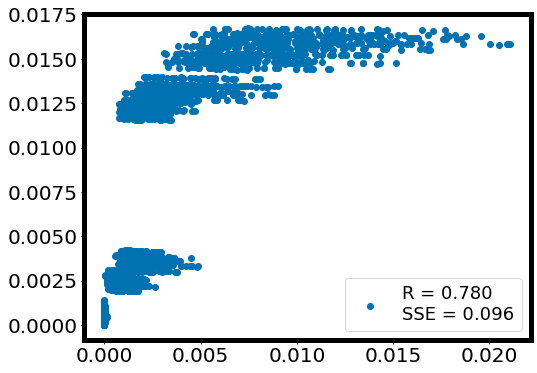

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 1, cycle 2
Epoch: 0, Loss: 208.87201, Residuals: -0.26228, Convergence:   inf
Epoch: 10, Loss: 176.57370, Residuals: -0.24416, Convergence: 0.016954
Epoch: 20, Loss: 149.27660, Residuals: -0.22740, Convergence: 0.016935
Epoch: 30, Loss: 126.18633, Residuals: -0.21183, Convergence: 0.016948
Epoch: 40, Loss: 106.70986, Residuals: -0.19756, Convergence: 0.016847
Epoch: 50, Loss: 90.39664, Residuals: -0.18470, Convergence: 0.016612
Epoch: 60, Loss: 76.80447, Residuals: -0.17323, Convergence: 0.016264
Epoch: 70, Loss: 65.51089, Residuals: -0.16306, Convergence: 0.015831
Epoch: 80, Loss: 56.19104, Residuals: -0.15357, Convergence: 0.015230
Epoch: 90, Loss: 48.50241, Residuals: -0.14441, Convergence: 0.014190
Epoch: 100, Loss: 41.93545, Residuals: -0.13571, Convergence: 0.015132
Epoch: 110, Loss: 36.20625, Residuals: -0.12725, Convergen

Epoch: 920, Loss: 77.44151, Residuals: 0.00139, Convergence: 0.003610

Epoch: 928, Evidence: 507.62738, Convergence: -0.005841
Epoch: 930, Loss: 98.68889, Residuals: 0.00837, Convergence: 0.003147
Epoch: 940, Loss: 95.95160, Residuals: 0.00755, Convergence: 0.002907
Epoch: 950, Loss: 93.55697, Residuals: 0.00686, Convergence: 0.002656
Epoch: 960, Loss: 91.41571, Residuals: 0.00625, Convergence: 0.002189
Epoch: 970, Loss: 89.47105, Residuals: 0.00573, Convergence: 0.002183
Epoch: 980, Loss: 87.74071, Residuals: 0.00528, Convergence: 0.002135
Epoch: 990, Loss: 86.20482, Residuals: 0.00485, Convergence: 0.001420

Epoch: 999, Evidence: 523.91943, Convergence: 0.025437
Epoch: 1000, Loss: 90.11071, Residuals: 0.00450, Convergence: 0.002819
Epoch: 1010, Loss: 88.05315, Residuals: 0.00390, Convergence: 0.002184
Epoch: 1020, Loss: 86.20549, Residuals: 0.00335, Convergence: 0.002140
Epoch: 1030, Loss: 84.53574, Residuals: 0.00287, Convergence: 0.002028
Epoch: 1040, Loss: 83.07347, Residuals: 0.0

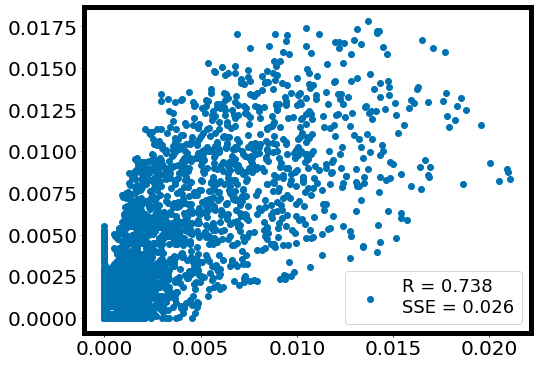

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 1, cycle 3
Epoch: 0, Loss: 301.78349, Residuals: -0.11592, Convergence:   inf
Epoch: 10, Loss: 256.45724, Residuals: -0.10897, Convergence: 0.016378
Epoch: 20, Loss: 218.06366, Residuals: -0.10276, Convergence: 0.016303
Epoch: 30, Loss: 185.70312, Residuals: -0.09705, Convergence: 0.016075
Epoch: 40, Loss: 158.63029, Residuals: -0.09158, Convergence: 0.015724
Epoch: 50, Loss: 136.07936, Residuals: -0.08592, Convergence: 0.015287
Epoch: 60, Loss: 117.30245, Residuals: -0.08006, Convergence: 0.014726
Epoch: 70, Loss: 100.94788, Residuals: -0.07406, Convergence: 0.014993
Epoch: 80, Loss: 87.03856, Residuals: -0.06804, Convergence: 0.015067
Epoch: 90, Loss: 75.15324, Residuals: -0.06285, Convergence: 0.015141
Epoch: 100, Loss: 65.17157, Residuals: -0.05817, Convergence: 0.013920
Epoch: 110, Loss: 56.74517, Residuals: -0.05403, Conver


Epoch: 936, Evidence: 898.62744, Convergence: 0.005132
Epoch: 940, Loss: 174.21190, Residuals: -0.00637, Convergence: 0.001643

Epoch: 948, Evidence: 901.16174, Convergence: 0.002812
Epoch: 950, Loss: 175.96335, Residuals: -0.00641, Convergence: 0.001933
Epoch: 960, Loss: 173.33180, Residuals: -0.00647, Convergence: 0.001253
Epoch: 970, Loss: 170.86880, Residuals: -0.00651, Convergence: 0.001593

Epoch: 972, Evidence: 900.01031, Convergence: -0.001279


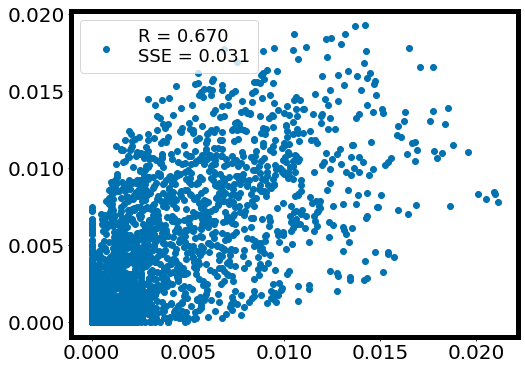

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 1, cycle 4
Epoch: 0, Loss: 450.47823, Residuals: 0.08569, Convergence:   inf
Epoch: 10, Loss: 382.29752, Residuals: 0.07441, Convergence: 0.016499
Epoch: 20, Loss: 324.88257, Residuals: 0.06434, Convergence: 0.016335
Epoch: 30, Loss: 276.60547, Residuals: 0.05541, Convergence: 0.016117
Epoch: 40, Loss: 236.08981, Residuals: 0.04724, Convergence: 0.015882
Epoch: 50, Loss: 201.79146, Residuals: 0.04030, Convergence: 0.015525
Epoch: 60, Loss: 173.15329, Residuals: 0.03444, Convergence: 0.015221
Epoch: 70, Loss: 149.37234, Residuals: 0.02980, Convergence: 0.014589
Epoch: 80, Loss: 129.32358, Residuals: 0.02575, Convergence: 0.014226
Epoch: 90, Loss: 112.19204, Residuals: 0.02217, Convergence: 0.014053
Epoch: 100, Loss: 97.54330, Residuals: 0.01935, Convergence: 0.013968
Epoch: 110, Loss: 85.23133, Residuals: 0.01693, Convergence: 0.0

Epoch: 930, Loss: 245.01733, Residuals: 0.00130, Convergence: 0.001124

Epoch: 936, Evidence: 1212.26270, Convergence: -0.000762
Epoch: 940, Loss: 241.89258, Residuals: 0.00088, Convergence: 0.003228

Epoch: 945, Evidence: 1211.72339, Convergence: -0.001208
Epoch: 950, Loss: 250.65961, Residuals: 0.00139, Convergence: 0.002010
Epoch: 960, Loss: 246.86015, Residuals: 0.00120, Convergence: 0.001259

Epoch: 962, Evidence: 1215.84912, Convergence: 0.002190

Epoch: 968, Evidence: 1216.40271, Convergence: 0.000455
Epoch: 970, Loss: 246.22934, Residuals: 0.00081, Convergence: 0.002991
Epoch: 980, Loss: 240.55693, Residuals: 0.00012, Convergence: 0.001090

Epoch: 983, Evidence: 1210.45471, Convergence: -0.004457


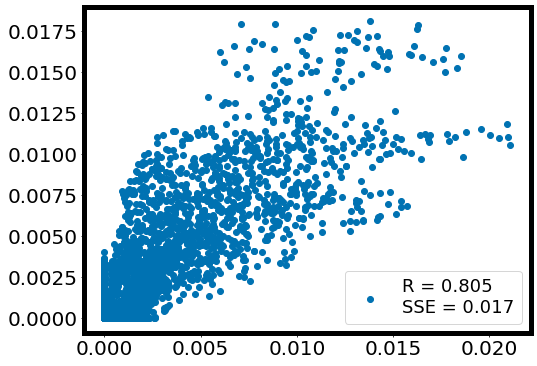

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 1, cycle 5
Epoch: 0, Loss: 592.83525, Residuals: 0.08255, Convergence:   inf
Epoch: 10, Loss: 502.37878, Residuals: 0.07208, Convergence: 0.016645
Epoch: 20, Loss: 426.36508, Residuals: 0.06284, Convergence: 0.016470
Epoch: 30, Loss: 362.54550, Residuals: 0.05453, Convergence: 0.016240
Epoch: 40, Loss: 309.09427, Residuals: 0.04710, Convergence: 0.015940
Epoch: 50, Loss: 264.42288, Residuals: 0.04082, Convergence: 0.015273
Epoch: 60, Loss: 227.76410, Residuals: 0.03622, Convergence: 0.014879
Epoch: 70, Loss: 196.66469, Residuals: 0.03226, Convergence: 0.014732
Epoch: 80, Loss: 170.02074, Residuals: 0.02856, Convergence: 0.014396
Epoch: 90, Loss: 147.08252, Residuals: 0.02523, Convergence: 0.014625
Epoch: 100, Loss: 127.64387, Residuals: 0.02237, Convergence: 0.014164
Epoch: 110, Loss: 111.20615, Residuals: 0.01962, Convergence: 0

Epoch: 970, Loss: 322.16559, Residuals: -0.00452, Convergence: 0.001374
Epoch: 980, Loss: 317.54736, Residuals: -0.00469, Convergence: 0.001495

Epoch: 985, Evidence: 1603.10254, Convergence: 0.000004
Epoch: 990, Loss: 314.32962, Residuals: -0.00591, Convergence: 0.001445
Epoch: 1000, Loss: 308.69122, Residuals: -0.00679, Convergence: 0.000898

Epoch: 1000, Evidence: 1599.70435, Convergence: -0.002120
Epoch: 1000, Loss: 329.23712, Residuals: -0.00417, Convergence:   inf
Epoch: 1010, Loss: 323.65671, Residuals: -0.00462, Convergence: 0.001846

Epoch: 1019, Evidence: 1608.68945, Convergence: 0.003477
Epoch: 1020, Loss: 323.78418, Residuals: -0.00478, Convergence: 0.001735
Epoch: 1030, Loss: 319.09076, Residuals: -0.00513, Convergence: 0.001479
Epoch: 1040, Loss: 315.20737, Residuals: -0.00518, Convergence: 0.001006

Epoch: 1043, Evidence: 1603.13232, Convergence: -0.003466


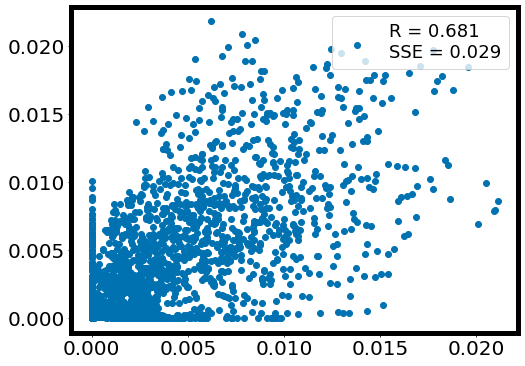

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 773.48406, Residuals: 0.40688, Convergence:   inf
Epoch: 10, Loss: 655.28662, Residuals: 0.36617, Convergence: 0.016803
Epoch: 20, Loss: 554.57892, Residuals: 0.32960, Convergence: 0.016869
Epoch: 30, Loss: 470.14362, Residuals: 0.29685, Convergence: 0.016332
Epoch: 40, Loss: 401.19922, Residuals: 0.26766, Convergence: 0.015520
Epoch: 50, Loss: 344.19458, Residuals: 0.24152, Convergence: 0.015412
Epoch: 60, Loss: 297.04752, Residuals: 0.21796, Convergence: 0.014574
Epoch: 70, Loss: 257.14313, Residuals: 0.19661, Convergence: 0.014493
Epoch: 80, Loss: 222.77654, Residuals: 0.17760, Convergence: 0.014563
Epoch: 90, Loss: 192.72893, Residuals: 0.16028, Convergence: 0.014642
Epoch: 100, Loss: 167.40736, Residuals: 0.14483, Convergence: 0.013825
Epoch: 110, Loss: 145.92194, Residuals: 0.13075, Convergence: 0.013505
Epoch: 120, Loss:

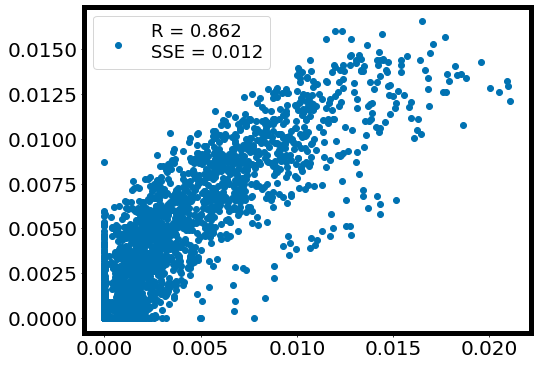

Running trial 2, cycle 1
Epoch: 0, Loss: 90.62764, Residuals: -0.73817, Convergence:   inf
Epoch: 10, Loss: 78.29220, Residuals: -0.68466, Convergence: 0.014950
Epoch: 20, Loss: 67.37560, Residuals: -0.63435, Convergence: 0.015253
Epoch: 30, Loss: 57.81275, Residuals: -0.58795, Convergence: 0.015592
Epoch: 40, Loss: 49.31512, Residuals: -0.54590, Convergence: 0.016028
Epoch: 50, Loss: 41.91759, Residuals: -0.50840, Convergence: 0.016416
Epoch: 60, Loss: 35.61731, Residuals: -0.47398, Convergence: 0.016618
Epoch: 70, Loss: 30.34292, Residuals: -0.44206, Convergence: 0.016025
Epoch: 80, Loss: 26.07581, Residuals: -0.41233, Convergence: 0.015797
Epoch: 90, Loss: 22.52654, Residuals: -0.38550, Convergence: 0.014709
Epoch: 100, Loss: 19.59246, Residuals: -0.36113, Convergence: 0.013609
Epoch: 110, Loss: 17.14217, Residuals: -0.33908, Convergence: 0.012937
Epoch: 120, Loss: 15.09755, Residuals: -0.31875, Convergence: 0.012980
Epoch: 130, Loss: 13.44301, Residuals: -0.29952, Convergence: 0.01

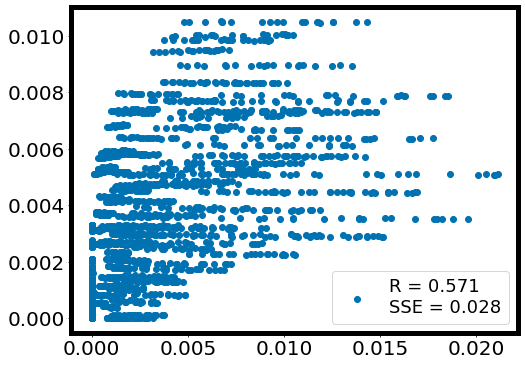

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 2, cycle 2
Epoch: 0, Loss: 156.63467, Residuals: -0.52916, Convergence:   inf
Epoch: 10, Loss: 134.51883, Residuals: -0.48745, Convergence: 0.015395
Epoch: 20, Loss: 115.44534, Residuals: -0.44942, Convergence: 0.015446
Epoch: 30, Loss: 98.87840, Residuals: -0.41485, Convergence: 0.015781
Epoch: 40, Loss: 84.37565, Residuals: -0.38368, Convergence: 0.016123
Epoch: 50, Loss: 71.90787, Residuals: -0.35545, Convergence: 0.016046
Epoch: 60, Loss: 61.34679, Residuals: -0.32970, Convergence: 0.015966
Epoch: 70, Loss: 52.41801, Residuals: -0.30584, Convergence: 0.015769
Epoch: 80, Loss: 44.97082, Residuals: -0.28311, Convergence: 0.015445
Epoch: 90, Loss: 38.70006, Residuals: -0.26207, Convergence: 0.015198
Epoch: 100, Loss: 33.50934, Residuals: -0.24245, Convergence: 0.013896
Epoch: 110, Loss: 29.18496, Residuals: -0.22426, Convergence

Epoch: 920, Loss: 105.72832, Residuals: 0.00144, Convergence: 0.001176
Epoch: 930, Loss: 104.51942, Residuals: 0.00141, Convergence: 0.001116

Epoch: 933, Evidence: 479.80206, Convergence: -0.000147
Epoch: 940, Loss: 104.35584, Residuals: 0.00099, Convergence: 0.002287
Epoch: 950, Loss: 102.05655, Residuals: 0.00047, Convergence: 0.001574
Epoch: 960, Loss: 100.25188, Residuals: 0.00024, Convergence: 0.001163

Epoch: 962, Evidence: 476.60583, Convergence: -0.006854
Epoch: 970, Loss: 112.27731, Residuals: 0.00151, Convergence: 0.001289
Epoch: 980, Loss: 110.62377, Residuals: 0.00138, Convergence: 0.001333
Epoch: 990, Loss: 109.19241, Residuals: 0.00130, Convergence: 0.001115

Epoch: 995, Evidence: 486.59552, Convergence: 0.013816
Epoch: 1000, Loss: 110.45169, Residuals: 0.00116, Convergence: 0.001439
Epoch: 1010, Loss: 108.93915, Residuals: 0.00104, Convergence: 0.001025
Epoch: 1020, Loss: 107.59245, Residuals: 0.00094, Convergence: 0.001173

Epoch: 1023, Evidence: 482.28314, Convergence

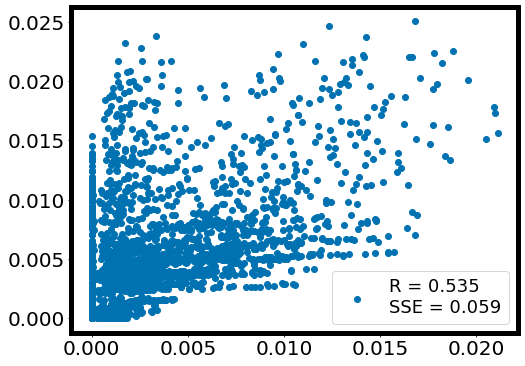

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 2, cycle 3
Epoch: 0, Loss: 315.80461, Residuals: -0.28962, Convergence:   inf
Epoch: 10, Loss: 268.79654, Residuals: -0.26741, Convergence: 0.016211
Epoch: 20, Loss: 228.94482, Residuals: -0.24737, Convergence: 0.016185
Epoch: 30, Loss: 194.88777, Residuals: -0.22907, Convergence: 0.016232
Epoch: 40, Loss: 165.96025, Residuals: -0.21218, Convergence: 0.015876
Epoch: 50, Loss: 142.01476, Residuals: -0.19566, Convergence: 0.015702
Epoch: 60, Loss: 121.78822, Residuals: -0.18008, Convergence: 0.015432
Epoch: 70, Loss: 104.79634, Residuals: -0.16537, Convergence: 0.014902
Epoch: 80, Loss: 90.54322, Residuals: -0.15151, Convergence: 0.014570
Epoch: 90, Loss: 78.29122, Residuals: -0.13876, Convergence: 0.014976
Epoch: 100, Loss: 67.93351, Residuals: -0.12613, Convergence: 0.014215
Epoch: 110, Loss: 59.11127, Residuals: -0.11509, Conver

Epoch: 970, Loss: 159.22719, Residuals: -0.00836, Convergence: 0.002248
Epoch: 980, Loss: 156.27582, Residuals: -0.00864, Convergence: 0.001797

Epoch: 986, Evidence: 853.74713, Convergence: 0.016814
Epoch: 990, Loss: 161.03073, Residuals: -0.00874, Convergence: 0.002046
Epoch: 1000, Loss: 158.34375, Residuals: -0.00888, Convergence: 0.001609
Epoch: 1010, Loss: 156.01245, Residuals: -0.00882, Convergence: 0.001570

Epoch: 1018, Evidence: 851.40649, Convergence: -0.002749
Epoch: 1020, Loss: 164.78329, Residuals: -0.00863, Convergence: 0.001142

Epoch: 1022, Evidence: 861.85242, Convergence: 0.009404

Epoch: 1027, Evidence: 862.11041, Convergence: 0.000299
Epoch: 1030, Loss: 169.29277, Residuals: -0.00866, Convergence: 0.001984
Epoch: 1040, Loss: 166.26656, Residuals: -0.00880, Convergence: 0.001730
Epoch: 1050, Loss: 163.56070, Residuals: -0.00885, Convergence: 0.001756

Epoch: 1051, Evidence: 859.50201, Convergence: -0.002735


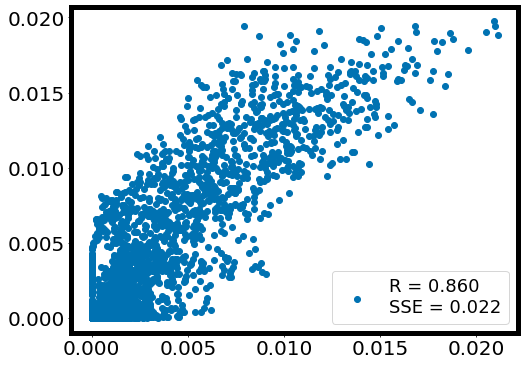

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 2, cycle 4
Epoch: 0, Loss: 494.95809, Residuals: -0.03661, Convergence:   inf
Epoch: 10, Loss: 418.39511, Residuals: -0.03647, Convergence: 0.016962
Epoch: 20, Loss: 353.51819, Residuals: -0.03616, Convergence: 0.017004
Epoch: 30, Loss: 298.77524, Residuals: -0.03561, Convergence: 0.016940
Epoch: 40, Loss: 252.71335, Residuals: -0.03515, Convergence: 0.016742
Epoch: 50, Loss: 213.98524, Residuals: -0.03420, Convergence: 0.016724
Epoch: 60, Loss: 181.61751, Residuals: -0.03328, Convergence: 0.016472
Epoch: 70, Loss: 154.64456, Residuals: -0.03206, Convergence: 0.015858
Epoch: 80, Loss: 132.06532, Residuals: -0.03075, Convergence: 0.015711
Epoch: 90, Loss: 113.13502, Residuals: -0.02894, Convergence: 0.015614
Epoch: 100, Loss: 97.15460, Residuals: -0.02726, Convergence: 0.015315
Epoch: 110, Loss: 83.90742, Residuals: -0.02547, Conv

Epoch: 1000, Loss: 235.57880, Residuals: -0.00739, Convergence: 0.001874
Epoch: 1010, Loss: 232.19019, Residuals: -0.00763, Convergence: 0.001271

Epoch: 1018, Evidence: 1216.52002, Convergence: 0.009442
Epoch: 1020, Loss: 237.75340, Residuals: -0.00769, Convergence: 0.001727
Epoch: 1030, Loss: 234.09238, Residuals: -0.00822, Convergence: 0.001349
Epoch: 1040, Loss: 231.07123, Residuals: -0.00826, Convergence: 0.001354

Epoch: 1045, Evidence: 1216.66516, Convergence: 0.000119
Epoch: 1050, Loss: 231.29364, Residuals: -0.01013, Convergence: 0.001780
Epoch: 1060, Loss: 227.11209, Residuals: -0.01157, Convergence: 0.001649
Epoch: 1070, Loss: 223.34225, Residuals: -0.01075, Convergence: 0.001854

Epoch: 1078, Evidence: 1197.11670, Convergence: -0.016208
Epoch: 1080, Loss: 244.47537, Residuals: -0.00773, Convergence: 0.002001
Epoch: 1090, Loss: 240.14377, Residuals: -0.00843, Convergence: 0.001449
Epoch: 1100, Loss: 236.61633, Residuals: -0.00867, Convergence: 0.001329
Epoch: 1110, Loss: 233

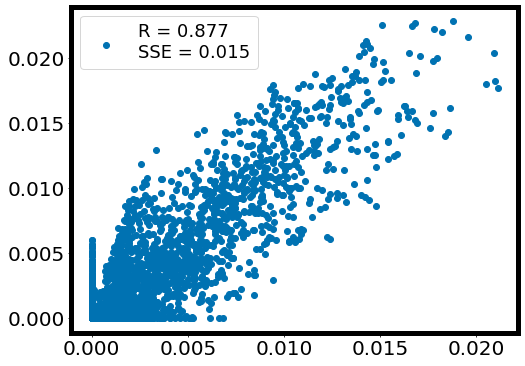

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 2, cycle 5
Epoch: 0, Loss: 624.31560, Residuals: -0.01173, Convergence:   inf
Epoch: 10, Loss: 527.06287, Residuals: -0.01380, Convergence: 0.017142
Epoch: 20, Loss: 444.41385, Residuals: -0.01534, Convergence: 0.017235
Epoch: 30, Loss: 374.52780, Residuals: -0.01628, Convergence: 0.017344
Epoch: 40, Loss: 315.51245, Residuals: -0.01701, Convergence: 0.017342
Epoch: 50, Loss: 266.32288, Residuals: -0.01697, Convergence: 0.016892
Epoch: 60, Loss: 224.91763, Residuals: -0.01701, Convergence: 0.017092
Epoch: 70, Loss: 190.32886, Residuals: -0.01652, Convergence: 0.016687
Epoch: 80, Loss: 161.79909, Residuals: -0.01576, Convergence: 0.016100
Epoch: 90, Loss: 137.87251, Residuals: -0.01540, Convergence: 0.015961
Epoch: 100, Loss: 117.98847, Residuals: -0.01482, Convergence: 0.015368
Epoch: 110, Loss: 101.48625, Residuals: -0.01393, Co


Epoch: 901, Evidence: 1544.32178, Convergence: -0.004234


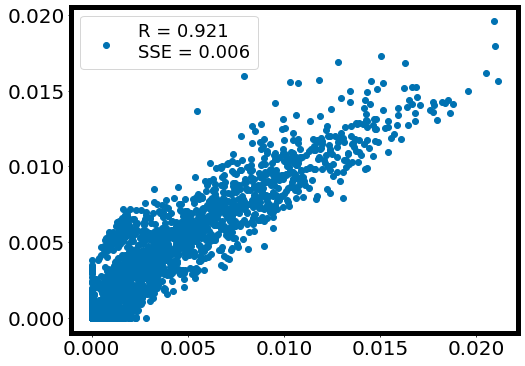

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 700.33037, Residuals: 0.00623, Convergence:   inf
Epoch: 10, Loss: 592.86249, Residuals: 0.00314, Convergence: 0.016831
Epoch: 20, Loss: 501.78088, Residuals: 0.00060, Convergence: 0.016762
Epoch: 30, Loss: 425.25439, Residuals: -0.00199, Convergence: 0.016648
Epoch: 40, Loss: 359.83646, Residuals: -0.00446, Convergence: 0.016998
Epoch: 50, Loss: 305.08801, Residuals: -0.00579, Convergence: 0.016476
Epoch: 60, Loss: 258.97968, Residuals: -0.00681, Convergence: 0.016443
Epoch: 70, Loss: 220.47095, Residuals: -0.00741, Convergence: 0.016106
Epoch: 80, Loss: 188.41408, Residuals: -0.00785, Convergence: 0.015687
Epoch: 90, Loss: 161.58488, Residuals: -0.00823, Convergence: 0.015446
Epoch: 100, Loss: 139.15166, Residuals: -0.00837, Convergence: 0.015047
Epoch: 110, Loss: 120.45506, Residuals: -0.00829, Convergence: 0.014582
Epoch: 1

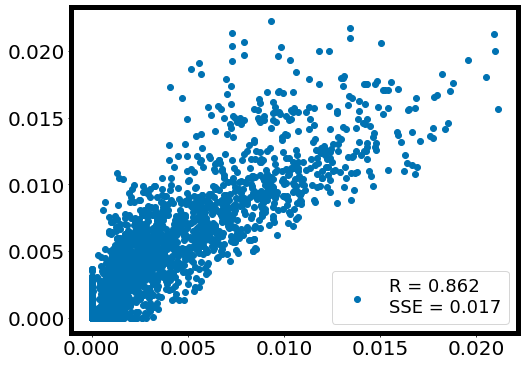

Running trial 3, cycle 1
Epoch: 0, Loss: 89.52533, Residuals: -0.89220, Convergence:   inf
Epoch: 10, Loss: 77.29452, Residuals: -0.82259, Convergence: 0.015004
Epoch: 20, Loss: 66.50900, Residuals: -0.75955, Convergence: 0.015193
Epoch: 30, Loss: 57.18848, Residuals: -0.70226, Convergence: 0.015236
Epoch: 40, Loss: 49.12720, Residuals: -0.65002, Convergence: 0.015393
Epoch: 50, Loss: 42.11619, Residuals: -0.60237, Convergence: 0.015610
Epoch: 60, Loss: 36.03568, Residuals: -0.55861, Convergence: 0.015661
Epoch: 70, Loss: 30.91749, Residuals: -0.51838, Convergence: 0.015704
Epoch: 80, Loss: 26.54283, Residuals: -0.48123, Convergence: 0.015238
Epoch: 90, Loss: 22.90424, Residuals: -0.44610, Convergence: 0.014494
Epoch: 100, Loss: 19.88439, Residuals: -0.41365, Convergence: 0.014486
Epoch: 110, Loss: 17.33696, Residuals: -0.38437, Convergence: 0.013160
Epoch: 120, Loss: 15.19922, Residuals: -0.35766, Convergence: 0.013644
Epoch: 130, Loss: 13.41200, Residuals: -0.33361, Convergence: 0.01

Epoch: 920, Loss: 36.51509, Residuals: -0.00481, Convergence: 0.001754
Epoch: 930, Loss: 35.89235, Residuals: -0.00487, Convergence: 0.001810

Epoch: 937, Evidence: 205.81601, Convergence: 0.013344
Epoch: 940, Loss: 37.08067, Residuals: -0.00501, Convergence: 0.001382

Epoch: 943, Evidence: 208.91087, Convergence: 0.014814
Epoch: 950, Loss: 38.11550, Residuals: -0.00519, Convergence: 0.002443
Epoch: 960, Loss: 37.40903, Residuals: -0.00538, Convergence: 0.001589

Epoch: 968, Evidence: 210.63361, Convergence: 0.008179
Epoch: 970, Loss: 38.37244, Residuals: -0.00541, Convergence: 0.002342
Epoch: 980, Loss: 37.64547, Residuals: -0.00556, Convergence: 0.001208
Epoch: 990, Loss: 36.94653, Residuals: -0.00567, Convergence: 0.001720

Epoch: 993, Evidence: 211.39804, Convergence: 0.003616
Epoch: 1000, Loss: 37.79434, Residuals: -0.00588, Convergence: 0.002398
Epoch: 1010, Loss: 37.09424, Residuals: -0.00601, Convergence: 0.001594
Epoch: 1020, Loss: 36.46600, Residuals: -0.00605, Convergence: 0

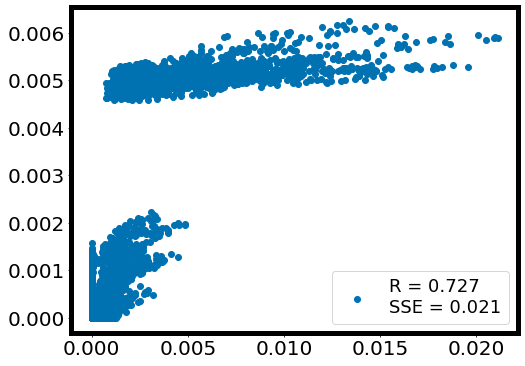

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 3, cycle 2
Epoch: 0, Loss: 149.39224, Residuals: -0.60966, Convergence:   inf
Epoch: 10, Loss: 128.11327, Residuals: -0.56035, Convergence: 0.015501
Epoch: 20, Loss: 109.81898, Residuals: -0.51551, Convergence: 0.015561
Epoch: 30, Loss: 94.04596, Residuals: -0.47453, Convergence: 0.015692
Epoch: 40, Loss: 80.40720, Residuals: -0.43716, Convergence: 0.015872
Epoch: 50, Loss: 68.65153, Residuals: -0.40298, Convergence: 0.015923
Epoch: 60, Loss: 58.58162, Residuals: -0.37138, Convergence: 0.015966
Epoch: 70, Loss: 50.25082, Residuals: -0.34170, Convergence: 0.014608
Epoch: 80, Loss: 43.21187, Residuals: -0.31447, Convergence: 0.015043
Epoch: 90, Loss: 37.34914, Residuals: -0.28914, Convergence: 0.014574
Epoch: 100, Loss: 32.42016, Residuals: -0.26590, Convergence: 0.013523
Epoch: 110, Loss: 28.30085, Residuals: -0.24484, Convergence


Epoch: 902, Evidence: 511.82214, Convergence: 0.006957

Epoch: 904, Evidence: 512.91681, Convergence: 0.002134

Epoch: 907, Evidence: 514.06970, Convergence: 0.002243

Epoch: 909, Evidence: 516.05682, Convergence: 0.003851
Epoch: 910, Loss: 113.00354, Residuals: -0.00961, Convergence: 0.001189

Epoch: 914, Evidence: 518.24951, Convergence: 0.004231

Epoch: 919, Evidence: 517.67804, Convergence: -0.001104


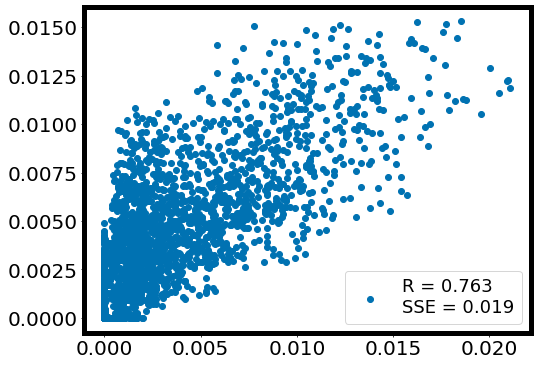

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 3, cycle 3
Epoch: 0, Loss: 258.04039, Residuals: -0.40486, Convergence:   inf
Epoch: 10, Loss: 221.19763, Residuals: -0.37094, Convergence: 0.015563
Epoch: 20, Loss: 189.53134, Residuals: -0.34002, Convergence: 0.015582
Epoch: 30, Loss: 162.33110, Residuals: -0.31191, Convergence: 0.015628
Epoch: 40, Loss: 139.08557, Residuals: -0.28624, Convergence: 0.015475
Epoch: 50, Loss: 119.39457, Residuals: -0.26259, Convergence: 0.015224
Epoch: 60, Loss: 102.78861, Residuals: -0.24056, Convergence: 0.015105
Epoch: 70, Loss: 88.65942, Residuals: -0.22016, Convergence: 0.014418
Epoch: 80, Loss: 76.38290, Residuals: -0.20195, Convergence: 0.015072
Epoch: 90, Loss: 66.07438, Residuals: -0.18543, Convergence: 0.014372
Epoch: 100, Loss: 57.33469, Residuals: -0.17043, Convergence: 0.014169
Epoch: 110, Loss: 49.99665, Residuals: -0.15673, Converg

Epoch: 950, Loss: 155.45888, Residuals: -0.01093, Convergence: 0.002265

Epoch: 954, Evidence: 833.55212, Convergence: -0.007548
Epoch: 960, Loss: 162.37187, Residuals: -0.00937, Convergence: 0.001086
Epoch: 970, Loss: 160.12506, Residuals: -0.00941, Convergence: 0.001506

Epoch: 977, Evidence: 842.75769, Convergence: 0.003457
Epoch: 980, Loss: 162.96008, Residuals: -0.00943, Convergence: 0.001299
Epoch: 990, Loss: 160.78857, Residuals: -0.00951, Convergence: 0.001058

Epoch: 993, Evidence: 840.90356, Convergence: -0.002205


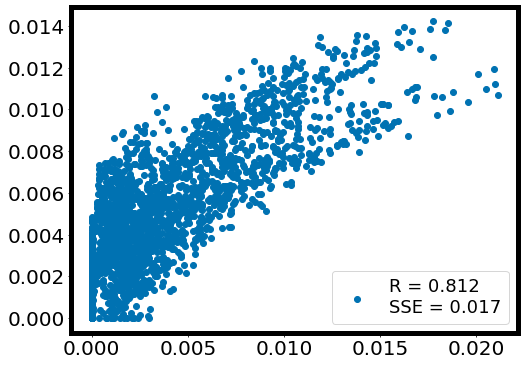

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 3, cycle 4
Epoch: 0, Loss: 491.42241, Residuals: -0.05082, Convergence:   inf
Epoch: 10, Loss: 415.78979, Residuals: -0.04932, Convergence: 0.016999
Epoch: 20, Loss: 351.39536, Residuals: -0.04781, Convergence: 0.016910
Epoch: 30, Loss: 297.53159, Residuals: -0.04591, Convergence: 0.016803
Epoch: 40, Loss: 251.69986, Residuals: -0.04392, Convergence: 0.017050
Epoch: 50, Loss: 213.22832, Residuals: -0.04192, Convergence: 0.016660
Epoch: 60, Loss: 181.28198, Residuals: -0.03949, Convergence: 0.016099
Epoch: 70, Loss: 154.45526, Residuals: -0.03684, Convergence: 0.016006
Epoch: 80, Loss: 131.74234, Residuals: -0.03455, Convergence: 0.015735
Epoch: 90, Loss: 112.77293, Residuals: -0.03220, Convergence: 0.015183
Epoch: 100, Loss: 96.68560, Residuals: -0.03018, Convergence: 0.015630
Epoch: 110, Loss: 83.13583, Residuals: -0.02863, Conv

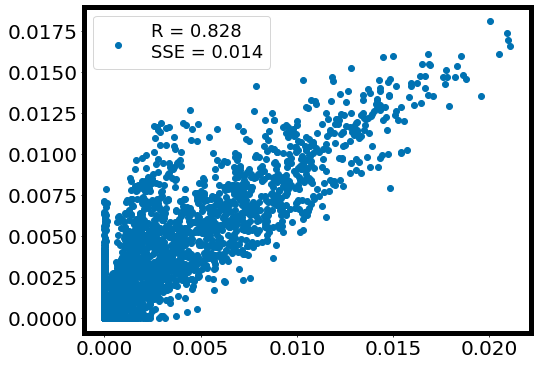

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 3, cycle 5
Epoch: 0, Loss: 743.08751, Residuals: 0.10085, Convergence:   inf
Epoch: 10, Loss: 624.71210, Residuals: 0.08857, Convergence: 0.017687
Epoch: 20, Loss: 524.56018, Residuals: 0.07742, Convergence: 0.017579
Epoch: 30, Loss: 440.99969, Residuals: 0.06776, Convergence: 0.017515
Epoch: 40, Loss: 370.18195, Residuals: 0.05846, Convergence: 0.017401
Epoch: 50, Loss: 311.91620, Residuals: 0.05053, Convergence: 0.017139
Epoch: 60, Loss: 263.82837, Residuals: 0.04389, Convergence: 0.016711
Epoch: 70, Loss: 223.97665, Residuals: 0.03791, Convergence: 0.016504
Epoch: 80, Loss: 190.76865, Residuals: 0.03284, Convergence: 0.016071
Epoch: 90, Loss: 162.99657, Residuals: 0.02874, Convergence: 0.015885
Epoch: 100, Loss: 139.76646, Residuals: 0.02516, Convergence: 0.015367
Epoch: 110, Loss: 120.44276, Residuals: 0.02184, Convergence: 0

Epoch: 940, Loss: 328.34042, Residuals: -0.00353, Convergence: 0.001659
Epoch: 950, Loss: 323.60516, Residuals: -0.00367, Convergence: 0.001326

Epoch: 959, Evidence: 1621.29236, Convergence: 0.000534
Epoch: 960, Loss: 321.37180, Residuals: -0.00375, Convergence: 0.002298
Epoch: 970, Loss: 314.61523, Residuals: -0.00478, Convergence: 0.002120

Epoch: 973, Evidence: 1617.11121, Convergence: -0.002050
Epoch: 980, Loss: 329.54620, Residuals: -0.00359, Convergence: 0.001549

Epoch: 986, Evidence: 1625.06433, Convergence: 0.002854
Epoch: 990, Loss: 327.33536, Residuals: -0.00377, Convergence: 0.001701
Epoch: 1000, Loss: 322.87054, Residuals: -0.00387, Convergence: 0.001656

Epoch: 1006, Evidence: 1621.75366, Convergence: -0.002041


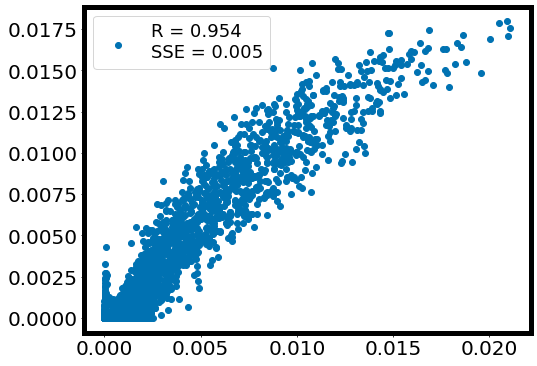

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 745.27538, Residuals: 0.31526, Convergence:   inf
Epoch: 10, Loss: 631.64575, Residuals: 0.28310, Convergence: 0.016753
Epoch: 20, Loss: 535.69550, Residuals: 0.25443, Convergence: 0.016509
Epoch: 30, Loss: 455.88351, Residuals: 0.22879, Convergence: 0.016294
Epoch: 40, Loss: 388.47946, Residuals: 0.20601, Convergence: 0.016094
Epoch: 50, Loss: 331.54233, Residuals: 0.18547, Convergence: 0.015718
Epoch: 60, Loss: 283.63525, Residuals: 0.16728, Convergence: 0.015482
Epoch: 70, Loss: 242.98000, Residuals: 0.15042, Convergence: 0.015558
Epoch: 80, Loss: 208.98190, Residuals: 0.13544, Convergence: 0.015096
Epoch: 90, Loss: 180.52698, Residuals: 0.12189, Convergence: 0.014522
Epoch: 100, Loss: 156.97252, Residuals: 0.11005, Convergence: 0.014269
Epoch: 110, Loss: 136.63943, Residuals: 0.09901, Convergence: 0.013937
Epoch: 120, Loss:

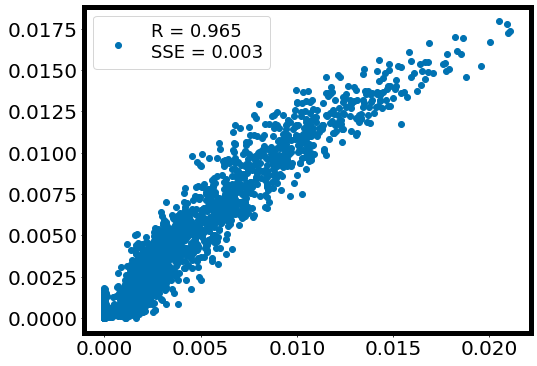

Running trial 4, cycle 1
Epoch: 0, Loss: 115.01462, Residuals: -0.64142, Convergence:   inf
Epoch: 10, Loss: 96.95341, Residuals: -0.59639, Convergence: 0.017213
Epoch: 20, Loss: 81.76286, Residuals: -0.55608, Convergence: 0.017161
Epoch: 30, Loss: 68.99727, Residuals: -0.51960, Convergence: 0.017086
Epoch: 40, Loss: 58.27271, Residuals: -0.48634, Convergence: 0.016991
Epoch: 50, Loss: 49.27321, Residuals: -0.45575, Convergence: 0.016848
Epoch: 60, Loss: 41.73660, Residuals: -0.42741, Convergence: 0.016639
Epoch: 70, Loss: 35.43906, Residuals: -0.40108, Convergence: 0.016358
Epoch: 80, Loss: 30.18897, Residuals: -0.37659, Convergence: 0.015943
Epoch: 90, Loss: 25.86278, Residuals: -0.35323, Convergence: 0.014760
Epoch: 100, Loss: 22.26549, Residuals: -0.33155, Convergence: 0.014263
Epoch: 110, Loss: 19.26531, Residuals: -0.31156, Convergence: 0.014408
Epoch: 120, Loss: 16.69859, Residuals: -0.29280, Convergence: 0.014139
Epoch: 130, Loss: 14.56421, Residuals: -0.27551, Convergence: 0.0


Epoch: 921, Evidence: 230.63539, Convergence: 0.004299

Epoch: 922, Evidence: 233.91267, Convergence: 0.014011

Epoch: 923, Evidence: 233.07651, Convergence: -0.003588


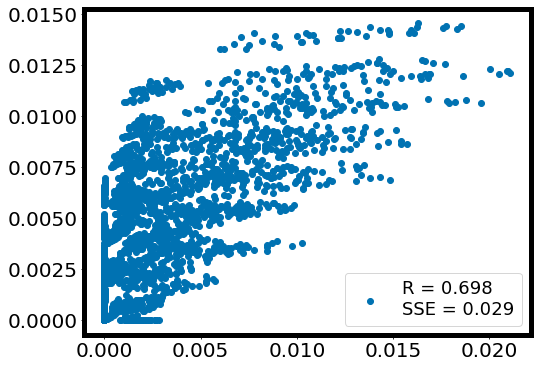

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 4, cycle 2
Epoch: 0, Loss: 218.12152, Residuals: -0.35268, Convergence:   inf
Epoch: 10, Loss: 185.19063, Residuals: -0.32490, Convergence: 0.016605
Epoch: 20, Loss: 156.84143, Residuals: -0.29983, Convergence: 0.016882
Epoch: 30, Loss: 132.52853, Residuals: -0.27703, Convergence: 0.017035
Epoch: 40, Loss: 111.94880, Residuals: -0.25600, Convergence: 0.016983
Epoch: 50, Loss: 94.69550, Residuals: -0.23658, Convergence: 0.016797
Epoch: 60, Loss: 80.28922, Residuals: -0.21870, Convergence: 0.016495
Epoch: 70, Loss: 68.40440, Residuals: -0.20200, Convergence: 0.015850
Epoch: 80, Loss: 58.51245, Residuals: -0.18662, Convergence: 0.015660
Epoch: 90, Loss: 50.32316, Residuals: -0.17251, Convergence: 0.014817
Epoch: 100, Loss: 43.53363, Residuals: -0.15946, Convergence: 0.014250
Epoch: 110, Loss: 37.82774, Residuals: -0.14757, Convergen

Epoch: 910, Loss: 106.35149, Residuals: 0.00319, Convergence: 0.001741
Epoch: 920, Loss: 104.71671, Residuals: 0.00297, Convergence: 0.001518
Epoch: 930, Loss: 103.08661, Residuals: 0.00271, Convergence: 0.001474
Epoch: 940, Loss: 101.63489, Residuals: 0.00252, Convergence: 0.001238
Epoch: 950, Loss: 100.30542, Residuals: 0.00235, Convergence: 0.001324

Epoch: 959, Evidence: 510.68631, Convergence: -0.000987
Epoch: 960, Loss: 101.49487, Residuals: 0.00214, Convergence: 0.003585
Epoch: 970, Loss: 98.34417, Residuals: 0.00073, Convergence: 0.003094
Epoch: 980, Loss: 95.68684, Residuals: -0.00020, Convergence: 0.002213
Epoch: 990, Loss: 93.45534, Residuals: -0.00069, Convergence: 0.002374
Epoch: 1000, Loss: 91.49607, Residuals: -0.00107, Convergence: 0.002109
Epoch: 1010, Loss: 89.78345, Residuals: -0.00121, Convergence: 0.001987
Epoch: 1020, Loss: 88.37930, Residuals: -0.00118, Convergence: 0.001709
Epoch: 1030, Loss: 87.16686, Residuals: -0.00104, Convergence: 0.000909

Epoch: 1030, Evi

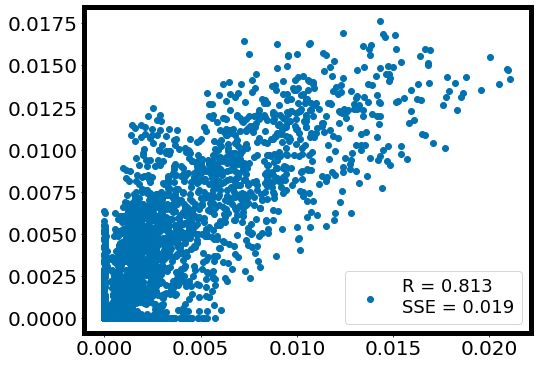

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 4, cycle 3
Epoch: 0, Loss: 276.25426, Residuals: -0.26954, Convergence:   inf
Epoch: 10, Loss: 236.75699, Residuals: -0.24798, Convergence: 0.015576
Epoch: 20, Loss: 202.82399, Residuals: -0.22826, Convergence: 0.015594
Epoch: 30, Loss: 173.76906, Residuals: -0.21025, Convergence: 0.015566
Epoch: 40, Loss: 149.00490, Residuals: -0.19361, Convergence: 0.015406
Epoch: 50, Loss: 128.23077, Residuals: -0.17830, Convergence: 0.014732
Epoch: 60, Loss: 110.85992, Residuals: -0.16424, Convergence: 0.014393
Epoch: 70, Loss: 96.35508, Residuals: -0.15107, Convergence: 0.013908
Epoch: 80, Loss: 84.05939, Residuals: -0.13879, Convergence: 0.014027
Epoch: 90, Loss: 73.43850, Residuals: -0.12743, Convergence: 0.013269
Epoch: 100, Loss: 64.33253, Residuals: -0.11694, Convergence: 0.013068
Epoch: 110, Loss: 56.39696, Residuals: -0.10731, Converg


Epoch: 969, Evidence: 828.48975, Convergence: 0.001813
Epoch: 970, Loss: 166.66675, Residuals: -0.00900, Convergence: 0.001840
Epoch: 980, Loss: 164.16461, Residuals: -0.00931, Convergence: 0.001503
Epoch: 990, Loss: 161.92575, Residuals: -0.00951, Convergence: 0.001489

Epoch: 999, Evidence: 832.89685, Convergence: 0.005291
Epoch: 1000, Loss: 168.33957, Residuals: -0.00965, Convergence: 0.001855
Epoch: 1010, Loss: 165.83337, Residuals: -0.00990, Convergence: 0.001535

Epoch: 1016, Evidence: 839.68665, Convergence: 0.008086
Epoch: 1020, Loss: 170.83691, Residuals: -0.01014, Convergence: 0.001715
Epoch: 1030, Loss: 168.34348, Residuals: -0.01038, Convergence: 0.001363
Epoch: 1040, Loss: 166.05777, Residuals: -0.01049, Convergence: 0.001255

Epoch: 1047, Evidence: 839.55945, Convergence: -0.000152
Epoch: 1050, Loss: 167.66064, Residuals: -0.01119, Convergence: 0.002919
Epoch: 1060, Loss: 163.37987, Residuals: -0.01279, Convergence: 0.002457
Epoch: 1070, Loss: 160.00137, Residuals: -0.01

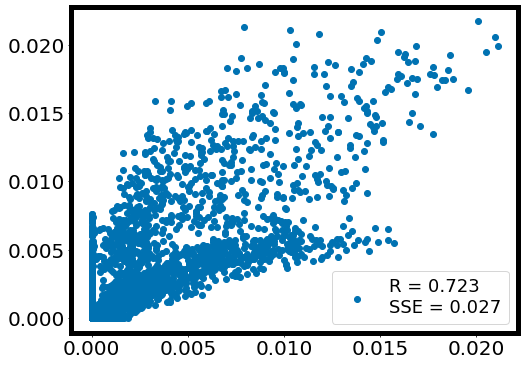

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 4, cycle 4
Epoch: 0, Loss: 394.40010, Residuals: -0.10943, Convergence:   inf
Epoch: 10, Loss: 336.63647, Residuals: -0.10195, Convergence: 0.016037
Epoch: 20, Loss: 286.95758, Residuals: -0.09509, Convergence: 0.016086
Epoch: 30, Loss: 244.82687, Residuals: -0.08863, Convergence: 0.015902
Epoch: 40, Loss: 209.58797, Residuals: -0.08267, Convergence: 0.015413
Epoch: 50, Loss: 180.32671, Residuals: -0.07731, Convergence: 0.014991
Epoch: 60, Loss: 155.82542, Residuals: -0.07216, Convergence: 0.014444
Epoch: 70, Loss: 134.98912, Residuals: -0.06708, Convergence: 0.014325
Epoch: 80, Loss: 116.83387, Residuals: -0.06156, Convergence: 0.014783
Epoch: 90, Loss: 101.27042, Residuals: -0.05621, Convergence: 0.014284
Epoch: 100, Loss: 88.02796, Residuals: -0.05139, Convergence: 0.014152
Epoch: 110, Loss: 76.75053, Residuals: -0.04681, Conv


Epoch: 928, Evidence: 1206.48987, Convergence: -0.001775
Epoch: 930, Loss: 251.98856, Residuals: -0.00884, Convergence: 0.001015

Epoch: 931, Evidence: 1212.93835, Convergence: 0.003551

Epoch: 932, Evidence: 1213.56702, Convergence: 0.000518
Epoch: 940, Loss: 251.90216, Residuals: -0.00926, Convergence: 0.001176
Epoch: 950, Loss: 248.60297, Residuals: -0.00936, Convergence: 0.001039

Epoch: 954, Evidence: 1209.18066, Convergence: -0.003108


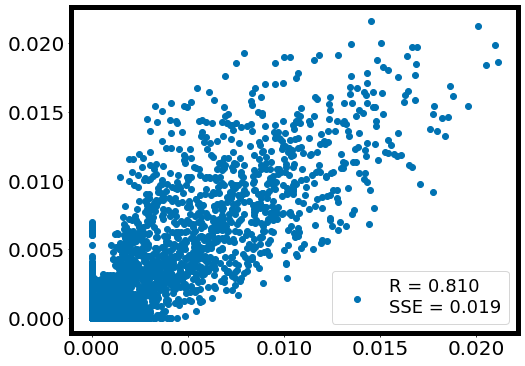

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 4, cycle 5
Epoch: 0, Loss: 545.23430, Residuals: -0.05483, Convergence:   inf
Epoch: 10, Loss: 464.49716, Residuals: -0.05198, Convergence: 0.016208
Epoch: 20, Loss: 395.58371, Residuals: -0.04907, Convergence: 0.016127
Epoch: 30, Loss: 337.65308, Residuals: -0.04627, Convergence: 0.015782
Epoch: 40, Loss: 289.38000, Residuals: -0.04392, Convergence: 0.015327
Epoch: 50, Loss: 249.06775, Residuals: -0.04201, Convergence: 0.014868
Epoch: 60, Loss: 215.09654, Residuals: -0.03947, Convergence: 0.014587
Epoch: 70, Loss: 186.38405, Residuals: -0.03660, Convergence: 0.014409
Epoch: 80, Loss: 161.39323, Residuals: -0.03383, Convergence: 0.014691
Epoch: 90, Loss: 139.25478, Residuals: -0.03088, Convergence: 0.014849
Epoch: 100, Loss: 119.99885, Residuals: -0.02863, Convergence: 0.014894
Epoch: 110, Loss: 103.76320, Residuals: -0.02633, Co

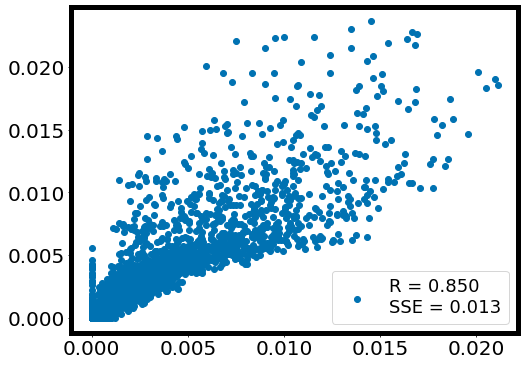

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 557.45293, Residuals: 0.04513, Convergence:   inf
Epoch: 10, Loss: 478.46887, Residuals: 0.03938, Convergence: 0.015392
Epoch: 20, Loss: 410.81442, Residuals: 0.03461, Convergence: 0.015322
Epoch: 30, Loss: 353.66949, Residuals: 0.03033, Convergence: 0.014855
Epoch: 40, Loss: 306.26181, Residuals: 0.02637, Convergence: 0.014123
Epoch: 50, Loss: 266.95435, Residuals: 0.02281, Convergence: 0.013567
Epoch: 60, Loss: 234.16771, Residuals: 0.01967, Convergence: 0.012924
Epoch: 70, Loss: 206.23917, Residuals: 0.01647, Convergence: 0.012790
Epoch: 80, Loss: 181.93913, Residuals: 0.01348, Convergence: 0.012400
Epoch: 90, Loss: 160.65552, Residuals: 0.01101, Convergence: 0.012228
Epoch: 100, Loss: 142.61717, Residuals: 0.00900, Convergence: 0.011425
Epoch: 110, Loss: 127.11901, Residuals: 0.00728, Convergence: 0.011606
Epoch: 120, Loss:

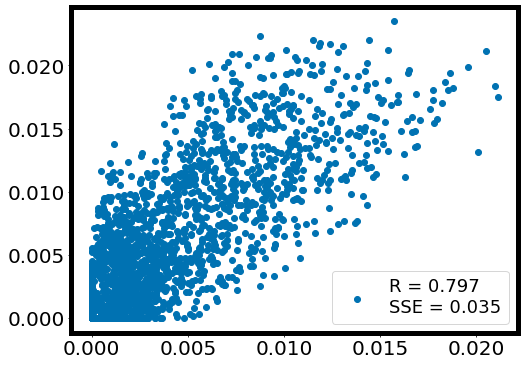

Running trial 5, cycle 1
Epoch: 0, Loss: 174.77905, Residuals: -0.44596, Convergence:   inf
Epoch: 10, Loss: 146.90796, Residuals: -0.41787, Convergence: 0.017655
Epoch: 20, Loss: 123.30395, Residuals: -0.39191, Convergence: 0.017681
Epoch: 30, Loss: 103.44575, Residuals: -0.36821, Convergence: 0.017753
Epoch: 40, Loss: 86.70850, Residuals: -0.34670, Convergence: 0.017848
Epoch: 50, Loss: 72.63854, Residuals: -0.32722, Convergence: 0.017860
Epoch: 60, Loss: 60.88160, Residuals: -0.30963, Convergence: 0.017761
Epoch: 70, Loss: 51.09956, Residuals: -0.29373, Convergence: 0.017588
Epoch: 80, Loss: 42.97826, Residuals: -0.27930, Convergence: 0.017343
Epoch: 90, Loss: 36.24832, Residuals: -0.26610, Convergence: 0.017025
Epoch: 100, Loss: 30.73132, Residuals: -0.25342, Convergence: 0.016280
Epoch: 110, Loss: 26.16513, Residuals: -0.24176, Convergence: 0.015811
Epoch: 120, Loss: 22.40529, Residuals: -0.23098, Convergence: 0.015535
Epoch: 130, Loss: 19.31902, Residuals: -0.22093, Convergence: 

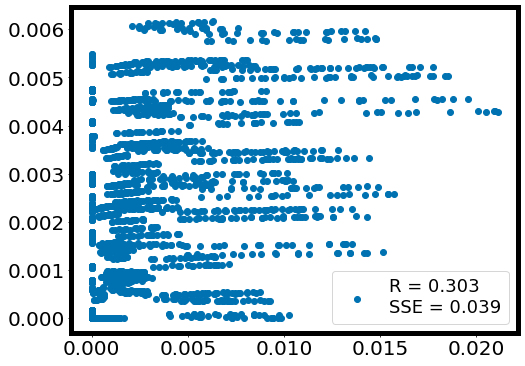

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 5, cycle 2
Epoch: 0, Loss: 176.02852, Residuals: -0.22915, Convergence:   inf
Epoch: 10, Loss: 150.21912, Residuals: -0.21402, Convergence: 0.016336
Epoch: 20, Loss: 127.53926, Residuals: -0.20054, Convergence: 0.016561
Epoch: 30, Loss: 108.24105, Residuals: -0.18821, Convergence: 0.016507
Epoch: 40, Loss: 91.94993, Residuals: -0.17680, Convergence: 0.016394
Epoch: 50, Loss: 78.20329, Residuals: -0.16619, Convergence: 0.016257
Epoch: 60, Loss: 66.65158, Residuals: -0.15626, Convergence: 0.016033
Epoch: 70, Loss: 56.95614, Residuals: -0.14706, Convergence: 0.015739
Epoch: 80, Loss: 48.82598, Residuals: -0.13841, Convergence: 0.015535
Epoch: 90, Loss: 42.02147, Residuals: -0.13014, Convergence: 0.014875
Epoch: 100, Loss: 36.43312, Residuals: -0.12204, Convergence: 0.013994
Epoch: 110, Loss: 31.78916, Residuals: -0.11436, Convergenc

Epoch: 890, Loss: 115.43114, Residuals: 0.00295, Convergence: 0.001559

Epoch: 894, Evidence: 536.57544, Convergence: 0.004988
Epoch: 900, Loss: 116.68150, Residuals: 0.00286, Convergence: 0.001687

Epoch: 904, Evidence: 538.68939, Convergence: 0.003924
Epoch: 910, Loss: 117.95915, Residuals: 0.00273, Convergence: 0.001521
Epoch: 920, Loss: 116.21482, Residuals: 0.00261, Convergence: 0.001350

Epoch: 924, Evidence: 540.01233, Convergence: 0.002450
Epoch: 930, Loss: 117.26756, Residuals: 0.00251, Convergence: 0.001409
Epoch: 940, Loss: 115.59035, Residuals: 0.00239, Convergence: 0.001336

Epoch: 944, Evidence: 542.24628, Convergence: 0.004120
Epoch: 950, Loss: 116.61069, Residuals: 0.00229, Convergence: 0.001372
Epoch: 960, Loss: 114.92944, Residuals: 0.00217, Convergence: 0.001505

Epoch: 967, Evidence: 542.95984, Convergence: 0.001314
Epoch: 970, Loss: 116.04747, Residuals: 0.00209, Convergence: 0.001562
Epoch: 980, Loss: 114.29526, Residuals: 0.00192, Convergence: 0.001831

Epoch: 98

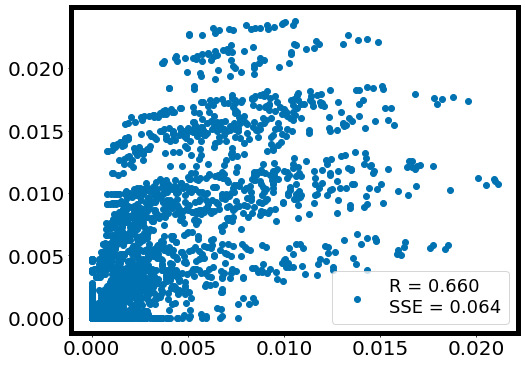

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 5, cycle 3
Epoch: 0, Loss: 302.14748, Residuals: -0.04406, Convergence:   inf
Epoch: 10, Loss: 257.03683, Residuals: -0.04464, Convergence: 0.016449
Epoch: 20, Loss: 218.11943, Residuals: -0.04532, Convergence: 0.016611
Epoch: 30, Loss: 184.96057, Residuals: -0.04563, Convergence: 0.016628
Epoch: 40, Loss: 156.87122, Residuals: -0.04556, Convergence: 0.016542
Epoch: 50, Loss: 133.41959, Residuals: -0.04465, Convergence: 0.015984
Epoch: 60, Loss: 113.70664, Residuals: -0.04395, Convergence: 0.016032
Epoch: 70, Loss: 97.33810, Residuals: -0.04299, Convergence: 0.015487
Epoch: 80, Loss: 83.67154, Residuals: -0.04191, Convergence: 0.015152
Epoch: 90, Loss: 72.14635, Residuals: -0.04055, Convergence: 0.014974
Epoch: 100, Loss: 62.39949, Residuals: -0.03938, Convergence: 0.014471
Epoch: 110, Loss: 54.11826, Residuals: -0.03831, Converg

Epoch: 940, Loss: 164.08972, Residuals: -0.00455, Convergence: 0.001053
Epoch: 950, Loss: 162.09293, Residuals: -0.00464, Convergence: 0.001264

Epoch: 958, Evidence: 871.76062, Convergence: 0.000558
Epoch: 960, Loss: 162.34616, Residuals: -0.00497, Convergence: 0.002709
Epoch: 970, Loss: 158.76649, Residuals: -0.00604, Convergence: 0.001899
Epoch: 980, Loss: 155.81496, Residuals: -0.00665, Convergence: 0.001745

Epoch: 985, Evidence: 864.89868, Convergence: -0.007372
Epoch: 990, Loss: 170.13837, Residuals: -0.00444, Convergence: 0.001351
Epoch: 1000, Loss: 167.79126, Residuals: -0.00462, Convergence: 0.001162
Epoch: 1010, Loss: 165.64423, Residuals: -0.00473, Convergence: 0.001207

Epoch: 1019, Evidence: 878.12366, Convergence: 0.007800
Epoch: 1020, Loss: 168.15747, Residuals: -0.00482, Convergence: 0.001244
Epoch: 1030, Loss: 165.89856, Residuals: -0.00500, Convergence: 0.001373
Epoch: 1040, Loss: 163.89386, Residuals: -0.00514, Convergence: 0.001228

Epoch: 1044, Evidence: 876.83136

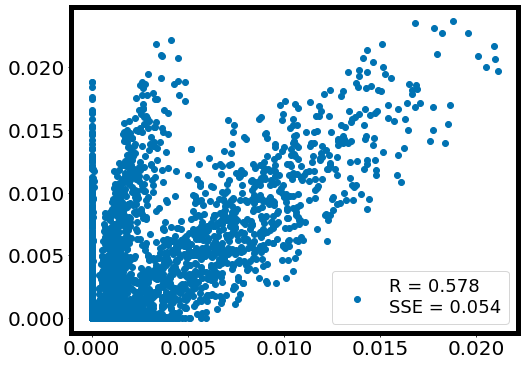

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 5, cycle 4
Epoch: 0, Loss: 425.69801, Residuals: -0.00354, Convergence:   inf
Epoch: 10, Loss: 362.25110, Residuals: -0.00642, Convergence: 0.016337
Epoch: 20, Loss: 307.95187, Residuals: -0.00904, Convergence: 0.016381
Epoch: 30, Loss: 261.86591, Residuals: -0.01128, Convergence: 0.016297
Epoch: 40, Loss: 223.13237, Residuals: -0.01294, Convergence: 0.016024
Epoch: 50, Loss: 190.75806, Residuals: -0.01398, Convergence: 0.015659
Epoch: 60, Loss: 163.78177, Residuals: -0.01470, Convergence: 0.015147
Epoch: 70, Loss: 141.47920, Residuals: -0.01489, Convergence: 0.014452
Epoch: 80, Loss: 122.97355, Residuals: -0.01484, Convergence: 0.013859
Epoch: 90, Loss: 107.54438, Residuals: -0.01488, Convergence: 0.013377
Epoch: 100, Loss: 94.58218, Residuals: -0.01524, Convergence: 0.012664
Epoch: 110, Loss: 83.75050, Residuals: -0.01560, Conv

Epoch: 970, Loss: 247.76938, Residuals: -0.00279, Convergence: 0.001577
Epoch: 980, Loss: 243.91220, Residuals: -0.00299, Convergence: 0.001247

Epoch: 987, Evidence: 1215.63794, Convergence: -0.006418
Epoch: 990, Loss: 253.49242, Residuals: -0.00217, Convergence: 0.001043

Epoch: 998, Evidence: 1223.83423, Convergence: 0.000322
Epoch: 1000, Loss: 251.79623, Residuals: -0.00234, Convergence: 0.001769
Epoch: 1010, Loss: 247.06381, Residuals: -0.00288, Convergence: 0.001584

Epoch: 1015, Evidence: 1220.82129, Convergence: -0.002145


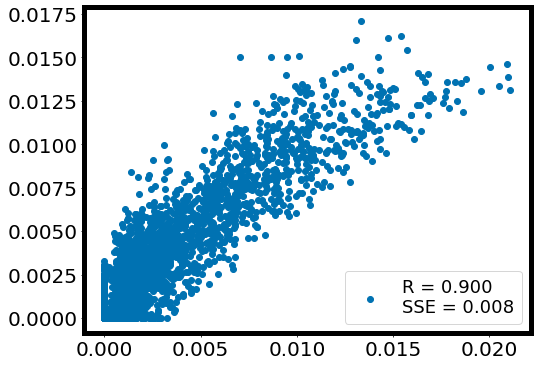

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 5, cycle 5
Epoch: 0, Loss: 576.22948, Residuals: 0.02139, Convergence:   inf
Epoch: 10, Loss: 489.17004, Residuals: 0.01716, Convergence: 0.016633
Epoch: 20, Loss: 414.68399, Residuals: 0.01322, Convergence: 0.016646
Epoch: 30, Loss: 351.81729, Residuals: 0.00979, Convergence: 0.016483
Epoch: 40, Loss: 299.55460, Residuals: 0.00709, Convergence: 0.016073
Epoch: 50, Loss: 256.01230, Residuals: 0.00466, Convergence: 0.015687
Epoch: 60, Loss: 219.80580, Residuals: 0.00246, Convergence: 0.015101
Epoch: 70, Loss: 190.01207, Residuals: 0.00099, Convergence: 0.014384
Epoch: 80, Loss: 165.30109, Residuals: -0.00024, Convergence: 0.013818
Epoch: 90, Loss: 144.60030, Residuals: -0.00145, Convergence: 0.013266
Epoch: 100, Loss: 127.01219, Residuals: -0.00263, Convergence: 0.012931
Epoch: 110, Loss: 111.67970, Residuals: -0.00389, Convergenc

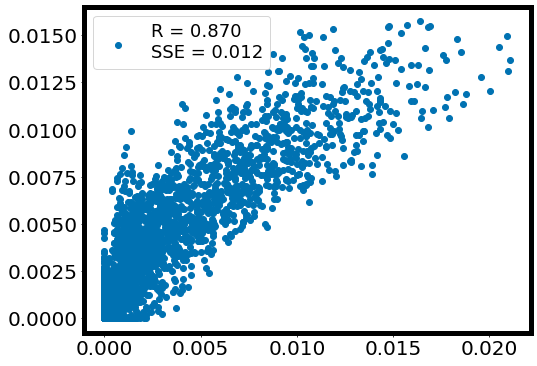

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 676.02025, Residuals: 0.07750, Convergence:   inf
Epoch: 10, Loss: 573.34741, Residuals: 0.06863, Convergence: 0.016734
Epoch: 20, Loss: 485.57431, Residuals: 0.06047, Convergence: 0.016748
Epoch: 30, Loss: 411.68143, Residuals: 0.05257, Convergence: 0.016534
Epoch: 40, Loss: 349.95297, Residuals: 0.04593, Convergence: 0.016215
Epoch: 50, Loss: 298.66550, Residuals: 0.04045, Convergence: 0.015783
Epoch: 60, Loss: 256.06952, Residuals: 0.03587, Convergence: 0.015243
Epoch: 70, Loss: 220.33617, Residuals: 0.03173, Convergence: 0.014884
Epoch: 80, Loss: 190.50404, Residuals: 0.02816, Convergence: 0.014609
Epoch: 90, Loss: 165.40723, Residuals: 0.02477, Convergence: 0.013991
Epoch: 100, Loss: 144.41130, Residuals: 0.02156, Convergence: 0.013327
Epoch: 110, Loss: 126.57626, Residuals: 0.01856, Convergence: 0.013017
Epoch: 120, Loss:

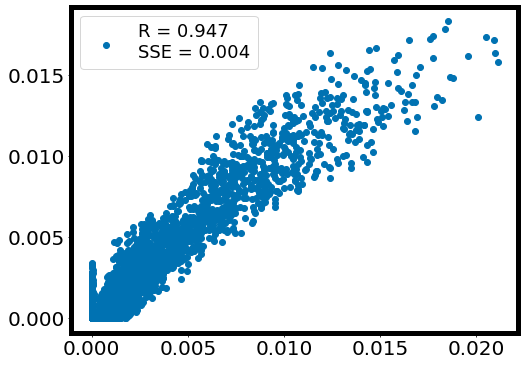

Running trial 6, cycle 1
Epoch: 0, Loss: 87.39661, Residuals: -0.66683, Convergence:   inf
Epoch: 10, Loss: 74.62479, Residuals: -0.61797, Convergence: 0.015844
Epoch: 20, Loss: 63.79314, Residuals: -0.57620, Convergence: 0.015775
Epoch: 30, Loss: 54.58788, Residuals: -0.53922, Convergence: 0.015643
Epoch: 40, Loss: 46.77396, Residuals: -0.50560, Convergence: 0.015510
Epoch: 50, Loss: 40.12893, Residuals: -0.47471, Convergence: 0.015383
Epoch: 60, Loss: 34.47588, Residuals: -0.44624, Convergence: 0.015223
Epoch: 70, Loss: 29.67602, Residuals: -0.42009, Convergence: 0.014996
Epoch: 80, Loss: 25.61325, Residuals: -0.39618, Convergence: 0.014684
Epoch: 90, Loss: 22.18503, Residuals: -0.37441, Convergence: 0.014287
Epoch: 100, Loss: 19.32318, Residuals: -0.35423, Convergence: 0.013742
Epoch: 110, Loss: 16.92472, Residuals: -0.33569, Convergence: 0.013234
Epoch: 120, Loss: 14.91516, Residuals: -0.31847, Convergence: 0.012532
Epoch: 130, Loss: 13.23553, Residuals: -0.30250, Convergence: 0.01

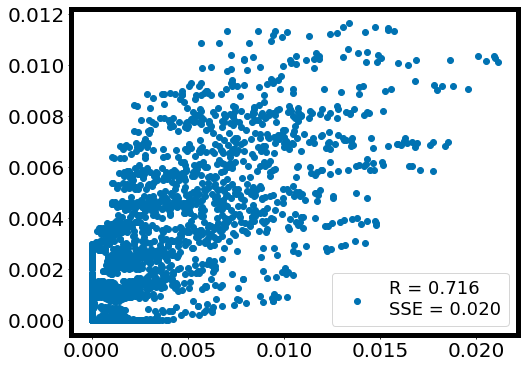

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 6, cycle 2
Epoch: 0, Loss: 191.86418, Residuals: -0.09970, Convergence:   inf
Epoch: 10, Loss: 163.49298, Residuals: -0.09610, Convergence: 0.016256
Epoch: 20, Loss: 139.11942, Residuals: -0.09244, Convergence: 0.016271
Epoch: 30, Loss: 118.42982, Residuals: -0.08882, Convergence: 0.016180
Epoch: 40, Loss: 100.99168, Residuals: -0.08514, Convergence: 0.015935
Epoch: 50, Loss: 86.40290, Residuals: -0.08124, Convergence: 0.015496
Epoch: 60, Loss: 74.25816, Residuals: -0.07728, Convergence: 0.015083
Epoch: 70, Loss: 64.08733, Residuals: -0.07356, Convergence: 0.014631
Epoch: 80, Loss: 55.65229, Residuals: -0.06998, Convergence: 0.013898
Epoch: 90, Loss: 48.59189, Residuals: -0.06657, Convergence: 0.013419
Epoch: 100, Loss: 42.68326, Residuals: -0.06330, Convergence: 0.012763
Epoch: 110, Loss: 37.73676, Residuals: -0.06012, Convergen

Epoch: 910, Loss: 99.07133, Residuals: -0.00959, Convergence: 0.001669

Epoch: 918, Evidence: 525.76306, Convergence: 0.000045
Epoch: 920, Loss: 99.24720, Residuals: -0.01045, Convergence: 0.004048
Epoch: 930, Loss: 96.14861, Residuals: -0.01249, Convergence: 0.001028
Epoch: 940, Loss: 93.69701, Residuals: -0.01223, Convergence: 0.001160

Epoch: 949, Evidence: 516.41620, Convergence: -0.018053
Epoch: 950, Loss: 106.86176, Residuals: -0.00908, Convergence: 0.003308
Epoch: 960, Loss: 104.15661, Residuals: -0.00974, Convergence: 0.002782
Epoch: 970, Loss: 101.97310, Residuals: -0.00991, Convergence: 0.001866

Epoch: 977, Evidence: 531.84344, Convergence: 0.011477
Epoch: 980, Loss: 102.15858, Residuals: -0.01008, Convergence: 0.001785
Epoch: 990, Loss: 100.01234, Residuals: -0.01039, Convergence: 0.001772
Epoch: 1000, Loss: 98.31913, Residuals: -0.01034, Convergence: 0.001956
Epoch: 1010, Loss: 96.87566, Residuals: -0.01007, Convergence: 0.001751

Epoch: 1011, Evidence: 527.81708, Converge

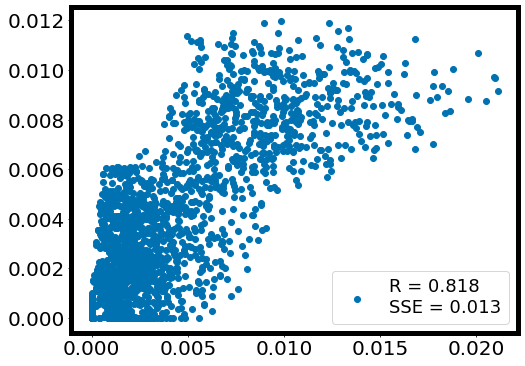

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 6, cycle 3
Epoch: 0, Loss: 374.27858, Residuals: 0.11168, Convergence:   inf
Epoch: 10, Loss: 315.42072, Residuals: 0.09686, Convergence: 0.017383
Epoch: 20, Loss: 265.36874, Residuals: 0.08384, Convergence: 0.017418
Epoch: 30, Loss: 223.57028, Residuals: 0.07264, Convergence: 0.017148
Epoch: 40, Loss: 189.11954, Residuals: 0.06320, Convergence: 0.016710
Epoch: 50, Loss: 160.44096, Residuals: 0.05507, Convergence: 0.016304
Epoch: 60, Loss: 136.80634, Residuals: 0.04788, Convergence: 0.015857
Epoch: 70, Loss: 116.94044, Residuals: 0.04134, Convergence: 0.015834
Epoch: 80, Loss: 100.23654, Residuals: 0.03560, Convergence: 0.015367
Epoch: 90, Loss: 86.08835, Residuals: 0.03028, Convergence: 0.015425
Epoch: 100, Loss: 73.97450, Residuals: 0.02529, Convergence: 0.014935
Epoch: 110, Loss: 63.86592, Residuals: 0.02089, Convergence: 0.01

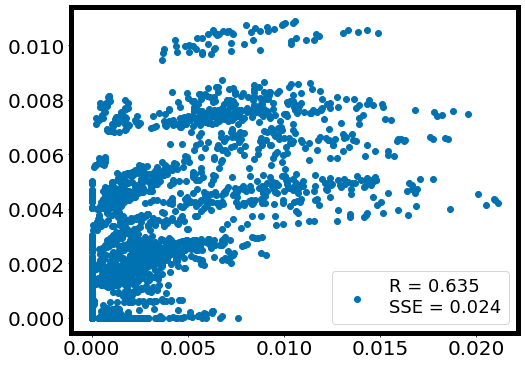

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 6, cycle 4
Epoch: 0, Loss: 528.77867, Residuals: 0.10363, Convergence:   inf
Epoch: 10, Loss: 446.29132, Residuals: 0.09095, Convergence: 0.017223
Epoch: 20, Loss: 375.94348, Residuals: 0.07989, Convergence: 0.017290
Epoch: 30, Loss: 316.99811, Residuals: 0.07017, Convergence: 0.017036
Epoch: 40, Loss: 268.43048, Residuals: 0.06188, Convergence: 0.016245
Epoch: 50, Loss: 228.63242, Residuals: 0.05514, Convergence: 0.015783
Epoch: 60, Loss: 195.69469, Residuals: 0.04910, Convergence: 0.015743
Epoch: 70, Loss: 168.16339, Residuals: 0.04368, Convergence: 0.015394
Epoch: 80, Loss: 145.32977, Residuals: 0.03907, Convergence: 0.014529
Epoch: 90, Loss: 126.14445, Residuals: 0.03489, Convergence: 0.014085
Epoch: 100, Loss: 109.95123, Residuals: 0.03139, Convergence: 0.013704
Epoch: 110, Loss: 96.24328, Residuals: 0.02793, Convergence: 0.

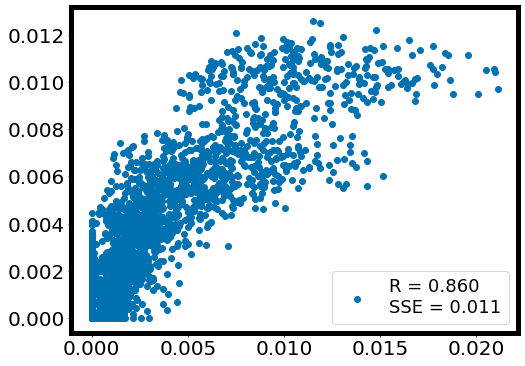

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 6, cycle 5
Epoch: 0, Loss: 550.53142, Residuals: 0.22457, Convergence:   inf
Epoch: 10, Loss: 467.16650, Residuals: 0.20118, Convergence: 0.016602
Epoch: 20, Loss: 396.01523, Residuals: 0.18039, Convergence: 0.016652
Epoch: 30, Loss: 336.16086, Residuals: 0.16154, Convergence: 0.016359
Epoch: 40, Loss: 286.98538, Residuals: 0.14507, Convergence: 0.015449
Epoch: 50, Loss: 246.45972, Residuals: 0.13038, Convergence: 0.015175
Epoch: 60, Loss: 212.60278, Residuals: 0.11702, Convergence: 0.014471
Epoch: 70, Loss: 184.25995, Residuals: 0.10491, Convergence: 0.014315
Epoch: 80, Loss: 160.28072, Residuals: 0.09398, Convergence: 0.014027
Epoch: 90, Loss: 139.71376, Residuals: 0.08402, Convergence: 0.013726
Epoch: 100, Loss: 122.00423, Residuals: 0.07503, Convergence: 0.013550
Epoch: 110, Loss: 106.89956, Residuals: 0.06700, Convergence: 0


Epoch: 919, Evidence: 1646.91064, Convergence: -0.004095


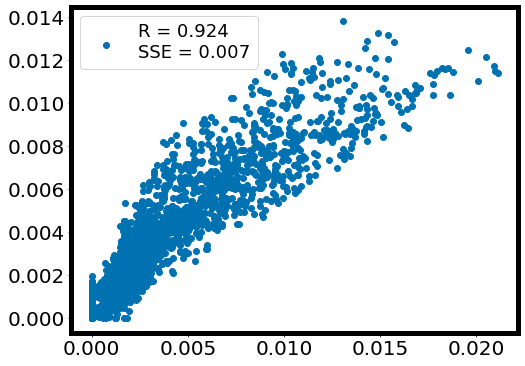

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 628.03612, Residuals: 0.26639, Convergence:   inf
Epoch: 10, Loss: 533.92896, Residuals: 0.23946, Convergence: 0.016424
Epoch: 20, Loss: 453.74432, Residuals: 0.21537, Convergence: 0.016333
Epoch: 30, Loss: 386.86539, Residuals: 0.19370, Convergence: 0.015842
Epoch: 40, Loss: 331.83395, Residuals: 0.17427, Convergence: 0.015144
Epoch: 50, Loss: 286.06201, Residuals: 0.15675, Convergence: 0.014990
Epoch: 60, Loss: 247.56134, Residuals: 0.14093, Convergence: 0.014347
Epoch: 70, Loss: 215.41069, Residuals: 0.12668, Convergence: 0.013980
Epoch: 80, Loss: 188.24913, Residuals: 0.11376, Convergence: 0.013251
Epoch: 90, Loss: 165.16092, Residuals: 0.10238, Convergence: 0.012936
Epoch: 100, Loss: 145.48273, Residuals: 0.09201, Convergence: 0.012433
Epoch: 110, Loss: 128.56775, Residuals: 0.08253, Convergence: 0.012618
Epoch: 120, Loss:

Epoch: 970, Loss: 384.07803, Residuals: -0.00325, Convergence: 0.001441
Epoch: 980, Loss: 378.18152, Residuals: -0.00333, Convergence: 0.001730

Epoch: 983, Evidence: 1983.91846, Convergence: -0.005196
Epoch: 990, Loss: 396.11847, Residuals: -0.00249, Convergence: 0.001328
Epoch: 1000, Loss: 391.08801, Residuals: -0.00252, Convergence: 0.001051

Epoch: 1006, Evidence: 1995.26831, Convergence: 0.000522
Epoch: 1010, Loss: 387.36975, Residuals: -0.00293, Convergence: 0.002032
Epoch: 1020, Loss: 381.10742, Residuals: -0.00343, Convergence: 0.001279
Epoch: 1030, Loss: 375.80740, Residuals: -0.00332, Convergence: 0.001114

Epoch: 1031, Evidence: 1982.86621, Convergence: -0.005730


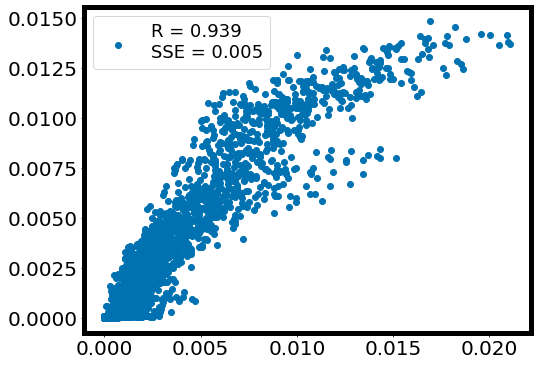

Running trial 7, cycle 1
Epoch: 0, Loss: 101.36518, Residuals: -1.05491, Convergence:   inf
Epoch: 10, Loss: 86.80273, Residuals: -0.96942, Convergence: 0.016021
Epoch: 20, Loss: 73.87830, Residuals: -0.89467, Convergence: 0.016375
Epoch: 30, Loss: 62.75284, Residuals: -0.82746, Convergence: 0.016518
Epoch: 40, Loss: 53.26248, Residuals: -0.76613, Convergence: 0.016531
Epoch: 50, Loss: 45.23844, Residuals: -0.71048, Convergence: 0.016370
Epoch: 60, Loss: 38.51084, Residuals: -0.65969, Convergence: 0.016131
Epoch: 70, Loss: 32.87876, Residuals: -0.61323, Convergence: 0.015720
Epoch: 80, Loss: 28.26174, Residuals: -0.56968, Convergence: 0.014701
Epoch: 90, Loss: 24.43586, Residuals: -0.52877, Convergence: 0.014396
Epoch: 100, Loss: 21.25376, Residuals: -0.49075, Convergence: 0.013977
Epoch: 110, Loss: 18.58090, Residuals: -0.45622, Convergence: 0.013579
Epoch: 120, Loss: 16.37173, Residuals: -0.42436, Convergence: 0.012162
Epoch: 130, Loss: 14.50798, Residuals: -0.39528, Convergence: 0.0


Epoch: 793, Evidence: 217.05527, Convergence: 0.000164

Epoch: 797, Evidence: 218.42688, Convergence: 0.006442
Epoch: 800, Loss: 50.44971, Residuals: 0.00003, Convergence: 0.001500

Epoch: 801, Evidence: 217.93460, Convergence: -0.002259

Epoch: 802, Evidence: 219.44376, Convergence: 0.004634

Epoch: 807, Evidence: 221.79761, Convergence: 0.010613

Epoch: 809, Evidence: 223.03867, Convergence: 0.005564
Epoch: 810, Loss: 53.41205, Residuals: 0.00013, Convergence: 0.001324

Epoch: 812, Evidence: 222.96362, Convergence: -0.000337

Epoch: 818, Evidence: 223.25456, Convergence: 0.000967
Epoch: 820, Loss: 53.18951, Residuals: -0.00105, Convergence: 0.003742

Epoch: 822, Evidence: 222.94542, Convergence: -0.000418


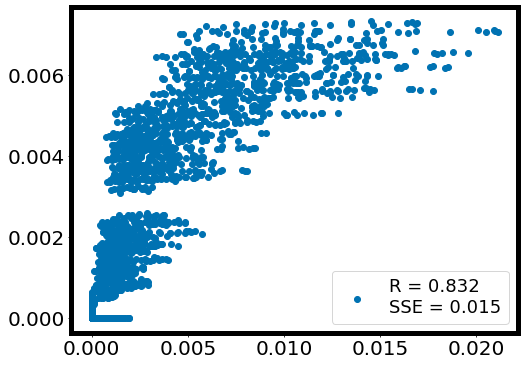

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 7, cycle 2
Epoch: 0, Loss: 158.79765, Residuals: -0.56561, Convergence:   inf
Epoch: 10, Loss: 136.06096, Residuals: -0.52180, Convergence: 0.015711
Epoch: 20, Loss: 116.32644, Residuals: -0.48215, Convergence: 0.015822
Epoch: 30, Loss: 99.45111, Residuals: -0.44607, Convergence: 0.015762
Epoch: 40, Loss: 85.10127, Residuals: -0.41303, Convergence: 0.015652
Epoch: 50, Loss: 72.93961, Residuals: -0.38248, Convergence: 0.015472
Epoch: 60, Loss: 62.67812, Residuals: -0.35431, Convergence: 0.015115
Epoch: 70, Loss: 54.03998, Residuals: -0.32815, Convergence: 0.014833
Epoch: 80, Loss: 46.73634, Residuals: -0.30379, Convergence: 0.014605
Epoch: 90, Loss: 40.51170, Residuals: -0.28145, Convergence: 0.014139
Epoch: 100, Loss: 35.21469, Residuals: -0.26075, Convergence: 0.013874
Epoch: 110, Loss: 30.77644, Residuals: -0.24112, Convergence

Epoch: 970, Loss: 81.98921, Residuals: -0.01076, Convergence: 0.001255

Epoch: 975, Evidence: 453.23206, Convergence: -0.008031
Epoch: 980, Loss: 90.68033, Residuals: -0.00888, Convergence: 0.001562
Epoch: 990, Loss: 89.40308, Residuals: -0.00903, Convergence: 0.001360
Epoch: 1000, Loss: 88.30101, Residuals: -0.00906, Convergence: 0.001210
Epoch: 1010, Loss: 87.30955, Residuals: -0.00904, Convergence: 0.000998

Epoch: 1010, Evidence: 468.66580, Convergence: 0.025165
Epoch: 1010, Loss: 92.47346, Residuals: -0.00904, Convergence:   inf
Epoch: 1020, Loss: 91.15455, Residuals: -0.00924, Convergence: 0.001426
Epoch: 1030, Loss: 89.99136, Residuals: -0.00931, Convergence: 0.001279
Epoch: 1040, Loss: 88.95056, Residuals: -0.00934, Convergence: 0.001131

Epoch: 1043, Evidence: 470.87689, Convergence: 0.004696
Epoch: 1050, Loss: 92.59090, Residuals: -0.00950, Convergence: 0.001314
Epoch: 1060, Loss: 91.35889, Residuals: -0.00967, Convergence: 0.001382

Epoch: 1062, Evidence: 472.05524, Converge

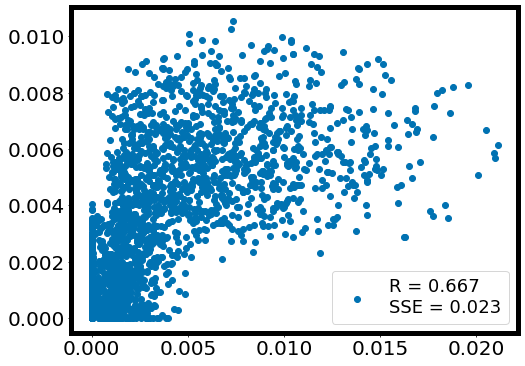

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 7, cycle 3
Epoch: 0, Loss: 294.09148, Residuals: -0.30465, Convergence:   inf
Epoch: 10, Loss: 251.87123, Residuals: -0.28166, Convergence: 0.015672
Epoch: 20, Loss: 215.50665, Residuals: -0.26080, Convergence: 0.015754
Epoch: 30, Loss: 184.20241, Residuals: -0.24188, Convergence: 0.015855
Epoch: 40, Loss: 157.58583, Residuals: -0.22458, Convergence: 0.015435
Epoch: 50, Loss: 135.38802, Residuals: -0.20801, Convergence: 0.015083
Epoch: 60, Loss: 117.31483, Residuals: -0.19083, Convergence: 0.013709
Epoch: 70, Loss: 102.12582, Residuals: -0.17489, Convergence: 0.014022
Epoch: 80, Loss: 88.75466, Residuals: -0.16082, Convergence: 0.014284
Epoch: 90, Loss: 77.07336, Residuals: -0.14774, Convergence: 0.013767
Epoch: 100, Loss: 66.96539, Residuals: -0.13606, Convergence: 0.013597
Epoch: 110, Loss: 58.20667, Residuals: -0.12517, Conver

Epoch: 980, Loss: 151.32436, Residuals: -0.00585, Convergence: 0.000976

Epoch: 980, Evidence: 853.67151, Convergence: 0.004613
Epoch: 980, Loss: 159.63992, Residuals: -0.00585, Convergence:   inf
Epoch: 990, Loss: 157.28397, Residuals: -0.00608, Convergence: 0.001460
Epoch: 1000, Loss: 155.20074, Residuals: -0.00624, Convergence: 0.001315

Epoch: 1008, Evidence: 859.53064, Convergence: 0.006817
Epoch: 1010, Loss: 160.91492, Residuals: -0.00636, Convergence: 0.001465
Epoch: 1020, Loss: 158.63562, Residuals: -0.00654, Convergence: 0.001318
Epoch: 1030, Loss: 156.55443, Residuals: -0.00670, Convergence: 0.001311
Epoch: 1040, Loss: 154.70728, Residuals: -0.00677, Convergence: 0.001237

Epoch: 1043, Evidence: 861.18213, Convergence: 0.001918
Epoch: 1050, Loss: 159.46721, Residuals: -0.00691, Convergence: 0.001596
Epoch: 1060, Loss: 157.34930, Residuals: -0.00707, Convergence: 0.001219

Epoch: 1066, Evidence: 862.63489, Convergence: 0.001684
Epoch: 1070, Loss: 161.33035, Residuals: -0.00723

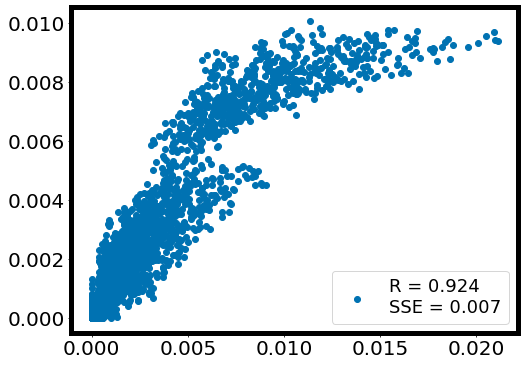

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 7, cycle 4
Epoch: 0, Loss: 445.94133, Residuals: -0.15906, Convergence:   inf
Epoch: 10, Loss: 379.66537, Residuals: -0.14784, Convergence: 0.016327
Epoch: 20, Loss: 322.65109, Residuals: -0.13736, Convergence: 0.016447
Epoch: 30, Loss: 273.99295, Residuals: -0.12771, Convergence: 0.016506
Epoch: 40, Loss: 233.15457, Residuals: -0.11945, Convergence: 0.016175
Epoch: 50, Loss: 199.05348, Residuals: -0.11180, Convergence: 0.015793
Epoch: 60, Loss: 170.51448, Residuals: -0.10374, Convergence: 0.015633
Epoch: 70, Loss: 146.33401, Residuals: -0.09597, Convergence: 0.015053
Epoch: 80, Loss: 126.08013, Residuals: -0.08833, Convergence: 0.014687
Epoch: 90, Loss: 108.93423, Residuals: -0.08105, Convergence: 0.014193
Epoch: 100, Loss: 94.55167, Residuals: -0.07395, Convergence: 0.014353
Epoch: 110, Loss: 82.54573, Residuals: -0.06733, Conv


Epoch: 898, Evidence: 1136.92505, Convergence: -0.003308


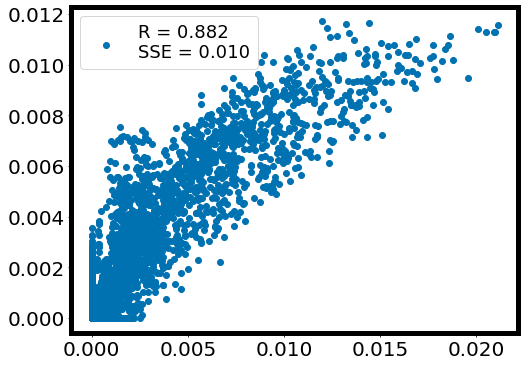

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 7, cycle 5
Epoch: 0, Loss: 551.56279, Residuals: -0.16459, Convergence:   inf
Epoch: 10, Loss: 469.48892, Residuals: -0.15183, Convergence: 0.016406
Epoch: 20, Loss: 398.56094, Residuals: -0.13988, Convergence: 0.016541
Epoch: 30, Loss: 337.76300, Residuals: -0.12928, Convergence: 0.016705
Epoch: 40, Loss: 286.83920, Residuals: -0.12029, Convergence: 0.016389
Epoch: 50, Loss: 244.42261, Residuals: -0.11099, Convergence: 0.016251
Epoch: 60, Loss: 208.24397, Residuals: -0.10208, Convergence: 0.016090
Epoch: 70, Loss: 177.28935, Residuals: -0.09379, Convergence: 0.016144
Epoch: 80, Loss: 151.45964, Residuals: -0.08587, Convergence: 0.015728
Epoch: 90, Loss: 129.64864, Residuals: -0.07910, Convergence: 0.015353
Epoch: 100, Loss: 111.31650, Residuals: -0.07305, Convergence: 0.015258
Epoch: 110, Loss: 96.16798, Residuals: -0.06737, Con

Epoch: 920, Loss: 318.37445, Residuals: -0.01054, Convergence: 0.002483
Epoch: 930, Loss: 312.34012, Residuals: -0.01102, Convergence: 0.002132
Epoch: 940, Loss: 307.68262, Residuals: -0.01008, Convergence: 0.001269

Epoch: 943, Evidence: 1531.45178, Convergence: -0.006510
Epoch: 950, Loss: 327.98276, Residuals: -0.00836, Convergence: 0.001608
Epoch: 960, Loss: 323.18781, Residuals: -0.00856, Convergence: 0.001532

Epoch: 967, Evidence: 1541.34729, Convergence: -0.000049
Epoch: 970, Loss: 319.57056, Residuals: -0.00951, Convergence: 0.002654
Epoch: 980, Loss: 312.61087, Residuals: -0.01108, Convergence: 0.002017
Epoch: 990, Loss: 307.56732, Residuals: -0.01072, Convergence: 0.001609
Epoch: 1000, Loss: 304.01807, Residuals: -0.00949, Convergence: 0.000901

Epoch: 1000, Evidence: 1527.79443, Convergence: -0.008920


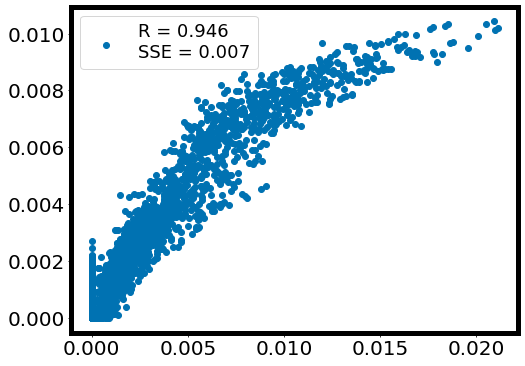

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 735.82512, Residuals: 0.00847, Convergence:   inf
Epoch: 10, Loss: 623.96582, Residuals: 0.00510, Convergence: 0.016735
Epoch: 20, Loss: 527.96857, Residuals: 0.00213, Convergence: 0.016931
Epoch: 30, Loss: 446.03687, Residuals: -0.00122, Convergence: 0.016946
Epoch: 40, Loss: 377.78323, Residuals: -0.00424, Convergence: 0.016566
Epoch: 50, Loss: 320.77338, Residuals: -0.00665, Convergence: 0.016565
Epoch: 60, Loss: 272.26392, Residuals: -0.00836, Convergence: 0.016388
Epoch: 70, Loss: 231.91042, Residuals: -0.00929, Convergence: 0.015911
Epoch: 80, Loss: 197.81323, Residuals: -0.01004, Convergence: 0.015895
Epoch: 90, Loss: 169.32286, Residuals: -0.01019, Convergence: 0.015430
Epoch: 100, Loss: 145.62645, Residuals: -0.01016, Convergence: 0.015046
Epoch: 110, Loss: 125.94997, Residuals: -0.00988, Convergence: 0.014191
Epoch: 1

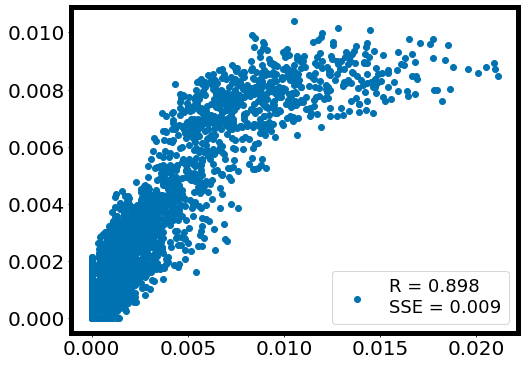

Running trial 8, cycle 1
Epoch: 0, Loss: 84.15370, Residuals: -0.90261, Convergence:   inf
Epoch: 10, Loss: 71.96246, Residuals: -0.83859, Convergence: 0.015684
Epoch: 20, Loss: 61.69618, Residuals: -0.78078, Convergence: 0.015347
Epoch: 30, Loss: 53.09866, Residuals: -0.72828, Convergence: 0.014930
Epoch: 40, Loss: 45.89173, Residuals: -0.68063, Convergence: 0.014500
Epoch: 50, Loss: 39.82946, Residuals: -0.63759, Convergence: 0.014081
Epoch: 60, Loss: 34.71717, Residuals: -0.59869, Convergence: 0.013646
Epoch: 70, Loss: 30.38954, Residuals: -0.56347, Convergence: 0.013351
Epoch: 80, Loss: 26.71304, Residuals: -0.53170, Convergence: 0.012804
Epoch: 90, Loss: 23.58356, Residuals: -0.50279, Convergence: 0.012103
Epoch: 100, Loss: 20.90838, Residuals: -0.47649, Convergence: 0.011654
Epoch: 110, Loss: 18.63062, Residuals: -0.45185, Convergence: 0.011400
Epoch: 120, Loss: 16.67587, Residuals: -0.42895, Convergence: 0.010942
Epoch: 130, Loss: 14.97965, Residuals: -0.40720, Convergence: 0.01

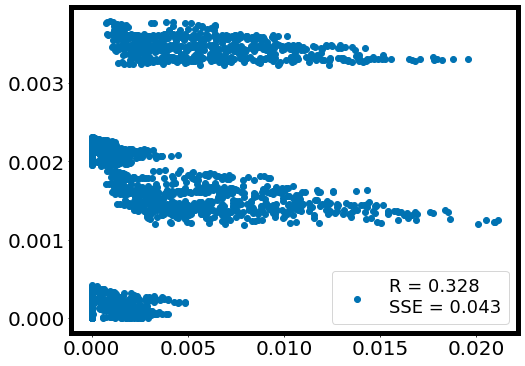

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 8, cycle 2
Epoch: 0, Loss: 151.03610, Residuals: -0.26934, Convergence:   inf
Epoch: 10, Loss: 129.80789, Residuals: -0.25285, Convergence: 0.015548
Epoch: 20, Loss: 111.05217, Residuals: -0.23740, Convergence: 0.015868
Epoch: 30, Loss: 94.71517, Residuals: -0.22324, Convergence: 0.016164
Epoch: 40, Loss: 80.63736, Residuals: -0.21033, Convergence: 0.016265
Epoch: 50, Loss: 68.64200, Residuals: -0.19852, Convergence: 0.016182
Epoch: 60, Loss: 58.48555, Residuals: -0.18742, Convergence: 0.016024
Epoch: 70, Loss: 50.09769, Residuals: -0.17693, Convergence: 0.015446
Epoch: 80, Loss: 43.10783, Residuals: -0.16709, Convergence: 0.014680
Epoch: 90, Loss: 37.27218, Residuals: -0.15818, Convergence: 0.014471
Epoch: 100, Loss: 32.35564, Residuals: -0.14999, Convergence: 0.013884
Epoch: 110, Loss: 28.22809, Residuals: -0.14215, Convergence


Epoch: 893, Evidence: 518.03467, Convergence: 0.002451
Epoch: 900, Loss: 108.14586, Residuals: -0.00758, Convergence: 0.001776

Epoch: 903, Evidence: 520.78638, Convergence: 0.005284

Epoch: 907, Evidence: 520.08130, Convergence: -0.001356
Epoch: 910, Loss: 111.12418, Residuals: -0.00753, Convergence: 0.001211

Epoch: 913, Evidence: 521.50153, Convergence: 0.001371

Epoch: 916, Evidence: 524.53625, Convergence: 0.005786

Epoch: 917, Evidence: 523.67896, Convergence: -0.001637


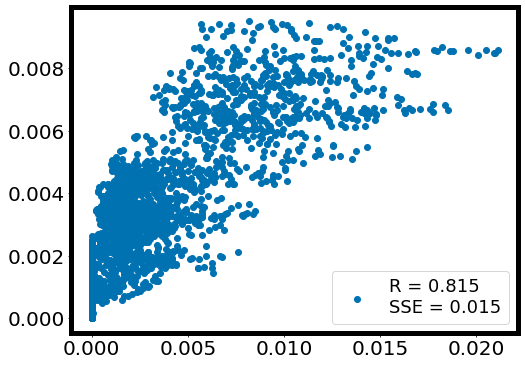

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 8, cycle 3
Epoch: 0, Loss: 240.61334, Residuals: -0.18794, Convergence:   inf
Epoch: 10, Loss: 207.15915, Residuals: -0.17560, Convergence: 0.015192
Epoch: 20, Loss: 178.02284, Residuals: -0.16431, Convergence: 0.015359
Epoch: 30, Loss: 152.70929, Residuals: -0.15367, Convergence: 0.015509
Epoch: 40, Loss: 130.92424, Residuals: -0.14360, Convergence: 0.015504
Epoch: 50, Loss: 112.34217, Residuals: -0.13422, Convergence: 0.015258
Epoch: 60, Loss: 96.74841, Residuals: -0.12490, Convergence: 0.014960
Epoch: 70, Loss: 83.70014, Residuals: -0.11584, Convergence: 0.014375
Epoch: 80, Loss: 72.80966, Residuals: -0.10706, Convergence: 0.013868
Epoch: 90, Loss: 63.69184, Residuals: -0.09860, Convergence: 0.012711
Epoch: 100, Loss: 55.97820, Residuals: -0.09051, Convergence: 0.012895
Epoch: 110, Loss: 49.38050, Residuals: -0.08334, Converge

Epoch: 930, Loss: 179.53311, Residuals: -0.00566, Convergence: 0.002679
Epoch: 940, Loss: 176.07806, Residuals: -0.00621, Convergence: 0.002059
Epoch: 950, Loss: 173.27800, Residuals: -0.00643, Convergence: 0.001135

Epoch: 951, Evidence: 822.28937, Convergence: -0.009476
Epoch: 960, Loss: 184.77008, Residuals: -0.00464, Convergence: 0.001346
Epoch: 970, Loss: 182.36606, Residuals: -0.00472, Convergence: 0.001250

Epoch: 973, Evidence: 830.58820, Convergence: 0.000610
Epoch: 980, Loss: 180.13065, Residuals: -0.00553, Convergence: 0.002480
Epoch: 990, Loss: 176.41483, Residuals: -0.00620, Convergence: 0.002290
Epoch: 1000, Loss: 173.65869, Residuals: -0.00647, Convergence: 0.000950

Epoch: 1000, Evidence: 823.30933, Convergence: -0.008225


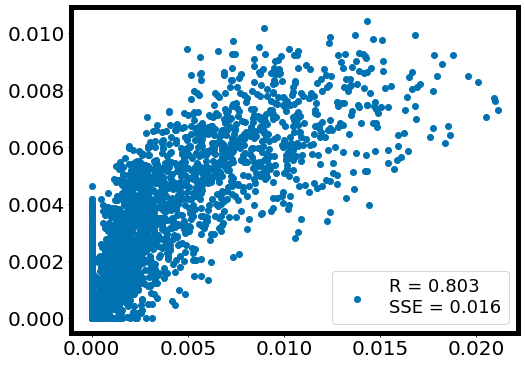

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 8, cycle 4
Epoch: 0, Loss: 319.26921, Residuals: -0.15595, Convergence:   inf
Epoch: 10, Loss: 275.41428, Residuals: -0.14483, Convergence: 0.014934
Epoch: 20, Loss: 237.36444, Residuals: -0.13436, Convergence: 0.015041
Epoch: 30, Loss: 204.43144, Residuals: -0.12423, Convergence: 0.015001
Epoch: 40, Loss: 176.20900, Residuals: -0.11443, Convergence: 0.014937
Epoch: 50, Loss: 152.25545, Residuals: -0.10546, Convergence: 0.014509
Epoch: 60, Loss: 132.36769, Residuals: -0.09711, Convergence: 0.013891
Epoch: 70, Loss: 115.79465, Residuals: -0.08932, Convergence: 0.013146
Epoch: 80, Loss: 101.94189, Residuals: -0.08210, Convergence: 0.012551
Epoch: 90, Loss: 90.36513, Residuals: -0.07513, Convergence: 0.011779
Epoch: 100, Loss: 80.62759, Residuals: -0.06878, Convergence: 0.011110
Epoch: 110, Loss: 72.34661, Residuals: -0.06299, Conve

Epoch: 1000, Loss: 235.98700, Residuals: -0.01324, Convergence: 0.001142

Epoch: 1002, Evidence: 1154.33435, Convergence: 0.007860
Epoch: 1010, Loss: 238.78751, Residuals: -0.01362, Convergence: 0.001569
Epoch: 1020, Loss: 235.76672, Residuals: -0.01374, Convergence: 0.001091

Epoch: 1023, Evidence: 1150.07556, Convergence: -0.003703

Epoch: 1027, Evidence: 1161.18945, Convergence: 0.005904

Epoch: 1028, Evidence: 1164.64502, Convergence: 0.002967
Epoch: 1030, Loss: 250.35001, Residuals: -0.01309, Convergence: 0.001067

Epoch: 1031, Evidence: 1163.32153, Convergence: -0.001138


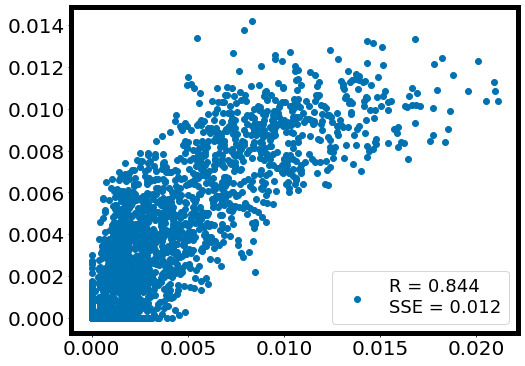

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 8, cycle 5
Epoch: 0, Loss: 411.80953, Residuals: -0.15006, Convergence:   inf
Epoch: 10, Loss: 355.44977, Residuals: -0.13842, Convergence: 0.014913
Epoch: 20, Loss: 306.28616, Residuals: -0.12741, Convergence: 0.015055
Epoch: 30, Loss: 263.84946, Residuals: -0.11717, Convergence: 0.014961
Epoch: 40, Loss: 227.65996, Residuals: -0.10786, Convergence: 0.014810
Epoch: 50, Loss: 197.01112, Residuals: -0.09968, Convergence: 0.014369
Epoch: 60, Loss: 171.48102, Residuals: -0.09190, Convergence: 0.013677
Epoch: 70, Loss: 150.23755, Residuals: -0.08454, Convergence: 0.013108
Epoch: 80, Loss: 132.55643, Residuals: -0.07793, Convergence: 0.012358
Epoch: 90, Loss: 117.81851, Residuals: -0.07206, Convergence: 0.011512
Epoch: 100, Loss: 105.46824, Residuals: -0.06668, Convergence: 0.011036
Epoch: 110, Loss: 94.58794, Residuals: -0.06170, Con

Epoch: 990, Loss: 305.15784, Residuals: -0.00837, Convergence: 0.001134

Epoch: 991, Evidence: 1516.38562, Convergence: 0.005153
Epoch: 1000, Loss: 308.37878, Residuals: -0.00883, Convergence: 0.001519
Epoch: 1010, Loss: 304.53375, Residuals: -0.00886, Convergence: 0.001049

Epoch: 1017, Evidence: 1514.29443, Convergence: -0.001381

Epoch: 1019, Evidence: 1525.02930, Convergence: 0.005668
Epoch: 1020, Loss: 318.87921, Residuals: -0.00831, Convergence: 0.001037

Epoch: 1021, Evidence: 1526.43262, Convergence: 0.000919
Epoch: 1030, Loss: 314.90125, Residuals: -0.00885, Convergence: 0.001581
Epoch: 1040, Loss: 310.66315, Residuals: -0.00895, Convergence: 0.001250

Epoch: 1044, Evidence: 1518.03125, Convergence: -0.004610


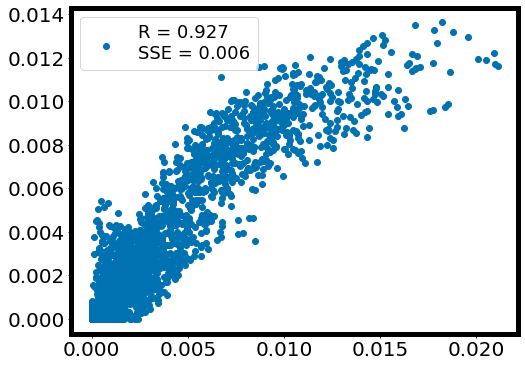

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 544.65611, Residuals: 0.06401, Convergence:   inf
Epoch: 10, Loss: 468.99460, Residuals: 0.05576, Convergence: 0.015166
Epoch: 20, Loss: 403.37317, Residuals: 0.04874, Convergence: 0.015180
Epoch: 30, Loss: 347.36096, Residuals: 0.04220, Convergence: 0.014876
Epoch: 40, Loss: 300.45129, Residuals: 0.03611, Convergence: 0.014402
Epoch: 50, Loss: 261.25824, Residuals: 0.03045, Convergence: 0.013849
Epoch: 60, Loss: 228.37169, Residuals: 0.02551, Convergence: 0.013417
Epoch: 70, Loss: 200.24762, Residuals: 0.02112, Convergence: 0.013022
Epoch: 80, Loss: 176.45692, Residuals: 0.01763, Convergence: 0.012424
Epoch: 90, Loss: 156.18732, Residuals: 0.01495, Convergence: 0.012118
Epoch: 100, Loss: 138.67841, Residuals: 0.01337, Convergence: 0.011989
Epoch: 110, Loss: 123.55031, Residuals: 0.01205, Convergence: 0.011485
Epoch: 120, Loss:

Epoch: 920, Loss: 403.32596, Residuals: -0.00393, Convergence: 0.001004

Epoch: 924, Evidence: 1912.43628, Convergence: 0.000757
Epoch: 930, Loss: 397.86996, Residuals: -0.00547, Convergence: 0.001866
Epoch: 940, Loss: 391.78192, Residuals: -0.00615, Convergence: 0.001323

Epoch: 942, Evidence: 1905.46411, Convergence: -0.002899


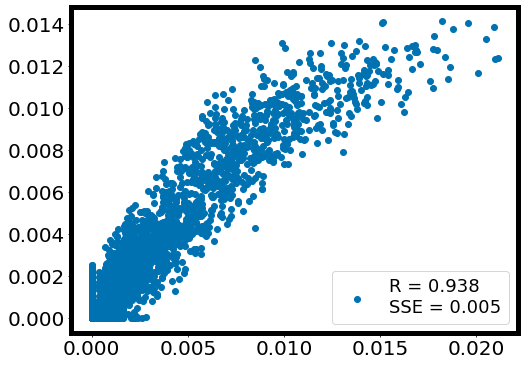

Running trial 9, cycle 1
Epoch: 0, Loss: 91.35610, Residuals: -0.70278, Convergence:   inf
Epoch: 10, Loss: 78.65704, Residuals: -0.65113, Convergence: 0.015232
Epoch: 20, Loss: 67.60863, Residuals: -0.60363, Convergence: 0.015231
Epoch: 30, Loss: 58.14410, Residuals: -0.55986, Convergence: 0.015172
Epoch: 40, Loss: 50.01513, Residuals: -0.51972, Convergence: 0.015196
Epoch: 50, Loss: 42.97615, Residuals: -0.48301, Convergence: 0.015379
Epoch: 60, Loss: 36.86125, Residuals: -0.44908, Convergence: 0.015540
Epoch: 70, Loss: 31.64364, Residuals: -0.41626, Convergence: 0.015564
Epoch: 80, Loss: 27.25436, Residuals: -0.38557, Convergence: 0.015280
Epoch: 90, Loss: 23.53598, Residuals: -0.35797, Convergence: 0.015014
Epoch: 100, Loss: 20.42834, Residuals: -0.33263, Convergence: 0.014491
Epoch: 110, Loss: 17.83297, Residuals: -0.30950, Convergence: 0.013920
Epoch: 120, Loss: 15.67109, Residuals: -0.28829, Convergence: 0.012694
Epoch: 130, Loss: 13.86928, Residuals: -0.26898, Convergence: 0.01

Epoch: 780, Loss: 48.87382, Residuals: -0.01177, Convergence: 0.001168
Epoch: 790, Loss: 48.14339, Residuals: -0.01106, Convergence: 0.001213
Epoch: 800, Loss: 47.47570, Residuals: -0.01039, Convergence: 0.001300
Epoch: 810, Loss: 46.87209, Residuals: -0.00974, Convergence: 0.000987

Epoch: 810, Evidence: 216.20189, Convergence: 0.005164
Epoch: 810, Loss: 48.20298, Residuals: -0.00974, Convergence:   inf
Epoch: 820, Loss: 47.44773, Residuals: -0.00922, Convergence: 0.001412
Epoch: 830, Loss: 46.77580, Residuals: -0.00872, Convergence: 0.001501

Epoch: 835, Evidence: 218.68393, Convergence: 0.011350
Epoch: 840, Loss: 47.58398, Residuals: -0.00820, Convergence: 0.001811
Epoch: 850, Loss: 46.87289, Residuals: -0.00775, Convergence: 0.001299

Epoch: 852, Evidence: 221.54085, Convergence: 0.012896
Epoch: 860, Loss: 47.79232, Residuals: -0.00734, Convergence: 0.000807

Epoch: 860, Evidence: 222.54056, Convergence: 0.004492
Epoch: 860, Loss: 49.40126, Residuals: -0.00734, Convergence:   inf
E

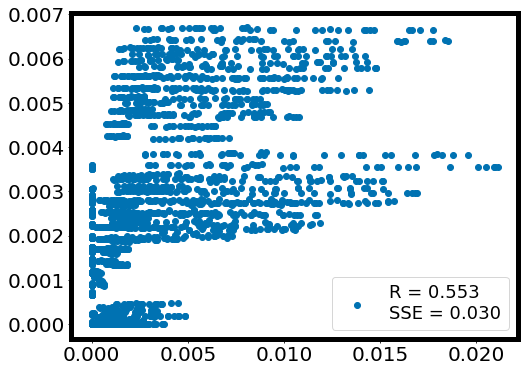

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 9, cycle 2
Epoch: 0, Loss: 176.55679, Residuals: -0.34885, Convergence:   inf
Epoch: 10, Loss: 151.44958, Residuals: -0.32303, Convergence: 0.015609
Epoch: 20, Loss: 129.58640, Residuals: -0.29957, Convergence: 0.015839
Epoch: 30, Loss: 110.48347, Residuals: -0.27816, Convergence: 0.016268
Epoch: 40, Loss: 93.88959, Residuals: -0.25851, Convergence: 0.016471
Epoch: 50, Loss: 79.75661, Residuals: -0.24051, Convergence: 0.016394
Epoch: 60, Loss: 67.76518, Residuals: -0.22377, Convergence: 0.016476
Epoch: 70, Loss: 57.59744, Residuals: -0.20828, Convergence: 0.016282
Epoch: 80, Loss: 49.17783, Residuals: -0.19341, Convergence: 0.015863
Epoch: 90, Loss: 42.13393, Residuals: -0.17990, Convergence: 0.015533
Epoch: 100, Loss: 36.25021, Residuals: -0.16767, Convergence: 0.014949
Epoch: 110, Loss: 31.37182, Residuals: -0.15629, Convergenc

Epoch: 1000, Loss: 60.72359, Residuals: -0.01345, Convergence: 0.001978
Epoch: 1010, Loss: 59.75815, Residuals: -0.01334, Convergence: 0.001474

Epoch: 1017, Evidence: 437.60355, Convergence: 0.056000
Epoch: 1020, Loss: 65.39723, Residuals: -0.01329, Convergence: 0.002199
Epoch: 1030, Loss: 64.04540, Residuals: -0.01355, Convergence: 0.001797
Epoch: 1040, Loss: 62.88140, Residuals: -0.01364, Convergence: 0.001911
Epoch: 1050, Loss: 61.85532, Residuals: -0.01368, Convergence: 0.001469
Epoch: 1060, Loss: 60.93680, Residuals: -0.01359, Convergence: 0.001131

Epoch: 1065, Evidence: 438.32910, Convergence: 0.001655
Epoch: 1070, Loss: 66.01947, Residuals: -0.01368, Convergence: 0.002326
Epoch: 1080, Loss: 64.72601, Residuals: -0.01394, Convergence: 0.001531
Epoch: 1090, Loss: 63.56992, Residuals: -0.01407, Convergence: 0.001874
Epoch: 1100, Loss: 62.54174, Residuals: -0.01412, Convergence: 0.001560

Epoch: 1107, Evidence: 440.06119, Convergence: 0.003936
Epoch: 1110, Loss: 67.39771, Residual

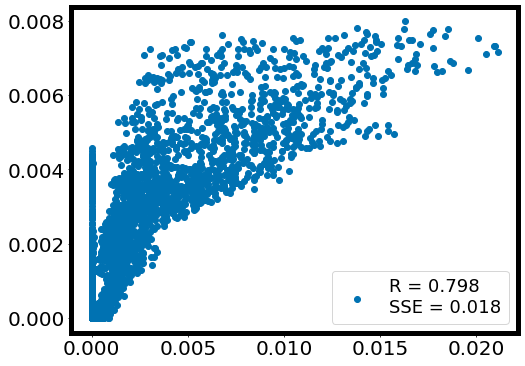

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 9, cycle 3
Epoch: 0, Loss: 274.76567, Residuals: 0.03139, Convergence:   inf
Epoch: 10, Loss: 236.72229, Residuals: 0.02398, Convergence: 0.014978
Epoch: 20, Loss: 204.09816, Residuals: 0.01737, Convergence: 0.014943
Epoch: 30, Loss: 175.92557, Residuals: 0.01153, Convergence: 0.014955
Epoch: 40, Loss: 151.95308, Residuals: 0.00636, Convergence: 0.014568
Epoch: 50, Loss: 131.96742, Residuals: 0.00248, Convergence: 0.013794
Epoch: 60, Loss: 115.27888, Residuals: -0.00069, Convergence: 0.013399
Epoch: 70, Loss: 101.33667, Residuals: -0.00292, Convergence: 0.012677
Epoch: 80, Loss: 88.86581, Residuals: -0.00399, Convergence: 0.013458
Epoch: 90, Loss: 77.63792, Residuals: -0.00479, Convergence: 0.014020
Epoch: 100, Loss: 67.87941, Residuals: -0.00484, Convergence: 0.013838
Epoch: 110, Loss: 59.50261, Residuals: -0.00423, Convergence:

Epoch: 1000, Loss: 146.17755, Residuals: -0.00463, Convergence: 0.002154
Epoch: 1010, Loss: 143.55322, Residuals: -0.00495, Convergence: 0.001614
Epoch: 1020, Loss: 141.44536, Residuals: -0.00497, Convergence: 0.001445

Epoch: 1022, Evidence: 836.11328, Convergence: 0.027613
Epoch: 1030, Loss: 148.12105, Residuals: -0.00581, Convergence: 0.002339
Epoch: 1040, Loss: 145.20721, Residuals: -0.00655, Convergence: 0.001855
Epoch: 1050, Loss: 142.94760, Residuals: -0.00685, Convergence: 0.001593

Epoch: 1059, Evidence: 836.37488, Convergence: 0.000313
Epoch: 1060, Loss: 145.59277, Residuals: -0.00744, Convergence: 0.003456
Epoch: 1070, Loss: 140.98508, Residuals: -0.01169, Convergence: 0.002902

Epoch: 1075, Evidence: 831.96240, Convergence: -0.004989
Epoch: 1080, Loss: 158.35007, Residuals: -0.00567, Convergence: 0.003181
Epoch: 1090, Loss: 154.26474, Residuals: -0.00677, Convergence: 0.002429
Epoch: 1100, Loss: 151.13287, Residuals: -0.00735, Convergence: 0.001781
Epoch: 1110, Loss: 148.58

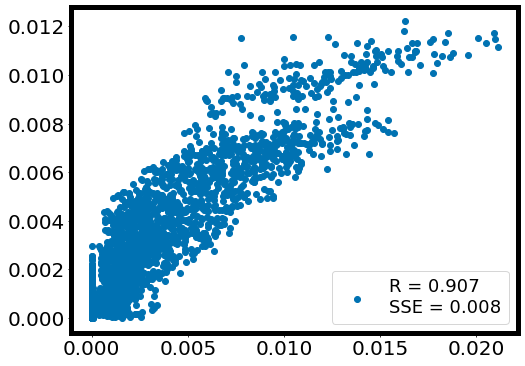

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 9, cycle 4
Epoch: 0, Loss: 449.83241, Residuals: 0.21151, Convergence:   inf
Epoch: 10, Loss: 382.71704, Residuals: 0.18840, Convergence: 0.016396
Epoch: 20, Loss: 325.13556, Residuals: 0.16773, Convergence: 0.016449
Epoch: 30, Loss: 276.41095, Residuals: 0.14937, Convergence: 0.016099
Epoch: 40, Loss: 235.32802, Residuals: 0.13352, Convergence: 0.016127
Epoch: 50, Loss: 200.87578, Residuals: 0.12005, Convergence: 0.015623
Epoch: 60, Loss: 172.25519, Residuals: 0.10788, Convergence: 0.015404
Epoch: 70, Loss: 148.40811, Residuals: 0.09723, Convergence: 0.014979
Epoch: 80, Loss: 128.74812, Residuals: 0.08810, Convergence: 0.014053
Epoch: 90, Loss: 111.72179, Residuals: 0.07946, Convergence: 0.014641
Epoch: 100, Loss: 96.65595, Residuals: 0.07138, Convergence: 0.014264
Epoch: 110, Loss: 83.75629, Residuals: 0.06416, Convergence: 0.0

Epoch: 960, Loss: 239.58144, Residuals: -0.01489, Convergence: 0.001904
Epoch: 970, Loss: 235.53815, Residuals: -0.01589, Convergence: 0.001690

Epoch: 976, Evidence: 1157.36377, Convergence: -0.010104


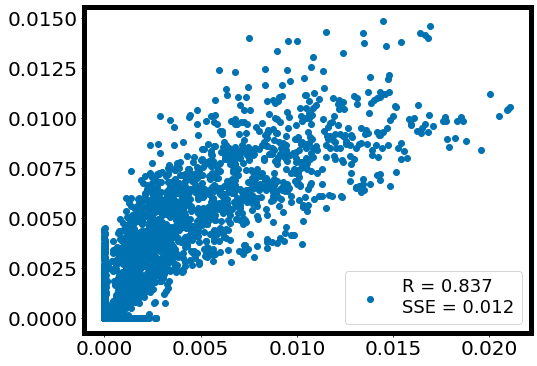

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 9, cycle 5
Epoch: 0, Loss: 596.17394, Residuals: 0.23827, Convergence:   inf
Epoch: 10, Loss: 506.41382, Residuals: 0.21340, Convergence: 0.016525
Epoch: 20, Loss: 429.91162, Residuals: 0.19120, Convergence: 0.016480
Epoch: 30, Loss: 365.74429, Residuals: 0.17133, Convergence: 0.016143
Epoch: 40, Loss: 312.23846, Residuals: 0.15421, Convergence: 0.015884
Epoch: 50, Loss: 266.88492, Residuals: 0.13935, Convergence: 0.015570
Epoch: 60, Loss: 228.80219, Residuals: 0.12521, Convergence: 0.015171
Epoch: 70, Loss: 196.91885, Residuals: 0.11232, Convergence: 0.014906
Epoch: 80, Loss: 170.34457, Residuals: 0.10081, Convergence: 0.014341
Epoch: 90, Loss: 148.16083, Residuals: 0.09081, Convergence: 0.013874
Epoch: 100, Loss: 129.42044, Residuals: 0.08169, Convergence: 0.013447
Epoch: 110, Loss: 113.61126, Residuals: 0.07344, Convergence: 0

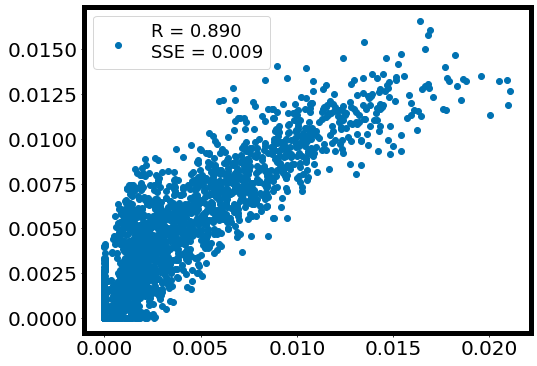

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 731.39800, Residuals: 0.26185, Convergence:   inf
Epoch: 10, Loss: 620.23535, Residuals: 0.23526, Convergence: 0.016717
Epoch: 20, Loss: 525.57629, Residuals: 0.21149, Convergence: 0.016631
Epoch: 30, Loss: 446.36652, Residuals: 0.19013, Convergence: 0.016267
Epoch: 40, Loss: 381.05331, Residuals: 0.17156, Convergence: 0.015709
Epoch: 50, Loss: 325.78577, Residuals: 0.15461, Convergence: 0.015600
Epoch: 60, Loss: 279.61569, Residuals: 0.13967, Convergence: 0.015166
Epoch: 70, Loss: 240.91240, Residuals: 0.12601, Convergence: 0.014918
Epoch: 80, Loss: 208.50766, Residuals: 0.11358, Convergence: 0.014343
Epoch: 90, Loss: 181.54222, Residuals: 0.10264, Convergence: 0.013668
Epoch: 100, Loss: 158.98117, Residuals: 0.09285, Convergence: 0.012992
Epoch: 110, Loss: 140.00180, Residuals: 0.08399, Convergence: 0.012650
Epoch: 120, Loss:

Epoch: 960, Loss: 395.99084, Residuals: -0.00964, Convergence: 0.001044

Epoch: 962, Evidence: 1896.03223, Convergence: -0.000354
Epoch: 970, Loss: 391.32007, Residuals: -0.01099, Convergence: 0.001923
Epoch: 980, Loss: 385.82880, Residuals: -0.01108, Convergence: 0.001052

Epoch: 983, Evidence: 1887.28052, Convergence: -0.004993
Epoch: 990, Loss: 401.30823, Residuals: -0.00968, Convergence: 0.001286

Epoch: 998, Evidence: 1897.76392, Convergence: 0.000558
Epoch: 1000, Loss: 397.28201, Residuals: -0.01020, Convergence: 0.002140
Epoch: 1010, Loss: 389.87262, Residuals: -0.01130, Convergence: 0.001431
Epoch: 1020, Loss: 384.90964, Residuals: -0.01085, Convergence: 0.001154

Epoch: 1021, Evidence: 1886.56226, Convergence: -0.005376


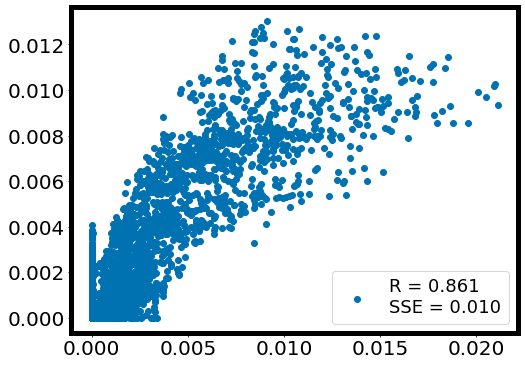

Running trial 10, cycle 1
Epoch: 0, Loss: 128.01547, Residuals: -0.38143, Convergence:   inf
Epoch: 10, Loss: 107.87662, Residuals: -0.36129, Convergence: 0.017214
Epoch: 20, Loss: 90.98529, Residuals: -0.34253, Convergence: 0.017140
Epoch: 30, Loss: 76.82539, Residuals: -0.32446, Convergence: 0.016978
Epoch: 40, Loss: 64.98627, Residuals: -0.30761, Convergence: 0.016796
Epoch: 50, Loss: 55.06518, Residuals: -0.29243, Convergence: 0.016623
Epoch: 60, Loss: 46.74895, Residuals: -0.27897, Convergence: 0.016398
Epoch: 70, Loss: 39.75639, Residuals: -0.26701, Convergence: 0.016186
Epoch: 80, Loss: 33.92777, Residuals: -0.25620, Convergence: 0.015813
Epoch: 90, Loss: 29.06980, Residuals: -0.24637, Convergence: 0.015393
Epoch: 100, Loss: 25.02254, Residuals: -0.23735, Convergence: 0.014886
Epoch: 110, Loss: 21.68965, Residuals: -0.22882, Convergence: 0.014554
Epoch: 120, Loss: 18.90504, Residuals: -0.22039, Convergence: 0.012777
Epoch: 130, Loss: 16.57820, Residuals: -0.21216, Convergence: 0


Epoch: 837, Evidence: 249.97409, Convergence: -0.001496


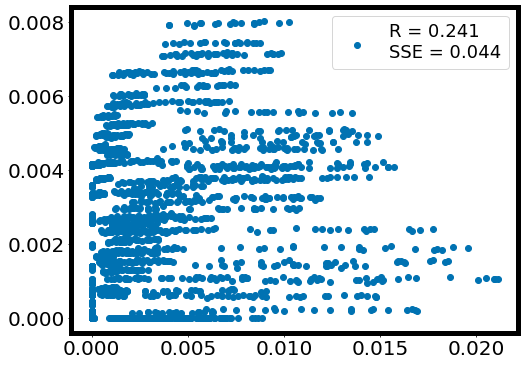

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 10, cycle 2
Epoch: 0, Loss: 192.47406, Residuals: -0.15996, Convergence:   inf
Epoch: 10, Loss: 164.04739, Residuals: -0.15062, Convergence: 0.016261
Epoch: 20, Loss: 139.58859, Residuals: -0.14154, Convergence: 0.016257
Epoch: 30, Loss: 118.85812, Residuals: -0.13295, Convergence: 0.016167
Epoch: 40, Loss: 101.25523, Residuals: -0.12477, Convergence: 0.016162
Epoch: 50, Loss: 86.29250, Residuals: -0.11710, Convergence: 0.015839
Epoch: 60, Loss: 73.62293, Residuals: -0.11009, Convergence: 0.015941
Epoch: 70, Loss: 63.00038, Residuals: -0.10379, Convergence: 0.015564
Epoch: 80, Loss: 54.16096, Residuals: -0.09785, Convergence: 0.015023
Epoch: 90, Loss: 46.73643, Residuals: -0.09236, Convergence: 0.014796
Epoch: 100, Loss: 40.44005, Residuals: -0.08681, Convergence: 0.014719
Epoch: 110, Loss: 34.93111, Residuals: -0.08168, Converge

Epoch: 1000, Loss: 79.58862, Residuals: -0.00358, Convergence: 0.002085
Epoch: 1010, Loss: 78.17511, Residuals: -0.00377, Convergence: 0.001475
Epoch: 1020, Loss: 77.00014, Residuals: -0.00378, Convergence: 0.001377

Epoch: 1021, Evidence: 506.25751, Convergence: 0.010185
Epoch: 1030, Loss: 80.77954, Residuals: -0.00411, Convergence: 0.002226
Epoch: 1040, Loss: 79.13050, Residuals: -0.00419, Convergence: 0.001745
Epoch: 1050, Loss: 77.81244, Residuals: -0.00422, Convergence: 0.001242
Epoch: 1060, Loss: 76.70119, Residuals: -0.00412, Convergence: 0.001380
Epoch: 1070, Loss: 75.77102, Residuals: -0.00397, Convergence: 0.001068

Epoch: 1074, Evidence: 502.57800, Convergence: -0.007321
Epoch: 1080, Loss: 86.37912, Residuals: -0.00380, Convergence: 0.001243
Epoch: 1090, Loss: 85.13135, Residuals: -0.00379, Convergence: 0.001367
Epoch: 1100, Loss: 84.02274, Residuals: -0.00376, Convergence: 0.001297
Epoch: 1110, Loss: 83.05852, Residuals: -0.00370, Convergence: 0.000990

Epoch: 1110, Evidenc

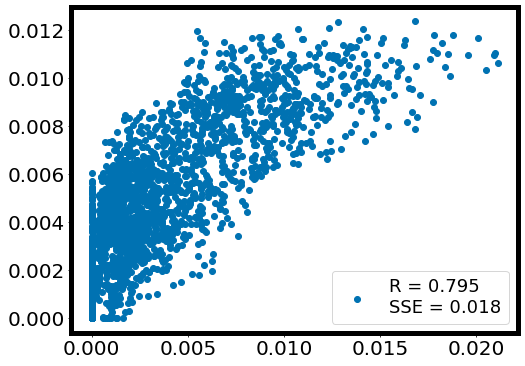

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 10, cycle 3
Epoch: 0, Loss: 308.01970, Residuals: -0.09937, Convergence:   inf
Epoch: 10, Loss: 261.80087, Residuals: -0.09304, Convergence: 0.016481
Epoch: 20, Loss: 222.32152, Residuals: -0.08694, Convergence: 0.016445
Epoch: 30, Loss: 188.95541, Residuals: -0.08101, Convergence: 0.016359
Epoch: 40, Loss: 160.77585, Residuals: -0.07547, Convergence: 0.016202
Epoch: 50, Loss: 137.24240, Residuals: -0.07045, Convergence: 0.015682
Epoch: 60, Loss: 117.71958, Residuals: -0.06585, Convergence: 0.015180
Epoch: 70, Loss: 101.42943, Residuals: -0.06128, Convergence: 0.014893
Epoch: 80, Loss: 87.62012, Residuals: -0.05691, Convergence: 0.014708
Epoch: 90, Loss: 75.68242, Residuals: -0.05317, Convergence: 0.014687
Epoch: 100, Loss: 65.42693, Residuals: -0.05020, Convergence: 0.014525
Epoch: 110, Loss: 56.85015, Residuals: -0.04772, Conve

Epoch: 950, Loss: 158.79460, Residuals: -0.00668, Convergence: 0.002545

Epoch: 953, Evidence: 917.03235, Convergence: 0.005827
Epoch: 960, Loss: 161.74068, Residuals: -0.00719, Convergence: 0.001641

Epoch: 966, Evidence: 919.76324, Convergence: 0.002969
Epoch: 970, Loss: 163.59360, Residuals: -0.00764, Convergence: 0.002961
Epoch: 980, Loss: 159.72647, Residuals: -0.00799, Convergence: 0.002758
Epoch: 990, Loss: 156.45731, Residuals: -0.00795, Convergence: 0.001750

Epoch: 998, Evidence: 917.48212, Convergence: -0.002486
Epoch: 1000, Loss: 167.67212, Residuals: -0.00737, Convergence: 0.001466
Epoch: 1010, Loss: 165.06381, Residuals: -0.00732, Convergence: 0.001605
Epoch: 1020, Loss: 162.98398, Residuals: -0.00723, Convergence: 0.000981

Epoch: 1020, Evidence: 926.90222, Convergence: 0.007702
Epoch: 1020, Loss: 168.10495, Residuals: -0.00723, Convergence:   inf

Epoch: 1027, Evidence: 929.09229, Convergence: 0.002357
Epoch: 1030, Loss: 169.84354, Residuals: -0.00720, Convergence: 0.00

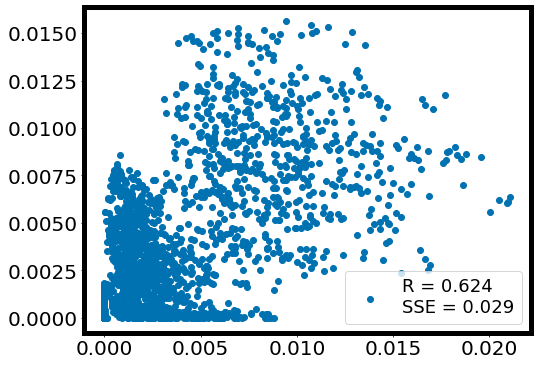

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 10, cycle 4
Epoch: 0, Loss: 415.15437, Residuals: -0.02997, Convergence:   inf
Epoch: 10, Loss: 353.14923, Residuals: -0.02974, Convergence: 0.016383
Epoch: 20, Loss: 300.34940, Residuals: -0.02956, Convergence: 0.016259
Epoch: 30, Loss: 255.78914, Residuals: -0.02953, Convergence: 0.016150
Epoch: 40, Loss: 218.00148, Residuals: -0.03012, Convergence: 0.016066
Epoch: 50, Loss: 187.05316, Residuals: -0.02961, Convergence: 0.014863
Epoch: 60, Loss: 161.18460, Residuals: -0.02849, Convergence: 0.015117
Epoch: 70, Loss: 139.45464, Residuals: -0.02708, Convergence: 0.014283
Epoch: 80, Loss: 120.99291, Residuals: -0.02557, Convergence: 0.013831
Epoch: 90, Loss: 105.64967, Residuals: -0.02403, Convergence: 0.013303
Epoch: 100, Loss: 92.56219, Residuals: -0.02308, Convergence: 0.012489
Epoch: 110, Loss: 81.64993, Residuals: -0.02205, Con


Epoch: 974, Evidence: 1165.29028, Convergence: -0.008094
Epoch: 980, Loss: 239.00723, Residuals: -0.00870, Convergence: 0.002404
Epoch: 990, Loss: 234.53229, Residuals: -0.00919, Convergence: 0.001842
Epoch: 1000, Loss: 231.04688, Residuals: -0.00933, Convergence: 0.001054

Epoch: 1004, Evidence: 1182.37610, Convergence: 0.006473
Epoch: 1010, Loss: 234.66510, Residuals: -0.00966, Convergence: 0.002051
Epoch: 1020, Loss: 230.98454, Residuals: -0.00994, Convergence: 0.001646

Epoch: 1029, Evidence: 1180.83301, Convergence: -0.001307
Epoch: 1030, Loss: 239.80872, Residuals: -0.00930, Convergence: 0.001408
Epoch: 1040, Loss: 237.23245, Residuals: -0.00925, Convergence: 0.000896

Epoch: 1040, Evidence: 1192.38672, Convergence: 0.008395
Epoch: 1040, Loss: 242.87750, Residuals: -0.00925, Convergence:   inf

Epoch: 1049, Evidence: 1191.40820, Convergence: -0.000821
Epoch: 1050, Loss: 242.04672, Residuals: -0.00927, Convergence: 0.001852
Epoch: 1060, Loss: 237.45157, Residuals: -0.00978, Conve

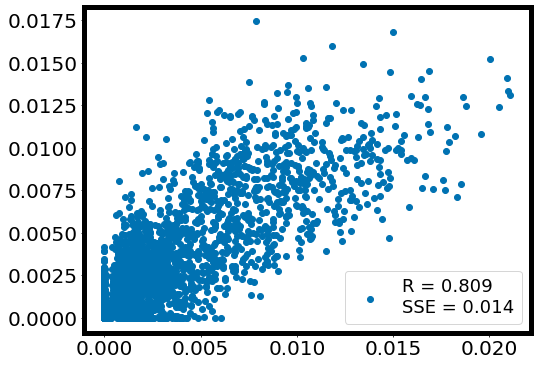

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 10, cycle 5
Epoch: 0, Loss: 553.99236, Residuals: -0.05241, Convergence:   inf
Epoch: 10, Loss: 470.52231, Residuals: -0.04923, Convergence: 0.016462
Epoch: 20, Loss: 399.99487, Residuals: -0.04633, Convergence: 0.016290
Epoch: 30, Loss: 340.47580, Residuals: -0.04386, Convergence: 0.016213
Epoch: 40, Loss: 290.22952, Residuals: -0.04240, Convergence: 0.015913
Epoch: 50, Loss: 248.65123, Residuals: -0.04015, Convergence: 0.015393
Epoch: 60, Loss: 213.81091, Residuals: -0.03751, Convergence: 0.015311
Epoch: 70, Loss: 184.20963, Residuals: -0.03493, Convergence: 0.015012
Epoch: 80, Loss: 158.96954, Residuals: -0.03264, Convergence: 0.015066
Epoch: 90, Loss: 136.98891, Residuals: -0.03105, Convergence: 0.014917
Epoch: 100, Loss: 118.43100, Residuals: -0.02925, Convergence: 0.014608
Epoch: 110, Loss: 102.56267, Residuals: -0.02781, C

Epoch: 970, Loss: 303.76538, Residuals: -0.00819, Convergence: 0.001114

Epoch: 972, Evidence: 1636.31970, Convergence: -0.001094

Epoch: 973, Evidence: 1644.72131, Convergence: 0.004020

Epoch: 974, Evidence: 1645.61414, Convergence: 0.000543
Epoch: 980, Loss: 314.25583, Residuals: -0.00834, Convergence: 0.001334
Epoch: 990, Loss: 310.33667, Residuals: -0.00844, Convergence: 0.001173

Epoch: 998, Evidence: 1638.86267, Convergence: -0.003575

Epoch: 999, Evidence: 1647.46985, Convergence: 0.001668
Epoch: 1000, Loss: 319.23373, Residuals: -0.00805, Convergence: 0.000898

Epoch: 1000, Evidence: 1649.04553, Convergence: 0.000956
Epoch: 1000, Loss: 319.54221, Residuals: -0.00805, Convergence:   inf
Epoch: 1010, Loss: 314.99597, Residuals: -0.00834, Convergence: 0.001242
Epoch: 1020, Loss: 311.27686, Residuals: -0.00837, Convergence: 0.001047

Epoch: 1023, Evidence: 1641.13159, Convergence: -0.003862


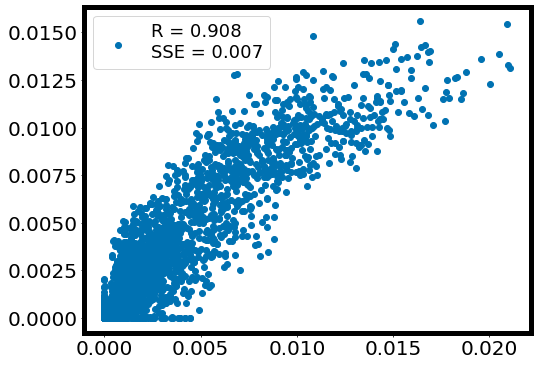

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 651.32207, Residuals: 0.08215, Convergence:   inf
Epoch: 10, Loss: 555.55768, Residuals: 0.07266, Convergence: 0.016111
Epoch: 20, Loss: 473.20950, Residuals: 0.06371, Convergence: 0.016210
Epoch: 30, Loss: 403.16757, Residuals: 0.05493, Convergence: 0.016058
Epoch: 40, Loss: 345.08295, Residuals: 0.04825, Convergence: 0.015180
Epoch: 50, Loss: 297.18451, Residuals: 0.04323, Convergence: 0.014905
Epoch: 60, Loss: 256.12701, Residuals: 0.03793, Convergence: 0.015260
Epoch: 70, Loss: 220.69019, Residuals: 0.03248, Convergence: 0.014978
Epoch: 80, Loss: 191.00533, Residuals: 0.02815, Convergence: 0.014434
Epoch: 90, Loss: 165.62177, Residuals: 0.02406, Convergence: 0.014258
Epoch: 100, Loss: 144.27289, Residuals: 0.02067, Convergence: 0.013919
Epoch: 110, Loss: 126.29080, Residuals: 0.01757, Convergence: 0.013370
Epoch: 120, Loss:


Epoch: 975, Evidence: 1880.68042, Convergence: 0.001045
Epoch: 980, Loss: 392.49048, Residuals: -0.00630, Convergence: 0.001663
Epoch: 990, Loss: 387.24915, Residuals: -0.00646, Convergence: 0.001049

Epoch: 995, Evidence: 1878.62378, Convergence: -0.001095


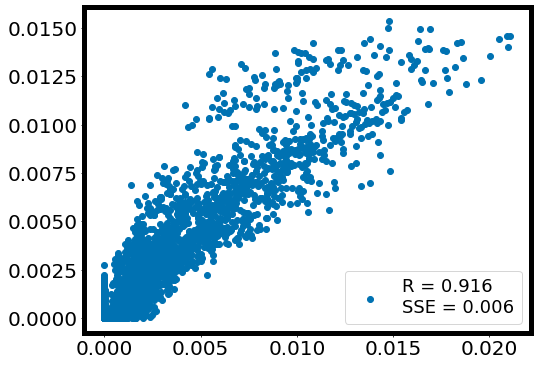

Running trial 11, cycle 1
Epoch: 0, Loss: 64.75874, Residuals: -0.40172, Convergence:   inf
Epoch: 10, Loss: 55.72920, Residuals: -0.37563, Convergence: 0.015151
Epoch: 20, Loss: 47.95163, Residuals: -0.35311, Convergence: 0.015116
Epoch: 30, Loss: 41.29254, Residuals: -0.33279, Convergence: 0.015026
Epoch: 40, Loss: 35.57778, Residuals: -0.31393, Convergence: 0.015008
Epoch: 50, Loss: 30.65109, Residuals: -0.29615, Convergence: 0.015026
Epoch: 60, Loss: 26.40777, Residuals: -0.27928, Convergence: 0.014989
Epoch: 70, Loss: 22.77103, Residuals: -0.26324, Convergence: 0.014875
Epoch: 80, Loss: 19.67662, Residuals: -0.24779, Convergence: 0.014592
Epoch: 90, Loss: 17.05750, Residuals: -0.23332, Convergence: 0.014269
Epoch: 100, Loss: 14.85956, Residuals: -0.21979, Convergence: 0.013723
Epoch: 110, Loss: 13.02053, Residuals: -0.20717, Convergence: 0.013090
Epoch: 120, Loss: 11.48309, Residuals: -0.19543, Convergence: 0.012311
Epoch: 130, Loss: 10.20116, Residuals: -0.18460, Convergence: 0.0

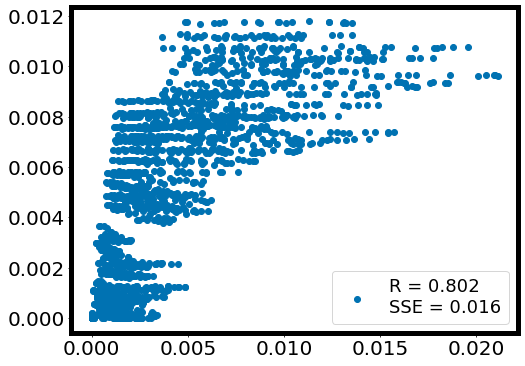

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 11, cycle 2
Epoch: 0, Loss: 144.13942, Residuals: -0.28685, Convergence:   inf
Epoch: 10, Loss: 123.62497, Residuals: -0.26684, Convergence: 0.015508
Epoch: 20, Loss: 105.97161, Residuals: -0.24860, Convergence: 0.015583
Epoch: 30, Loss: 90.66250, Residuals: -0.23153, Convergence: 0.015845
Epoch: 40, Loss: 77.40647, Residuals: -0.21540, Convergence: 0.015978
Epoch: 50, Loss: 66.07463, Residuals: -0.20020, Convergence: 0.015908
Epoch: 60, Loss: 56.44146, Residuals: -0.18578, Convergence: 0.015858
Epoch: 70, Loss: 48.38272, Residuals: -0.17222, Convergence: 0.015436
Epoch: 80, Loss: 41.63962, Residuals: -0.15969, Convergence: 0.014774
Epoch: 90, Loss: 36.00509, Residuals: -0.14820, Convergence: 0.014475
Epoch: 100, Loss: 31.29520, Residuals: -0.13769, Convergence: 0.013950
Epoch: 110, Loss: 27.32098, Residuals: -0.12797, Convergenc

Epoch: 1000, Loss: 58.26112, Residuals: -0.00964, Convergence: 0.001688

Epoch: 1002, Evidence: 460.43503, Convergence: -0.013989
Epoch: 1010, Loss: 68.05336, Residuals: -0.00815, Convergence: 0.001953
Epoch: 1020, Loss: 66.75069, Residuals: -0.00829, Convergence: 0.001965
Epoch: 1030, Loss: 65.65357, Residuals: -0.00833, Convergence: 0.001464
Epoch: 1040, Loss: 64.64281, Residuals: -0.00829, Convergence: 0.001890

Epoch: 1047, Evidence: 488.57236, Convergence: 0.044408
Epoch: 1050, Loss: 69.92749, Residuals: -0.00832, Convergence: 0.002025
Epoch: 1060, Loss: 68.59576, Residuals: -0.00853, Convergence: 0.001924
Epoch: 1070, Loss: 67.44075, Residuals: -0.00867, Convergence: 0.001243
Epoch: 1080, Loss: 66.38541, Residuals: -0.00866, Convergence: 0.001391

Epoch: 1083, Evidence: 490.93732, Convergence: 0.004817
Epoch: 1090, Loss: 71.12560, Residuals: -0.00885, Convergence: 0.002131
Epoch: 1100, Loss: 69.83701, Residuals: -0.00906, Convergence: 0.001360
Epoch: 1110, Loss: 68.66132, Residua

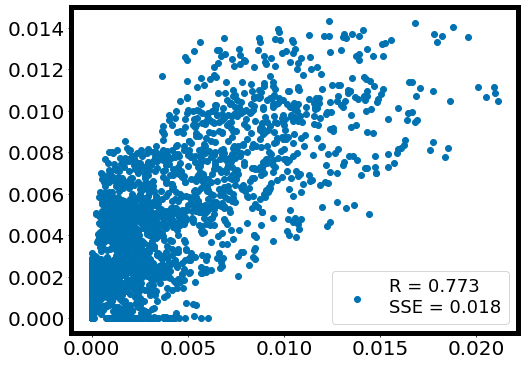

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 11, cycle 3
Epoch: 0, Loss: 240.79416, Residuals: -0.15069, Convergence:   inf
Epoch: 10, Loss: 206.55577, Residuals: -0.14116, Convergence: 0.015442
Epoch: 20, Loss: 177.14188, Residuals: -0.13277, Convergence: 0.015536
Epoch: 30, Loss: 151.77782, Residuals: -0.12508, Convergence: 0.015566
Epoch: 40, Loss: 130.18587, Residuals: -0.11768, Convergence: 0.015344
Epoch: 50, Loss: 112.04312, Residuals: -0.11039, Convergence: 0.014929
Epoch: 60, Loss: 96.87444, Residuals: -0.10324, Convergence: 0.014455
Epoch: 70, Loss: 84.19778, Residuals: -0.09612, Convergence: 0.014033
Epoch: 80, Loss: 73.40264, Residuals: -0.08935, Convergence: 0.013932
Epoch: 90, Loss: 64.12151, Residuals: -0.08317, Convergence: 0.013543
Epoch: 100, Loss: 56.23978, Residuals: -0.07732, Convergence: 0.012955
Epoch: 110, Loss: 49.62593, Residuals: -0.07156, Converg

Epoch: 960, Loss: 157.90329, Residuals: -0.00164, Convergence: 0.000295

Epoch: 960, Evidence: 856.02271, Convergence: -0.005410
Epoch: 960, Loss: 178.27869, Residuals: 0.00011, Convergence:   inf
Epoch: 970, Loss: 174.07825, Residuals: -0.00028, Convergence: 0.001983
Epoch: 980, Loss: 170.76151, Residuals: -0.00046, Convergence: 0.001795

Epoch: 986, Evidence: 868.28796, Convergence: 0.008792
Epoch: 990, Loss: 172.50356, Residuals: -0.00063, Convergence: 0.002154
Epoch: 1000, Loss: 169.42316, Residuals: -0.00079, Convergence: 0.001696
Epoch: 1010, Loss: 167.00777, Residuals: -0.00083, Convergence: 0.001091

Epoch: 1015, Evidence: 866.46265, Convergence: -0.002107
Epoch: 1020, Loss: 175.47304, Residuals: -0.00052, Convergence: 0.001354

Epoch: 1027, Evidence: 874.11682, Convergence: 0.006668
Epoch: 1030, Loss: 177.87503, Residuals: -0.00051, Convergence: 0.001354
Epoch: 1040, Loss: 175.91232, Residuals: -0.00050, Convergence: 0.001108

Epoch: 1043, Evidence: 874.77917, Convergence: 0.0

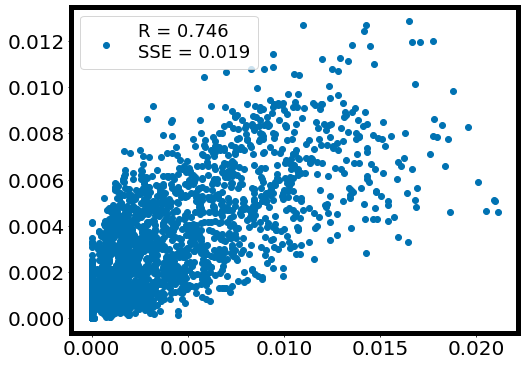

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 11, cycle 4
Epoch: 0, Loss: 381.72240, Residuals: -0.00625, Convergence:   inf
Epoch: 10, Loss: 326.24869, Residuals: -0.00925, Convergence: 0.015797
Epoch: 20, Loss: 278.90524, Residuals: -0.01172, Convergence: 0.015770
Epoch: 30, Loss: 238.83395, Residuals: -0.01394, Convergence: 0.015482
Epoch: 40, Loss: 205.02292, Residuals: -0.01586, Convergence: 0.015464
Epoch: 50, Loss: 176.18309, Residuals: -0.01733, Convergence: 0.015035
Epoch: 60, Loss: 152.30386, Residuals: -0.01732, Convergence: 0.014552
Epoch: 70, Loss: 132.11850, Residuals: -0.01689, Convergence: 0.014494
Epoch: 80, Loss: 114.59014, Residuals: -0.01619, Convergence: 0.014144
Epoch: 90, Loss: 99.73689, Residuals: -0.01493, Convergence: 0.013692
Epoch: 100, Loss: 87.15611, Residuals: -0.01382, Convergence: 0.013231
Epoch: 110, Loss: 76.65621, Residuals: -0.01308, Conv


Epoch: 914, Evidence: 1191.50085, Convergence: 0.002308

Epoch: 917, Evidence: 1195.77271, Convergence: 0.003572
Epoch: 920, Loss: 246.13275, Residuals: -0.01029, Convergence: 0.001390
Epoch: 930, Loss: 242.39658, Residuals: -0.01064, Convergence: 0.001191

Epoch: 937, Evidence: 1193.41467, Convergence: -0.001976
Epoch: 940, Loss: 248.35381, Residuals: -0.01010, Convergence: 0.001175

Epoch: 942, Evidence: 1198.75879, Convergence: 0.002491

Epoch: 943, Evidence: 1201.36938, Convergence: 0.002173

Epoch: 945, Evidence: 1201.55969, Convergence: 0.000158
Epoch: 950, Loss: 250.59207, Residuals: -0.01039, Convergence: 0.002008
Epoch: 960, Loss: 246.73682, Residuals: -0.01065, Convergence: 0.001574

Epoch: 969, Evidence: 1197.33569, Convergence: -0.003369
Epoch: 970, Loss: 253.27318, Residuals: -0.01006, Convergence: 0.001148

Epoch: 971, Evidence: 1202.37927, Convergence: 0.000840
Epoch: 980, Loss: 249.41486, Residuals: -0.01053, Convergence: 0.001875

Epoch: 985, Evidence: 1198.82104, Con

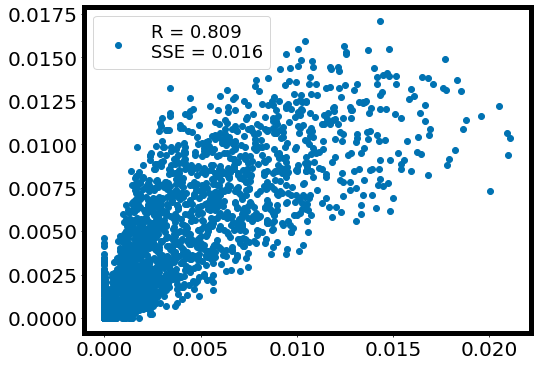

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 11, cycle 5
Epoch: 0, Loss: 493.85054, Residuals: -0.00982, Convergence:   inf
Epoch: 10, Loss: 421.26990, Residuals: -0.01119, Convergence: 0.016043
Epoch: 20, Loss: 359.12140, Residuals: -0.01223, Convergence: 0.016070
Epoch: 30, Loss: 306.31351, Residuals: -0.01339, Convergence: 0.016095
Epoch: 40, Loss: 261.56842, Residuals: -0.01428, Convergence: 0.015645
Epoch: 50, Loss: 225.07663, Residuals: -0.01380, Convergence: 0.014849
Epoch: 60, Loss: 194.54260, Residuals: -0.01337, Convergence: 0.014512
Epoch: 70, Loss: 168.84734, Residuals: -0.01288, Convergence: 0.014032
Epoch: 80, Loss: 146.95747, Residuals: -0.01233, Convergence: 0.013915
Epoch: 90, Loss: 128.36751, Residuals: -0.01198, Convergence: 0.013390
Epoch: 100, Loss: 112.70246, Residuals: -0.01144, Convergence: 0.012932
Epoch: 110, Loss: 99.29989, Residuals: -0.01104, Co


Epoch: 912, Evidence: 1514.10229, Convergence: -0.003727


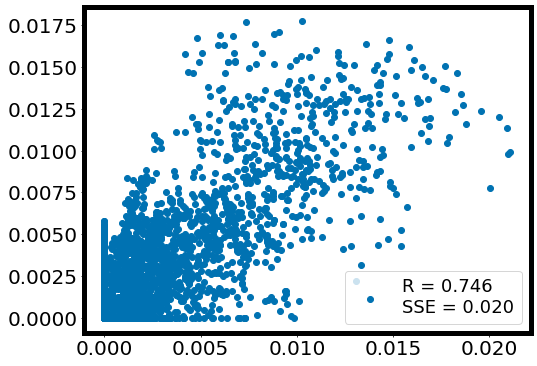

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 634.13255, Residuals: 0.01172, Convergence:   inf
Epoch: 10, Loss: 539.60956, Residuals: 0.00909, Convergence: 0.016370
Epoch: 20, Loss: 458.80991, Residuals: 0.00671, Convergence: 0.016288
Epoch: 30, Loss: 390.88721, Residuals: 0.00411, Convergence: 0.016047
Epoch: 40, Loss: 334.33594, Residuals: 0.00238, Convergence: 0.015389
Epoch: 50, Loss: 287.64148, Residuals: 0.00132, Convergence: 0.014971
Epoch: 60, Loss: 248.36987, Residuals: 0.00017, Convergence: 0.014622
Epoch: 70, Loss: 215.21684, Residuals: -0.00098, Convergence: 0.014185
Epoch: 80, Loss: 187.14304, Residuals: -0.00193, Convergence: 0.013902
Epoch: 90, Loss: 163.49007, Residuals: -0.00261, Convergence: 0.013360
Epoch: 100, Loss: 143.50450, Residuals: -0.00316, Convergence: 0.012782
Epoch: 110, Loss: 126.75966, Residuals: -0.00355, Convergence: 0.012068
Epoch: 120, 

Epoch: 920, Loss: 402.56628, Residuals: -0.00164, Convergence: 0.001264
Epoch: 930, Loss: 398.03876, Residuals: -0.00165, Convergence: 0.000980

Epoch: 930, Evidence: 1850.93433, Convergence: 0.002078
Epoch: 930, Loss: 402.87396, Residuals: -0.00165, Convergence:   inf
Epoch: 940, Loss: 398.22192, Residuals: -0.00171, Convergence: 0.001083

Epoch: 941, Evidence: 1852.13293, Convergence: 0.000647
Epoch: 950, Loss: 393.77216, Residuals: -0.00238, Convergence: 0.001753
Epoch: 960, Loss: 387.82413, Residuals: -0.00216, Convergence: 0.001295

Epoch: 961, Evidence: 1845.48364, Convergence: -0.002954
Epoch: 970, Loss: 401.31891, Residuals: -0.00174, Convergence: 0.001181

Epoch: 974, Evidence: 1852.43481, Convergence: 0.000810
Epoch: 980, Loss: 396.56583, Residuals: -0.00230, Convergence: 0.002046
Epoch: 990, Loss: 390.04712, Residuals: -0.00236, Convergence: 0.001515

Epoch: 993, Evidence: 1847.86792, Convergence: -0.001659


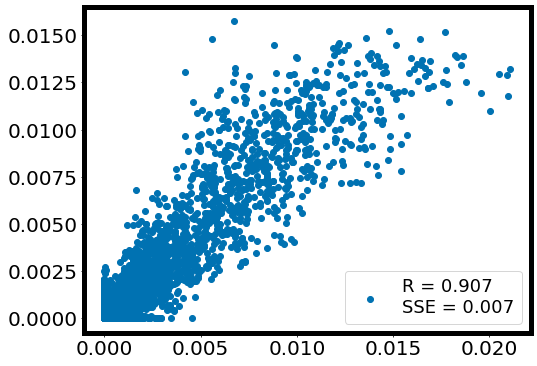

Running trial 12, cycle 1
Epoch: 0, Loss: 118.55967, Residuals: -1.49970, Convergence:   inf
Epoch: 10, Loss: 101.17002, Residuals: -1.37432, Convergence: 0.016150
Epoch: 20, Loss: 86.18693, Residuals: -1.26078, Convergence: 0.016120
Epoch: 30, Loss: 73.48855, Residuals: -1.15720, Convergence: 0.016030
Epoch: 40, Loss: 62.71165, Residuals: -1.06260, Convergence: 0.015938
Epoch: 50, Loss: 53.67179, Residuals: -0.97584, Convergence: 0.015666
Epoch: 60, Loss: 46.04599, Residuals: -0.89715, Convergence: 0.015271
Epoch: 70, Loss: 39.57830, Residuals: -0.82621, Convergence: 0.014927
Epoch: 80, Loss: 34.13210, Residuals: -0.76161, Convergence: 0.014648
Epoch: 90, Loss: 29.54883, Residuals: -0.70335, Convergence: 0.014273
Epoch: 100, Loss: 25.69722, Residuals: -0.65056, Convergence: 0.013733
Epoch: 110, Loss: 22.45947, Residuals: -0.60258, Convergence: 0.013428
Epoch: 120, Loss: 19.73311, Residuals: -0.55889, Convergence: 0.012850
Epoch: 130, Loss: 17.45090, Residuals: -0.51905, Convergence: 0

Epoch: 770, Loss: 53.05127, Residuals: 0.02585, Convergence:   inf

Epoch: 779, Evidence: 208.00343, Convergence: 0.015247
Epoch: 780, Loss: 53.39914, Residuals: 0.02533, Convergence: 0.002414

Epoch: 783, Evidence: 208.19035, Convergence: 0.000898
Epoch: 790, Loss: 52.73381, Residuals: 0.02387, Convergence: 0.004238
Epoch: 800, Loss: 51.39614, Residuals: 0.02312, Convergence: 0.001527

Epoch: 809, Evidence: 208.03592, Convergence: 0.000156
Epoch: 810, Loss: 50.63235, Residuals: 0.02202, Convergence: 0.006729
Epoch: 820, Loss: 47.98537, Residuals: 0.01680, Convergence: 0.006908

Epoch: 821, Evidence: 206.86278, Convergence: -0.005514


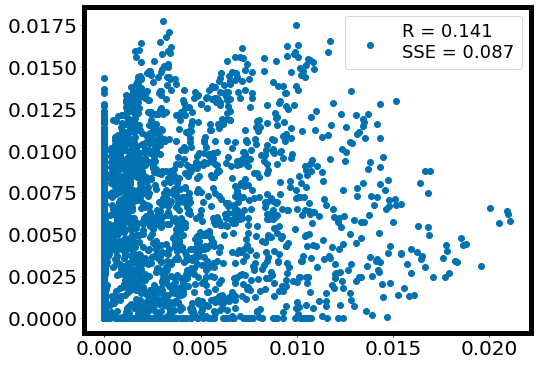

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 12, cycle 2
Epoch: 0, Loss: 140.98135, Residuals: -0.20243, Convergence:   inf
Epoch: 10, Loss: 122.31255, Residuals: -0.18941, Convergence: 0.014503
Epoch: 20, Loss: 105.78708, Residuals: -0.17749, Convergence: 0.014762
Epoch: 30, Loss: 91.02432, Residuals: -0.16617, Convergence: 0.015510
Epoch: 40, Loss: 77.75395, Residuals: -0.15532, Convergence: 0.016114
Epoch: 50, Loss: 66.18704, Residuals: -0.14494, Convergence: 0.016282
Epoch: 60, Loss: 56.34079, Residuals: -0.13520, Convergence: 0.016168
Epoch: 70, Loss: 48.06246, Residuals: -0.12626, Convergence: 0.015876
Epoch: 80, Loss: 41.22056, Residuals: -0.11794, Convergence: 0.015055
Epoch: 90, Loss: 35.50561, Residuals: -0.11049, Convergence: 0.014782
Epoch: 100, Loss: 30.78993, Residuals: -0.10372, Convergence: 0.014387
Epoch: 110, Loss: 26.85595, Residuals: -0.09765, Convergenc

Epoch: 920, Loss: 96.36782, Residuals: -0.01595, Convergence: 0.001204

Epoch: 929, Evidence: 494.98779, Convergence: -0.000614
Epoch: 930, Loss: 97.76265, Residuals: -0.01574, Convergence: 0.002980
Epoch: 940, Loss: 94.76297, Residuals: -0.01672, Convergence: 0.002568
Epoch: 950, Loss: 92.30139, Residuals: -0.01696, Convergence: 0.002300
Epoch: 960, Loss: 90.22276, Residuals: -0.01662, Convergence: 0.002386
Epoch: 970, Loss: 88.50303, Residuals: -0.01594, Convergence: 0.001938
Epoch: 980, Loss: 87.12035, Residuals: -0.01520, Convergence: 0.001144

Epoch: 985, Evidence: 480.87137, Convergence: -0.029988


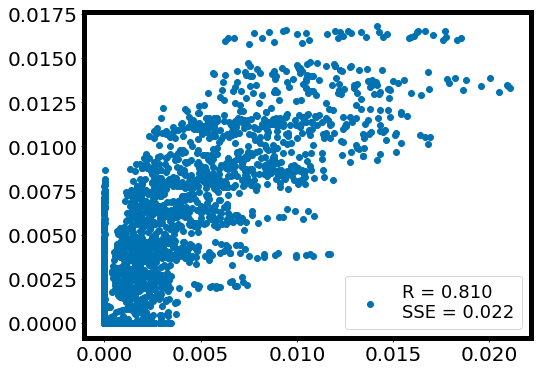

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 12, cycle 3
Epoch: 0, Loss: 230.56162, Residuals: -0.09297, Convergence:   inf
Epoch: 10, Loss: 200.09929, Residuals: -0.08818, Convergence: 0.014340
Epoch: 20, Loss: 173.24017, Residuals: -0.08369, Convergence: 0.014706
Epoch: 30, Loss: 149.50020, Residuals: -0.07916, Convergence: 0.014895
Epoch: 40, Loss: 128.89590, Residuals: -0.07425, Convergence: 0.014859
Epoch: 50, Loss: 111.40990, Residuals: -0.06972, Convergence: 0.014554
Epoch: 60, Loss: 96.63001, Residuals: -0.06535, Convergence: 0.014144
Epoch: 70, Loss: 84.11816, Residuals: -0.06108, Convergence: 0.013817
Epoch: 80, Loss: 73.54465, Residuals: -0.05726, Convergence: 0.013325
Epoch: 90, Loss: 64.56071, Residuals: -0.05395, Convergence: 0.012879
Epoch: 100, Loss: 56.90846, Residuals: -0.05115, Convergence: 0.012559
Epoch: 110, Loss: 50.36573, Residuals: -0.04833, Converg

Epoch: 940, Loss: 164.97591, Residuals: -0.00628, Convergence: 0.002559

Epoch: 946, Evidence: 864.65234, Convergence: 0.000097
Epoch: 950, Loss: 162.31601, Residuals: -0.00855, Convergence: 0.004117

Epoch: 953, Evidence: 858.24493, Convergence: -0.007368
Epoch: 960, Loss: 168.14511, Residuals: -0.00645, Convergence: 0.001706
Epoch: 970, Loss: 164.64740, Residuals: -0.00700, Convergence: 0.002102

Epoch: 972, Evidence: 864.29053, Convergence: -0.000322


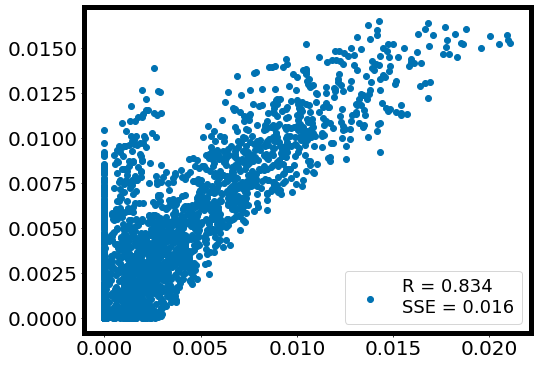

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 12, cycle 4
Epoch: 0, Loss: 331.00157, Residuals: 0.06484, Convergence:   inf
Epoch: 10, Loss: 286.55222, Residuals: 0.05538, Convergence: 0.014584
Epoch: 20, Loss: 247.57568, Residuals: 0.04718, Convergence: 0.014842
Epoch: 30, Loss: 213.66153, Residuals: 0.04046, Convergence: 0.014767
Epoch: 40, Loss: 184.71542, Residuals: 0.03465, Convergence: 0.014559
Epoch: 50, Loss: 160.34564, Residuals: 0.02955, Convergence: 0.013990
Epoch: 60, Loss: 140.01938, Residuals: 0.02507, Convergence: 0.013374
Epoch: 70, Loss: 123.19283, Residuals: 0.02164, Convergence: 0.012748
Epoch: 80, Loss: 108.69566, Residuals: 0.01856, Convergence: 0.012620
Epoch: 90, Loss: 95.96516, Residuals: 0.01595, Convergence: 0.012944
Epoch: 100, Loss: 84.88292, Residuals: 0.01385, Convergence: 0.012344
Epoch: 110, Loss: 75.17458, Residuals: 0.01215, Convergence: 0.0


Epoch: 903, Evidence: 1252.29053, Convergence: -0.000158
Epoch: 910, Loss: 247.10696, Residuals: -0.00450, Convergence: 0.001546

Epoch: 916, Evidence: 1252.11816, Convergence: -0.000295
Epoch: 920, Loss: 244.11053, Residuals: -0.00489, Convergence: 0.001823
Epoch: 930, Loss: 239.08566, Residuals: -0.00550, Convergence: 0.001777

Epoch: 939, Evidence: 1239.90149, Convergence: -0.010151


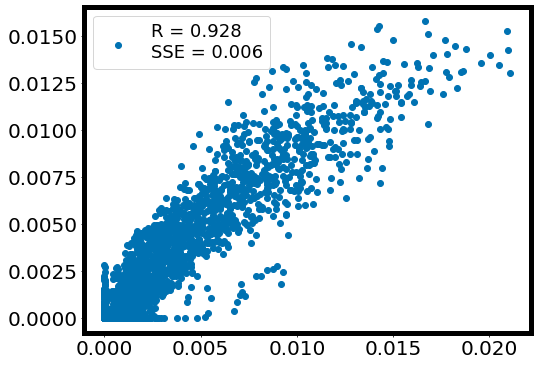

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 12, cycle 5
Epoch: 0, Loss: 353.78197, Residuals: 0.10480, Convergence:   inf
Epoch: 10, Loss: 309.90369, Residuals: 0.09229, Convergence: 0.013424
Epoch: 20, Loss: 270.70364, Residuals: 0.08151, Convergence: 0.013740
Epoch: 30, Loss: 236.10432, Residuals: 0.07218, Convergence: 0.013586
Epoch: 40, Loss: 206.69736, Residuals: 0.06371, Convergence: 0.013093
Epoch: 50, Loss: 181.81816, Residuals: 0.05660, Convergence: 0.012637
Epoch: 60, Loss: 160.95105, Residuals: 0.05084, Convergence: 0.011831
Epoch: 70, Loss: 143.23120, Residuals: 0.04566, Convergence: 0.011488
Epoch: 80, Loss: 128.04535, Residuals: 0.04097, Convergence: 0.011083
Epoch: 90, Loss: 115.02417, Residuals: 0.03668, Convergence: 0.010460
Epoch: 100, Loss: 103.63566, Residuals: 0.03248, Convergence: 0.010303
Epoch: 110, Loss: 93.21629, Residuals: 0.02852, Convergence: 0

Epoch: 970, Loss: 317.60410, Residuals: -0.00216, Convergence: 0.000838

Epoch: 970, Evidence: 1598.93835, Convergence: 0.002957
Epoch: 970, Loss: 320.85980, Residuals: -0.00216, Convergence:   inf

Epoch: 971, Evidence: 1600.43311, Convergence: 0.000934
Epoch: 980, Loss: 317.04657, Residuals: -0.00251, Convergence: 0.001081

Epoch: 985, Evidence: 1595.17700, Convergence: -0.002358


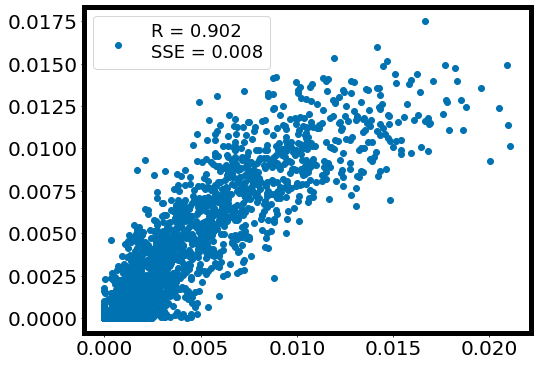

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 443.88927, Residuals: 0.15091, Convergence:   inf
Epoch: 10, Loss: 386.74661, Residuals: 0.13461, Convergence: 0.013924
Epoch: 20, Loss: 336.46249, Residuals: 0.12033, Convergence: 0.014118
Epoch: 30, Loss: 292.69559, Residuals: 0.10773, Convergence: 0.013890
Epoch: 40, Loss: 255.78314, Residuals: 0.09632, Convergence: 0.013216
Epoch: 50, Loss: 225.08325, Residuals: 0.08634, Convergence: 0.012438
Epoch: 60, Loss: 199.36887, Residuals: 0.07733, Convergence: 0.011893
Epoch: 70, Loss: 177.83716, Residuals: 0.06949, Convergence: 0.011324
Epoch: 80, Loss: 159.42230, Residuals: 0.06230, Convergence: 0.010547
Epoch: 90, Loss: 143.64653, Residuals: 0.05570, Convergence: 0.010363
Epoch: 100, Loss: 129.82094, Residuals: 0.04975, Convergence: 0.010270
Epoch: 110, Loss: 117.34087, Residuals: 0.04421, Convergence: 0.010239
Epoch: 120, Loss:

Epoch: 890, Loss: 398.12302, Residuals: -0.01616, Convergence: 0.000587

Epoch: 890, Evidence: 1848.39258, Convergence: -0.001868
Epoch: 890, Loss: 401.53079, Residuals: -0.01421, Convergence:   inf
Epoch: 900, Loss: 396.48691, Residuals: -0.01457, Convergence: 0.001024

Epoch: 904, Evidence: 1849.70093, Convergence: -0.001159


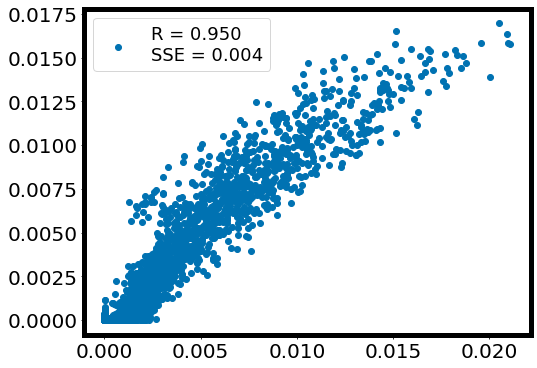

Running trial 13, cycle 1
Epoch: 0, Loss: 93.01849, Residuals: -0.88807, Convergence:   inf
Epoch: 10, Loss: 79.96106, Residuals: -0.82622, Convergence: 0.015203
Epoch: 20, Loss: 68.76545, Residuals: -0.76727, Convergence: 0.015199
Epoch: 30, Loss: 59.11032, Residuals: -0.71168, Convergence: 0.015308
Epoch: 40, Loss: 50.68372, Residuals: -0.65999, Convergence: 0.015740
Epoch: 50, Loss: 43.28667, Residuals: -0.61151, Convergence: 0.015982
Epoch: 60, Loss: 36.99629, Residuals: -0.56759, Convergence: 0.015832
Epoch: 70, Loss: 31.75357, Residuals: -0.52736, Convergence: 0.015306
Epoch: 80, Loss: 27.39338, Residuals: -0.49006, Convergence: 0.014731
Epoch: 90, Loss: 23.75326, Residuals: -0.45559, Convergence: 0.013895
Epoch: 100, Loss: 20.75684, Residuals: -0.42381, Convergence: 0.011914
Epoch: 110, Loss: 18.23936, Residuals: -0.39496, Convergence: 0.011073
Epoch: 120, Loss: 16.14301, Residuals: -0.36852, Convergence: 0.010742
Epoch: 130, Loss: 14.40182, Residuals: -0.34409, Convergence: 0.0


Epoch: 772, Evidence: 220.54642, Convergence: 0.004331

Epoch: 776, Evidence: 221.95088, Convergence: 0.006328
Epoch: 780, Loss: 51.37490, Residuals: 0.00520, Convergence: 0.001179

Epoch: 789, Evidence: 222.35345, Convergence: 0.001811
Epoch: 790, Loss: 51.24538, Residuals: 0.00527, Convergence: 0.004054

Epoch: 793, Evidence: 222.79543, Convergence: 0.001984
Epoch: 800, Loss: 51.04160, Residuals: 0.00520, Convergence: 0.003295
Epoch: 810, Loss: 49.81341, Residuals: 0.00564, Convergence: 0.002469

Epoch: 812, Evidence: 222.33092, Convergence: -0.002089
Epoch: 820, Loss: 52.15051, Residuals: 0.00487, Convergence: 0.001469

Epoch: 821, Evidence: 225.91771, Convergence: 0.013820
Epoch: 830, Loss: 52.38160, Residuals: 0.00504, Convergence: 0.000930

Epoch: 830, Evidence: 226.69531, Convergence: 0.003430
Epoch: 830, Loss: 53.43597, Residuals: 0.00504, Convergence:   inf

Epoch: 834, Evidence: 226.76521, Convergence: 0.000308
Epoch: 840, Loss: 52.78017, Residuals: 0.00556, Convergence: 0.0

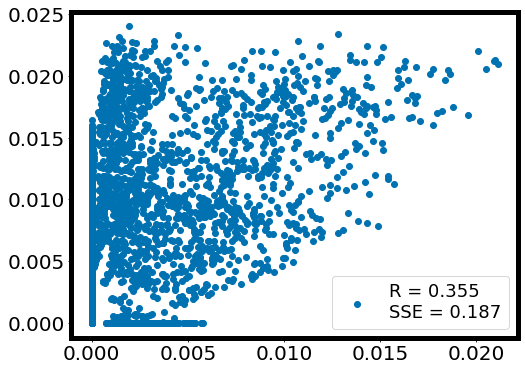

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 13, cycle 2
Epoch: 0, Loss: 185.58327, Residuals: 0.03426, Convergence:   inf
Epoch: 10, Loss: 157.84415, Residuals: 0.02570, Convergence: 0.016160
Epoch: 20, Loss: 134.61169, Residuals: 0.01833, Convergence: 0.015980
Epoch: 30, Loss: 114.92526, Residuals: 0.01197, Convergence: 0.015900
Epoch: 40, Loss: 98.23851, Residuals: 0.00636, Convergence: 0.015719
Epoch: 50, Loss: 84.19046, Residuals: 0.00156, Convergence: 0.015414
Epoch: 60, Loss: 72.34830, Residuals: -0.00257, Convergence: 0.015248
Epoch: 70, Loss: 62.27919, Residuals: -0.00599, Convergence: 0.015045
Epoch: 80, Loss: 53.64087, Residuals: -0.00879, Convergence: 0.014997
Epoch: 90, Loss: 46.21372, Residuals: -0.01130, Convergence: 0.015055
Epoch: 100, Loss: 39.93422, Residuals: -0.01317, Convergence: 0.014524
Epoch: 110, Loss: 34.63667, Residuals: -0.01494, Convergence: 0.

Epoch: 940, Loss: 91.16277, Residuals: 0.00038, Convergence: 0.001144
Epoch: 950, Loss: 89.60058, Residuals: 0.00036, Convergence: 0.001912

Epoch: 954, Evidence: 543.92651, Convergence: -0.001916
Epoch: 960, Loss: 94.75900, Residuals: 0.00044, Convergence: 0.001214

Epoch: 963, Evidence: 554.51801, Convergence: 0.017221

Epoch: 969, Evidence: 555.51459, Convergence: 0.001794
Epoch: 970, Loss: 99.84722, Residuals: 0.00046, Convergence: 0.001215

Epoch: 971, Evidence: 557.77435, Convergence: 0.004051

Epoch: 973, Evidence: 559.09729, Convergence: 0.002366

Epoch: 977, Evidence: 560.36938, Convergence: 0.002270
Epoch: 980, Loss: 104.24537, Residuals: 0.00048, Convergence: 0.001193

Epoch: 983, Evidence: 559.91913, Convergence: -0.000804
Epoch: 990, Loss: 103.22650, Residuals: 0.00043, Convergence: 0.001843
Epoch: 1000, Loss: 101.20070, Residuals: 0.00036, Convergence: 0.001353
Epoch: 1010, Loss: 99.31599, Residuals: 0.00029, Convergence: 0.001662
Epoch: 1020, Loss: 97.69576, Residuals: 0

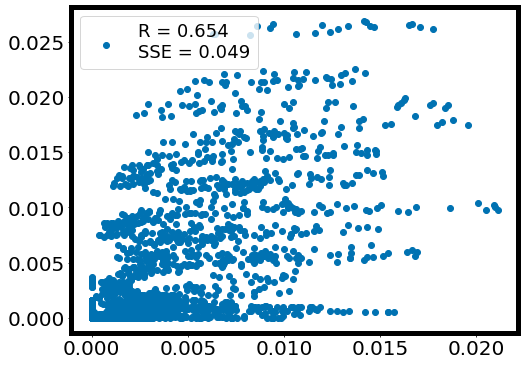

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 13, cycle 3
Epoch: 0, Loss: 300.80528, Residuals: 0.05281, Convergence:   inf
Epoch: 10, Loss: 257.01819, Residuals: 0.04435, Convergence: 0.015632
Epoch: 20, Loss: 220.43750, Residuals: 0.03701, Convergence: 0.015393
Epoch: 30, Loss: 189.27521, Residuals: 0.03056, Convergence: 0.015316
Epoch: 40, Loss: 162.82198, Residuals: 0.02488, Convergence: 0.015029
Epoch: 50, Loss: 140.32104, Residuals: 0.01990, Convergence: 0.014837
Epoch: 60, Loss: 121.29592, Residuals: 0.01572, Convergence: 0.014513
Epoch: 70, Loss: 105.21925, Residuals: 0.01229, Convergence: 0.014102
Epoch: 80, Loss: 91.72357, Residuals: 0.00982, Convergence: 0.013541
Epoch: 90, Loss: 79.98121, Residuals: 0.00766, Convergence: 0.013628
Epoch: 100, Loss: 69.67175, Residuals: 0.00593, Convergence: 0.013741
Epoch: 110, Loss: 60.84654, Residuals: 0.00456, Convergence: 0.01


Epoch: 906, Evidence: 948.11462, Convergence: 0.000123
Epoch: 910, Loss: 171.52187, Residuals: -0.00097, Convergence: 0.004637

Epoch: 912, Evidence: 947.29333, Convergence: -0.000743
Epoch: 920, Loss: 168.04210, Residuals: -0.00456, Convergence: 0.003252

Epoch: 927, Evidence: 935.41113, Convergence: -0.013456
Epoch: 930, Loss: 177.64548, Residuals: 0.00019, Convergence: 0.002961

Epoch: 938, Evidence: 949.36438, Convergence: 0.001440
Epoch: 940, Loss: 175.63586, Residuals: -0.00015, Convergence: 0.002819

Epoch: 947, Evidence: 950.27252, Convergence: 0.000956
Epoch: 950, Loss: 172.66559, Residuals: -0.00107, Convergence: 0.000846

Epoch: 950, Evidence: 947.57074, Convergence: -0.001893


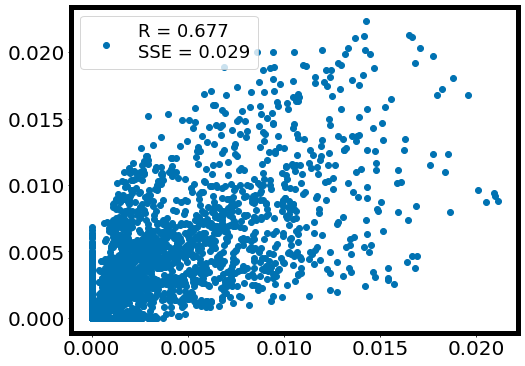

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 13, cycle 4
Epoch: 0, Loss: 362.39681, Residuals: 0.09763, Convergence:   inf
Epoch: 10, Loss: 311.43317, Residuals: 0.08586, Convergence: 0.015132
Epoch: 20, Loss: 268.13956, Residuals: 0.07553, Convergence: 0.015073
Epoch: 30, Loss: 230.95226, Residuals: 0.06623, Convergence: 0.014967
Epoch: 40, Loss: 199.34857, Residuals: 0.05773, Convergence: 0.014612
Epoch: 50, Loss: 172.53290, Residuals: 0.05002, Convergence: 0.014292
Epoch: 60, Loss: 150.04413, Residuals: 0.04328, Convergence: 0.014012
Epoch: 70, Loss: 130.87238, Residuals: 0.03717, Convergence: 0.013522
Epoch: 80, Loss: 114.75361, Residuals: 0.03222, Convergence: 0.013629
Epoch: 90, Loss: 100.66162, Residuals: 0.02805, Convergence: 0.013049
Epoch: 100, Loss: 88.45178, Residuals: 0.02476, Convergence: 0.013313
Epoch: 110, Loss: 77.89446, Residuals: 0.02218, Convergence: 0.

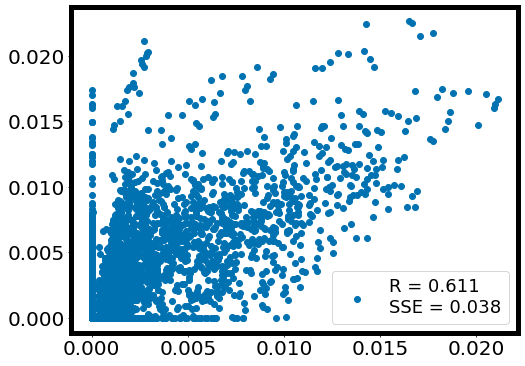

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 13, cycle 5
Epoch: 0, Loss: 503.49187, Residuals: 0.12559, Convergence:   inf
Epoch: 10, Loss: 431.40808, Residuals: 0.11194, Convergence: 0.015470
Epoch: 20, Loss: 370.20285, Residuals: 0.09995, Convergence: 0.015398
Epoch: 30, Loss: 317.97787, Residuals: 0.08921, Convergence: 0.015257
Epoch: 40, Loss: 273.51434, Residuals: 0.07917, Convergence: 0.015000
Epoch: 50, Loss: 236.49387, Residuals: 0.06992, Convergence: 0.014386
Epoch: 60, Loss: 205.72415, Residuals: 0.06154, Convergence: 0.014007
Epoch: 70, Loss: 179.78871, Residuals: 0.05412, Convergence: 0.013048
Epoch: 80, Loss: 158.14789, Residuals: 0.04800, Convergence: 0.012707
Epoch: 90, Loss: 139.68796, Residuals: 0.04283, Convergence: 0.012194
Epoch: 100, Loss: 123.69783, Residuals: 0.03832, Convergence: 0.012130
Epoch: 110, Loss: 109.74213, Residuals: 0.03445, Convergence: 

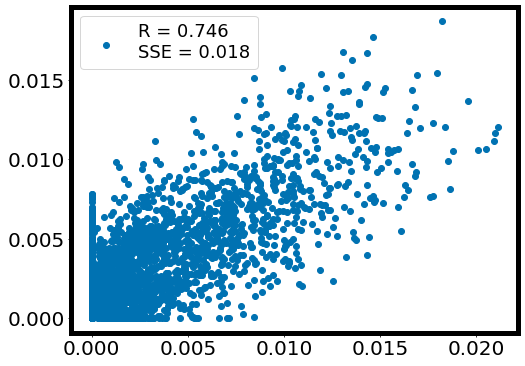

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 632.58330, Residuals: 0.12292, Convergence:   inf
Epoch: 10, Loss: 540.29224, Residuals: 0.10979, Convergence: 0.015837
Epoch: 20, Loss: 461.79855, Residuals: 0.09830, Convergence: 0.015802
Epoch: 30, Loss: 395.36777, Residuals: 0.08781, Convergence: 0.015478
Epoch: 40, Loss: 339.67258, Residuals: 0.07803, Convergence: 0.015070
Epoch: 50, Loss: 293.55301, Residuals: 0.06914, Convergence: 0.014441
Epoch: 60, Loss: 255.54085, Residuals: 0.06113, Convergence: 0.013717
Epoch: 70, Loss: 223.93221, Residuals: 0.05407, Convergence: 0.012895
Epoch: 80, Loss: 197.67493, Residuals: 0.04846, Convergence: 0.012240
Epoch: 90, Loss: 175.28497, Residuals: 0.04358, Convergence: 0.012131
Epoch: 100, Loss: 155.75977, Residuals: 0.03910, Convergence: 0.011828
Epoch: 110, Loss: 138.80760, Residuals: 0.03498, Convergence: 0.011474
Epoch: 120, Loss:

Epoch: 880, Loss: 401.09036, Residuals: 0.00030, Convergence: 0.001829
Epoch: 890, Loss: 396.11346, Residuals: 0.00065, Convergence: 0.000302

Epoch: 890, Evidence: 1800.64111, Convergence: -0.003859


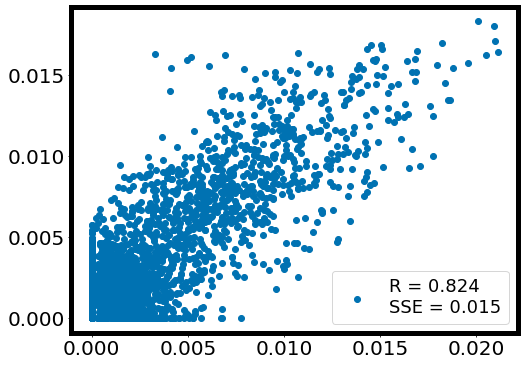

Running trial 14, cycle 1
Epoch: 0, Loss: 74.47945, Residuals: -1.00910, Convergence:   inf
Epoch: 10, Loss: 65.96696, Residuals: -0.92806, Convergence: 0.012395
Epoch: 20, Loss: 58.18237, Residuals: -0.85566, Convergence: 0.012780
Epoch: 30, Loss: 51.19308, Residuals: -0.79054, Convergence: 0.012951
Epoch: 40, Loss: 44.97912, Residuals: -0.73167, Convergence: 0.013072
Epoch: 50, Loss: 39.50170, Residuals: -0.67844, Convergence: 0.013046
Epoch: 60, Loss: 34.72417, Residuals: -0.63026, Convergence: 0.012905
Epoch: 70, Loss: 30.57608, Residuals: -0.58661, Convergence: 0.012714
Epoch: 80, Loss: 26.99219, Residuals: -0.54685, Convergence: 0.012403
Epoch: 90, Loss: 23.91121, Residuals: -0.51053, Convergence: 0.011904
Epoch: 100, Loss: 21.24115, Residuals: -0.47769, Convergence: 0.011942
Epoch: 110, Loss: 18.94705, Residuals: -0.44761, Convergence: 0.011130
Epoch: 120, Loss: 16.99952, Residuals: -0.41991, Convergence: 0.010494
Epoch: 130, Loss: 15.31979, Residuals: -0.39473, Convergence: 0.0


Epoch: 806, Evidence: 202.34662, Convergence: -0.001495
Epoch: 810, Loss: 49.27020, Residuals: 0.00060, Convergence: 0.001149

Epoch: 814, Evidence: 205.64120, Convergence: 0.014550

Epoch: 815, Evidence: 205.30356, Convergence: -0.001645

Epoch: 816, Evidence: 206.24255, Convergence: 0.002916

Epoch: 817, Evidence: 207.08307, Convergence: 0.004059

Epoch: 818, Evidence: 208.39252, Convergence: 0.006284

Epoch: 819, Evidence: 209.74124, Convergence: 0.006430
Epoch: 820, Loss: 53.85756, Residuals: 0.00060, Convergence: 0.000644

Epoch: 820, Evidence: 210.75365, Convergence: 0.004804
Epoch: 820, Loss: 54.45326, Residuals: 0.00060, Convergence:   inf

Epoch: 821, Evidence: 209.56752, Convergence: -0.005660


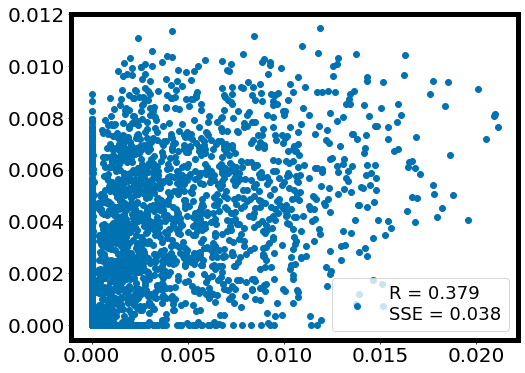

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 14, cycle 2
Epoch: 0, Loss: 150.55733, Residuals: -0.62136, Convergence:   inf
Epoch: 10, Loss: 130.27798, Residuals: -0.57013, Convergence: 0.014635
Epoch: 20, Loss: 112.74846, Residuals: -0.52394, Convergence: 0.014484
Epoch: 30, Loss: 97.68882, Residuals: -0.48195, Convergence: 0.014432
Epoch: 40, Loss: 84.62723, Residuals: -0.44355, Convergence: 0.014502
Epoch: 50, Loss: 73.32626, Residuals: -0.40787, Convergence: 0.014532
Epoch: 60, Loss: 63.54806, Residuals: -0.37475, Convergence: 0.014501
Epoch: 70, Loss: 55.17227, Residuals: -0.34387, Convergence: 0.014275
Epoch: 80, Loss: 48.01446, Residuals: -0.31569, Convergence: 0.013931
Epoch: 90, Loss: 41.98591, Residuals: -0.28995, Convergence: 0.012975
Epoch: 100, Loss: 36.96700, Residuals: -0.26643, Convergence: 0.012541
Epoch: 110, Loss: 32.80228, Residuals: -0.24482, Convergenc

Epoch: 930, Loss: 103.61007, Residuals: 0.00004, Convergence: 0.001415
Epoch: 940, Loss: 102.17133, Residuals: -0.00014, Convergence: 0.001334

Epoch: 946, Evidence: 435.31146, Convergence: 0.000549
Epoch: 950, Loss: 102.70159, Residuals: -0.00067, Convergence: 0.003307
Epoch: 960, Loss: 99.95211, Residuals: -0.00172, Convergence: 0.002558
Epoch: 970, Loss: 97.66678, Residuals: -0.00226, Convergence: 0.002500
Epoch: 980, Loss: 95.77713, Residuals: -0.00264, Convergence: 0.001536

Epoch: 984, Evidence: 426.61707, Convergence: -0.019820
Epoch: 990, Loss: 109.19086, Residuals: 0.00012, Convergence: 0.001648
Epoch: 1000, Loss: 107.40434, Residuals: -0.00013, Convergence: 0.001432
Epoch: 1010, Loss: 105.84398, Residuals: -0.00036, Convergence: 0.001281
Epoch: 1020, Loss: 104.40091, Residuals: -0.00049, Convergence: 0.001277
Epoch: 1030, Loss: 103.11473, Residuals: -0.00055, Convergence: 0.001225

Epoch: 1038, Evidence: 437.17102, Convergence: 0.004800
Epoch: 1040, Loss: 104.36778, Residuals

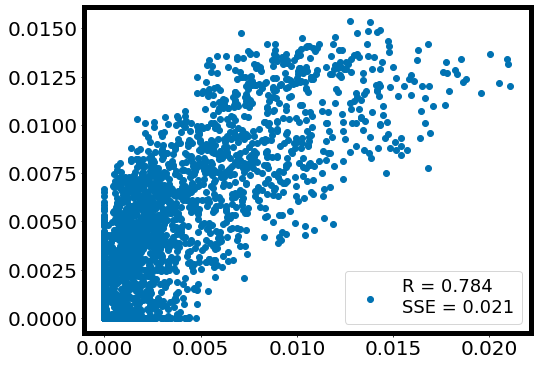

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 14, cycle 3
Epoch: 0, Loss: 279.16808, Residuals: -0.33938, Convergence:   inf
Epoch: 10, Loss: 239.04298, Residuals: -0.31251, Convergence: 0.015669
Epoch: 20, Loss: 204.51639, Residuals: -0.28830, Convergence: 0.015810
Epoch: 30, Loss: 174.60445, Residuals: -0.26660, Convergence: 0.016021
Epoch: 40, Loss: 149.11108, Residuals: -0.24641, Convergence: 0.015816
Epoch: 50, Loss: 127.75193, Residuals: -0.22712, Convergence: 0.015194
Epoch: 60, Loss: 110.04803, Residuals: -0.20871, Convergence: 0.014763
Epoch: 70, Loss: 95.06152, Residuals: -0.19227, Convergence: 0.014805
Epoch: 80, Loss: 82.30293, Residuals: -0.17751, Convergence: 0.014424
Epoch: 90, Loss: 71.51572, Residuals: -0.16398, Convergence: 0.013978
Epoch: 100, Loss: 62.44401, Residuals: -0.15156, Convergence: 0.013546
Epoch: 110, Loss: 54.78954, Residuals: -0.14035, Conver

Epoch: 940, Loss: 169.46011, Residuals: -0.00319, Convergence: 0.001138

Epoch: 944, Evidence: 796.11926, Convergence: 0.002706
Epoch: 950, Loss: 171.94891, Residuals: -0.00313, Convergence: 0.001435
Epoch: 960, Loss: 169.84520, Residuals: -0.00303, Convergence: 0.000831

Epoch: 960, Evidence: 794.82910, Convergence: -0.001623


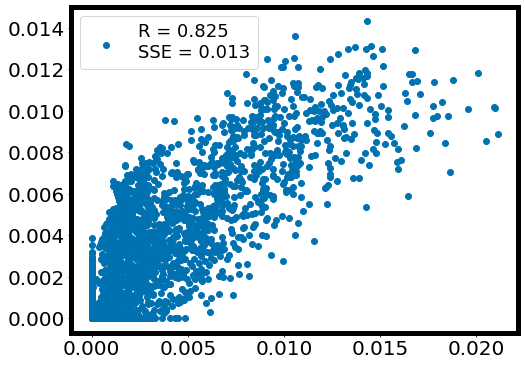

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 14, cycle 4
Epoch: 0, Loss: 444.32024, Residuals: -0.24339, Convergence:   inf
Epoch: 10, Loss: 378.32080, Residuals: -0.22364, Convergence: 0.016226
Epoch: 20, Loss: 322.04520, Residuals: -0.20597, Convergence: 0.016269
Epoch: 30, Loss: 274.19760, Residuals: -0.19043, Convergence: 0.016075
Epoch: 40, Loss: 233.87692, Residuals: -0.17632, Convergence: 0.016022
Epoch: 50, Loss: 199.49767, Residuals: -0.16315, Convergence: 0.015900
Epoch: 60, Loss: 170.61670, Residuals: -0.15116, Convergence: 0.015574
Epoch: 70, Loss: 146.62270, Residuals: -0.14003, Convergence: 0.014900
Epoch: 80, Loss: 126.69691, Residuals: -0.12946, Convergence: 0.014525
Epoch: 90, Loss: 110.17531, Residuals: -0.11910, Convergence: 0.013661
Epoch: 100, Loss: 96.46371, Residuals: -0.10932, Convergence: 0.013275
Epoch: 110, Loss: 84.88722, Residuals: -0.10040, Con

Epoch: 930, Loss: 259.44669, Residuals: -0.00840, Convergence: 0.001459
Epoch: 940, Loss: 255.96866, Residuals: -0.00834, Convergence: 0.001237

Epoch: 941, Evidence: 1084.26147, Convergence: -0.004029


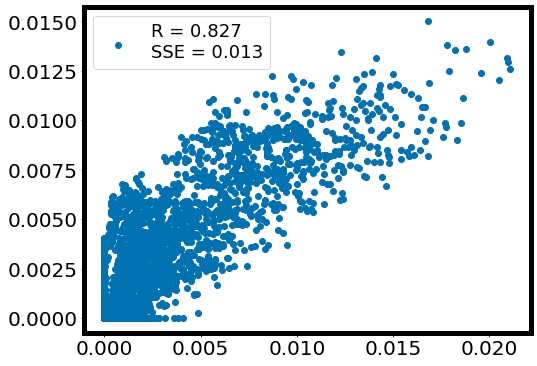

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 14, cycle 5
Epoch: 0, Loss: 522.95641, Residuals: -0.20537, Convergence:   inf
Epoch: 10, Loss: 444.76529, Residuals: -0.18864, Convergence: 0.016366
Epoch: 20, Loss: 378.08990, Residuals: -0.17353, Convergence: 0.016388
Epoch: 30, Loss: 321.70578, Residuals: -0.16005, Convergence: 0.016182
Epoch: 40, Loss: 274.07153, Residuals: -0.14804, Convergence: 0.016217
Epoch: 50, Loss: 233.67661, Residuals: -0.13705, Convergence: 0.015977
Epoch: 60, Loss: 199.81728, Residuals: -0.12697, Convergence: 0.015532
Epoch: 70, Loss: 171.92032, Residuals: -0.11694, Convergence: 0.014781
Epoch: 80, Loss: 148.66194, Residuals: -0.10753, Convergence: 0.014413
Epoch: 90, Loss: 129.25943, Residuals: -0.09881, Convergence: 0.013740
Epoch: 100, Loss: 112.94397, Residuals: -0.09078, Convergence: 0.013461
Epoch: 110, Loss: 99.14335, Residuals: -0.08316, Co


Epoch: 950, Evidence: 1486.27173, Convergence: 0.002931
Epoch: 950, Loss: 313.28491, Residuals: -0.00591, Convergence:   inf
Epoch: 960, Loss: 308.66498, Residuals: -0.00625, Convergence: 0.001195

Epoch: 962, Evidence: 1489.32776, Convergence: 0.002052

Epoch: 969, Evidence: 1494.23816, Convergence: 0.003286
Epoch: 970, Loss: 314.79623, Residuals: -0.00656, Convergence: 0.002116
Epoch: 980, Loss: 310.27594, Residuals: -0.00685, Convergence: 0.000800

Epoch: 980, Evidence: 1492.27808, Convergence: -0.001313
Epoch: 980, Loss: 317.06696, Residuals: -0.00651, Convergence:   inf

Epoch: 984, Evidence: 1496.98657, Convergence: 0.001836

Epoch: 985, Evidence: 1498.18750, Convergence: 0.000802
Epoch: 990, Loss: 316.94019, Residuals: -0.00667, Convergence: 0.001935

Epoch: 998, Evidence: 1497.61609, Convergence: 0.000420
Epoch: 1000, Loss: 313.73120, Residuals: -0.00745, Convergence: 0.001354

Epoch: 1005, Evidence: 1493.41211, Convergence: -0.002393
Epoch: 1010, Loss: 318.69888, Residuals: -

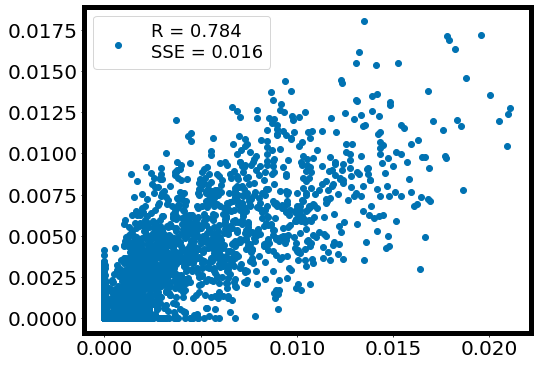

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 663.42156, Residuals: 0.36958, Convergence:   inf
Epoch: 10, Loss: 561.63892, Residuals: 0.33306, Convergence: 0.016861
Epoch: 20, Loss: 475.40863, Residuals: 0.30033, Convergence: 0.016753
Epoch: 30, Loss: 403.43100, Residuals: 0.27058, Convergence: 0.016357
Epoch: 40, Loss: 343.39301, Residuals: 0.24319, Convergence: 0.016231
Epoch: 50, Loss: 293.03259, Residuals: 0.21860, Convergence: 0.016029
Epoch: 60, Loss: 250.67299, Residuals: 0.19695, Convergence: 0.015718
Epoch: 70, Loss: 215.01958, Residuals: 0.17799, Convergence: 0.015224
Epoch: 80, Loss: 185.11548, Residuals: 0.16057, Convergence: 0.014923
Epoch: 90, Loss: 159.96368, Residuals: 0.14486, Convergence: 0.014397
Epoch: 100, Loss: 139.03043, Residuals: 0.13100, Convergence: 0.013834
Epoch: 110, Loss: 121.01115, Residuals: 0.11813, Convergence: 0.013915
Epoch: 120, Loss:

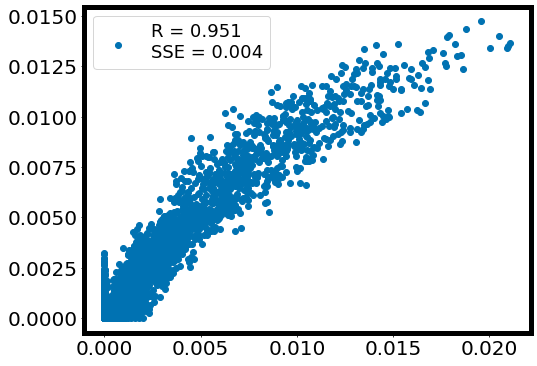

Running trial 15, cycle 1
Epoch: 0, Loss: 98.23380, Residuals: -1.33313, Convergence:   inf
Epoch: 10, Loss: 85.16357, Residuals: -1.22021, Convergence: 0.014764
Epoch: 20, Loss: 73.24098, Residuals: -1.11884, Convergence: 0.015470
Epoch: 30, Loss: 62.69029, Residuals: -1.02721, Convergence: 0.015821
Epoch: 40, Loss: 53.52921, Residuals: -0.94432, Convergence: 0.015963
Epoch: 50, Loss: 45.72100, Residuals: -0.86911, Convergence: 0.015815
Epoch: 60, Loss: 39.16479, Residuals: -0.80084, Convergence: 0.015389
Epoch: 70, Loss: 33.71484, Residuals: -0.73855, Convergence: 0.014975
Epoch: 80, Loss: 29.22442, Residuals: -0.68157, Convergence: 0.014174
Epoch: 90, Loss: 25.50781, Residuals: -0.62997, Convergence: 0.013378
Epoch: 100, Loss: 22.43970, Residuals: -0.58322, Convergence: 0.012303
Epoch: 110, Loss: 19.89032, Residuals: -0.54091, Convergence: 0.011159
Epoch: 120, Loss: 17.76833, Residuals: -0.50258, Convergence: 0.011400
Epoch: 130, Loss: 16.01355, Residuals: -0.46780, Convergence: 0.0

Epoch: 870, Loss: 40.53708, Residuals: -0.01603, Convergence: 0.001532
Epoch: 880, Loss: 39.74701, Residuals: -0.01629, Convergence: 0.002396

Epoch: 886, Evidence: 243.20959, Convergence: -0.007383
Epoch: 890, Loss: 42.52722, Residuals: -0.01436, Convergence: 0.001820
Epoch: 900, Loss: 41.87148, Residuals: -0.01432, Convergence: 0.001527
Epoch: 910, Loss: 41.27129, Residuals: -0.01419, Convergence: 0.001752
Epoch: 920, Loss: 40.76566, Residuals: -0.01388, Convergence: 0.000744

Epoch: 920, Evidence: 249.00656, Convergence: 0.016069
Epoch: 920, Loss: 42.15079, Residuals: -0.01388, Convergence:   inf
Epoch: 930, Loss: 41.50510, Residuals: -0.01396, Convergence: 0.001610
Epoch: 940, Loss: 40.91883, Residuals: -0.01390, Convergence: 0.001509

Epoch: 942, Evidence: 251.14088, Convergence: 0.008499
Epoch: 950, Loss: 41.69217, Residuals: -0.01393, Convergence: 0.001468

Epoch: 959, Evidence: 250.96469, Convergence: -0.000702
Epoch: 960, Loss: 42.06413, Residuals: -0.01411, Convergence: 0.002

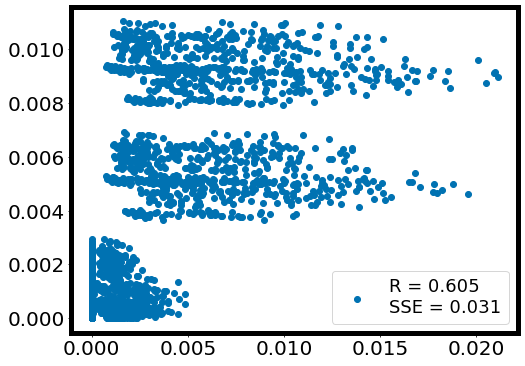

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 15, cycle 2
Epoch: 0, Loss: 205.63582, Residuals: -0.26010, Convergence:   inf
Epoch: 10, Loss: 173.90141, Residuals: -0.24135, Convergence: 0.017027
Epoch: 20, Loss: 146.59071, Residuals: -0.22399, Convergence: 0.017390
Epoch: 30, Loss: 123.18502, Residuals: -0.20795, Convergence: 0.017660
Epoch: 40, Loss: 103.36021, Residuals: -0.19313, Convergence: 0.017599
Epoch: 50, Loss: 86.65575, Residuals: -0.17930, Convergence: 0.017811
Epoch: 60, Loss: 72.73624, Residuals: -0.16676, Convergence: 0.017503
Epoch: 70, Loss: 61.24858, Residuals: -0.15532, Convergence: 0.017159
Epoch: 80, Loss: 51.75148, Residuals: -0.14480, Convergence: 0.016679
Epoch: 90, Loss: 43.96254, Residuals: -0.13479, Convergence: 0.016108
Epoch: 100, Loss: 37.61896, Residuals: -0.12538, Convergence: 0.015646
Epoch: 110, Loss: 32.34527, Residuals: -0.11689, Converge

Epoch: 950, Loss: 59.26767, Residuals: -0.01204, Convergence: 0.004409

Epoch: 953, Evidence: 509.54327, Convergence: -0.028011
Epoch: 960, Loss: 76.55998, Residuals: -0.00498, Convergence: 0.004260
Epoch: 970, Loss: 73.76303, Residuals: -0.00620, Convergence: 0.003595
Epoch: 980, Loss: 71.58248, Residuals: -0.00673, Convergence: 0.003105
Epoch: 990, Loss: 69.75471, Residuals: -0.00699, Convergence: 0.002556
Epoch: 1000, Loss: 68.32018, Residuals: -0.00685, Convergence: 0.001438
Epoch: 1010, Loss: 67.07404, Residuals: -0.00662, Convergence: 0.001770

Epoch: 1018, Evidence: 544.00421, Convergence: 0.037111
Epoch: 1020, Loss: 70.85275, Residuals: -0.00661, Convergence: 0.003186
Epoch: 1030, Loss: 68.62827, Residuals: -0.00790, Convergence: 0.003254
Epoch: 1040, Loss: 66.90094, Residuals: -0.00854, Convergence: 0.002536
Epoch: 1050, Loss: 65.45726, Residuals: -0.00883, Convergence: 0.001766

Epoch: 1057, Evidence: 538.85828, Convergence: -0.009550
Epoch: 1060, Loss: 75.11987, Residuals: -

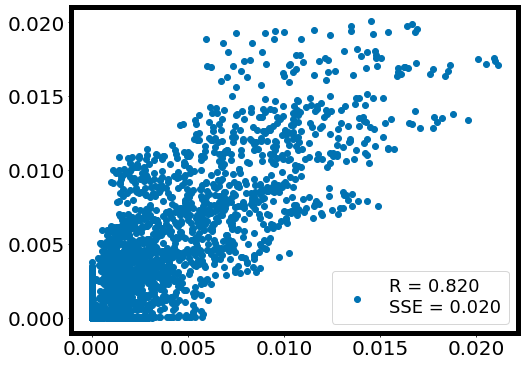

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 15, cycle 3
Epoch: 0, Loss: 317.55074, Residuals: -0.18013, Convergence:   inf
Epoch: 10, Loss: 270.31833, Residuals: -0.16730, Convergence: 0.016285
Epoch: 20, Loss: 229.72157, Residuals: -0.15531, Convergence: 0.016472
Epoch: 30, Loss: 195.15308, Residuals: -0.14405, Convergence: 0.016365
Epoch: 40, Loss: 166.04326, Residuals: -0.13357, Convergence: 0.016244
Epoch: 50, Loss: 141.66888, Residuals: -0.12329, Convergence: 0.016120
Epoch: 60, Loss: 121.23401, Residuals: -0.11345, Convergence: 0.015557
Epoch: 70, Loss: 104.34042, Residuals: -0.10439, Convergence: 0.015384
Epoch: 80, Loss: 90.22437, Residuals: -0.09604, Convergence: 0.015032
Epoch: 90, Loss: 78.30319, Residuals: -0.08820, Convergence: 0.014127
Epoch: 100, Loss: 67.96678, Residuals: -0.08120, Convergence: 0.014223
Epoch: 110, Loss: 59.06001, Residuals: -0.07496, Conve

Epoch: 990, Loss: 131.72035, Residuals: -0.01792, Convergence: 0.001522

Epoch: 997, Evidence: 839.55176, Convergence: 0.023676
Epoch: 1000, Loss: 139.28163, Residuals: -0.01775, Convergence: 0.001619
Epoch: 1010, Loss: 137.05542, Residuals: -0.01775, Convergence: 0.001736

Epoch: 1018, Evidence: 842.07031, Convergence: 0.002991
Epoch: 1020, Loss: 142.86514, Residuals: -0.01772, Convergence: 0.001805
Epoch: 1030, Loss: 140.62807, Residuals: -0.01778, Convergence: 0.001668
Epoch: 1040, Loss: 138.62479, Residuals: -0.01772, Convergence: 0.001326

Epoch: 1046, Evidence: 841.52820, Convergence: -0.000644
Epoch: 1050, Loss: 140.65344, Residuals: -0.01843, Convergence: 0.001371
Epoch: 1060, Loss: 137.75191, Residuals: -0.01971, Convergence: 0.001685
Epoch: 1070, Loss: 135.07109, Residuals: -0.02010, Convergence: 0.001339
Epoch: 1080, Loss: 132.72928, Residuals: -0.01978, Convergence: 0.000632

Epoch: 1080, Evidence: 816.96606, Convergence: -0.030729
Epoch: 1080, Loss: 149.50415, Residuals: -

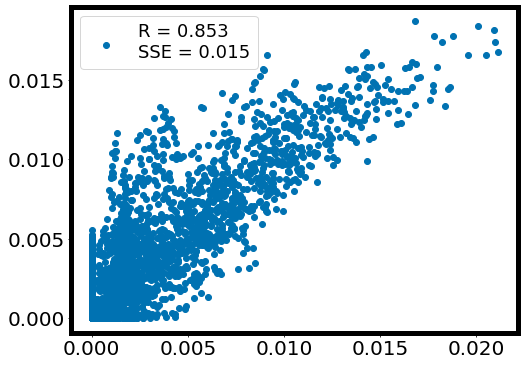

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 15, cycle 4
Epoch: 0, Loss: 393.97484, Residuals: 0.10419, Convergence:   inf
Epoch: 10, Loss: 336.03543, Residuals: 0.09131, Convergence: 0.016150
Epoch: 20, Loss: 286.19159, Residuals: 0.07997, Convergence: 0.016153
Epoch: 30, Loss: 244.11014, Residuals: 0.06988, Convergence: 0.015883
Epoch: 40, Loss: 209.13707, Residuals: 0.06129, Convergence: 0.015406
Epoch: 50, Loss: 179.83179, Residuals: 0.05348, Convergence: 0.015135
Epoch: 60, Loss: 155.04004, Residuals: 0.04671, Convergence: 0.014760
Epoch: 70, Loss: 134.35780, Residuals: 0.04083, Convergence: 0.014322
Epoch: 80, Loss: 116.98575, Residuals: 0.03551, Convergence: 0.013942
Epoch: 90, Loss: 102.15120, Residuals: 0.03099, Convergence: 0.013872
Epoch: 100, Loss: 89.40353, Residuals: 0.02671, Convergence: 0.013086
Epoch: 110, Loss: 78.55204, Residuals: 0.02276, Convergence: 0.

Epoch: 960, Loss: 240.30341, Residuals: -0.00476, Convergence: 0.001303

Epoch: 968, Evidence: 1247.96631, Convergence: 0.003766
Epoch: 970, Loss: 241.29944, Residuals: -0.00480, Convergence: 0.001470

Epoch: 979, Evidence: 1246.08105, Convergence: -0.001513
Epoch: 980, Loss: 243.47250, Residuals: -0.00472, Convergence: 0.001241

Epoch: 981, Evidence: 1252.98462, Convergence: 0.004005

Epoch: 983, Evidence: 1255.15466, Convergence: 0.001729

Epoch: 985, Evidence: 1255.65808, Convergence: 0.000401
Epoch: 990, Loss: 245.70067, Residuals: -0.00487, Convergence: 0.001666
Epoch: 1000, Loss: 242.17468, Residuals: -0.00497, Convergence: 0.001296

Epoch: 1002, Evidence: 1248.71960, Convergence: -0.005153


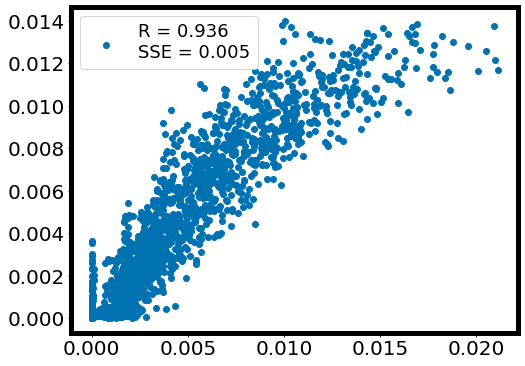

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 15, cycle 5
Epoch: 0, Loss: 526.86168, Residuals: 0.12008, Convergence:   inf
Epoch: 10, Loss: 447.67648, Residuals: 0.10635, Convergence: 0.016537
Epoch: 20, Loss: 380.14853, Residuals: 0.09423, Convergence: 0.016413
Epoch: 30, Loss: 323.48532, Residuals: 0.08341, Convergence: 0.016161
Epoch: 40, Loss: 276.23978, Residuals: 0.07354, Convergence: 0.015758
Epoch: 50, Loss: 236.75130, Residuals: 0.06457, Convergence: 0.015530
Epoch: 60, Loss: 203.65427, Residuals: 0.05659, Convergence: 0.014898
Epoch: 70, Loss: 176.11368, Residuals: 0.04947, Convergence: 0.014175
Epoch: 80, Loss: 153.37073, Residuals: 0.04359, Convergence: 0.013716
Epoch: 90, Loss: 133.88020, Residuals: 0.03812, Convergence: 0.013635
Epoch: 100, Loss: 117.03415, Residuals: 0.03319, Convergence: 0.013667
Epoch: 110, Loss: 102.50067, Residuals: 0.02882, Convergence: 


Epoch: 960, Evidence: 1584.02844, Convergence: -0.003962
Epoch: 960, Loss: 320.49847, Residuals: -0.00921, Convergence:   inf

Epoch: 961, Evidence: 1593.01953, Convergence: 0.001704

Epoch: 962, Evidence: 1594.68750, Convergence: 0.001046

Epoch: 963, Evidence: 1595.79395, Convergence: 0.000693
Epoch: 970, Loss: 319.66367, Residuals: -0.00961, Convergence: 0.001432
Epoch: 980, Loss: 315.49091, Residuals: -0.00986, Convergence: 0.001167

Epoch: 982, Evidence: 1587.98145, Convergence: -0.004223


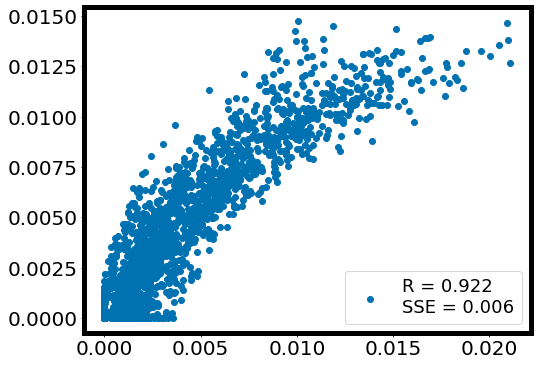

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 678.35692, Residuals: 0.18042, Convergence:   inf
Epoch: 10, Loss: 576.26453, Residuals: 0.16139, Convergence: 0.016564
Epoch: 20, Loss: 489.25809, Residuals: 0.14443, Convergence: 0.016509
Epoch: 30, Loss: 416.17401, Residuals: 0.12873, Convergence: 0.016136
Epoch: 40, Loss: 355.88757, Residuals: 0.11447, Convergence: 0.015571
Epoch: 50, Loss: 305.75458, Residuals: 0.10161, Convergence: 0.014975
Epoch: 60, Loss: 263.93362, Residuals: 0.09009, Convergence: 0.014546
Epoch: 70, Loss: 229.04770, Residuals: 0.07970, Convergence: 0.014036
Epoch: 80, Loss: 200.14067, Residuals: 0.07073, Convergence: 0.013348
Epoch: 90, Loss: 176.07272, Residuals: 0.06295, Convergence: 0.012791
Epoch: 100, Loss: 155.79413, Residuals: 0.05600, Convergence: 0.012158
Epoch: 110, Loss: 138.58441, Residuals: 0.04957, Convergence: 0.011248
Epoch: 120, Loss:

Epoch: 970, Loss: 392.46594, Residuals: -0.00791, Convergence: 0.001344

Epoch: 975, Evidence: 1892.38477, Convergence: 0.002762
Epoch: 980, Loss: 394.52957, Residuals: -0.00821, Convergence: 0.001341

Epoch: 988, Evidence: 1892.78015, Convergence: 0.000209
Epoch: 990, Loss: 392.89996, Residuals: -0.00899, Convergence: 0.002328
Epoch: 1000, Loss: 385.65082, Residuals: -0.01042, Convergence: 0.001468

Epoch: 1009, Evidence: 1882.10510, Convergence: -0.005462
Epoch: 1010, Loss: 401.66141, Residuals: -0.00807, Convergence: 0.001634
Epoch: 1020, Loss: 396.11877, Residuals: -0.00839, Convergence: 0.001260

Epoch: 1026, Evidence: 1895.76501, Convergence: 0.001783
Epoch: 1030, Loss: 396.43982, Residuals: -0.00855, Convergence: 0.001185

Epoch: 1039, Evidence: 1894.39526, Convergence: -0.000723
Epoch: 1040, Loss: 394.22824, Residuals: -0.00902, Convergence: 0.002243
Epoch: 1050, Loss: 387.08112, Residuals: -0.01072, Convergence: 0.001456
Epoch: 1060, Loss: 382.06604, Residuals: -0.01034, Conve

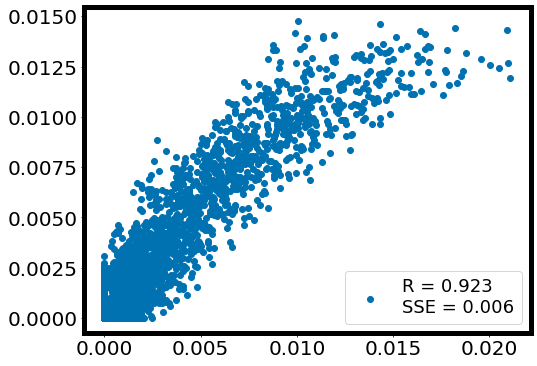

Running trial 16, cycle 1
Epoch: 0, Loss: 71.03148, Residuals: -1.11434, Convergence:   inf
Epoch: 10, Loss: 62.03058, Residuals: -1.02619, Convergence: 0.013501
Epoch: 20, Loss: 54.33714, Residuals: -0.94738, Convergence: 0.013207
Epoch: 30, Loss: 47.68730, Residuals: -0.87648, Convergence: 0.013132
Epoch: 40, Loss: 41.80115, Residuals: -0.81289, Convergence: 0.013419
Epoch: 50, Loss: 36.49271, Residuals: -0.75618, Convergence: 0.013873
Epoch: 60, Loss: 31.74794, Residuals: -0.70554, Convergence: 0.014102
Epoch: 70, Loss: 27.60602, Residuals: -0.65986, Convergence: 0.014032
Epoch: 80, Loss: 24.05933, Residuals: -0.61816, Convergence: 0.013732
Epoch: 90, Loss: 21.05565, Residuals: -0.57981, Convergence: 0.013111
Epoch: 100, Loss: 18.53238, Residuals: -0.54345, Convergence: 0.012386
Epoch: 110, Loss: 16.40777, Residuals: -0.50998, Convergence: 0.011575
Epoch: 120, Loss: 14.64623, Residuals: -0.47931, Convergence: 0.011193
Epoch: 130, Loss: 13.15227, Residuals: -0.45159, Convergence: 0.0

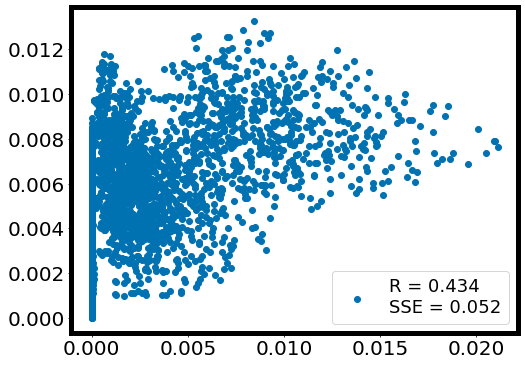

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 16, cycle 2
Epoch: 0, Loss: 165.52783, Residuals: -0.63729, Convergence:   inf
Epoch: 10, Loss: 141.34422, Residuals: -0.58537, Convergence: 0.015879
Epoch: 20, Loss: 120.77148, Residuals: -0.53901, Convergence: 0.015836
Epoch: 30, Loss: 103.24146, Residuals: -0.49717, Convergence: 0.015784
Epoch: 40, Loss: 88.27645, Residuals: -0.45905, Convergence: 0.015788
Epoch: 50, Loss: 75.47212, Residuals: -0.42411, Convergence: 0.015788
Epoch: 60, Loss: 64.56451, Residuals: -0.39208, Convergence: 0.015665
Epoch: 70, Loss: 55.37640, Residuals: -0.36260, Convergence: 0.015304
Epoch: 80, Loss: 47.67362, Residuals: -0.33510, Convergence: 0.015133
Epoch: 90, Loss: 41.19883, Residuals: -0.30953, Convergence: 0.014522
Epoch: 100, Loss: 35.71857, Residuals: -0.28591, Convergence: 0.014151
Epoch: 110, Loss: 31.12543, Residuals: -0.26440, Convergen

Epoch: 930, Loss: 100.13144, Residuals: -0.01207, Convergence: 0.001774
Epoch: 940, Loss: 98.75666, Residuals: -0.01220, Convergence: 0.001328

Epoch: 945, Evidence: 504.73355, Convergence: -0.000441
Epoch: 950, Loss: 99.63972, Residuals: -0.01367, Convergence: 0.003451
Epoch: 960, Loss: 96.98010, Residuals: -0.01552, Convergence: 0.002697
Epoch: 970, Loss: 94.75696, Residuals: -0.01646, Convergence: 0.002050
Epoch: 980, Loss: 92.77771, Residuals: -0.01646, Convergence: 0.001940
Epoch: 990, Loss: 91.04836, Residuals: -0.01607, Convergence: 0.002116
Epoch: 1000, Loss: 89.59170, Residuals: -0.01541, Convergence: 0.001858
Epoch: 1010, Loss: 88.30139, Residuals: -0.01448, Convergence: 0.001560

Epoch: 1017, Evidence: 483.33163, Convergence: -0.044741
Epoch: 1020, Loss: 110.11461, Residuals: -0.01148, Convergence: 0.002187
Epoch: 1030, Loss: 107.97878, Residuals: -0.01182, Convergence: 0.001848
Epoch: 1040, Loss: 106.06895, Residuals: -0.01205, Convergence: 0.001940
Epoch: 1050, Loss: 104.3

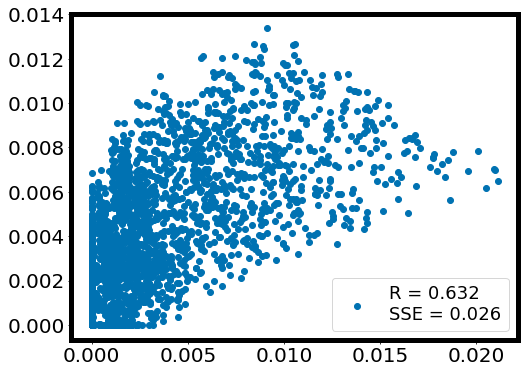

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 16, cycle 3
Epoch: 0, Loss: 237.29878, Residuals: -0.14270, Convergence:   inf
Epoch: 10, Loss: 204.33461, Residuals: -0.13302, Convergence: 0.015287
Epoch: 20, Loss: 175.45200, Residuals: -0.12354, Convergence: 0.015360
Epoch: 30, Loss: 150.77187, Residuals: -0.11403, Convergence: 0.015173
Epoch: 40, Loss: 129.94370, Residuals: -0.10494, Convergence: 0.014800
Epoch: 50, Loss: 112.49700, Residuals: -0.09668, Convergence: 0.014236
Epoch: 60, Loss: 98.00042, Residuals: -0.08922, Convergence: 0.013681
Epoch: 70, Loss: 85.87720, Residuals: -0.08244, Convergence: 0.012890
Epoch: 80, Loss: 75.73457, Residuals: -0.07636, Convergence: 0.012177
Epoch: 90, Loss: 67.02059, Residuals: -0.07079, Convergence: 0.012437
Epoch: 100, Loss: 59.10240, Residuals: -0.06576, Convergence: 0.012622
Epoch: 110, Loss: 52.25964, Residuals: -0.06099, Converg

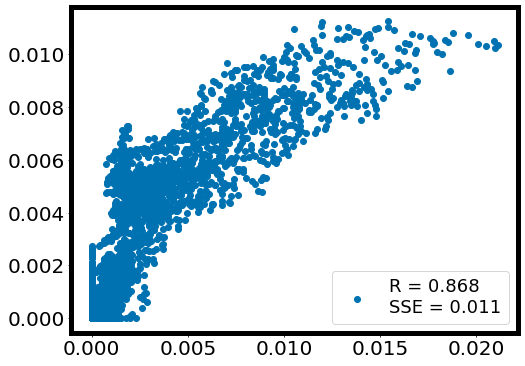

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 16, cycle 4
Epoch: 0, Loss: 302.80281, Residuals: -0.07026, Convergence:   inf
Epoch: 10, Loss: 261.29013, Residuals: -0.06637, Convergence: 0.015161
Epoch: 20, Loss: 224.57018, Residuals: -0.06226, Convergence: 0.015272
Epoch: 30, Loss: 193.28242, Residuals: -0.05803, Convergence: 0.014932
Epoch: 40, Loss: 167.11351, Residuals: -0.05416, Convergence: 0.014403
Epoch: 50, Loss: 145.35318, Residuals: -0.05065, Convergence: 0.013834
Epoch: 60, Loss: 127.03909, Residuals: -0.04737, Convergence: 0.013390
Epoch: 70, Loss: 111.57101, Residuals: -0.04423, Convergence: 0.013071
Epoch: 80, Loss: 98.23473, Residuals: -0.04129, Convergence: 0.012656
Epoch: 90, Loss: 86.76488, Residuals: -0.03875, Convergence: 0.012302
Epoch: 100, Loss: 76.74550, Residuals: -0.03638, Convergence: 0.012358
Epoch: 110, Loss: 68.13253, Residuals: -0.03426, Conve

Epoch: 1000, Loss: 209.87659, Residuals: -0.01791, Convergence: 0.001705
Epoch: 1010, Loss: 206.16254, Residuals: -0.01596, Convergence: 0.001679

Epoch: 1016, Evidence: 1127.70508, Convergence: -0.019780
Epoch: 1020, Loss: 230.33524, Residuals: -0.01151, Convergence: 0.002075
Epoch: 1030, Loss: 226.07401, Residuals: -0.01272, Convergence: 0.001626
Epoch: 1040, Loss: 222.61440, Residuals: -0.01327, Convergence: 0.001484
Epoch: 1050, Loss: 219.75397, Residuals: -0.01324, Convergence: 0.001214
Epoch: 1060, Loss: 217.34991, Residuals: -0.01284, Convergence: 0.001066

Epoch: 1064, Evidence: 1161.74414, Convergence: 0.010099
Epoch: 1070, Loss: 222.96770, Residuals: -0.01331, Convergence: 0.001642
Epoch: 1080, Loss: 219.68846, Residuals: -0.01393, Convergence: 0.001518
Epoch: 1090, Loss: 216.93094, Residuals: -0.01395, Convergence: 0.001127

Epoch: 1094, Evidence: 1154.99438, Convergence: -0.005844
Epoch: 1100, Loss: 227.18002, Residuals: -0.01262, Convergence: 0.001129

Epoch: 1108, Evidenc

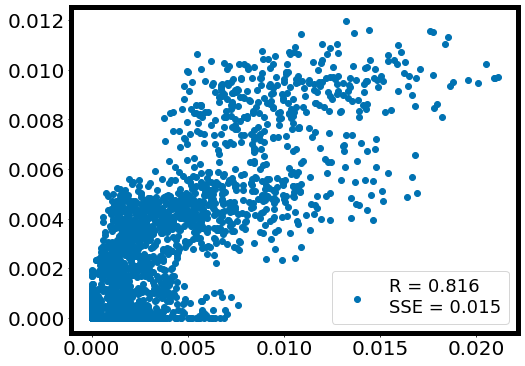

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 16, cycle 5
Epoch: 0, Loss: 366.54326, Residuals: 0.01542, Convergence:   inf
Epoch: 10, Loss: 319.81116, Residuals: 0.01180, Convergence: 0.013913
Epoch: 20, Loss: 278.55972, Residuals: 0.00907, Convergence: 0.013846
Epoch: 30, Loss: 243.21872, Residuals: 0.00676, Convergence: 0.013470
Epoch: 40, Loss: 213.52509, Residuals: 0.00471, Convergence: 0.012802
Epoch: 50, Loss: 188.56505, Residuals: 0.00309, Convergence: 0.012280
Epoch: 60, Loss: 166.81372, Residuals: 0.00142, Convergence: 0.012371
Epoch: 70, Loss: 147.74464, Residuals: -0.00035, Convergence: 0.012228
Epoch: 80, Loss: 131.06651, Residuals: -0.00201, Convergence: 0.011847
Epoch: 90, Loss: 116.58503, Residuals: -0.00351, Convergence: 0.011682
Epoch: 100, Loss: 104.14712, Residuals: -0.00469, Convergence: 0.011168
Epoch: 110, Loss: 93.12332, Residuals: -0.00549, Convergen

Epoch: 990, Loss: 300.31094, Residuals: -0.00774, Convergence: 0.001765

Epoch: 996, Evidence: 1588.18152, Convergence: 0.004497
Epoch: 1000, Loss: 303.55362, Residuals: -0.00802, Convergence: 0.001511

Epoch: 1005, Evidence: 1591.06616, Convergence: 0.001813

Epoch: 1008, Evidence: 1593.87720, Convergence: 0.001764
Epoch: 1010, Loss: 310.01541, Residuals: -0.00867, Convergence: 0.000948

Epoch: 1010, Evidence: 1596.73047, Convergence: 0.001787
Epoch: 1010, Loss: 312.63632, Residuals: -0.00867, Convergence:   inf

Epoch: 1013, Evidence: 1594.59216, Convergence: -0.001341

Epoch: 1014, Evidence: 1599.27539, Convergence: 0.001591

Epoch: 1015, Evidence: 1597.61023, Convergence: -0.001042

Epoch: 1016, Evidence: 1599.45068, Convergence: 0.000110

Epoch: 1017, Evidence: 1598.67480, Convergence: -0.000376

Epoch: 1018, Evidence: 1599.60535, Convergence: 0.000206


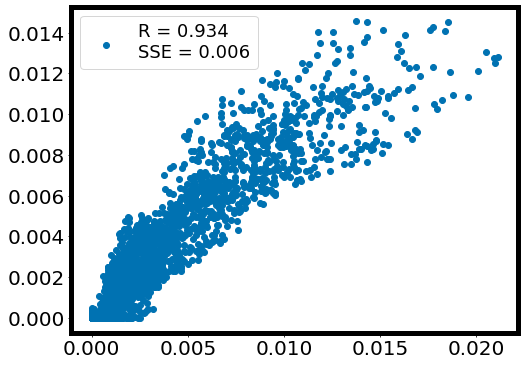

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 595.27715, Residuals: 0.20339, Convergence:   inf
Epoch: 10, Loss: 509.69846, Residuals: 0.18197, Convergence: 0.015685
Epoch: 20, Loss: 436.22845, Residuals: 0.16328, Convergence: 0.015669
Epoch: 30, Loss: 374.58591, Residuals: 0.14667, Convergence: 0.015225
Epoch: 40, Loss: 322.68201, Residuals: 0.13175, Convergence: 0.014734
Epoch: 50, Loss: 279.43863, Residuals: 0.11847, Convergence: 0.014105
Epoch: 60, Loss: 243.17119, Residuals: 0.10673, Convergence: 0.013909
Epoch: 70, Loss: 212.30170, Residuals: 0.09599, Convergence: 0.013670
Epoch: 80, Loss: 185.90646, Residuals: 0.08606, Convergence: 0.013185
Epoch: 90, Loss: 163.48035, Residuals: 0.07724, Convergence: 0.013141
Epoch: 100, Loss: 144.60944, Residuals: 0.06938, Convergence: 0.011583
Epoch: 110, Loss: 128.27426, Residuals: 0.06224, Convergence: 0.011701
Epoch: 120, Loss:

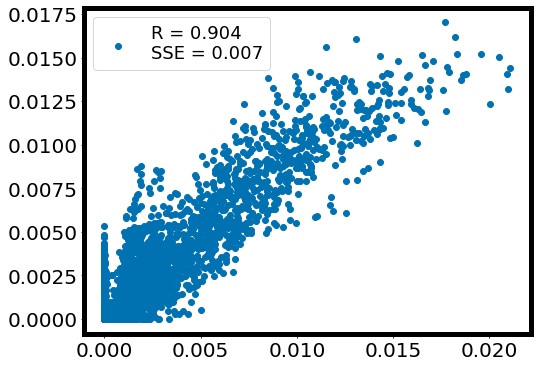

Running trial 17, cycle 1
Epoch: 0, Loss: 181.12935, Residuals: -0.46471, Convergence:   inf
Epoch: 10, Loss: 152.12517, Residuals: -0.43319, Convergence: 0.017663
Epoch: 20, Loss: 127.70774, Residuals: -0.40408, Convergence: 0.017604
Epoch: 30, Loss: 107.34731, Residuals: -0.37748, Convergence: 0.017449
Epoch: 40, Loss: 90.36206, Residuals: -0.35331, Convergence: 0.017301
Epoch: 50, Loss: 76.12265, Residuals: -0.33113, Convergence: 0.017269
Epoch: 60, Loss: 64.14981, Residuals: -0.31104, Convergence: 0.017275
Epoch: 70, Loss: 54.04264, Residuals: -0.29299, Convergence: 0.017359
Epoch: 80, Loss: 45.57194, Residuals: -0.27719, Convergence: 0.017141
Epoch: 90, Loss: 38.51611, Residuals: -0.26311, Convergence: 0.016743
Epoch: 100, Loss: 32.65284, Residuals: -0.25035, Convergence: 0.016522
Epoch: 110, Loss: 27.81762, Residuals: -0.23875, Convergence: 0.015858
Epoch: 120, Loss: 23.83215, Residuals: -0.22834, Convergence: 0.015179
Epoch: 130, Loss: 20.53776, Residuals: -0.21885, Convergence:

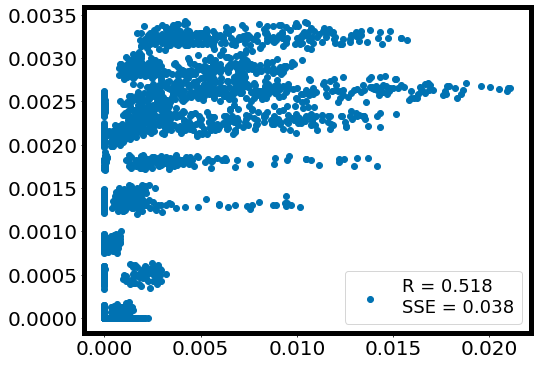

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 17, cycle 2
Epoch: 0, Loss: 205.09320, Residuals: -0.02957, Convergence:   inf
Epoch: 10, Loss: 173.06589, Residuals: -0.03363, Convergence: 0.017352
Epoch: 20, Loss: 145.50229, Residuals: -0.03719, Convergence: 0.017597
Epoch: 30, Loss: 122.12067, Residuals: -0.04033, Convergence: 0.017717
Epoch: 40, Loss: 102.43933, Residuals: -0.04302, Convergence: 0.017719
Epoch: 50, Loss: 85.97990, Residuals: -0.04519, Convergence: 0.017653
Epoch: 60, Loss: 72.27055, Residuals: -0.04670, Convergence: 0.017416
Epoch: 70, Loss: 61.00839, Residuals: -0.04754, Convergence: 0.017089
Epoch: 80, Loss: 51.65325, Residuals: -0.04802, Convergence: 0.016558
Epoch: 90, Loss: 43.88315, Residuals: -0.04814, Convergence: 0.016365
Epoch: 100, Loss: 37.49531, Residuals: -0.04757, Convergence: 0.015609
Epoch: 110, Loss: 32.23640, Residuals: -0.04662, Converge


Epoch: 872, Evidence: 555.57526, Convergence: 0.003384
Epoch: 880, Loss: 105.99883, Residuals: 0.00649, Convergence: 0.001433
Epoch: 890, Loss: 104.56430, Residuals: 0.00632, Convergence: 0.001378

Epoch: 896, Evidence: 558.25635, Convergence: 0.004803
Epoch: 900, Loss: 106.87330, Residuals: 0.00615, Convergence: 0.001263
Epoch: 910, Loss: 105.37119, Residuals: 0.00592, Convergence: 0.001376
Epoch: 920, Loss: 103.99725, Residuals: 0.00575, Convergence: 0.001536

Epoch: 921, Evidence: 559.97076, Convergence: 0.003062
Epoch: 930, Loss: 106.10345, Residuals: 0.00553, Convergence: 0.001298
Epoch: 940, Loss: 104.68564, Residuals: 0.00536, Convergence: 0.001146

Epoch: 947, Evidence: 562.11646, Convergence: 0.003817
Epoch: 950, Loss: 106.74902, Residuals: 0.00516, Convergence: 0.001401
Epoch: 960, Loss: 105.24061, Residuals: 0.00492, Convergence: 0.001528

Epoch: 967, Evidence: 563.71924, Convergence: 0.002843
Epoch: 970, Loss: 107.03792, Residuals: 0.00472, Convergence: 0.001280
Epoch: 980

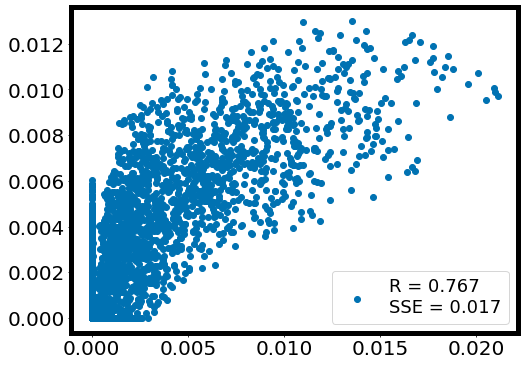

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 17, cycle 3
Epoch: 0, Loss: 355.14977, Residuals: 0.17957, Convergence:   inf
Epoch: 10, Loss: 300.35464, Residuals: 0.15880, Convergence: 0.016899
Epoch: 20, Loss: 254.18285, Residuals: 0.13972, Convergence: 0.016773
Epoch: 30, Loss: 215.34106, Residuals: 0.12190, Convergence: 0.016691
Epoch: 40, Loss: 182.49908, Residuals: 0.10533, Convergence: 0.016653
Epoch: 50, Loss: 155.01318, Residuals: 0.09040, Convergence: 0.016225
Epoch: 60, Loss: 132.55292, Residuals: 0.07973, Convergence: 0.015818
Epoch: 70, Loss: 113.49023, Residuals: 0.07076, Convergence: 0.015852
Epoch: 80, Loss: 97.35288, Residuals: 0.06294, Convergence: 0.015173
Epoch: 90, Loss: 83.82118, Residuals: 0.05581, Convergence: 0.015117
Epoch: 100, Loss: 72.50655, Residuals: 0.04917, Convergence: 0.014111
Epoch: 110, Loss: 62.93171, Residuals: 0.04344, Convergence: 0.01

Epoch: 1000, Loss: 142.70605, Residuals: -0.00521, Convergence: 0.001380
Epoch: 1010, Loss: 140.77382, Residuals: -0.00522, Convergence: 0.001344
Epoch: 1020, Loss: 139.06714, Residuals: -0.00520, Convergence: 0.001102
Epoch: 1030, Loss: 137.52333, Residuals: -0.00514, Convergence: 0.001108

Epoch: 1033, Evidence: 848.85254, Convergence: 0.001685
Epoch: 1040, Loss: 145.94392, Residuals: -0.00521, Convergence: 0.001620
Epoch: 1050, Loss: 143.71017, Residuals: -0.00528, Convergence: 0.001489
Epoch: 1060, Loss: 141.70917, Residuals: -0.00529, Convergence: 0.001354
Epoch: 1070, Loss: 139.93468, Residuals: -0.00528, Convergence: 0.001194
Epoch: 1080, Loss: 138.35370, Residuals: -0.00523, Convergence: 0.001082

Epoch: 1083, Evidence: 849.83673, Convergence: 0.001158
Epoch: 1090, Loss: 145.83116, Residuals: -0.00529, Convergence: 0.001575
Epoch: 1100, Loss: 143.69888, Residuals: -0.00535, Convergence: 0.001386
Epoch: 1110, Loss: 141.77811, Residuals: -0.00536, Convergence: 0.001290
Epoch: 112

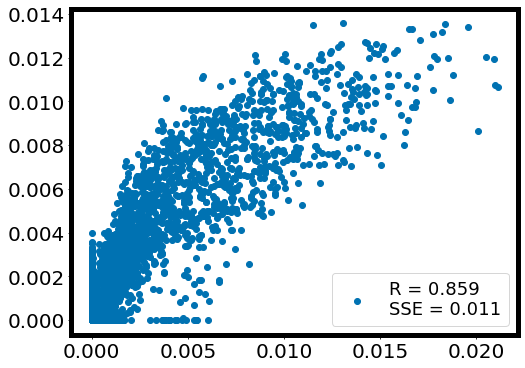

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 17, cycle 4
Epoch: 0, Loss: 473.51112, Residuals: 0.15194, Convergence:   inf
Epoch: 10, Loss: 401.77719, Residuals: 0.13470, Convergence: 0.016550
Epoch: 20, Loss: 341.05548, Residuals: 0.11926, Convergence: 0.016491
Epoch: 30, Loss: 289.79425, Residuals: 0.10520, Convergence: 0.016350
Epoch: 40, Loss: 246.70752, Residuals: 0.09191, Convergence: 0.016017
Epoch: 50, Loss: 210.83279, Residuals: 0.08019, Convergence: 0.015231
Epoch: 60, Loss: 181.32771, Residuals: 0.07125, Convergence: 0.015351
Epoch: 70, Loss: 156.15729, Residuals: 0.06363, Convergence: 0.015227
Epoch: 80, Loss: 135.22873, Residuals: 0.05756, Convergence: 0.014502
Epoch: 90, Loss: 117.42965, Residuals: 0.05255, Convergence: 0.014678
Epoch: 100, Loss: 102.05904, Residuals: 0.04722, Convergence: 0.014076
Epoch: 110, Loss: 89.02071, Residuals: 0.04220, Convergence: 0

Epoch: 910, Loss: 236.82819, Residuals: 0.00158, Convergence: 0.000515

Epoch: 910, Evidence: 1194.52881, Convergence: -0.002407
Epoch: 910, Loss: 259.28271, Residuals: 0.00435, Convergence:   inf
Epoch: 920, Loss: 253.57359, Residuals: 0.00372, Convergence: 0.002023
Epoch: 930, Loss: 249.29837, Residuals: 0.00328, Convergence: 0.001405

Epoch: 938, Evidence: 1201.55444, Convergence: 0.003454
Epoch: 940, Loss: 249.72879, Residuals: 0.00309, Convergence: 0.001946

Epoch: 948, Evidence: 1204.08850, Convergence: 0.002105
Epoch: 950, Loss: 249.78178, Residuals: 0.00262, Convergence: 0.002022
Epoch: 960, Loss: 246.15207, Residuals: 0.00229, Convergence: 0.000843

Epoch: 960, Evidence: 1203.70898, Convergence: -0.000315
Epoch: 960, Loss: 248.20972, Residuals: 0.00229, Convergence:   inf

Epoch: 968, Evidence: 1201.31128, Convergence: -0.002312


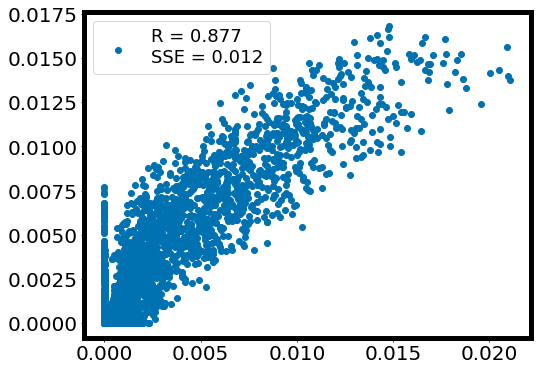

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 17, cycle 5
Epoch: 0, Loss: 634.61943, Residuals: 0.22216, Convergence:   inf
Epoch: 10, Loss: 537.31451, Residuals: 0.19896, Convergence: 0.016811
Epoch: 20, Loss: 454.83224, Residuals: 0.17797, Convergence: 0.016800
Epoch: 30, Loss: 385.37729, Residuals: 0.15790, Convergence: 0.016695
Epoch: 40, Loss: 326.65976, Residuals: 0.13821, Convergence: 0.016651
Epoch: 50, Loss: 278.00470, Residuals: 0.12123, Convergence: 0.016118
Epoch: 60, Loss: 237.64523, Residuals: 0.10825, Convergence: 0.015747
Epoch: 70, Loss: 204.10037, Residuals: 0.09710, Convergence: 0.015390
Epoch: 80, Loss: 176.06470, Residuals: 0.08753, Convergence: 0.014330
Epoch: 90, Loss: 152.54633, Residuals: 0.07864, Convergence: 0.014161
Epoch: 100, Loss: 132.92499, Residuals: 0.07095, Convergence: 0.013749
Epoch: 110, Loss: 116.34496, Residuals: 0.06440, Convergence: 

Epoch: 940, Loss: 326.45148, Residuals: -0.00892, Convergence: 0.001632
Epoch: 950, Loss: 321.60666, Residuals: -0.00968, Convergence: 0.001304

Epoch: 958, Evidence: 1534.81836, Convergence: -0.004317


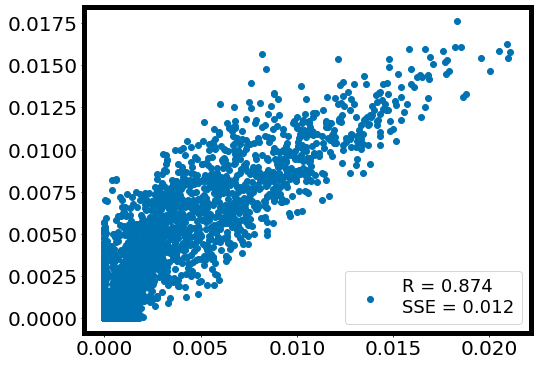

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 819.13200, Residuals: 0.24111, Convergence:   inf
Epoch: 10, Loss: 691.47693, Residuals: 0.21651, Convergence: 0.017134
Epoch: 20, Loss: 583.22168, Residuals: 0.19409, Convergence: 0.017175
Epoch: 30, Loss: 492.26187, Residuals: 0.17250, Convergence: 0.016875
Epoch: 40, Loss: 416.20871, Residuals: 0.15201, Convergence: 0.016821
Epoch: 50, Loss: 353.78763, Residuals: 0.13451, Convergence: 0.016206
Epoch: 60, Loss: 301.85538, Residuals: 0.12003, Convergence: 0.015776
Epoch: 70, Loss: 258.74759, Residuals: 0.10816, Convergence: 0.015309
Epoch: 80, Loss: 222.95067, Residuals: 0.09779, Convergence: 0.014866
Epoch: 90, Loss: 193.10484, Residuals: 0.08865, Convergence: 0.014488
Epoch: 100, Loss: 168.24007, Residuals: 0.08045, Convergence: 0.013733
Epoch: 110, Loss: 147.27209, Residuals: 0.07329, Convergence: 0.013395
Epoch: 120, Loss:

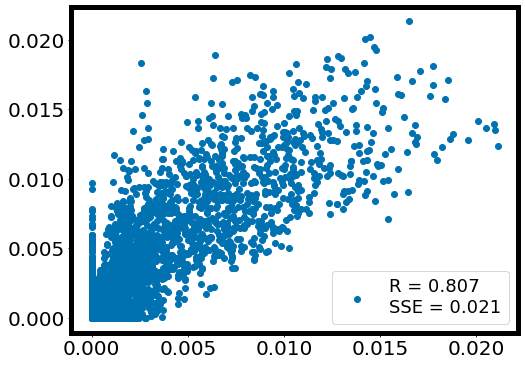

Running trial 18, cycle 1
Epoch: 0, Loss: 106.41031, Residuals: -0.60989, Convergence:   inf
Epoch: 10, Loss: 90.57183, Residuals: -0.56197, Convergence: 0.016449
Epoch: 20, Loss: 76.86115, Residuals: -0.51938, Convergence: 0.016583
Epoch: 30, Loss: 65.21251, Residuals: -0.48126, Convergence: 0.016551
Epoch: 40, Loss: 55.36113, Residuals: -0.44674, Convergence: 0.016476
Epoch: 50, Loss: 47.03918, Residuals: -0.41535, Convergence: 0.016367
Epoch: 60, Loss: 40.06770, Residuals: -0.38626, Convergence: 0.016119
Epoch: 70, Loss: 34.19198, Residuals: -0.35964, Convergence: 0.015758
Epoch: 80, Loss: 29.28347, Residuals: -0.33530, Convergence: 0.015471
Epoch: 90, Loss: 25.17641, Residuals: -0.31300, Convergence: 0.015150
Epoch: 100, Loss: 21.72262, Residuals: -0.29295, Convergence: 0.014931
Epoch: 110, Loss: 18.84141, Residuals: -0.27475, Convergence: 0.014233
Epoch: 120, Loss: 16.47964, Residuals: -0.25808, Convergence: 0.013689
Epoch: 130, Loss: 14.51859, Residuals: -0.24305, Convergence: 0.

Epoch: 850, Loss: 45.65701, Residuals: 0.00203, Convergence: 0.002876

Epoch: 859, Evidence: 226.71552, Convergence: 0.008029
Epoch: 860, Loss: 46.37153, Residuals: 0.00265, Convergence: 0.002748
Epoch: 870, Loss: 45.21502, Residuals: 0.00280, Convergence: 0.003059

Epoch: 877, Evidence: 227.08733, Convergence: 0.001637
Epoch: 880, Loss: 45.82997, Residuals: 0.00306, Convergence: 0.002244

Epoch: 881, Evidence: 230.25729, Convergence: 0.013767
Epoch: 890, Loss: 46.33488, Residuals: 0.00318, Convergence: 0.003045

Epoch: 896, Evidence: 230.51115, Convergence: 0.001101
Epoch: 900, Loss: 46.76138, Residuals: 0.00314, Convergence: 0.002339

Epoch: 902, Evidence: 231.72501, Convergence: 0.005238
Epoch: 910, Loss: 47.07015, Residuals: 0.00323, Convergence: 0.002857

Epoch: 915, Evidence: 232.63904, Convergence: 0.003929
Epoch: 920, Loss: 47.36772, Residuals: 0.00312, Convergence: 0.002796
Epoch: 930, Loss: 46.22536, Residuals: 0.00315, Convergence: 0.002676

Epoch: 934, Evidence: 232.02774, 

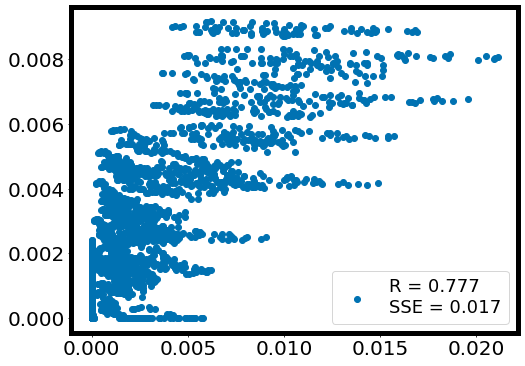

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 18, cycle 2
Epoch: 0, Loss: 206.39371, Residuals: -0.17690, Convergence:   inf
Epoch: 10, Loss: 175.04015, Residuals: -0.16623, Convergence: 0.016721
Epoch: 20, Loss: 148.16789, Residuals: -0.15629, Convergence: 0.016861
Epoch: 30, Loss: 125.29878, Residuals: -0.14663, Convergence: 0.016952
Epoch: 40, Loss: 105.88564, Residuals: -0.13736, Convergence: 0.016967
Epoch: 50, Loss: 89.59881, Residuals: -0.12819, Convergence: 0.016633
Epoch: 60, Loss: 75.94485, Residuals: -0.11925, Convergence: 0.016651
Epoch: 70, Loss: 64.50011, Residuals: -0.11073, Convergence: 0.016241
Epoch: 80, Loss: 55.02494, Residuals: -0.10221, Convergence: 0.015842
Epoch: 90, Loss: 47.16230, Residuals: -0.09397, Convergence: 0.015310
Epoch: 100, Loss: 40.59390, Residuals: -0.08625, Convergence: 0.014478
Epoch: 110, Loss: 35.10165, Residuals: -0.07947, Converge

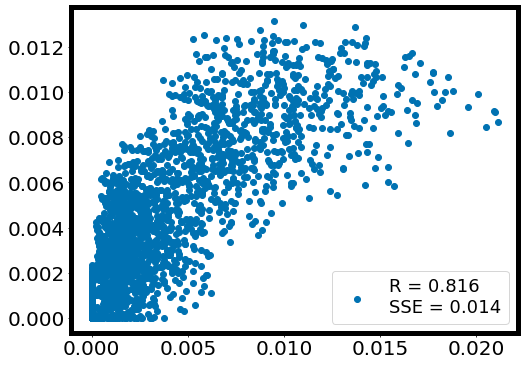

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 18, cycle 3
Epoch: 0, Loss: 331.76778, Residuals: -0.03614, Convergence:   inf
Epoch: 10, Loss: 281.92419, Residuals: -0.03785, Convergence: 0.016448
Epoch: 20, Loss: 239.48175, Residuals: -0.03931, Convergence: 0.016434
Epoch: 30, Loss: 203.46425, Residuals: -0.04046, Convergence: 0.016370
Epoch: 40, Loss: 173.26364, Residuals: -0.04117, Convergence: 0.016071
Epoch: 50, Loss: 147.99088, Residuals: -0.04201, Convergence: 0.015742
Epoch: 60, Loss: 126.71568, Residuals: -0.04235, Convergence: 0.015692
Epoch: 70, Loss: 108.66288, Residuals: -0.04203, Convergence: 0.015418
Epoch: 80, Loss: 93.30922, Residuals: -0.04013, Convergence: 0.015029
Epoch: 90, Loss: 80.24309, Residuals: -0.03742, Convergence: 0.015387
Epoch: 100, Loss: 69.25552, Residuals: -0.03412, Convergence: 0.014581
Epoch: 110, Loss: 59.93779, Residuals: -0.03090, Conve

Epoch: 960, Loss: 162.67279, Residuals: 0.00354, Convergence: 0.001356
Epoch: 970, Loss: 160.46835, Residuals: 0.00352, Convergence: 0.001560
Epoch: 980, Loss: 158.48619, Residuals: 0.00349, Convergence: 0.000983

Epoch: 980, Evidence: 884.68201, Convergence: 0.002291
Epoch: 980, Loss: 163.79567, Residuals: 0.00349, Convergence:   inf
Epoch: 990, Loss: 161.25493, Residuals: 0.00335, Convergence: 0.001487
Epoch: 1000, Loss: 159.01579, Residuals: 0.00330, Convergence: 0.001218

Epoch: 1008, Evidence: 881.78308, Convergence: -0.003288


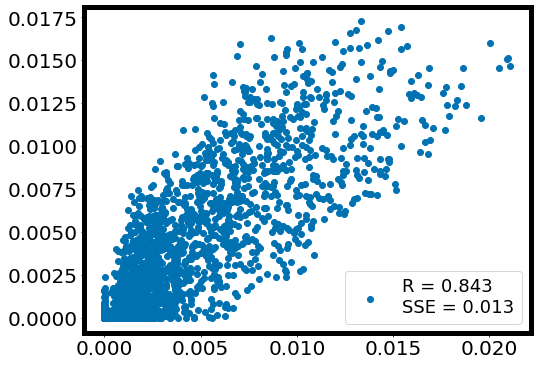

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 18, cycle 4
Epoch: 0, Loss: 414.97942, Residuals: 0.06485, Convergence:   inf
Epoch: 10, Loss: 354.57126, Residuals: 0.05505, Convergence: 0.015855
Epoch: 20, Loss: 302.83850, Residuals: 0.04596, Convergence: 0.015926
Epoch: 30, Loss: 258.63812, Residuals: 0.03736, Convergence: 0.015845
Epoch: 40, Loss: 221.43095, Residuals: 0.02959, Convergence: 0.015305
Epoch: 50, Loss: 190.58939, Residuals: 0.02344, Convergence: 0.014732
Epoch: 60, Loss: 165.07030, Residuals: 0.01919, Convergence: 0.014346
Epoch: 70, Loss: 143.75502, Residuals: 0.01615, Convergence: 0.013943
Epoch: 80, Loss: 125.82704, Residuals: 0.01379, Convergence: 0.012747
Epoch: 90, Loss: 110.45546, Residuals: 0.01231, Convergence: 0.012377
Epoch: 100, Loss: 96.71132, Residuals: 0.01108, Convergence: 0.013704
Epoch: 110, Loss: 84.65695, Residuals: 0.01016, Convergence: 0.


Epoch: 976, Evidence: 1241.70898, Convergence: 0.001491

Epoch: 979, Evidence: 1237.08630, Convergence: -0.003737
Epoch: 980, Loss: 242.34894, Residuals: -0.01202, Convergence: 0.001966
Epoch: 990, Loss: 238.24136, Residuals: -0.01225, Convergence: 0.001512

Epoch: 991, Evidence: 1235.84375, Convergence: -0.004746
Epoch: 1000, Loss: 240.81949, Residuals: -0.01183, Convergence: 0.001126

Epoch: 1001, Evidence: 1241.12183, Convergence: -0.000473
Epoch: 1010, Loss: 238.11012, Residuals: -0.01216, Convergence: 0.001222
Epoch: 1020, Loss: 234.24353, Residuals: -0.01215, Convergence: 0.001181

Epoch: 1023, Evidence: 1233.18323, Convergence: -0.006914


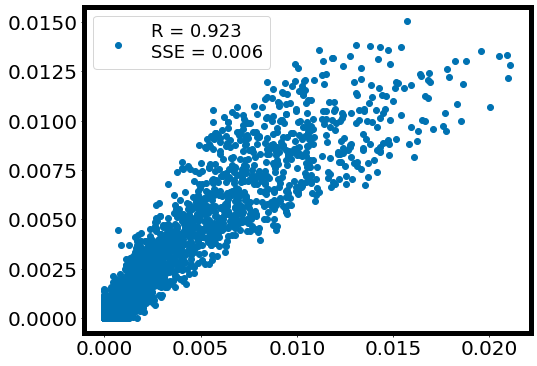

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 18, cycle 5
Epoch: 0, Loss: 551.77440, Residuals: 0.08592, Convergence:   inf
Epoch: 10, Loss: 469.90656, Residuals: 0.07497, Convergence: 0.016240
Epoch: 20, Loss: 399.62009, Residuals: 0.06462, Convergence: 0.016414
Epoch: 30, Loss: 339.67981, Residuals: 0.05432, Convergence: 0.016317
Epoch: 40, Loss: 289.76047, Residuals: 0.04497, Convergence: 0.015634
Epoch: 50, Loss: 248.73074, Residuals: 0.03798, Convergence: 0.015329
Epoch: 60, Loss: 214.64000, Residuals: 0.03263, Convergence: 0.014749
Epoch: 70, Loss: 185.14546, Residuals: 0.02787, Convergence: 0.014841
Epoch: 80, Loss: 160.05362, Residuals: 0.02415, Convergence: 0.014486
Epoch: 90, Loss: 138.85556, Residuals: 0.02154, Convergence: 0.013983
Epoch: 100, Loss: 120.66862, Residuals: 0.01921, Convergence: 0.013951
Epoch: 110, Loss: 105.17258, Residuals: 0.01722, Convergence: 


Epoch: 932, Evidence: 1531.29395, Convergence: -0.007681


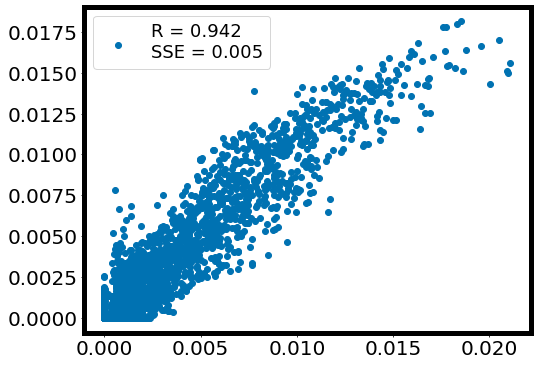

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 583.06511, Residuals: 0.12888, Convergence:   inf
Epoch: 10, Loss: 499.59406, Residuals: 0.11466, Convergence: 0.015676
Epoch: 20, Loss: 427.24857, Residuals: 0.10167, Convergence: 0.015805
Epoch: 30, Loss: 365.67978, Residuals: 0.08930, Convergence: 0.015541
Epoch: 40, Loss: 314.14761, Residuals: 0.07761, Convergence: 0.015015
Epoch: 50, Loss: 271.22980, Residuals: 0.06780, Convergence: 0.014595
Epoch: 60, Loss: 235.09453, Residuals: 0.05931, Convergence: 0.014008
Epoch: 70, Loss: 204.43564, Residuals: 0.05234, Convergence: 0.014169
Epoch: 80, Loss: 178.44864, Residuals: 0.04666, Convergence: 0.013728
Epoch: 90, Loss: 156.30937, Residuals: 0.04169, Convergence: 0.013379
Epoch: 100, Loss: 137.29604, Residuals: 0.03721, Convergence: 0.013009
Epoch: 110, Loss: 121.14384, Residuals: 0.03335, Convergence: 0.012868
Epoch: 120, Loss:

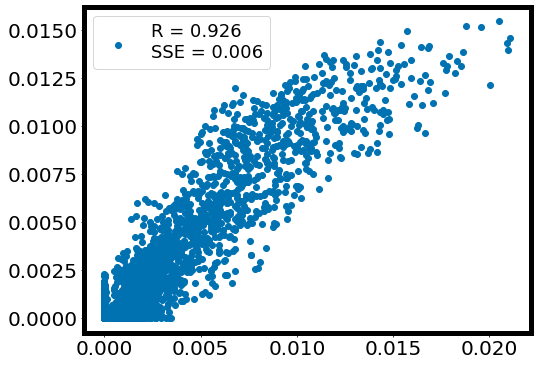

Running trial 19, cycle 1
Epoch: 0, Loss: 155.34532, Residuals: -0.83798, Convergence:   inf
Epoch: 10, Loss: 130.90843, Residuals: -0.77697, Convergence: 0.017323
Epoch: 20, Loss: 110.26941, Residuals: -0.72154, Convergence: 0.017258
Epoch: 30, Loss: 93.01219, Residuals: -0.67099, Convergence: 0.017083
Epoch: 40, Loss: 78.60098, Residuals: -0.62470, Convergence: 0.016945
Epoch: 50, Loss: 66.56039, Residuals: -0.58218, Convergence: 0.016607
Epoch: 60, Loss: 56.58175, Residuals: -0.54316, Convergence: 0.016175
Epoch: 70, Loss: 48.31459, Residuals: -0.50737, Convergence: 0.015680
Epoch: 80, Loss: 41.53054, Residuals: -0.47434, Convergence: 0.014856
Epoch: 90, Loss: 35.93842, Residuals: -0.44308, Convergence: 0.014443
Epoch: 100, Loss: 31.24431, Residuals: -0.41427, Convergence: 0.013855
Epoch: 110, Loss: 27.22092, Residuals: -0.38823, Convergence: 0.013646
Epoch: 120, Loss: 23.77197, Residuals: -0.36453, Convergence: 0.013587
Epoch: 130, Loss: 20.86367, Residuals: -0.34276, Convergence: 


Epoch: 834, Evidence: 221.47223, Convergence: -0.004696


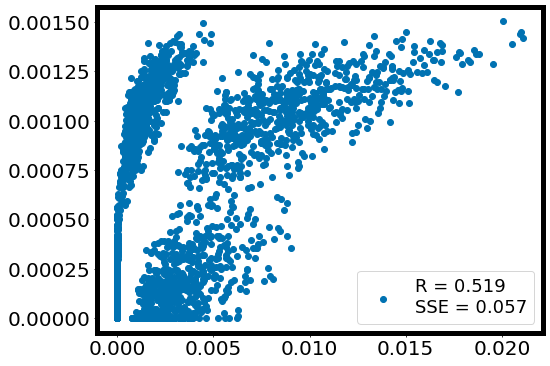

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 19, cycle 2
Epoch: 0, Loss: 162.44901, Residuals: -0.46896, Convergence:   inf
Epoch: 10, Loss: 139.75192, Residuals: -0.43125, Convergence: 0.015307
Epoch: 20, Loss: 120.09222, Residuals: -0.39698, Convergence: 0.015239
Epoch: 30, Loss: 103.25258, Residuals: -0.36587, Convergence: 0.015213
Epoch: 40, Loss: 88.80289, Residuals: -0.33762, Convergence: 0.015159
Epoch: 50, Loss: 76.46581, Residuals: -0.31189, Convergence: 0.014976
Epoch: 60, Loss: 66.01304, Residuals: -0.28776, Convergence: 0.014672
Epoch: 70, Loss: 57.33741, Residuals: -0.26544, Convergence: 0.012856
Epoch: 80, Loss: 49.77569, Residuals: -0.24567, Convergence: 0.014673
Epoch: 90, Loss: 43.21550, Residuals: -0.22756, Convergence: 0.014130
Epoch: 100, Loss: 37.64536, Residuals: -0.21109, Convergence: 0.014196
Epoch: 110, Loss: 32.86236, Residuals: -0.19620, Convergen


Epoch: 913, Evidence: 518.69836, Convergence: 0.001688
Epoch: 920, Loss: 102.45238, Residuals: -0.00243, Convergence: 0.003067

Epoch: 921, Evidence: 520.24768, Convergence: 0.002978
Epoch: 930, Loss: 102.31761, Residuals: -0.00297, Convergence: 0.002585

Epoch: 932, Evidence: 518.49829, Convergence: -0.003374
Epoch: 940, Loss: 105.18109, Residuals: -0.00258, Convergence: 0.001399

Epoch: 949, Evidence: 521.31372, Convergence: 0.002045
Epoch: 950, Loss: 105.62029, Residuals: -0.00260, Convergence: 0.002097

Epoch: 952, Evidence: 524.50525, Convergence: 0.006085
Epoch: 960, Loss: 105.93578, Residuals: -0.00272, Convergence: 0.001733

Epoch: 961, Evidence: 524.02759, Convergence: -0.000912
Epoch: 970, Loss: 104.33051, Residuals: -0.00334, Convergence: 0.003223

Epoch: 975, Evidence: 520.26764, Convergence: -0.008145
Epoch: 980, Loss: 108.19534, Residuals: -0.00269, Convergence: 0.001407

Epoch: 984, Evidence: 526.44537, Convergence: 0.003685
Epoch: 990, Loss: 107.81964, Residuals: -0.00

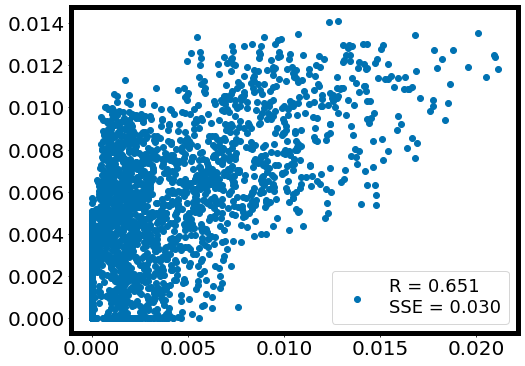

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 19, cycle 3
Epoch: 0, Loss: 237.25087, Residuals: -0.25142, Convergence:   inf
Epoch: 10, Loss: 205.48100, Residuals: -0.23182, Convergence: 0.014633
Epoch: 20, Loss: 177.57651, Residuals: -0.21402, Convergence: 0.014755
Epoch: 30, Loss: 153.31958, Residuals: -0.19818, Convergence: 0.014796
Epoch: 40, Loss: 132.49973, Residuals: -0.18404, Convergence: 0.014530
Epoch: 50, Loss: 114.90763, Residuals: -0.17079, Convergence: 0.014294
Epoch: 60, Loss: 99.82341, Residuals: -0.15812, Convergence: 0.013986
Epoch: 70, Loss: 87.06738, Residuals: -0.14595, Convergence: 0.013607
Epoch: 80, Loss: 76.13107, Residuals: -0.13466, Convergence: 0.013308
Epoch: 90, Loss: 66.84135, Residuals: -0.12478, Convergence: 0.013041
Epoch: 100, Loss: 59.02711, Residuals: -0.11568, Convergence: 0.012521
Epoch: 110, Loss: 52.29153, Residuals: -0.10721, Converg

Epoch: 970, Loss: 160.91443, Residuals: -0.00451, Convergence: 0.001444
Epoch: 980, Loss: 158.77008, Residuals: -0.00454, Convergence: 0.001038

Epoch: 984, Evidence: 855.02844, Convergence: 0.006181
Epoch: 990, Loss: 161.58426, Residuals: -0.00499, Convergence: 0.001718
Epoch: 1000, Loss: 159.07753, Residuals: -0.00551, Convergence: 0.001279
Epoch: 1010, Loss: 156.96643, Residuals: -0.00562, Convergence: 0.001277

Epoch: 1012, Evidence: 850.32446, Convergence: -0.005532

Epoch: 1018, Evidence: 864.74573, Convergence: 0.011237
Epoch: 1020, Loss: 169.45534, Residuals: -0.00452, Convergence: 0.001173

Epoch: 1027, Evidence: 864.76794, Convergence: 0.000026
Epoch: 1030, Loss: 168.81084, Residuals: -0.00491, Convergence: 0.002390
Epoch: 1040, Loss: 165.83441, Residuals: -0.00566, Convergence: 0.001636

Epoch: 1044, Evidence: 858.38232, Convergence: -0.007413


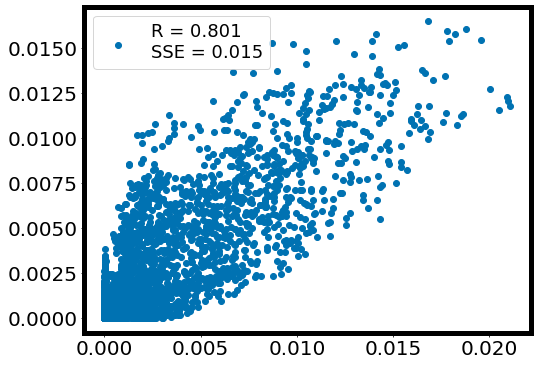

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 19, cycle 4
Epoch: 0, Loss: 324.33910, Residuals: -0.15580, Convergence:   inf
Epoch: 10, Loss: 281.89185, Residuals: -0.14440, Convergence: 0.014229
Epoch: 20, Loss: 244.83470, Residuals: -0.13400, Convergence: 0.014150
Epoch: 30, Loss: 212.94359, Residuals: -0.12517, Convergence: 0.013950
Epoch: 40, Loss: 185.67609, Residuals: -0.11661, Convergence: 0.013628
Epoch: 50, Loss: 162.37448, Residuals: -0.10811, Convergence: 0.013413
Epoch: 60, Loss: 142.41106, Residuals: -0.09989, Convergence: 0.013142
Epoch: 70, Loss: 125.07248, Residuals: -0.09217, Convergence: 0.013072
Epoch: 80, Loss: 109.84118, Residuals: -0.08521, Convergence: 0.012997
Epoch: 90, Loss: 96.61736, Residuals: -0.07899, Convergence: 0.012298
Epoch: 100, Loss: 85.17381, Residuals: -0.07342, Convergence: 0.012602
Epoch: 110, Loss: 75.33136, Residuals: -0.06770, Conv


Epoch: 913, Evidence: 1154.96191, Convergence: -0.007627
Epoch: 920, Loss: 244.51332, Residuals: -0.01010, Convergence: 0.001665

Epoch: 925, Evidence: 1167.21289, Convergence: 0.002949
Epoch: 930, Loss: 245.38306, Residuals: -0.01014, Convergence: 0.002099
Epoch: 940, Loss: 241.03418, Residuals: -0.00994, Convergence: 0.001339
Epoch: 950, Loss: 237.64426, Residuals: -0.00936, Convergence: 0.001009

Epoch: 957, Evidence: 1163.33252, Convergence: -0.003336


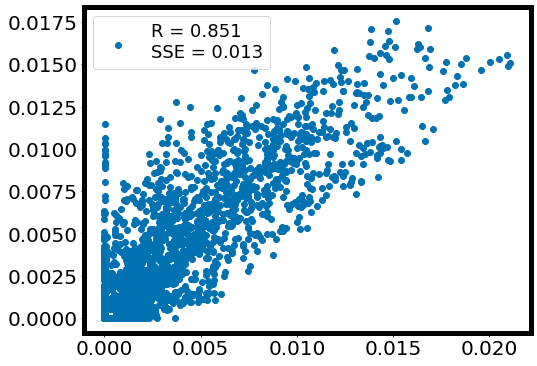

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 19, cycle 5
Epoch: 0, Loss: 405.11943, Residuals: -0.03904, Convergence:   inf
Epoch: 10, Loss: 352.09958, Residuals: -0.03781, Convergence: 0.014251
Epoch: 20, Loss: 305.42706, Residuals: -0.03617, Convergence: 0.014359
Epoch: 30, Loss: 265.02200, Residuals: -0.03489, Convergence: 0.014182
Epoch: 40, Loss: 230.85594, Residuals: -0.03387, Convergence: 0.013661
Epoch: 50, Loss: 202.24956, Residuals: -0.03241, Convergence: 0.013132
Epoch: 60, Loss: 178.09523, Residuals: -0.03121, Convergence: 0.012523
Epoch: 70, Loss: 157.53792, Residuals: -0.02973, Convergence: 0.012373
Epoch: 80, Loss: 139.39738, Residuals: -0.02824, Convergence: 0.012691
Epoch: 90, Loss: 123.22679, Residuals: -0.02688, Convergence: 0.012243
Epoch: 100, Loss: 108.91196, Residuals: -0.02585, Convergence: 0.012369
Epoch: 110, Loss: 96.65051, Residuals: -0.02472, Co

Epoch: 920, Loss: 328.47281, Residuals: -0.00348, Convergence: 0.001533
Epoch: 930, Loss: 324.49506, Residuals: -0.00352, Convergence: 0.000745

Epoch: 930, Evidence: 1517.51465, Convergence: -0.002950


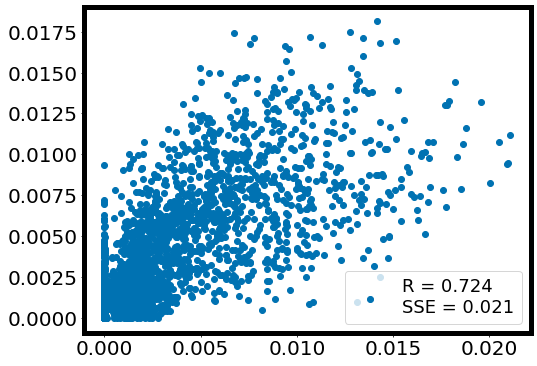

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 699.86742, Residuals: 0.08300, Convergence:   inf
Epoch: 10, Loss: 597.30878, Residuals: 0.07282, Convergence: 0.016127
Epoch: 20, Loss: 508.68423, Residuals: 0.06370, Convergence: 0.016189
Epoch: 30, Loss: 433.92773, Residuals: 0.05504, Convergence: 0.015808
Epoch: 40, Loss: 370.93823, Residuals: 0.04716, Convergence: 0.016213
Epoch: 50, Loss: 316.26187, Residuals: 0.04002, Convergence: 0.015586
Epoch: 60, Loss: 270.15283, Residuals: 0.03445, Convergence: 0.015439
Epoch: 70, Loss: 231.28908, Residuals: 0.03011, Convergence: 0.015698
Epoch: 80, Loss: 198.67453, Residuals: 0.02652, Convergence: 0.015152
Epoch: 90, Loss: 171.38649, Residuals: 0.02370, Convergence: 0.014861
Epoch: 100, Loss: 148.58540, Residuals: 0.02128, Convergence: 0.013844
Epoch: 110, Loss: 129.60649, Residuals: 0.01915, Convergence: 0.013425
Epoch: 120, Loss:

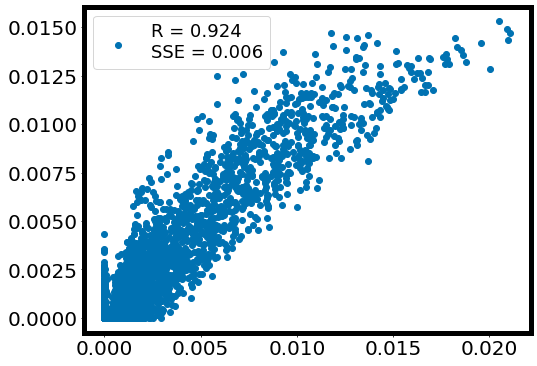

Running trial 20, cycle 1
Epoch: 0, Loss: 116.05398, Residuals: -0.67305, Convergence:   inf
Epoch: 10, Loss: 98.34035, Residuals: -0.62085, Convergence: 0.016816
Epoch: 20, Loss: 83.20352, Residuals: -0.57362, Convergence: 0.016864
Epoch: 30, Loss: 70.39860, Residuals: -0.53060, Convergence: 0.016840
Epoch: 40, Loss: 59.58295, Residuals: -0.49113, Convergence: 0.016802
Epoch: 50, Loss: 50.45650, Residuals: -0.45480, Convergence: 0.016729
Epoch: 60, Loss: 42.78146, Residuals: -0.42099, Convergence: 0.016608
Epoch: 70, Loss: 36.32861, Residuals: -0.39016, Convergence: 0.016421
Epoch: 80, Loss: 30.91852, Residuals: -0.36213, Convergence: 0.016122
Epoch: 90, Loss: 26.39070, Residuals: -0.33663, Convergence: 0.015839
Epoch: 100, Loss: 22.59439, Residuals: -0.31356, Convergence: 0.015492
Epoch: 110, Loss: 19.41636, Residuals: -0.29250, Convergence: 0.015087
Epoch: 120, Loss: 16.75734, Residuals: -0.27305, Convergence: 0.014583
Epoch: 130, Loss: 14.52983, Residuals: -0.25512, Convergence: 0.

Epoch: 860, Loss: 38.52448, Residuals: -0.00066, Convergence: 0.002013

Epoch: 868, Evidence: 250.83340, Convergence: 0.009827
Epoch: 870, Loss: 39.21967, Residuals: -0.00075, Convergence: 0.002604
Epoch: 880, Loss: 38.31545, Residuals: -0.00091, Convergence: 0.002393

Epoch: 889, Evidence: 252.73373, Convergence: 0.007519
Epoch: 890, Loss: 39.13255, Residuals: -0.00097, Convergence: 0.003049
Epoch: 900, Loss: 38.24840, Residuals: -0.00109, Convergence: 0.002618

Epoch: 909, Evidence: 253.35931, Convergence: 0.002469
Epoch: 910, Loss: 39.02238, Residuals: -0.00113, Convergence: 0.003090
Epoch: 920, Loss: 38.13629, Residuals: -0.00120, Convergence: 0.002675
Epoch: 930, Loss: 37.29571, Residuals: -0.00128, Convergence: 0.002387
Epoch: 940, Loss: 36.50165, Residuals: -0.00135, Convergence: 0.002037

Epoch: 944, Evidence: 251.65742, Convergence: -0.006763


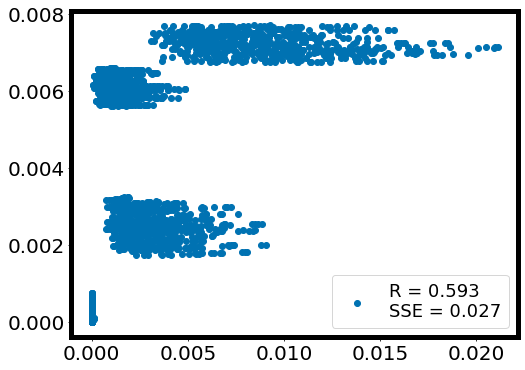

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 20, cycle 2
Epoch: 0, Loss: 153.93831, Residuals: -0.58381, Convergence:   inf
Epoch: 10, Loss: 132.36880, Residuals: -0.53463, Convergence: 0.015314
Epoch: 20, Loss: 113.51850, Residuals: -0.48962, Convergence: 0.015637
Epoch: 30, Loss: 97.06268, Residuals: -0.44843, Convergence: 0.015870
Epoch: 40, Loss: 82.90858, Residuals: -0.41089, Convergence: 0.015868
Epoch: 50, Loss: 70.90179, Residuals: -0.37681, Convergence: 0.015660
Epoch: 60, Loss: 60.81059, Residuals: -0.34601, Convergence: 0.015300
Epoch: 70, Loss: 52.36907, Residuals: -0.31822, Convergence: 0.014843
Epoch: 80, Loss: 45.32286, Residuals: -0.29309, Convergence: 0.014312
Epoch: 90, Loss: 39.46087, Residuals: -0.27024, Convergence: 0.013223
Epoch: 100, Loss: 34.60710, Residuals: -0.24906, Convergence: 0.012992
Epoch: 110, Loss: 30.52061, Residuals: -0.22996, Convergenc


Epoch: 949, Evidence: 462.47366, Convergence: 0.009675
Epoch: 950, Loss: 88.24094, Residuals: -0.00422, Convergence: 0.002084
Epoch: 960, Loss: 86.55621, Residuals: -0.00465, Convergence: 0.001481
Epoch: 970, Loss: 85.05407, Residuals: -0.00495, Convergence: 0.001673
Epoch: 980, Loss: 83.71433, Residuals: -0.00512, Convergence: 0.001949
Epoch: 990, Loss: 82.53928, Residuals: -0.00517, Convergence: 0.001357

Epoch: 996, Evidence: 462.29028, Convergence: -0.000397
Epoch: 1000, Loss: 84.72849, Residuals: -0.00621, Convergence: 0.003423
Epoch: 1010, Loss: 81.97966, Residuals: -0.00810, Convergence: 0.003076
Epoch: 1020, Loss: 79.73916, Residuals: -0.00914, Convergence: 0.003245
Epoch: 1030, Loss: 77.93008, Residuals: -0.00949, Convergence: 0.002696
Epoch: 1040, Loss: 76.34737, Residuals: -0.00930, Convergence: 0.002470

Epoch: 1044, Evidence: 450.85483, Convergence: -0.025771
Epoch: 1050, Loss: 95.52293, Residuals: -0.00451, Convergence: 0.002059
Epoch: 1060, Loss: 93.43951, Residuals: -0

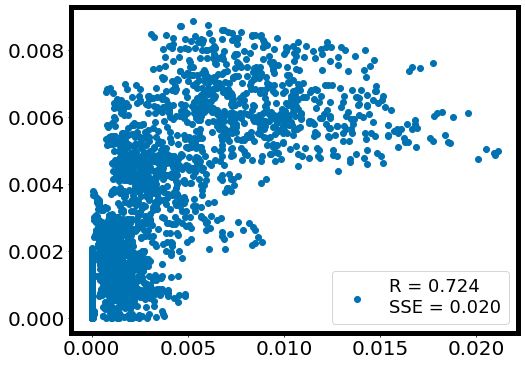

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 20, cycle 3
Epoch: 0, Loss: 225.87640, Residuals: -0.53420, Convergence:   inf
Epoch: 10, Loss: 194.75285, Residuals: -0.48750, Convergence: 0.015001
Epoch: 20, Loss: 167.61559, Residuals: -0.44464, Convergence: 0.015223
Epoch: 30, Loss: 144.02818, Residuals: -0.40540, Convergence: 0.015295
Epoch: 40, Loss: 123.70853, Residuals: -0.36950, Convergence: 0.015369
Epoch: 50, Loss: 106.36393, Residuals: -0.33691, Convergence: 0.015096
Epoch: 60, Loss: 91.76053, Residuals: -0.30737, Convergence: 0.014693
Epoch: 70, Loss: 79.55727, Residuals: -0.27999, Convergence: 0.014293
Epoch: 80, Loss: 69.27813, Residuals: -0.25536, Convergence: 0.013749
Epoch: 90, Loss: 60.65350, Residuals: -0.23290, Convergence: 0.013233
Epoch: 100, Loss: 53.44700, Residuals: -0.21237, Convergence: 0.012136
Epoch: 110, Loss: 47.35505, Residuals: -0.19393, Converg

Epoch: 950, Loss: 154.41028, Residuals: -0.01392, Convergence: 0.002131
Epoch: 960, Loss: 151.56461, Residuals: -0.01386, Convergence: 0.001644
Epoch: 970, Loss: 149.29419, Residuals: -0.01348, Convergence: 0.001663

Epoch: 975, Evidence: 779.80865, Convergence: -0.006654
Epoch: 980, Loss: 159.42212, Residuals: -0.01360, Convergence: 0.001398

Epoch: 988, Evidence: 797.69647, Convergence: 0.015920
Epoch: 990, Loss: 163.73476, Residuals: -0.01336, Convergence: 0.001499
Epoch: 1000, Loss: 161.63147, Residuals: -0.01318, Convergence: 0.001337

Epoch: 1001, Evidence: 799.03229, Convergence: 0.001672
Epoch: 1010, Loss: 164.52348, Residuals: -0.01300, Convergence: 0.001323
Epoch: 1020, Loss: 162.57922, Residuals: -0.01278, Convergence: 0.001074

Epoch: 1021, Evidence: 798.00183, Convergence: -0.001291


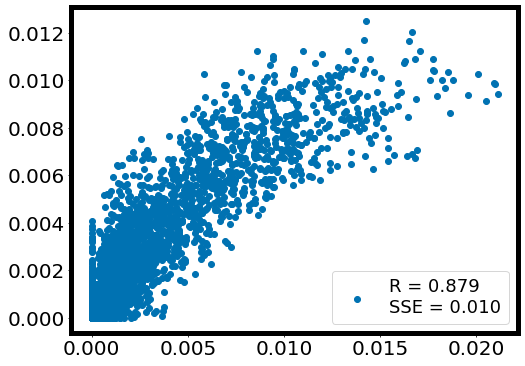

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 20, cycle 4
Epoch: 0, Loss: 374.47353, Residuals: -0.11380, Convergence:   inf
Epoch: 10, Loss: 322.40900, Residuals: -0.10532, Convergence: 0.015022
Epoch: 20, Loss: 277.88074, Residuals: -0.09733, Convergence: 0.014970
Epoch: 30, Loss: 239.60695, Residuals: -0.08996, Convergence: 0.014850
Epoch: 40, Loss: 207.02129, Residuals: -0.08331, Convergence: 0.014711
Epoch: 50, Loss: 179.50928, Residuals: -0.07702, Convergence: 0.014193
Epoch: 60, Loss: 156.43367, Residuals: -0.07134, Convergence: 0.013639
Epoch: 70, Loss: 137.11098, Residuals: -0.06620, Convergence: 0.013077
Epoch: 80, Loss: 120.92736, Residuals: -0.06140, Convergence: 0.012479
Epoch: 90, Loss: 106.90326, Residuals: -0.05682, Convergence: 0.012148
Epoch: 100, Loss: 94.95416, Residuals: -0.05206, Convergence: 0.011693
Epoch: 110, Loss: 84.74771, Residuals: -0.04743, Con

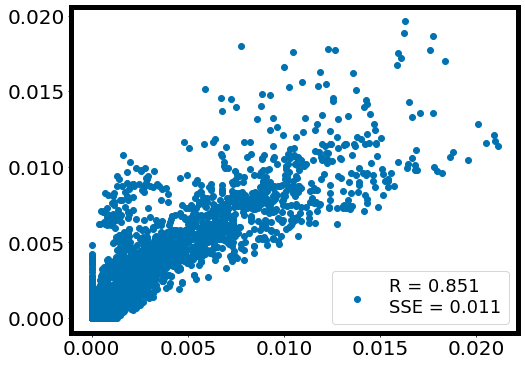

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 20, cycle 5
Epoch: 0, Loss: 508.75676, Residuals: -0.03335, Convergence:   inf
Epoch: 10, Loss: 436.51096, Residuals: -0.03184, Convergence: 0.015410
Epoch: 20, Loss: 374.61246, Residuals: -0.03021, Convergence: 0.015430
Epoch: 30, Loss: 321.64667, Residuals: -0.02874, Convergence: 0.015248
Epoch: 40, Loss: 276.59750, Residuals: -0.02729, Convergence: 0.015021
Epoch: 50, Loss: 239.05968, Residuals: -0.02555, Convergence: 0.014532
Epoch: 60, Loss: 207.27312, Residuals: -0.02419, Convergence: 0.014467
Epoch: 70, Loss: 179.84891, Residuals: -0.02337, Convergence: 0.013975
Epoch: 80, Loss: 156.64432, Residuals: -0.02214, Convergence: 0.013822
Epoch: 90, Loss: 136.29013, Residuals: -0.02045, Convergence: 0.013937
Epoch: 100, Loss: 118.52674, Residuals: -0.01858, Convergence: 0.013734
Epoch: 110, Loss: 103.16273, Residuals: -0.01639, C

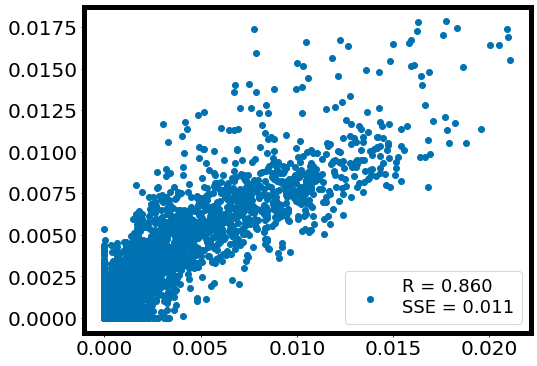

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 597.98540, Residuals: -0.03640, Convergence:   inf
Epoch: 10, Loss: 511.91577, Residuals: -0.03428, Convergence: 0.015679
Epoch: 20, Loss: 438.15234, Residuals: -0.03208, Convergence: 0.015668
Epoch: 30, Loss: 375.58408, Residuals: -0.03010, Convergence: 0.015409
Epoch: 40, Loss: 323.26715, Residuals: -0.02815, Convergence: 0.014709
Epoch: 50, Loss: 279.71545, Residuals: -0.02621, Convergence: 0.014512
Epoch: 60, Loss: 242.64842, Residuals: -0.02463, Convergence: 0.014177
Epoch: 70, Loss: 210.70711, Residuals: -0.02340, Convergence: 0.014304
Epoch: 80, Loss: 183.08759, Residuals: -0.02251, Convergence: 0.014013
Epoch: 90, Loss: 159.22058, Residuals: -0.02136, Convergence: 0.013972
Epoch: 100, Loss: 138.71268, Residuals: -0.01995, Convergence: 0.013711
Epoch: 110, Loss: 121.31652, Residuals: -0.01819, Convergence: 0.013282
Epoch

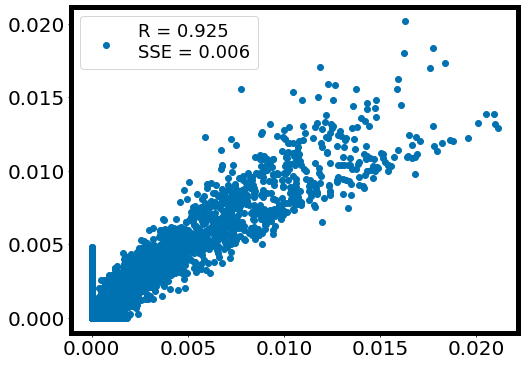

Running trial 21, cycle 1
Epoch: 0, Loss: 96.35804, Residuals: -0.75185, Convergence:   inf
Epoch: 10, Loss: 83.65881, Residuals: -0.69633, Convergence: 0.014493
Epoch: 20, Loss: 72.29457, Residuals: -0.64616, Convergence: 0.014827
Epoch: 30, Loss: 62.36559, Residuals: -0.60073, Convergence: 0.014899
Epoch: 40, Loss: 53.82411, Residuals: -0.55945, Convergence: 0.014756
Epoch: 50, Loss: 46.56256, Residuals: -0.52176, Convergence: 0.014448
Epoch: 60, Loss: 40.42408, Residuals: -0.48718, Convergence: 0.014057
Epoch: 70, Loss: 35.24009, Residuals: -0.45534, Convergence: 0.013620
Epoch: 80, Loss: 30.85762, Residuals: -0.42596, Convergence: 0.013158
Epoch: 90, Loss: 27.15438, Residuals: -0.39887, Convergence: 0.012467
Epoch: 100, Loss: 24.04182, Residuals: -0.37381, Convergence: 0.012200
Epoch: 110, Loss: 21.41905, Residuals: -0.35079, Convergence: 0.011406
Epoch: 120, Loss: 19.22223, Residuals: -0.32946, Convergence: 0.010392
Epoch: 130, Loss: 17.37482, Residuals: -0.30964, Convergence: 0.0

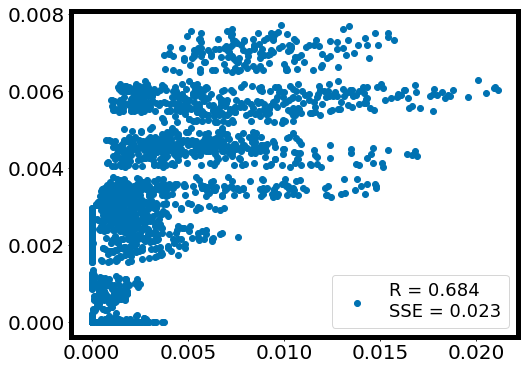

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 21, cycle 2
Epoch: 0, Loss: 135.64909, Residuals: -0.48462, Convergence:   inf
Epoch: 10, Loss: 117.45673, Residuals: -0.44606, Convergence: 0.014643
Epoch: 20, Loss: 101.51417, Residuals: -0.40988, Convergence: 0.014749
Epoch: 30, Loss: 87.57855, Residuals: -0.37620, Convergence: 0.014989
Epoch: 40, Loss: 75.37018, Residuals: -0.34500, Convergence: 0.015222
Epoch: 50, Loss: 64.83675, Residuals: -0.31642, Convergence: 0.015019
Epoch: 60, Loss: 55.86884, Residuals: -0.29052, Convergence: 0.014735
Epoch: 70, Loss: 48.30807, Residuals: -0.26704, Convergence: 0.014486
Epoch: 80, Loss: 41.95211, Residuals: -0.24573, Convergence: 0.013988
Epoch: 90, Loss: 36.63552, Residuals: -0.22622, Convergence: 0.013278
Epoch: 100, Loss: 32.22168, Residuals: -0.20830, Convergence: 0.012646
Epoch: 110, Loss: 28.52274, Residuals: -0.19206, Convergenc

Epoch: 950, Loss: 93.76318, Residuals: -0.00713, Convergence: 0.001350

Epoch: 954, Evidence: 484.67960, Convergence: -0.012557
Epoch: 960, Loss: 103.01311, Residuals: -0.00648, Convergence: 0.001012

Epoch: 963, Evidence: 499.58072, Convergence: 0.017644
Epoch: 970, Loss: 105.59241, Residuals: -0.00649, Convergence: 0.001187

Epoch: 973, Evidence: 502.13538, Convergence: 0.005088
Epoch: 980, Loss: 107.64099, Residuals: -0.00647, Convergence: 0.001038

Epoch: 987, Evidence: 502.38794, Convergence: 0.000503
Epoch: 990, Loss: 107.95328, Residuals: -0.00657, Convergence: 0.002015
Epoch: 1000, Loss: 105.72893, Residuals: -0.00691, Convergence: 0.002075
Epoch: 1010, Loss: 103.76164, Residuals: -0.00715, Convergence: 0.002072
Epoch: 1020, Loss: 102.00739, Residuals: -0.00731, Convergence: 0.001797
Epoch: 1030, Loss: 100.46309, Residuals: -0.00738, Convergence: 0.001717

Epoch: 1036, Evidence: 492.98114, Convergence: -0.018569


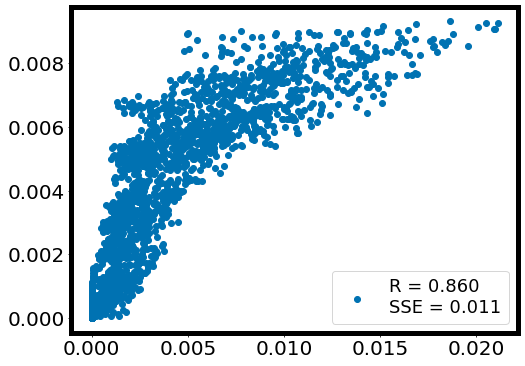

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 21, cycle 3
Epoch: 0, Loss: 208.46498, Residuals: -0.41935, Convergence:   inf
Epoch: 10, Loss: 181.58266, Residuals: -0.38458, Convergence: 0.013970
Epoch: 20, Loss: 158.02469, Residuals: -0.35242, Convergence: 0.014044
Epoch: 30, Loss: 137.37994, Residuals: -0.32296, Convergence: 0.014108
Epoch: 40, Loss: 119.53034, Residuals: -0.29605, Convergence: 0.013909
Epoch: 50, Loss: 104.42777, Residuals: -0.27080, Convergence: 0.013407
Epoch: 60, Loss: 91.67268, Residuals: -0.24769, Convergence: 0.012996
Epoch: 70, Loss: 80.93223, Residuals: -0.22630, Convergence: 0.012509
Epoch: 80, Loss: 71.54817, Residuals: -0.20685, Convergence: 0.012616
Epoch: 90, Loss: 63.36048, Residuals: -0.18937, Convergence: 0.012416
Epoch: 100, Loss: 56.32779, Residuals: -0.17346, Convergence: 0.011805
Epoch: 110, Loss: 50.39834, Residuals: -0.15891, Converg


Epoch: 943, Evidence: 753.48438, Convergence: -0.002889


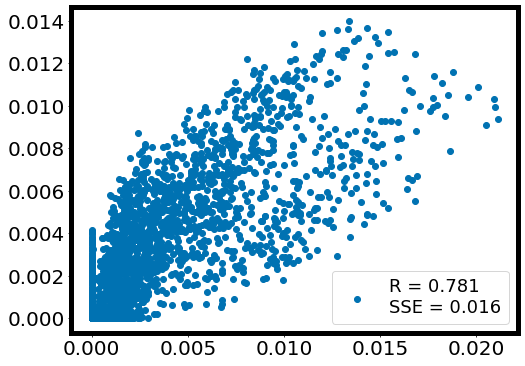

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 21, cycle 4
Epoch: 0, Loss: 286.29006, Residuals: -0.28891, Convergence:   inf
Epoch: 10, Loss: 249.77141, Residuals: -0.26495, Convergence: 0.013847
Epoch: 20, Loss: 217.43503, Residuals: -0.24264, Convergence: 0.014016
Epoch: 30, Loss: 189.34425, Residuals: -0.22224, Convergence: 0.013816
Epoch: 40, Loss: 165.53726, Residuals: -0.20351, Convergence: 0.013351
Epoch: 50, Loss: 145.52820, Residuals: -0.18637, Convergence: 0.012653
Epoch: 60, Loss: 128.82489, Residuals: -0.17027, Convergence: 0.012017
Epoch: 70, Loss: 114.11227, Residuals: -0.15540, Convergence: 0.012266
Epoch: 80, Loss: 101.24397, Residuals: -0.14205, Convergence: 0.012005
Epoch: 90, Loss: 90.06870, Residuals: -0.13010, Convergence: 0.012209
Epoch: 100, Loss: 80.20402, Residuals: -0.11937, Convergence: 0.011665
Epoch: 110, Loss: 71.62706, Residuals: -0.10958, Conv

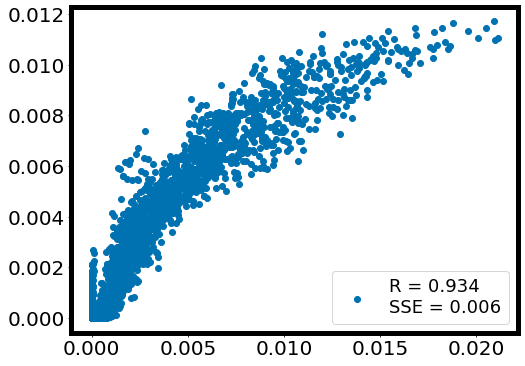

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 21, cycle 5
Epoch: 0, Loss: 359.34554, Residuals: -0.23142, Convergence:   inf
Epoch: 10, Loss: 313.07523, Residuals: -0.21205, Convergence: 0.013981
Epoch: 20, Loss: 272.35443, Residuals: -0.19407, Convergence: 0.014044
Epoch: 30, Loss: 237.09322, Residuals: -0.17773, Convergence: 0.013849
Epoch: 40, Loss: 207.21533, Residuals: -0.16275, Convergence: 0.013407
Epoch: 50, Loss: 182.10622, Residuals: -0.14868, Convergence: 0.012881
Epoch: 60, Loss: 160.37137, Residuals: -0.13602, Convergence: 0.012568
Epoch: 70, Loss: 141.73915, Residuals: -0.12448, Convergence: 0.012269
Epoch: 80, Loss: 125.94624, Residuals: -0.11413, Convergence: 0.011705
Epoch: 90, Loss: 112.71348, Residuals: -0.10454, Convergence: 0.010939
Epoch: 100, Loss: 101.44654, Residuals: -0.09587, Convergence: 0.010489
Epoch: 110, Loss: 91.68049, Residuals: -0.08833, Co


Epoch: 938, Evidence: 1532.12402, Convergence: 0.000023
Epoch: 940, Loss: 314.46884, Residuals: -0.01283, Convergence: 0.002712
Epoch: 950, Loss: 307.92902, Residuals: -0.01520, Convergence: 0.001939
Epoch: 960, Loss: 303.55054, Residuals: -0.01530, Convergence: 0.000595

Epoch: 960, Evidence: 1519.38477, Convergence: -0.008361


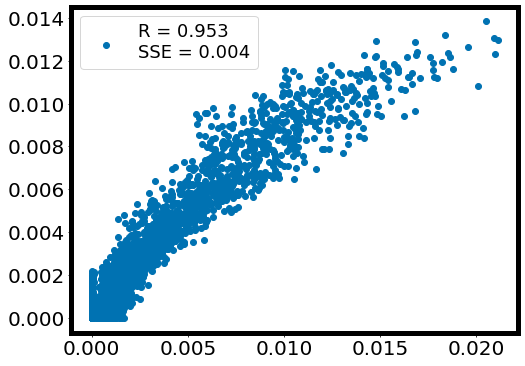

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 652.56920, Residuals: 0.08781, Convergence:   inf
Epoch: 10, Loss: 556.17291, Residuals: 0.07701, Convergence: 0.016112
Epoch: 20, Loss: 473.82651, Residuals: 0.06732, Convergence: 0.016169
Epoch: 30, Loss: 403.61935, Residuals: 0.05802, Convergence: 0.016156
Epoch: 40, Loss: 345.01138, Residuals: 0.05013, Convergence: 0.015534
Epoch: 50, Loss: 296.76584, Residuals: 0.04381, Convergence: 0.015018
Epoch: 60, Loss: 256.14545, Residuals: 0.03849, Convergence: 0.014902
Epoch: 70, Loss: 221.85271, Residuals: 0.03407, Convergence: 0.014301
Epoch: 80, Loss: 192.70239, Residuals: 0.02994, Convergence: 0.014234
Epoch: 90, Loss: 167.88855, Residuals: 0.02606, Convergence: 0.013780
Epoch: 100, Loss: 146.69695, Residuals: 0.02236, Convergence: 0.013601
Epoch: 110, Loss: 128.57469, Residuals: 0.01914, Convergence: 0.013541
Epoch: 120, Loss:

Epoch: 950, Loss: 386.70508, Residuals: -0.00530, Convergence: 0.001072

Epoch: 951, Evidence: 1930.31433, Convergence: 0.002418
Epoch: 960, Loss: 389.56708, Residuals: -0.00530, Convergence: 0.001319

Epoch: 965, Evidence: 1932.12329, Convergence: 0.000936

Epoch: 966, Evidence: 1934.77979, Convergence: 0.002308
Epoch: 970, Loss: 394.73837, Residuals: -0.00591, Convergence: 0.000836

Epoch: 970, Evidence: 1931.63879, Convergence: -0.001626
Epoch: 970, Loss: 398.11783, Residuals: -0.00544, Convergence:   inf
Epoch: 980, Loss: 392.84595, Residuals: -0.00538, Convergence: 0.001374
Epoch: 990, Loss: 388.43475, Residuals: -0.00521, Convergence: 0.000995

Epoch: 990, Evidence: 1929.70020, Convergence: -0.002632


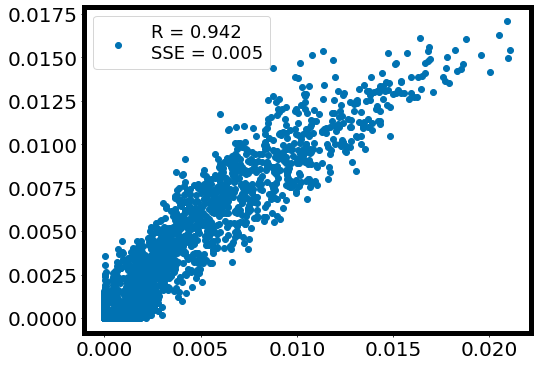

Running trial 22, cycle 1
Epoch: 0, Loss: 69.39502, Residuals: -1.14876, Convergence:   inf
Epoch: 10, Loss: 60.01883, Residuals: -1.05351, Convergence: 0.014840
Epoch: 20, Loss: 51.70764, Residuals: -0.96847, Convergence: 0.015141
Epoch: 30, Loss: 44.43735, Residuals: -0.89151, Convergence: 0.015355
Epoch: 40, Loss: 38.14014, Residuals: -0.82137, Convergence: 0.015406
Epoch: 50, Loss: 32.74710, Residuals: -0.75740, Convergence: 0.015308
Epoch: 60, Loss: 28.16004, Residuals: -0.69903, Convergence: 0.015139
Epoch: 70, Loss: 24.26653, Residuals: -0.64595, Convergence: 0.014861
Epoch: 80, Loss: 20.97621, Residuals: -0.59764, Convergence: 0.014520
Epoch: 90, Loss: 18.20039, Residuals: -0.55364, Convergence: 0.014043
Epoch: 100, Loss: 15.86519, Residuals: -0.51335, Convergence: 0.013667
Epoch: 110, Loss: 13.90696, Residuals: -0.47674, Convergence: 0.013141
Epoch: 120, Loss: 12.26122, Residuals: -0.44346, Convergence: 0.012548
Epoch: 130, Loss: 10.90262, Residuals: -0.41287, Convergence: 0.0

Epoch: 860, Loss: 41.99603, Residuals: -0.01052, Convergence: 0.001011
Epoch: 870, Loss: 41.22211, Residuals: -0.01061, Convergence: 0.001217

Epoch: 875, Evidence: 254.17702, Convergence: 0.012852
Epoch: 880, Loss: 41.68950, Residuals: -0.01080, Convergence: 0.001502
Epoch: 890, Loss: 40.88966, Residuals: -0.01103, Convergence: 0.001269

Epoch: 893, Evidence: 255.01849, Convergence: 0.003300
Epoch: 900, Loss: 41.49736, Residuals: -0.01132, Convergence: 0.001988
Epoch: 910, Loss: 40.70221, Residuals: -0.01156, Convergence: 0.001502
Epoch: 920, Loss: 40.00170, Residuals: -0.01169, Convergence: 0.001479
Epoch: 930, Loss: 39.36388, Residuals: -0.01164, Convergence: 0.001282

Epoch: 931, Evidence: 255.38583, Convergence: 0.001438
Epoch: 940, Loss: 39.88509, Residuals: -0.01196, Convergence: 0.001997
Epoch: 950, Loss: 39.10511, Residuals: -0.01216, Convergence: 0.002230

Epoch: 951, Evidence: 254.87820, Convergence: -0.001992


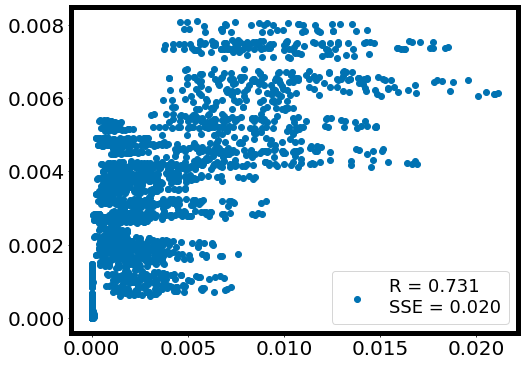

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 22, cycle 2
Epoch: 0, Loss: 193.03066, Residuals: -0.46756, Convergence:   inf
Epoch: 10, Loss: 164.52097, Residuals: -0.43012, Convergence: 0.016331
Epoch: 20, Loss: 139.76228, Residuals: -0.39620, Convergence: 0.016520
Epoch: 30, Loss: 118.56512, Residuals: -0.36526, Convergence: 0.016629
Epoch: 40, Loss: 100.51391, Residuals: -0.33708, Convergence: 0.016657
Epoch: 50, Loss: 85.23363, Residuals: -0.31160, Convergence: 0.016617
Epoch: 60, Loss: 72.39067, Residuals: -0.28844, Convergence: 0.016393
Epoch: 70, Loss: 61.66492, Residuals: -0.26745, Convergence: 0.015933
Epoch: 80, Loss: 52.61187, Residuals: -0.24864, Convergence: 0.015971
Epoch: 90, Loss: 45.10394, Residuals: -0.23110, Convergence: 0.015182
Epoch: 100, Loss: 38.92152, Residuals: -0.21426, Convergence: 0.013918
Epoch: 110, Loss: 33.82954, Residuals: -0.19841, Converge

Epoch: 950, Loss: 94.22318, Residuals: -0.00266, Convergence: 0.001607
Epoch: 960, Loss: 92.84509, Residuals: -0.00275, Convergence: 0.001358
Epoch: 970, Loss: 91.60279, Residuals: -0.00278, Convergence: 0.001119
Epoch: 980, Loss: 90.54161, Residuals: -0.00277, Convergence: 0.000802

Epoch: 980, Evidence: 528.31824, Convergence: -0.001319
Epoch: 980, Loss: 98.36365, Residuals: -0.00262, Convergence:   inf

Epoch: 982, Evidence: 541.41516, Convergence: 0.022903

Epoch: 984, Evidence: 544.95532, Convergence: 0.006496

Epoch: 985, Evidence: 546.84833, Convergence: 0.003462

Epoch: 987, Evidence: 549.36475, Convergence: 0.004581

Epoch: 988, Evidence: 550.13043, Convergence: 0.001392
Epoch: 990, Loss: 111.29979, Residuals: -0.00260, Convergence: 0.000941

Epoch: 990, Evidence: 550.87891, Convergence: 0.001359
Epoch: 990, Loss: 112.76051, Residuals: -0.00260, Convergence:   inf

Epoch: 993, Evidence: 551.94153, Convergence: 0.001925

Epoch: 996, Evidence: 553.37610, Convergence: 0.002592

E

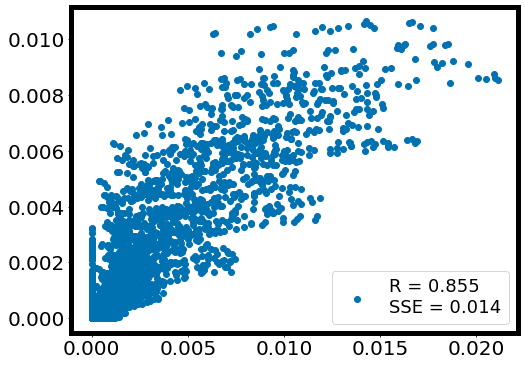

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 22, cycle 3
Epoch: 0, Loss: 403.13960, Residuals: 0.02774, Convergence:   inf
Epoch: 10, Loss: 340.85629, Residuals: 0.02057, Convergence: 0.016960
Epoch: 20, Loss: 287.85507, Residuals: 0.01428, Convergence: 0.017090
Epoch: 30, Loss: 243.03622, Residuals: 0.00834, Convergence: 0.016979
Epoch: 40, Loss: 205.60901, Residuals: 0.00312, Convergence: 0.016784
Epoch: 50, Loss: 174.34706, Residuals: -0.00029, Convergence: 0.016551
Epoch: 60, Loss: 148.02191, Residuals: -0.00296, Convergence: 0.016548
Epoch: 70, Loss: 125.79070, Residuals: -0.00405, Convergence: 0.016691
Epoch: 80, Loss: 107.07803, Residuals: -0.00486, Convergence: 0.016507
Epoch: 90, Loss: 91.43053, Residuals: -0.00566, Convergence: 0.015126
Epoch: 100, Loss: 78.26875, Residuals: -0.00661, Convergence: 0.015777
Epoch: 110, Loss: 67.00941, Residuals: -0.00767, Convergen

Epoch: 930, Loss: 182.40918, Residuals: -0.00213, Convergence: 0.001429

Epoch: 932, Evidence: 918.13733, Convergence: -0.002483

Epoch: 933, Evidence: 919.33997, Convergence: -0.001172


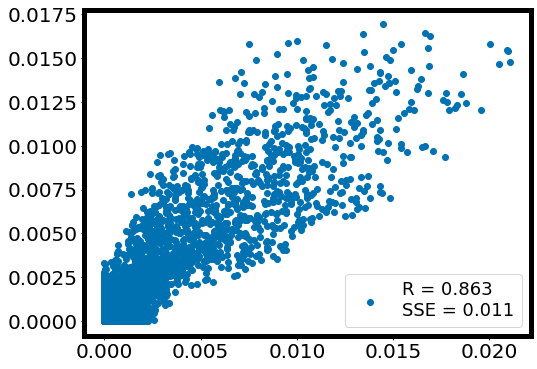

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 22, cycle 4
Epoch: 0, Loss: 367.01686, Residuals: 0.02572, Convergence:   inf
Epoch: 10, Loss: 314.89917, Residuals: 0.01993, Convergence: 0.015404
Epoch: 20, Loss: 270.30353, Residuals: 0.01486, Convergence: 0.015334
Epoch: 30, Loss: 232.35986, Residuals: 0.01017, Convergence: 0.015240
Epoch: 40, Loss: 200.08382, Residuals: 0.00572, Convergence: 0.014769
Epoch: 50, Loss: 172.83356, Residuals: 0.00238, Convergence: 0.014583
Epoch: 60, Loss: 149.52777, Residuals: -0.00070, Convergence: 0.014683
Epoch: 70, Loss: 129.60593, Residuals: -0.00353, Convergence: 0.014252
Epoch: 80, Loss: 112.82518, Residuals: -0.00503, Convergence: 0.013659
Epoch: 90, Loss: 98.70764, Residuals: -0.00587, Convergence: 0.013085
Epoch: 100, Loss: 86.61005, Residuals: -0.00656, Convergence: 0.012865
Epoch: 110, Loss: 76.20503, Residuals: -0.00716, Convergenc


Epoch: 942, Evidence: 1169.94873, Convergence: -0.000603
Epoch: 950, Loss: 237.64050, Residuals: -0.01132, Convergence: 0.002547
Epoch: 960, Loss: 233.31119, Residuals: -0.01100, Convergence: 0.001640
Epoch: 970, Loss: 230.21495, Residuals: -0.00993, Convergence: 0.001308

Epoch: 974, Evidence: 1151.74451, Convergence: -0.016418
Epoch: 980, Loss: 249.32460, Residuals: -0.01057, Convergence: 0.001568
Epoch: 990, Loss: 245.39580, Residuals: -0.01055, Convergence: 0.001540
Epoch: 1000, Loss: 242.28711, Residuals: -0.01036, Convergence: 0.001140

Epoch: 1002, Evidence: 1173.17188, Convergence: 0.002146
Epoch: 1010, Loss: 242.73608, Residuals: -0.01026, Convergence: 0.001535
Epoch: 1020, Loss: 239.55234, Residuals: -0.01001, Convergence: 0.001195

Epoch: 1029, Evidence: 1167.17407, Convergence: -0.005139


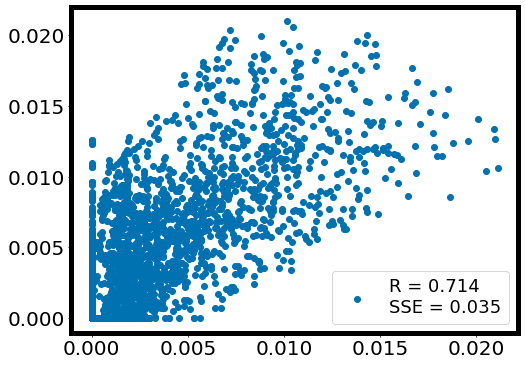

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 22, cycle 5
Epoch: 0, Loss: 485.15584, Residuals: 0.03529, Convergence:   inf
Epoch: 10, Loss: 415.82941, Residuals: 0.02923, Convergence: 0.015535
Epoch: 20, Loss: 356.57486, Residuals: 0.02396, Convergence: 0.015427
Epoch: 30, Loss: 305.98856, Residuals: 0.01869, Convergence: 0.015383
Epoch: 40, Loss: 263.44272, Residuals: 0.01392, Convergence: 0.014757
Epoch: 50, Loss: 227.67073, Residuals: 0.01005, Convergence: 0.014585
Epoch: 60, Loss: 197.25989, Residuals: 0.00737, Convergence: 0.014426
Epoch: 70, Loss: 171.66763, Residuals: 0.00556, Convergence: 0.013913
Epoch: 80, Loss: 149.63585, Residuals: 0.00398, Convergence: 0.013798
Epoch: 90, Loss: 130.71533, Residuals: 0.00267, Convergence: 0.013556
Epoch: 100, Loss: 114.60879, Residuals: 0.00202, Convergence: 0.013114
Epoch: 110, Loss: 101.12390, Residuals: 0.00189, Convergence: 

Epoch: 940, Loss: 321.60822, Residuals: -0.00694, Convergence: 0.001236

Epoch: 946, Evidence: 1518.68152, Convergence: 0.001102
Epoch: 950, Loss: 321.48862, Residuals: -0.00717, Convergence: 0.000947

Epoch: 950, Evidence: 1520.54089, Convergence: 0.001223
Epoch: 950, Loss: 324.54034, Residuals: -0.00717, Convergence:   inf

Epoch: 959, Evidence: 1518.22937, Convergence: -0.001523


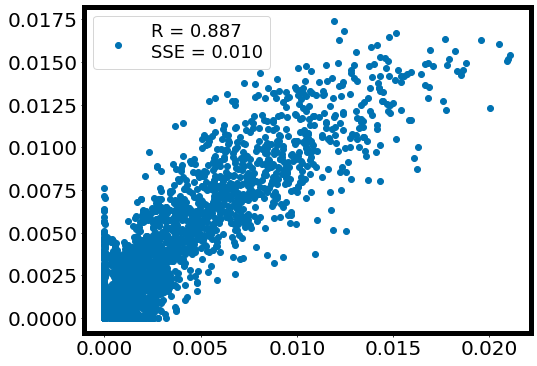

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 604.22936, Residuals: 0.16922, Convergence:   inf
Epoch: 10, Loss: 517.85834, Residuals: 0.15102, Convergence: 0.015573
Epoch: 20, Loss: 444.07925, Residuals: 0.13510, Convergence: 0.015398
Epoch: 30, Loss: 381.02621, Residuals: 0.12094, Convergence: 0.015189
Epoch: 40, Loss: 328.78464, Residuals: 0.10833, Convergence: 0.014547
Epoch: 50, Loss: 285.13980, Residuals: 0.09698, Convergence: 0.014117
Epoch: 60, Loss: 248.47581, Residuals: 0.08677, Convergence: 0.013557
Epoch: 70, Loss: 217.25774, Residuals: 0.07775, Convergence: 0.012849
Epoch: 80, Loss: 190.76640, Residuals: 0.06988, Convergence: 0.012814
Epoch: 90, Loss: 168.10414, Residuals: 0.06274, Convergence: 0.012313
Epoch: 100, Loss: 148.67845, Residuals: 0.05639, Convergence: 0.012034
Epoch: 110, Loss: 132.02403, Residuals: 0.05084, Convergence: 0.011826
Epoch: 120, Loss:

Epoch: 970, Loss: 381.44421, Residuals: -0.00402, Convergence: 0.002027
Epoch: 980, Loss: 375.61777, Residuals: -0.00369, Convergence: 0.000540

Epoch: 980, Evidence: 1931.35046, Convergence: -0.002791
Epoch: 980, Loss: 401.71997, Residuals: -0.00340, Convergence:   inf
Epoch: 990, Loss: 395.53485, Residuals: -0.00353, Convergence: 0.001430

Epoch: 995, Evidence: 1938.78857, Convergence: 0.001056
Epoch: 1000, Loss: 395.37415, Residuals: -0.00348, Convergence: 0.001286
Epoch: 1010, Loss: 390.22821, Residuals: -0.00348, Convergence: 0.001120

Epoch: 1011, Evidence: 1940.65759, Convergence: 0.000963
Epoch: 1020, Loss: 384.56235, Residuals: -0.00412, Convergence: 0.001730
Epoch: 1030, Loss: 377.58807, Residuals: -0.00388, Convergence: 0.001626

Epoch: 1034, Evidence: 1932.62109, Convergence: -0.003191
Epoch: 1040, Loss: 397.29889, Residuals: -0.00353, Convergence: 0.001516

Epoch: 1046, Evidence: 1943.40979, Convergence: 0.002378
Epoch: 1050, Loss: 396.23438, Residuals: -0.00365, Convergen

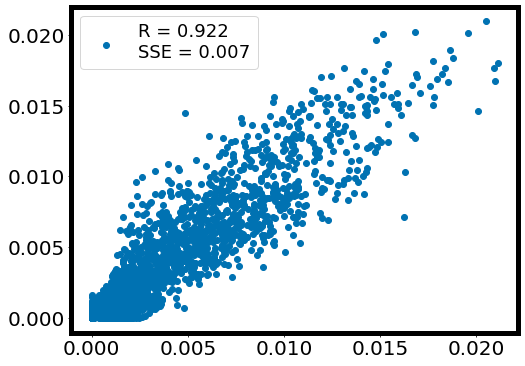

Running trial 23, cycle 1
Epoch: 0, Loss: 100.94686, Residuals: -1.08104, Convergence:   inf
Epoch: 10, Loss: 86.89248, Residuals: -0.99959, Convergence: 0.015134
Epoch: 20, Loss: 74.76853, Residuals: -0.92538, Convergence: 0.015148
Epoch: 30, Loss: 64.31150, Residuals: -0.85670, Convergence: 0.015221
Epoch: 40, Loss: 55.25947, Residuals: -0.79291, Convergence: 0.015326
Epoch: 50, Loss: 47.44833, Residuals: -0.73356, Convergence: 0.015370
Epoch: 60, Loss: 40.78278, Residuals: -0.67901, Convergence: 0.015118
Epoch: 70, Loss: 35.13351, Residuals: -0.62923, Convergence: 0.014882
Epoch: 80, Loss: 30.36864, Residuals: -0.58401, Convergence: 0.014530
Epoch: 90, Loss: 26.36872, Residuals: -0.54295, Convergence: 0.013980
Epoch: 100, Loss: 23.02310, Residuals: -0.50534, Convergence: 0.013324
Epoch: 110, Loss: 20.24204, Residuals: -0.47045, Convergence: 0.012408
Epoch: 120, Loss: 17.96432, Residuals: -0.43770, Convergence: 0.011702
Epoch: 130, Loss: 16.06662, Residuals: -0.40778, Convergence: 0.

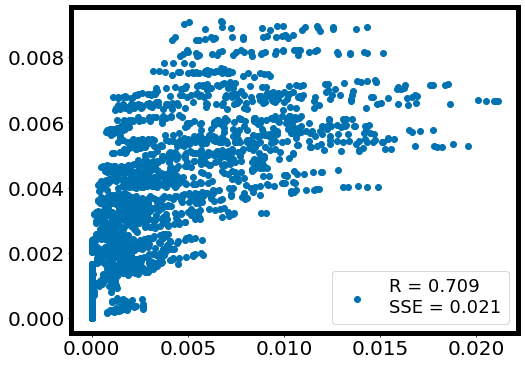

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 23, cycle 2
Epoch: 0, Loss: 158.40204, Residuals: -0.13328, Convergence:   inf
Epoch: 10, Loss: 136.13651, Residuals: -0.12722, Convergence: 0.015418
Epoch: 20, Loss: 116.72282, Residuals: -0.12125, Convergence: 0.015584
Epoch: 30, Loss: 99.87379, Residuals: -0.11518, Convergence: 0.015819
Epoch: 40, Loss: 85.24849, Residuals: -0.10886, Convergence: 0.016077
Epoch: 50, Loss: 72.65961, Residuals: -0.10233, Convergence: 0.016143
Epoch: 60, Loss: 61.97322, Residuals: -0.09632, Convergence: 0.015946
Epoch: 70, Loss: 52.96990, Residuals: -0.09067, Convergence: 0.015729
Epoch: 80, Loss: 45.40127, Residuals: -0.08536, Convergence: 0.015299
Epoch: 90, Loss: 39.09446, Residuals: -0.08036, Convergence: 0.014720
Epoch: 100, Loss: 33.80793, Residuals: -0.07584, Convergence: 0.014427
Epoch: 110, Loss: 29.39430, Residuals: -0.07165, Convergenc

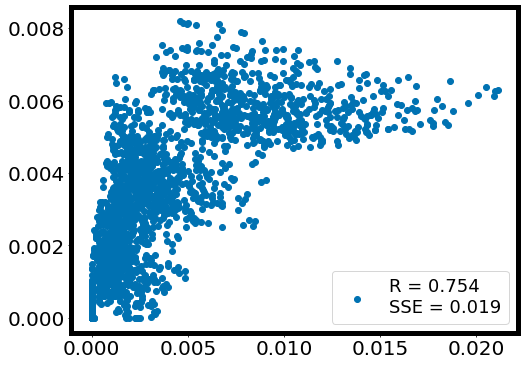

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 23, cycle 3
Epoch: 0, Loss: 255.47682, Residuals: -0.08984, Convergence:   inf
Epoch: 10, Loss: 219.84509, Residuals: -0.08531, Convergence: 0.015190
Epoch: 20, Loss: 189.00829, Residuals: -0.08100, Convergence: 0.015268
Epoch: 30, Loss: 162.34024, Residuals: -0.07647, Convergence: 0.015361
Epoch: 40, Loss: 139.53745, Residuals: -0.07177, Convergence: 0.015178
Epoch: 50, Loss: 120.21268, Residuals: -0.06735, Convergence: 0.014887
Epoch: 60, Loss: 103.97501, Residuals: -0.06296, Convergence: 0.014449
Epoch: 70, Loss: 90.38718, Residuals: -0.05845, Convergence: 0.013908
Epoch: 80, Loss: 78.97549, Residuals: -0.05413, Convergence: 0.013176
Epoch: 90, Loss: 69.49718, Residuals: -0.04986, Convergence: 0.012849
Epoch: 100, Loss: 61.46418, Residuals: -0.04593, Convergence: 0.012285
Epoch: 110, Loss: 54.73309, Residuals: -0.04215, Conver

Epoch: 910, Loss: 187.63876, Residuals: -0.00768, Convergence: 0.001899

Epoch: 912, Evidence: 803.19495, Convergence: 0.003037
Epoch: 920, Loss: 188.58105, Residuals: -0.00771, Convergence: 0.001823

Epoch: 921, Evidence: 804.76776, Convergence: 0.001954

Epoch: 927, Evidence: 807.37134, Convergence: 0.003225
Epoch: 930, Loss: 192.11133, Residuals: -0.00777, Convergence: 0.001705

Epoch: 933, Evidence: 807.45337, Convergence: 0.000102
Epoch: 940, Loss: 189.48718, Residuals: -0.00852, Convergence: 0.003052
Epoch: 950, Loss: 185.05685, Residuals: -0.00898, Convergence: 0.003180
Epoch: 960, Loss: 181.57855, Residuals: -0.00898, Convergence: 0.002024

Epoch: 965, Evidence: 803.73914, Convergence: -0.004519
Epoch: 970, Loss: 193.91850, Residuals: -0.00779, Convergence: 0.001508

Epoch: 978, Evidence: 806.38251, Convergence: -0.001226

Epoch: 979, Evidence: 809.93341, Convergence: 0.003163
Epoch: 980, Loss: 197.26744, Residuals: -0.00778, Convergence: 0.000824

Epoch: 980, Evidence: 810.877

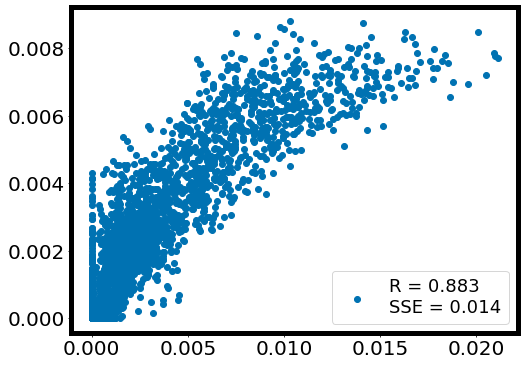

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 23, cycle 4
Epoch: 0, Loss: 353.87953, Residuals: -0.03578, Convergence:   inf
Epoch: 10, Loss: 304.42026, Residuals: -0.03528, Convergence: 0.015233
Epoch: 20, Loss: 261.74225, Residuals: -0.03477, Convergence: 0.015214
Epoch: 30, Loss: 225.11891, Residuals: -0.03414, Convergence: 0.015100
Epoch: 40, Loss: 194.15817, Residuals: -0.03308, Convergence: 0.014883
Epoch: 50, Loss: 167.76794, Residuals: -0.03161, Convergence: 0.014637
Epoch: 60, Loss: 145.45300, Residuals: -0.02978, Convergence: 0.014214
Epoch: 70, Loss: 126.80498, Residuals: -0.02801, Convergence: 0.013617
Epoch: 80, Loss: 111.16309, Residuals: -0.02658, Convergence: 0.013063
Epoch: 90, Loss: 97.90878, Residuals: -0.02533, Convergence: 0.012309
Epoch: 100, Loss: 86.28474, Residuals: -0.02453, Convergence: 0.012809
Epoch: 110, Loss: 76.09136, Residuals: -0.02340, Conv

Epoch: 950, Loss: 238.14742, Residuals: -0.00237, Convergence: 0.001540

Epoch: 951, Evidence: 1175.75305, Convergence: -0.006264
Epoch: 960, Loss: 247.56476, Residuals: -0.00077, Convergence: 0.001650
Epoch: 970, Loss: 244.61823, Residuals: -0.00079, Convergence: 0.001077

Epoch: 973, Evidence: 1186.26257, Convergence: 0.002651
Epoch: 980, Loss: 245.52859, Residuals: -0.00092, Convergence: 0.001118

Epoch: 983, Evidence: 1186.73022, Convergence: 0.000394
Epoch: 990, Loss: 242.37839, Residuals: -0.00222, Convergence: 0.002291

Epoch: 999, Evidence: 1177.92004, Convergence: -0.007082
Epoch: 1000, Loss: 250.35443, Residuals: -0.00081, Convergence: 0.001823
Epoch: 1010, Loss: 246.90697, Residuals: -0.00105, Convergence: 0.001400

Epoch: 1011, Evidence: 1188.14819, Convergence: 0.001587
Epoch: 1020, Loss: 246.74512, Residuals: -0.00125, Convergence: 0.001194

Epoch: 1028, Evidence: 1184.62756, Convergence: -0.002972


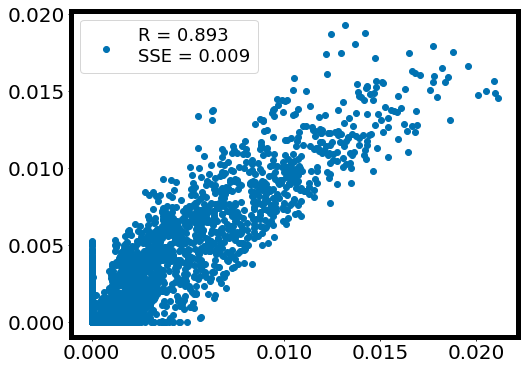

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 23, cycle 5
Epoch: 0, Loss: 503.96062, Residuals: 0.08461, Convergence:   inf
Epoch: 10, Loss: 430.89679, Residuals: 0.07434, Convergence: 0.015944
Epoch: 20, Loss: 367.55429, Residuals: 0.06482, Convergence: 0.016083
Epoch: 30, Loss: 313.87164, Residuals: 0.05599, Convergence: 0.015585
Epoch: 40, Loss: 268.88559, Residuals: 0.04894, Convergence: 0.015419
Epoch: 50, Loss: 231.27184, Residuals: 0.04280, Convergence: 0.014899
Epoch: 60, Loss: 200.05568, Residuals: 0.03807, Convergence: 0.014252
Epoch: 70, Loss: 173.77695, Residuals: 0.03357, Convergence: 0.014078
Epoch: 80, Loss: 151.69682, Residuals: 0.02962, Convergence: 0.013691
Epoch: 90, Loss: 133.18227, Residuals: 0.02600, Convergence: 0.013292
Epoch: 100, Loss: 117.35845, Residuals: 0.02269, Convergence: 0.012483
Epoch: 110, Loss: 103.77192, Residuals: 0.01968, Convergence: 

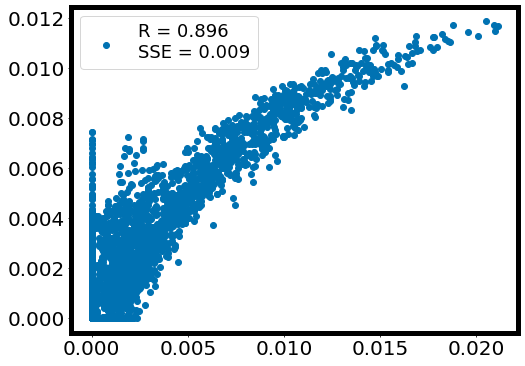

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 635.69823, Residuals: 0.11165, Convergence:   inf
Epoch: 10, Loss: 542.25861, Residuals: 0.09925, Convergence: 0.016123
Epoch: 20, Loss: 461.91107, Residuals: 0.08773, Convergence: 0.016200
Epoch: 30, Loss: 394.11340, Residuals: 0.07720, Convergence: 0.015799
Epoch: 40, Loss: 337.61182, Residuals: 0.06808, Convergence: 0.015454
Epoch: 50, Loss: 290.37915, Residuals: 0.06002, Convergence: 0.015096
Epoch: 60, Loss: 250.65398, Residuals: 0.05330, Convergence: 0.014771
Epoch: 70, Loss: 217.78239, Residuals: 0.04785, Convergence: 0.013860
Epoch: 80, Loss: 190.08472, Residuals: 0.04277, Convergence: 0.013479
Epoch: 90, Loss: 166.54149, Residuals: 0.03795, Convergence: 0.013209
Epoch: 100, Loss: 146.54871, Residuals: 0.03360, Convergence: 0.012704
Epoch: 110, Loss: 129.76569, Residuals: 0.03006, Convergence: 0.012151
Epoch: 120, Loss:

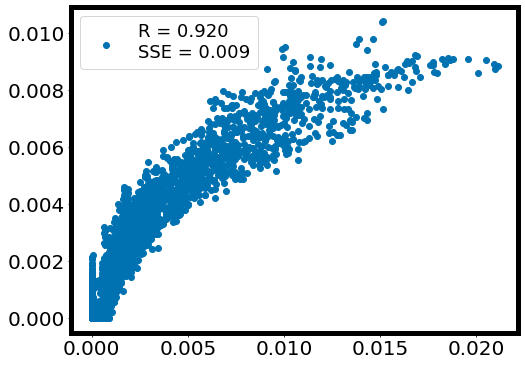

Running trial 24, cycle 1
Epoch: 0, Loss: 132.47054, Residuals: -0.51178, Convergence:   inf
Epoch: 10, Loss: 112.05141, Residuals: -0.47880, Convergence: 0.016937
Epoch: 20, Loss: 94.71442, Residuals: -0.44857, Convergence: 0.016944
Epoch: 30, Loss: 80.08839, Residuals: -0.42115, Convergence: 0.016888
Epoch: 40, Loss: 67.77098, Residuals: -0.39654, Convergence: 0.016795
Epoch: 50, Loss: 57.41084, Residuals: -0.37446, Convergence: 0.016673
Epoch: 60, Loss: 48.70057, Residuals: -0.35442, Convergence: 0.016518
Epoch: 70, Loss: 41.39127, Residuals: -0.33591, Convergence: 0.016289
Epoch: 80, Loss: 35.26570, Residuals: -0.31870, Convergence: 0.016017
Epoch: 90, Loss: 30.13868, Residuals: -0.30262, Convergence: 0.015673
Epoch: 100, Loss: 25.87672, Residuals: -0.28714, Convergence: 0.014919
Epoch: 110, Loss: 22.33205, Residuals: -0.27241, Convergence: 0.014829
Epoch: 120, Loss: 19.41208, Residuals: -0.25815, Convergence: 0.012863
Epoch: 130, Loss: 16.99492, Residuals: -0.24475, Convergence: 0

Epoch: 930, Loss: 30.08319, Residuals: -0.00606, Convergence: 0.002537
Epoch: 940, Loss: 29.50751, Residuals: -0.00628, Convergence: 0.001629
Epoch: 950, Loss: 28.98273, Residuals: -0.00646, Convergence: 0.001922

Epoch: 951, Evidence: 208.79083, Convergence: 0.036883

Epoch: 954, Evidence: 213.84010, Convergence: 0.023612
Epoch: 960, Loss: 31.98061, Residuals: -0.00684, Convergence: 0.002005
Epoch: 970, Loss: 31.33538, Residuals: -0.00711, Convergence: 0.002037
Epoch: 980, Loss: 30.76436, Residuals: -0.00730, Convergence: 0.001871

Epoch: 985, Evidence: 213.76045, Convergence: -0.000373
Epoch: 990, Loss: 31.36530, Residuals: -0.00857, Convergence: 0.003776
Epoch: 1000, Loss: 30.39622, Residuals: -0.01026, Convergence: 0.000741

Epoch: 1000, Evidence: 213.30836, Convergence: -0.002493
Epoch: 1000, Loss: 35.24797, Residuals: -0.00662, Convergence:   inf
Epoch: 1010, Loss: 34.33039, Residuals: -0.00704, Convergence: 0.002488
Epoch: 1020, Loss: 33.58680, Residuals: -0.00736, Convergence: 

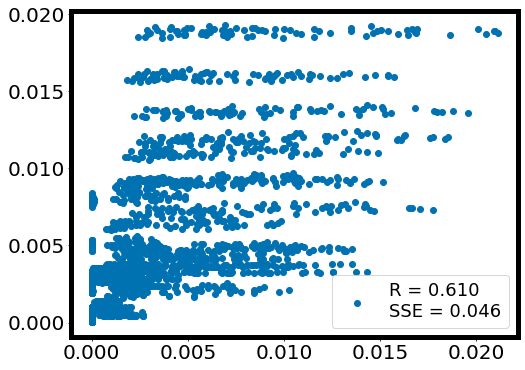

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 24, cycle 2
Epoch: 0, Loss: 188.37241, Residuals: -0.09382, Convergence:   inf
Epoch: 10, Loss: 160.70653, Residuals: -0.09276, Convergence: 0.016165
Epoch: 20, Loss: 136.62988, Residuals: -0.09131, Convergence: 0.016517
Epoch: 30, Loss: 115.81119, Residuals: -0.08945, Convergence: 0.016773
Epoch: 40, Loss: 97.99768, Residuals: -0.08741, Convergence: 0.016876
Epoch: 50, Loss: 82.96185, Residuals: -0.08504, Convergence: 0.016553
Epoch: 60, Loss: 70.44737, Residuals: -0.08157, Convergence: 0.016482
Epoch: 70, Loss: 59.97783, Residuals: -0.07783, Convergence: 0.016118
Epoch: 80, Loss: 51.24818, Residuals: -0.07416, Convergence: 0.015843
Epoch: 90, Loss: 43.95247, Residuals: -0.07039, Convergence: 0.014485
Epoch: 100, Loss: 37.79620, Residuals: -0.06661, Convergence: 0.015019
Epoch: 110, Loss: 32.54072, Residuals: -0.06333, Convergen

Epoch: 950, Loss: 91.47708, Residuals: 0.00187, Convergence: 0.000817

Epoch: 950, Evidence: 533.02368, Convergence: 0.025198
Epoch: 950, Loss: 96.59320, Residuals: 0.00187, Convergence:   inf
Epoch: 960, Loss: 95.05049, Residuals: 0.00177, Convergence: 0.001557
Epoch: 970, Loss: 93.75441, Residuals: 0.00177, Convergence: 0.001488

Epoch: 978, Evidence: 536.07361, Convergence: 0.005689
Epoch: 980, Loss: 97.04636, Residuals: 0.00178, Convergence: 0.001520

Epoch: 988, Evidence: 539.49011, Convergence: 0.006333
Epoch: 990, Loss: 99.87191, Residuals: 0.00166, Convergence: 0.001800
Epoch: 1000, Loss: 98.29839, Residuals: 0.00156, Convergence: 0.001831
Epoch: 1010, Loss: 96.95066, Residuals: 0.00150, Convergence: 0.001263

Epoch: 1017, Evidence: 538.29242, Convergence: -0.002225

Epoch: 1019, Evidence: 546.05579, Convergence: 0.012024
Epoch: 1020, Loss: 105.43117, Residuals: 0.00168, Convergence: 0.001123

Epoch: 1022, Evidence: 548.27045, Convergence: 0.004039

Epoch: 1024, Evidence: 549.8

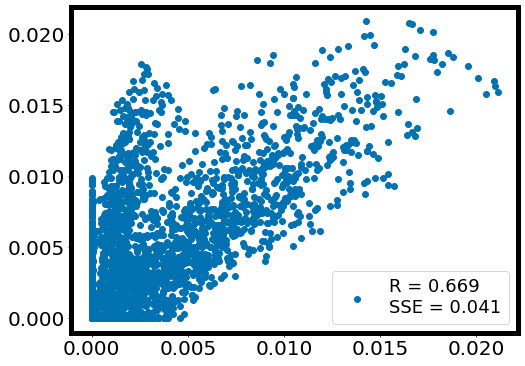

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 24, cycle 3
Epoch: 0, Loss: 312.68095, Residuals: -0.00676, Convergence:   inf
Epoch: 10, Loss: 266.44693, Residuals: -0.01112, Convergence: 0.016108
Epoch: 20, Loss: 227.12592, Residuals: -0.01516, Convergence: 0.016081
Epoch: 30, Loss: 193.70351, Residuals: -0.01858, Convergence: 0.016004
Epoch: 40, Loss: 165.40089, Residuals: -0.02154, Convergence: 0.015836
Epoch: 50, Loss: 141.52650, Residuals: -0.02394, Convergence: 0.015434
Epoch: 60, Loss: 121.38406, Residuals: -0.02460, Convergence: 0.015531
Epoch: 70, Loss: 103.91717, Residuals: -0.02471, Convergence: 0.015902
Epoch: 80, Loss: 88.96375, Residuals: -0.02445, Convergence: 0.015268
Epoch: 90, Loss: 76.34133, Residuals: -0.02406, Convergence: 0.015182
Epoch: 100, Loss: 65.80357, Residuals: -0.02328, Convergence: 0.014759
Epoch: 110, Loss: 56.93299, Residuals: -0.02216, Conve


Epoch: 904, Evidence: 877.88953, Convergence: -0.000534
Epoch: 910, Loss: 174.71991, Residuals: -0.01370, Convergence: 0.003429
Epoch: 920, Loss: 171.25929, Residuals: -0.01445, Convergence: 0.001175

Epoch: 924, Evidence: 870.03168, Convergence: -0.009570
Epoch: 930, Loss: 182.94684, Residuals: -0.01157, Convergence: 0.002477
Epoch: 940, Loss: 179.70769, Residuals: -0.01179, Convergence: 0.002049
Epoch: 950, Loss: 177.22826, Residuals: -0.01166, Convergence: 0.001369

Epoch: 954, Evidence: 878.62024, Convergence: 0.000299
Epoch: 960, Loss: 174.06369, Residuals: -0.01356, Convergence: 0.003775

Epoch: 962, Evidence: 876.41217, Convergence: -0.002220
Epoch: 970, Loss: 184.68680, Residuals: -0.01162, Convergence: 0.001164

Epoch: 977, Evidence: 882.79968, Convergence: 0.005031
Epoch: 980, Loss: 182.79617, Residuals: -0.01206, Convergence: 0.001971

Epoch: 989, Evidence: 880.97174, Convergence: -0.002075


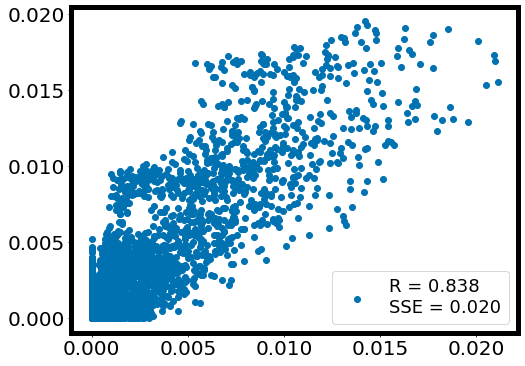

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 24, cycle 4
Epoch: 0, Loss: 400.32393, Residuals: -0.03656, Convergence:   inf
Epoch: 10, Loss: 341.95142, Residuals: -0.03621, Convergence: 0.015861
Epoch: 20, Loss: 292.10385, Residuals: -0.03590, Convergence: 0.015885
Epoch: 30, Loss: 249.57237, Residuals: -0.03588, Convergence: 0.015817
Epoch: 40, Loss: 213.49210, Residuals: -0.03577, Convergence: 0.015709
Epoch: 50, Loss: 183.29245, Residuals: -0.03456, Convergence: 0.015287
Epoch: 60, Loss: 157.46631, Residuals: -0.03275, Convergence: 0.015298
Epoch: 70, Loss: 135.44817, Residuals: -0.03086, Convergence: 0.015247
Epoch: 80, Loss: 116.80478, Residuals: -0.02885, Convergence: 0.014806
Epoch: 90, Loss: 100.84649, Residuals: -0.02714, Convergence: 0.014572
Epoch: 100, Loss: 87.09888, Residuals: -0.02583, Convergence: 0.014458
Epoch: 110, Loss: 75.38689, Residuals: -0.02451, Con


Epoch: 937, Evidence: 1231.75879, Convergence: 0.000336
Epoch: 940, Loss: 253.09879, Residuals: -0.00880, Convergence: 0.002045
Epoch: 950, Loss: 248.78830, Residuals: -0.00919, Convergence: 0.001650
Epoch: 960, Loss: 245.41104, Residuals: -0.00922, Convergence: 0.001268

Epoch: 962, Evidence: 1225.28149, Convergence: -0.004949

Epoch: 968, Evidence: 1232.48816, Convergence: 0.000927
Epoch: 970, Loss: 254.91028, Residuals: -0.00875, Convergence: 0.001771
Epoch: 980, Loss: 250.37624, Residuals: -0.00921, Convergence: 0.001643
Epoch: 990, Loss: 246.75244, Residuals: -0.00928, Convergence: 0.001515

Epoch: 997, Evidence: 1224.62427, Convergence: -0.005488


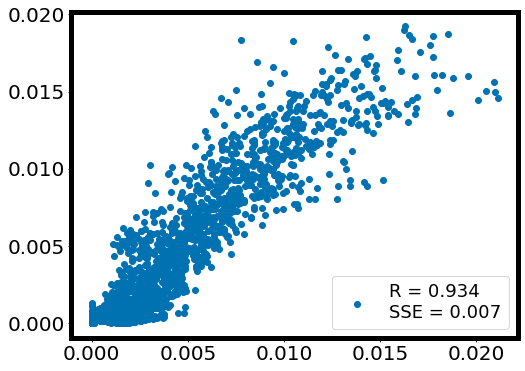

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 24, cycle 5
Epoch: 0, Loss: 497.66698, Residuals: 0.03328, Convergence:   inf
Epoch: 10, Loss: 425.20175, Residuals: 0.02742, Convergence: 0.015876
Epoch: 20, Loss: 363.08511, Residuals: 0.02196, Convergence: 0.015913
Epoch: 30, Loss: 310.46271, Residuals: 0.01666, Convergence: 0.015643
Epoch: 40, Loss: 266.51297, Residuals: 0.01230, Convergence: 0.015225
Epoch: 50, Loss: 229.91779, Residuals: 0.00920, Convergence: 0.014712
Epoch: 60, Loss: 199.10167, Residuals: 0.00707, Convergence: 0.014207
Epoch: 70, Loss: 173.10910, Residuals: 0.00525, Convergence: 0.013803
Epoch: 80, Loss: 151.04732, Residuals: 0.00373, Convergence: 0.013096
Epoch: 90, Loss: 132.30290, Residuals: 0.00254, Convergence: 0.013400
Epoch: 100, Loss: 116.31200, Residuals: 0.00186, Convergence: 0.012840
Epoch: 110, Loss: 102.75636, Residuals: 0.00146, Convergence: 

Epoch: 920, Loss: 321.87723, Residuals: -0.00556, Convergence: 0.002147

Epoch: 927, Evidence: 1556.04907, Convergence: 0.002685
Epoch: 930, Loss: 320.68311, Residuals: -0.00618, Convergence: 0.001745

Epoch: 939, Evidence: 1554.72949, Convergence: -0.000849
Epoch: 940, Loss: 317.51389, Residuals: -0.00689, Convergence: 0.002724

Epoch: 946, Evidence: 1550.91638, Convergence: -0.003309


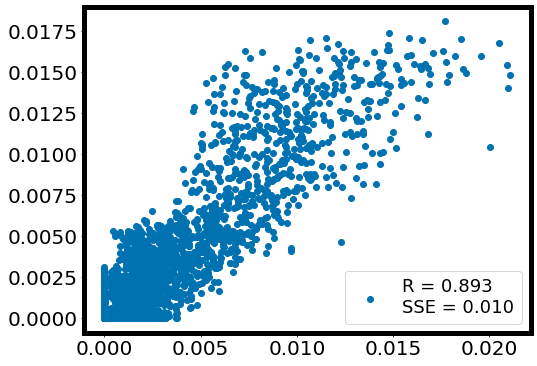

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 641.42619, Residuals: 0.17063, Convergence:   inf
Epoch: 10, Loss: 546.70703, Residuals: 0.15229, Convergence: 0.016134
Epoch: 20, Loss: 465.91162, Residuals: 0.13568, Convergence: 0.016053
Epoch: 30, Loss: 398.36066, Residuals: 0.12041, Convergence: 0.015559
Epoch: 40, Loss: 342.41443, Residuals: 0.10715, Convergence: 0.015050
Epoch: 50, Loss: 296.05676, Residuals: 0.09553, Convergence: 0.014403
Epoch: 60, Loss: 257.59521, Residuals: 0.08538, Convergence: 0.013888
Epoch: 70, Loss: 224.59711, Residuals: 0.07603, Convergence: 0.013791
Epoch: 80, Loss: 195.97832, Residuals: 0.06751, Convergence: 0.013711
Epoch: 90, Loss: 171.66554, Residuals: 0.06049, Convergence: 0.013144
Epoch: 100, Loss: 151.03432, Residuals: 0.05433, Convergence: 0.012633
Epoch: 110, Loss: 133.24234, Residuals: 0.04914, Convergence: 0.012714
Epoch: 120, Loss:

Epoch: 910, Loss: 378.45468, Residuals: -0.00787, Convergence: 0.001007

Epoch: 912, Evidence: 1875.91882, Convergence: -0.011614


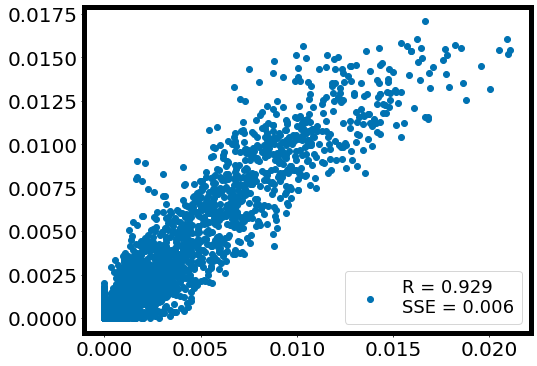

Running trial 25, cycle 1
Epoch: 0, Loss: 118.78776, Residuals: -0.76495, Convergence:   inf
Epoch: 10, Loss: 100.71182, Residuals: -0.70666, Convergence: 0.016833
Epoch: 20, Loss: 85.14014, Residuals: -0.65449, Convergence: 0.016983
Epoch: 30, Loss: 71.92089, Residuals: -0.60686, Convergence: 0.017040
Epoch: 40, Loss: 60.74170, Residuals: -0.56295, Convergence: 0.017019
Epoch: 50, Loss: 51.34113, Residuals: -0.52248, Convergence: 0.016890
Epoch: 60, Loss: 43.46904, Residuals: -0.48527, Convergence: 0.016752
Epoch: 70, Loss: 36.86768, Residuals: -0.45115, Convergence: 0.016552
Epoch: 80, Loss: 31.36370, Residuals: -0.41984, Convergence: 0.016190
Epoch: 90, Loss: 26.79709, Residuals: -0.39125, Convergence: 0.015742
Epoch: 100, Loss: 22.99691, Residuals: -0.36519, Convergence: 0.015253
Epoch: 110, Loss: 19.85452, Residuals: -0.34133, Convergence: 0.014727
Epoch: 120, Loss: 17.22600, Residuals: -0.31948, Convergence: 0.014123
Epoch: 130, Loss: 15.04055, Residuals: -0.29961, Convergence: 0


Epoch: 907, Evidence: 227.85931, Convergence: 0.006983
Epoch: 910, Loss: 40.46517, Residuals: -0.00206, Convergence: 0.003522
Epoch: 920, Loss: 39.52332, Residuals: -0.00266, Convergence: 0.002869

Epoch: 923, Evidence: 227.24048, Convergence: -0.002723
Epoch: 930, Loss: 41.78651, Residuals: -0.00186, Convergence: 0.001576

Epoch: 933, Evidence: 233.54846, Convergence: 0.024360
Epoch: 940, Loss: 42.66401, Residuals: -0.00207, Convergence: 0.001218

Epoch: 942, Evidence: 234.48732, Convergence: 0.004004
Epoch: 950, Loss: 43.39940, Residuals: -0.00228, Convergence: 0.002430

Epoch: 958, Evidence: 236.65720, Convergence: 0.009169
Epoch: 960, Loss: 44.11248, Residuals: -0.00244, Convergence: 0.001676
Epoch: 970, Loss: 43.39863, Residuals: -0.00261, Convergence: 0.001531
Epoch: 980, Loss: 42.76555, Residuals: -0.00274, Convergence: 0.001261

Epoch: 987, Evidence: 234.92931, Convergence: -0.007355
Epoch: 990, Loss: 45.22090, Residuals: -0.00241, Convergence: 0.000910

Epoch: 990, Evidence: 

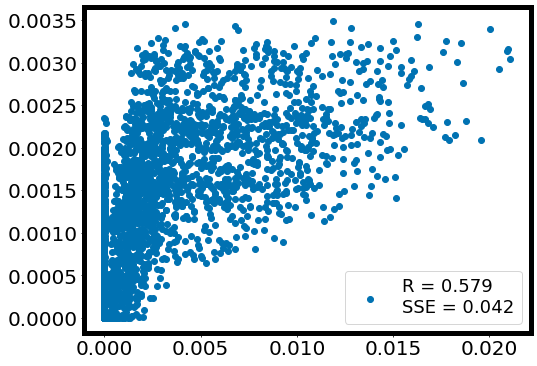

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 25, cycle 2
Epoch: 0, Loss: 166.36755, Residuals: -0.09579, Convergence:   inf
Epoch: 10, Loss: 141.56429, Residuals: -0.09278, Convergence: 0.016379
Epoch: 20, Loss: 120.25435, Residuals: -0.09004, Convergence: 0.016510
Epoch: 30, Loss: 102.01051, Residuals: -0.08738, Convergence: 0.016646
Epoch: 40, Loss: 86.43714, Residuals: -0.08474, Convergence: 0.016742
Epoch: 50, Loss: 73.21194, Residuals: -0.08206, Convergence: 0.016727
Epoch: 60, Loss: 62.09230, Residuals: -0.07917, Convergence: 0.016499
Epoch: 70, Loss: 52.82825, Residuals: -0.07597, Convergence: 0.016203
Epoch: 80, Loss: 45.15495, Residuals: -0.07271, Convergence: 0.015635
Epoch: 90, Loss: 38.78008, Residuals: -0.06962, Convergence: 0.015166
Epoch: 100, Loss: 33.48653, Residuals: -0.06663, Convergence: 0.014485
Epoch: 110, Loss: 29.10778, Residuals: -0.06370, Convergen

Epoch: 940, Loss: 98.67473, Residuals: -0.00312, Convergence: 0.001375
Epoch: 950, Loss: 97.25523, Residuals: -0.00316, Convergence: 0.001395

Epoch: 954, Evidence: 544.85272, Convergence: 0.004086
Epoch: 960, Loss: 100.38715, Residuals: -0.00334, Convergence: 0.001941
Epoch: 970, Loss: 98.75777, Residuals: -0.00357, Convergence: 0.001421
Epoch: 980, Loss: 97.30956, Residuals: -0.00371, Convergence: 0.001566
Epoch: 990, Loss: 96.00309, Residuals: -0.00376, Convergence: 0.001549

Epoch: 996, Evidence: 541.76514, Convergence: -0.005699
Epoch: 1000, Loss: 104.26009, Residuals: -0.00320, Convergence: 0.000943

Epoch: 1000, Evidence: 551.28217, Convergence: 0.011663
Epoch: 1000, Loss: 108.19328, Residuals: -0.00320, Convergence:   inf

Epoch: 1008, Evidence: 555.01068, Convergence: 0.006718
Epoch: 1010, Loss: 110.41470, Residuals: -0.00321, Convergence: 0.001083

Epoch: 1015, Evidence: 557.72498, Convergence: 0.004867
Epoch: 1020, Loss: 112.03314, Residuals: -0.00321, Convergence: 0.000990


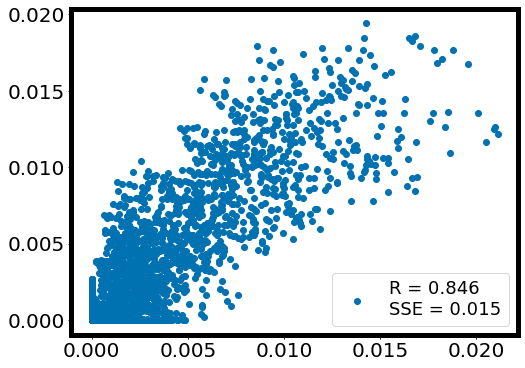

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 25, cycle 3
Epoch: 0, Loss: 279.92037, Residuals: -0.07434, Convergence:   inf
Epoch: 10, Loss: 238.11746, Residuals: -0.07141, Convergence: 0.016276
Epoch: 20, Loss: 202.69383, Residuals: -0.06884, Convergence: 0.016225
Epoch: 30, Loss: 172.59554, Residuals: -0.06631, Convergence: 0.016172
Epoch: 40, Loss: 147.17554, Residuals: -0.06362, Convergence: 0.015974
Epoch: 50, Loss: 125.90213, Residuals: -0.06087, Convergence: 0.015614
Epoch: 60, Loss: 108.11086, Residuals: -0.05801, Convergence: 0.015251
Epoch: 70, Loss: 93.14015, Residuals: -0.05500, Convergence: 0.014813
Epoch: 80, Loss: 80.64021, Residuals: -0.05160, Convergence: 0.014382
Epoch: 90, Loss: 69.94966, Residuals: -0.04852, Convergence: 0.014547
Epoch: 100, Loss: 60.52547, Residuals: -0.04571, Convergence: 0.014703
Epoch: 110, Loss: 52.43637, Residuals: -0.04281, Conver

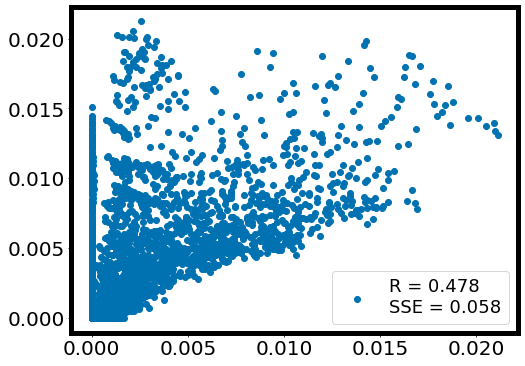

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 25, cycle 4
Epoch: 0, Loss: 421.57350, Residuals: -0.03955, Convergence:   inf
Epoch: 10, Loss: 358.09344, Residuals: -0.03886, Convergence: 0.016411
Epoch: 20, Loss: 304.50784, Residuals: -0.03802, Convergence: 0.016294
Epoch: 30, Loss: 259.31854, Residuals: -0.03680, Convergence: 0.016062
Epoch: 40, Loss: 221.53067, Residuals: -0.03551, Convergence: 0.015690
Epoch: 50, Loss: 190.27615, Residuals: -0.03395, Convergence: 0.015039
Epoch: 60, Loss: 164.50929, Residuals: -0.03210, Convergence: 0.014440
Epoch: 70, Loss: 142.99782, Residuals: -0.02958, Convergence: 0.013774
Epoch: 80, Loss: 124.70890, Residuals: -0.02759, Convergence: 0.013643
Epoch: 90, Loss: 109.26029, Residuals: -0.02538, Convergence: 0.012908
Epoch: 100, Loss: 96.12026, Residuals: -0.02319, Convergence: 0.012868
Epoch: 110, Loss: 84.70925, Residuals: -0.02147, Con

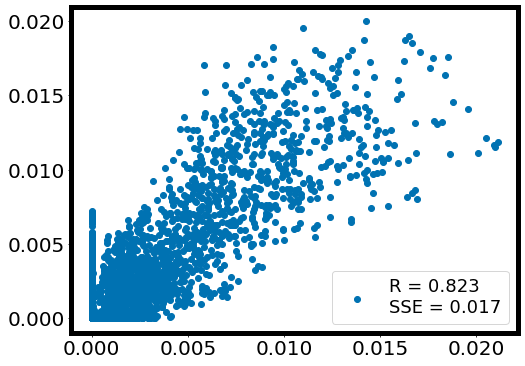

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 25, cycle 5
Epoch: 0, Loss: 585.00005, Residuals: 0.06082, Convergence:   inf
Epoch: 10, Loss: 496.35379, Residuals: 0.05238, Convergence: 0.016563
Epoch: 20, Loss: 421.23801, Residuals: 0.04498, Convergence: 0.016515
Epoch: 30, Loss: 357.92496, Residuals: 0.03829, Convergence: 0.016329
Epoch: 40, Loss: 305.12491, Residuals: 0.03206, Convergence: 0.015872
Epoch: 50, Loss: 261.39072, Residuals: 0.02732, Convergence: 0.015351
Epoch: 60, Loss: 224.86787, Residuals: 0.02426, Convergence: 0.015113
Epoch: 70, Loss: 193.90965, Residuals: 0.02129, Convergence: 0.014596
Epoch: 80, Loss: 167.39421, Residuals: 0.01898, Convergence: 0.014736
Epoch: 90, Loss: 145.01837, Residuals: 0.01757, Convergence: 0.014397
Epoch: 100, Loss: 125.74288, Residuals: 0.01613, Convergence: 0.014408
Epoch: 110, Loss: 109.20992, Residuals: 0.01417, Convergence: 


Epoch: 735, Evidence: 1575.84521, Convergence: 0.000939
Epoch: 740, Loss: 314.62646, Residuals: -0.01361, Convergence: 0.002545

Epoch: 748, Evidence: 1576.24548, Convergence: 0.001193
Epoch: 750, Loss: 314.45139, Residuals: -0.01388, Convergence: 0.003366
Epoch: 760, Loss: 308.39764, Residuals: -0.01359, Convergence: -0.002464
Epoch: 760, Loss: 307.80042, Residuals: -0.01386, Convergence: -0.000528

Epoch: 760, Evidence: 1576.20056, Convergence: -0.000029
Epoch: 760, Loss: 309.52661, Residuals: -0.01386, Convergence:   inf
Epoch: 770, Loss: 302.38824, Residuals: -0.01455, Convergence: 0.002217

Epoch: 771, Evidence: 1577.89954, Convergence: 0.001048
Epoch: 780, Loss: 304.86765, Residuals: -0.01481, Convergence: 0.001499

Epoch: 782, Evidence: 1577.51184, Convergence: -0.000246
Epoch: 790, Loss: 300.69598, Residuals: -0.01466, Convergence: 0.002360

Epoch: 791, Evidence: 1576.87708, Convergence: -0.000648

Epoch: 793, Evidence: 1578.36462, Convergence: 0.000295


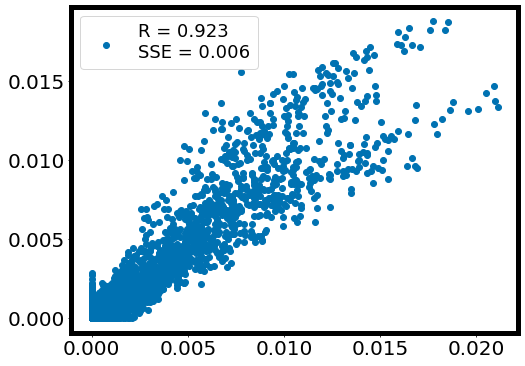

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 739.25279, Residuals: 0.21019, Convergence:   inf
Epoch: 10, Loss: 625.81061, Residuals: 0.18873, Convergence: 0.016854
Epoch: 20, Loss: 529.84387, Residuals: 0.16943, Convergence: 0.016748
Epoch: 30, Loss: 449.09381, Residuals: 0.15150, Convergence: 0.016614
Epoch: 40, Loss: 382.50912, Residuals: 0.13520, Convergence: 0.015771
Epoch: 50, Loss: 327.37558, Residuals: 0.12146, Convergence: 0.015666
Epoch: 60, Loss: 280.76535, Residuals: 0.10948, Convergence: 0.015166
Epoch: 70, Loss: 242.11871, Residuals: 0.09880, Convergence: 0.014552
Epoch: 80, Loss: 209.65364, Residuals: 0.08940, Convergence: 0.014718
Epoch: 90, Loss: 181.46202, Residuals: 0.08079, Convergence: 0.014345
Epoch: 100, Loss: 157.43146, Residuals: 0.07293, Convergence: 0.014254
Epoch: 110, Loss: 137.24699, Residuals: 0.06547, Convergence: 0.013595
Epoch: 120, Loss:

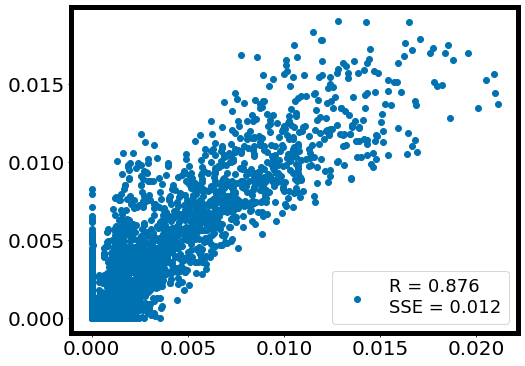

Running trial 26, cycle 1
Epoch: 0, Loss: 196.17615, Residuals: -0.21261, Convergence:   inf
Epoch: 10, Loss: 163.93300, Residuals: -0.21056, Convergence: 0.018136
Epoch: 20, Loss: 136.90886, Residuals: -0.20847, Convergence: 0.018214
Epoch: 30, Loss: 114.24220, Residuals: -0.20571, Convergence: 0.018305
Epoch: 40, Loss: 95.24844, Residuals: -0.20237, Convergence: 0.018381
Epoch: 50, Loss: 79.40854, Residuals: -0.19839, Convergence: 0.017970
Epoch: 60, Loss: 66.28945, Residuals: -0.19367, Convergence: 0.018186
Epoch: 70, Loss: 55.40223, Residuals: -0.18870, Convergence: 0.018012
Epoch: 80, Loss: 46.40841, Residuals: -0.18374, Convergence: 0.017745
Epoch: 90, Loss: 38.99189, Residuals: -0.17883, Convergence: 0.017412
Epoch: 100, Loss: 32.92522, Residuals: -0.17388, Convergence: 0.016702
Epoch: 110, Loss: 27.93339, Residuals: -0.16904, Convergence: 0.016271
Epoch: 120, Loss: 23.80736, Residuals: -0.16418, Convergence: 0.015985
Epoch: 130, Loss: 20.42374, Residuals: -0.15945, Convergence:

Epoch: 890, Loss: 46.78186, Residuals: 0.01136, Convergence: 0.001118

Epoch: 893, Evidence: 219.97237, Convergence: 0.010923
Epoch: 900, Loss: 47.67982, Residuals: 0.01112, Convergence: 0.001680
Epoch: 910, Loss: 47.05936, Residuals: 0.01100, Convergence: 0.000746

Epoch: 910, Evidence: 222.11044, Convergence: 0.009626
Epoch: 910, Loss: 48.63628, Residuals: 0.01100, Convergence:   inf

Epoch: 919, Evidence: 222.48666, Convergence: 0.001691
Epoch: 920, Loss: 49.42602, Residuals: 0.01072, Convergence: 0.001910
Epoch: 930, Loss: 48.66513, Residuals: 0.01046, Convergence: 0.001776
Epoch: 940, Loss: 47.99348, Residuals: 0.01019, Convergence: 0.001085
Epoch: 950, Loss: 47.39318, Residuals: 0.01007, Convergence: 0.000869

Epoch: 950, Evidence: 226.62781, Convergence: 0.018273
Epoch: 950, Loss: 48.76694, Residuals: 0.01007, Convergence:   inf
Epoch: 960, Loss: 48.05475, Residuals: 0.00985, Convergence: 0.000950

Epoch: 960, Evidence: 226.85797, Convergence: 0.001015
Epoch: 960, Loss: 49.57483

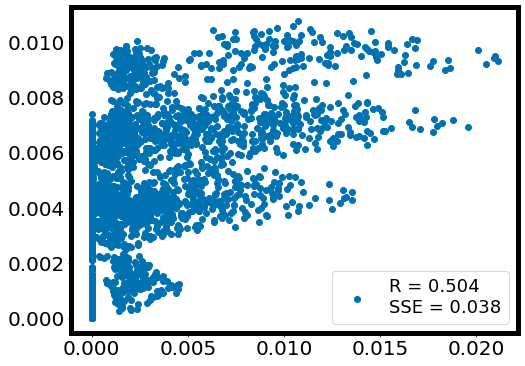

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 26, cycle 2
Epoch: 0, Loss: 184.75885, Residuals: -0.13757, Convergence:   inf
Epoch: 10, Loss: 157.71797, Residuals: -0.13138, Convergence: 0.016200
Epoch: 20, Loss: 133.92929, Residuals: -0.12519, Convergence: 0.016721
Epoch: 30, Loss: 113.24455, Residuals: -0.11930, Convergence: 0.017029
Epoch: 40, Loss: 95.62487, Residuals: -0.11372, Convergence: 0.017052
Epoch: 50, Loss: 80.86111, Residuals: -0.10831, Convergence: 0.016883
Epoch: 60, Loss: 68.52695, Residuals: -0.10298, Convergence: 0.016682
Epoch: 70, Loss: 58.25271, Residuals: -0.09768, Convergence: 0.016082
Epoch: 80, Loss: 49.68716, Residuals: -0.09238, Convergence: 0.015852
Epoch: 90, Loss: 42.60004, Residuals: -0.08723, Convergence: 0.014645
Epoch: 100, Loss: 36.70533, Residuals: -0.08241, Convergence: 0.014697
Epoch: 110, Loss: 31.79062, Residuals: -0.07802, Convergen

Epoch: 950, Loss: 95.02638, Residuals: -0.01295, Convergence: 0.001260

Epoch: 956, Evidence: 527.68176, Convergence: -0.005266

Epoch: 957, Evidence: 535.26746, Convergence: 0.008980

Epoch: 958, Evidence: 537.86255, Convergence: 0.004825

Epoch: 959, Evidence: 539.12335, Convergence: 0.002339
Epoch: 960, Loss: 106.23700, Residuals: -0.01291, Convergence: 0.001033

Epoch: 961, Evidence: 541.15167, Convergence: 0.003748

Epoch: 962, Evidence: 541.65442, Convergence: 0.000928
Epoch: 970, Loss: 107.05457, Residuals: -0.01293, Convergence: 0.001293

Epoch: 977, Evidence: 539.91724, Convergence: -0.002286


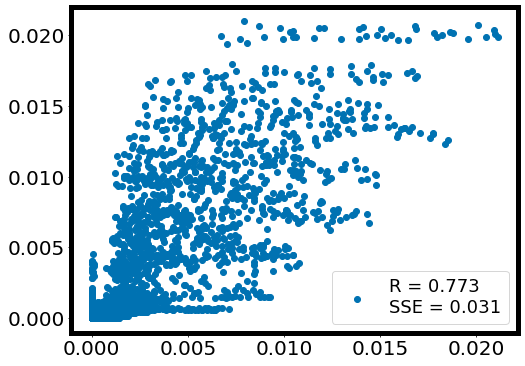

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 26, cycle 3
Epoch: 0, Loss: 280.03951, Residuals: -0.04718, Convergence:   inf
Epoch: 10, Loss: 240.11038, Residuals: -0.04711, Convergence: 0.015646
Epoch: 20, Loss: 205.22493, Residuals: -0.04707, Convergence: 0.015918
Epoch: 30, Loss: 175.28020, Residuals: -0.04730, Convergence: 0.015831
Epoch: 40, Loss: 149.97969, Residuals: -0.04717, Convergence: 0.015610
Epoch: 50, Loss: 128.87978, Residuals: -0.04647, Convergence: 0.015107
Epoch: 60, Loss: 111.23187, Residuals: -0.04560, Convergence: 0.014748
Epoch: 70, Loss: 96.41268, Residuals: -0.04429, Convergence: 0.014170
Epoch: 80, Loss: 84.05239, Residuals: -0.04252, Convergence: 0.013657
Epoch: 90, Loss: 73.66766, Residuals: -0.04069, Convergence: 0.013074
Epoch: 100, Loss: 64.99524, Residuals: -0.03868, Convergence: 0.012211
Epoch: 110, Loss: 57.77394, Residuals: -0.03593, Conver

Epoch: 990, Loss: 145.02991, Residuals: -0.01279, Convergence: 0.001812

Epoch: 998, Evidence: 812.07471, Convergence: 0.005631
Epoch: 1000, Loss: 150.68790, Residuals: -0.01323, Convergence: 0.002283
Epoch: 1010, Loss: 147.73578, Residuals: -0.01392, Convergence: 0.002076

Epoch: 1015, Evidence: 815.84186, Convergence: 0.004618
Epoch: 1020, Loss: 152.05475, Residuals: -0.01441, Convergence: 0.002039
Epoch: 1030, Loss: 149.20285, Residuals: -0.01492, Convergence: 0.001730
Epoch: 1040, Loss: 146.89130, Residuals: -0.01494, Convergence: 0.001451

Epoch: 1043, Evidence: 808.33325, Convergence: -0.009289
Epoch: 1050, Loss: 155.96848, Residuals: -0.01388, Convergence: 0.001376
Epoch: 1060, Loss: 154.05774, Residuals: -0.01378, Convergence: 0.001034

Epoch: 1069, Evidence: 825.86328, Convergence: 0.012134
Epoch: 1070, Loss: 157.78433, Residuals: -0.01363, Convergence: 0.001381
Epoch: 1080, Loss: 155.79843, Residuals: -0.01359, Convergence: 0.001267

Epoch: 1087, Evidence: 826.42603, Converge

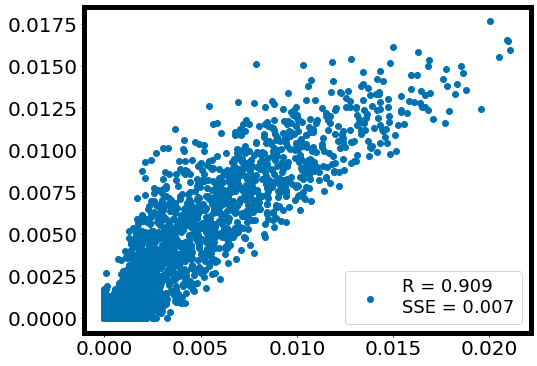

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 26, cycle 4
Epoch: 0, Loss: 393.01833, Residuals: 0.06522, Convergence:   inf
Epoch: 10, Loss: 336.25565, Residuals: 0.05567, Convergence: 0.015902
Epoch: 20, Loss: 287.01993, Residuals: 0.04699, Convergence: 0.015932
Epoch: 30, Loss: 245.39575, Residuals: 0.03943, Convergence: 0.015634
Epoch: 40, Loss: 210.62196, Residuals: 0.03299, Convergence: 0.015223
Epoch: 50, Loss: 181.42104, Residuals: 0.02756, Convergence: 0.014875
Epoch: 60, Loss: 156.94205, Residuals: 0.02331, Convergence: 0.014456
Epoch: 70, Loss: 136.33145, Residuals: 0.01989, Convergence: 0.014203
Epoch: 80, Loss: 118.75191, Residuals: 0.01730, Convergence: 0.013676
Epoch: 90, Loss: 103.38485, Residuals: 0.01495, Convergence: 0.014109
Epoch: 100, Loss: 90.16666, Residuals: 0.01299, Convergence: 0.013755
Epoch: 110, Loss: 78.92931, Residuals: 0.01141, Convergence: 0.


Epoch: 980, Evidence: 1188.43701, Convergence: 0.001246
Epoch: 980, Loss: 239.41220, Residuals: -0.00698, Convergence:   inf

Epoch: 987, Evidence: 1196.61731, Convergence: 0.006836
Epoch: 990, Loss: 242.25017, Residuals: -0.00771, Convergence: 0.001668
Epoch: 1000, Loss: 238.75555, Residuals: -0.00817, Convergence: 0.001425

Epoch: 1008, Evidence: 1193.20776, Convergence: -0.002857

Epoch: 1009, Evidence: 1203.77686, Convergence: 0.005948
Epoch: 1010, Loss: 250.00546, Residuals: -0.00744, Convergence: 0.001103

Epoch: 1015, Evidence: 1206.46021, Convergence: 0.002224

Epoch: 1016, Evidence: 1206.34387, Convergence: -0.000096
Epoch: 1020, Loss: 250.90527, Residuals: -0.00784, Convergence: 0.001623
Epoch: 1030, Loss: 246.92694, Residuals: -0.00842, Convergence: 0.001524
Epoch: 1040, Loss: 243.86151, Residuals: -0.00851, Convergence: 0.001056

Epoch: 1044, Evidence: 1200.28784, Convergence: -0.005142

Epoch: 1045, Evidence: 1207.87402, Convergence: 0.001171
Epoch: 1050, Loss: 253.67770,

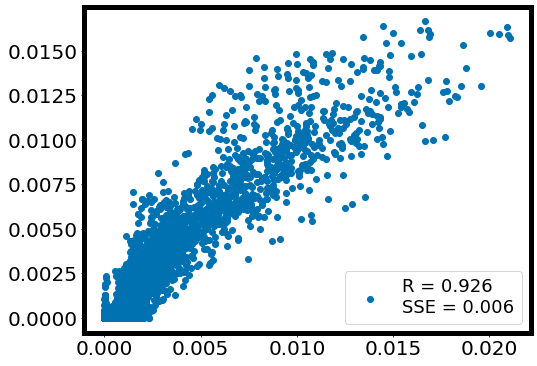

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 26, cycle 5
Epoch: 0, Loss: 479.05449, Residuals: 0.05724, Convergence:   inf
Epoch: 10, Loss: 409.49533, Residuals: 0.04906, Convergence: 0.016023
Epoch: 20, Loss: 349.34738, Residuals: 0.04149, Convergence: 0.015976
Epoch: 30, Loss: 298.73318, Residuals: 0.03480, Convergence: 0.015623
Epoch: 40, Loss: 256.55237, Residuals: 0.02925, Convergence: 0.015173
Epoch: 50, Loss: 221.60704, Residuals: 0.02538, Convergence: 0.014579
Epoch: 60, Loss: 192.09914, Residuals: 0.02189, Convergence: 0.014313
Epoch: 70, Loss: 166.83247, Residuals: 0.01905, Convergence: 0.014141
Epoch: 80, Loss: 145.34045, Residuals: 0.01690, Convergence: 0.013849
Epoch: 90, Loss: 126.93239, Residuals: 0.01533, Convergence: 0.013644
Epoch: 100, Loss: 111.06902, Residuals: 0.01377, Convergence: 0.013405
Epoch: 110, Loss: 97.33066, Residuals: 0.01203, Convergence: 0


Epoch: 949, Evidence: 1548.50049, Convergence: -0.001959
Epoch: 950, Loss: 313.38141, Residuals: -0.01029, Convergence: 0.001613

Epoch: 956, Evidence: 1555.20312, Convergence: 0.002359
Epoch: 960, Loss: 312.79630, Residuals: -0.01044, Convergence: 0.001653

Epoch: 964, Evidence: 1552.50024, Convergence: -0.001741

Epoch: 966, Evidence: 1557.44507, Convergence: 0.001440

Epoch: 967, Evidence: 1557.98694, Convergence: 0.000348
Epoch: 970, Loss: 316.62335, Residuals: -0.01040, Convergence: 0.001625

Epoch: 974, Evidence: 1556.65710, Convergence: -0.000506

Epoch: 977, Evidence: 1552.89551, Convergence: -0.002930


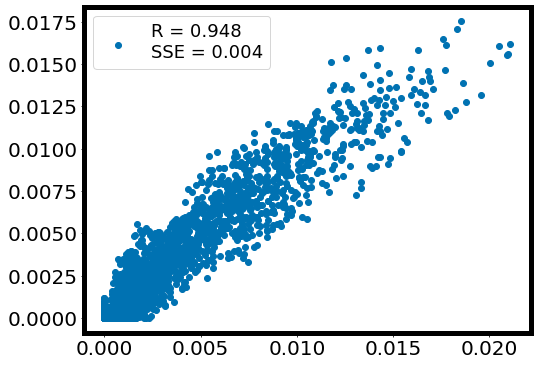

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 598.35069, Residuals: 0.07214, Convergence:   inf
Epoch: 10, Loss: 510.10239, Residuals: 0.06292, Convergence: 0.016280
Epoch: 20, Loss: 434.09567, Residuals: 0.05433, Convergence: 0.016212
Epoch: 30, Loss: 370.47562, Residuals: 0.04662, Convergence: 0.015869
Epoch: 40, Loss: 317.41809, Residuals: 0.03977, Convergence: 0.015308
Epoch: 50, Loss: 273.13400, Residuals: 0.03483, Convergence: 0.015093
Epoch: 60, Loss: 235.68971, Residuals: 0.03043, Convergence: 0.014723
Epoch: 70, Loss: 204.24857, Residuals: 0.02667, Convergence: 0.014287
Epoch: 80, Loss: 177.87517, Residuals: 0.02340, Convergence: 0.013594
Epoch: 90, Loss: 155.65530, Residuals: 0.02093, Convergence: 0.013106
Epoch: 100, Loss: 136.56250, Residuals: 0.01890, Convergence: 0.013296
Epoch: 110, Loss: 119.93596, Residuals: 0.01690, Convergence: 0.013101
Epoch: 120, Loss:

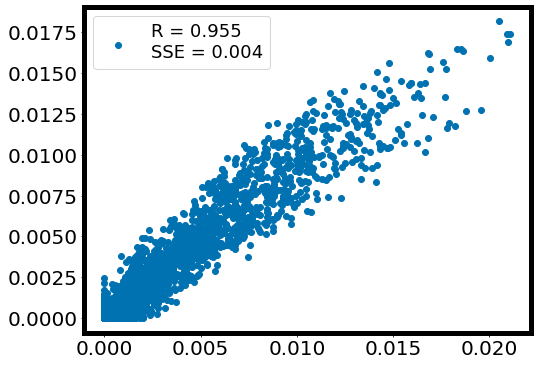

Running trial 27, cycle 1
Epoch: 0, Loss: 140.73433, Residuals: -1.22795, Convergence:   inf
Epoch: 10, Loss: 118.59081, Residuals: -1.13127, Convergence: 0.017329
Epoch: 20, Loss: 99.92898, Residuals: -1.04490, Convergence: 0.017229
Epoch: 30, Loss: 84.21078, Residuals: -0.96651, Convergence: 0.017316
Epoch: 40, Loss: 70.88361, Residuals: -0.89521, Convergence: 0.017406
Epoch: 50, Loss: 59.65940, Residuals: -0.83076, Convergence: 0.017355
Epoch: 60, Loss: 50.26894, Residuals: -0.77257, Convergence: 0.017194
Epoch: 70, Loss: 42.45649, Residuals: -0.71969, Convergence: 0.016807
Epoch: 80, Loss: 35.95581, Residuals: -0.67177, Convergence: 0.016611
Epoch: 90, Loss: 30.58186, Residuals: -0.62814, Convergence: 0.015641
Epoch: 100, Loss: 26.21296, Residuals: -0.58792, Convergence: 0.015076
Epoch: 110, Loss: 22.57888, Residuals: -0.55109, Convergence: 0.014860
Epoch: 120, Loss: 19.57340, Residuals: -0.51696, Convergence: 0.014428
Epoch: 130, Loss: 17.10307, Residuals: -0.48513, Convergence: 0


Epoch: 713, Evidence: 212.91609, Convergence: 0.002781

Epoch: 718, Evidence: 213.61499, Convergence: 0.003272
Epoch: 720, Loss: 58.93900, Residuals: 0.01008, Convergence: 0.001276

Epoch: 721, Evidence: 216.00333, Convergence: 0.011057

Epoch: 722, Evidence: 213.33754, Convergence: -0.012496


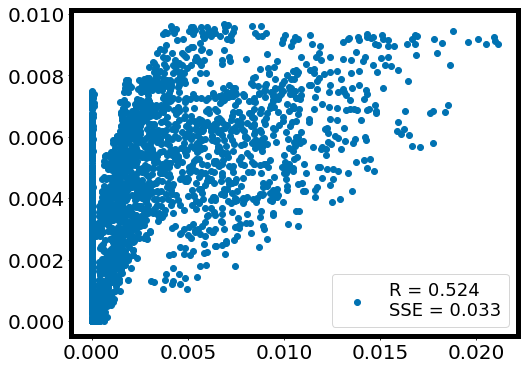

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 27, cycle 2
Epoch: 0, Loss: 167.13179, Residuals: 0.30503, Convergence:   inf
Epoch: 10, Loss: 142.42375, Residuals: 0.27076, Convergence: 0.016231
Epoch: 20, Loss: 121.17357, Residuals: 0.24007, Convergence: 0.016307
Epoch: 30, Loss: 103.10908, Residuals: 0.21284, Convergence: 0.016233
Epoch: 40, Loss: 87.83415, Residuals: 0.18880, Convergence: 0.016101
Epoch: 50, Loss: 74.98234, Residuals: 0.16780, Convergence: 0.015867
Epoch: 60, Loss: 64.17030, Residuals: 0.14914, Convergence: 0.015583
Epoch: 70, Loss: 55.16133, Residuals: 0.13324, Convergence: 0.015360
Epoch: 80, Loss: 47.54408, Residuals: 0.11920, Convergence: 0.015038
Epoch: 90, Loss: 41.16724, Residuals: 0.10656, Convergence: 0.014220
Epoch: 100, Loss: 35.81286, Residuals: 0.09534, Convergence: 0.013553
Epoch: 110, Loss: 31.33482, Residuals: 0.08537, Convergence: 0.013160

Epoch: 980, Loss: 64.33170, Residuals: -0.00455, Convergence: 0.001833
Epoch: 990, Loss: 62.86330, Residuals: -0.00468, Convergence: 0.002306
Epoch: 1000, Loss: 61.71378, Residuals: -0.00468, Convergence: 0.001782
Epoch: 1010, Loss: 60.78214, Residuals: -0.00455, Convergence: 0.001561

Epoch: 1015, Evidence: 483.07480, Convergence: -0.015979
Epoch: 1020, Loss: 70.83319, Residuals: -0.00401, Convergence: 0.001847
Epoch: 1030, Loss: 69.55313, Residuals: -0.00405, Convergence: 0.001790
Epoch: 1040, Loss: 68.43619, Residuals: -0.00407, Convergence: 0.001352
Epoch: 1050, Loss: 67.44357, Residuals: -0.00407, Convergence: 0.001684
Epoch: 1060, Loss: 66.57533, Residuals: -0.00404, Convergence: 0.001130

Epoch: 1066, Evidence: 506.99350, Convergence: 0.031952
Epoch: 1070, Loss: 71.16661, Residuals: -0.00404, Convergence: 0.001991
Epoch: 1080, Loss: 69.93586, Residuals: -0.00409, Convergence: 0.001492
Epoch: 1090, Loss: 68.83133, Residuals: -0.00411, Convergence: 0.001644
Epoch: 1100, Loss: 67.8

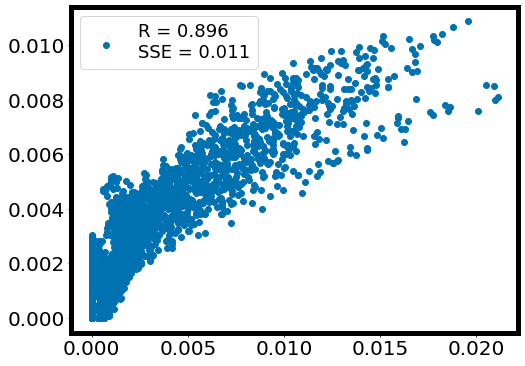

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 27, cycle 3
Epoch: 0, Loss: 278.74623, Residuals: 0.33460, Convergence:   inf
Epoch: 10, Loss: 238.62547, Residuals: 0.29958, Convergence: 0.015824
Epoch: 20, Loss: 203.98413, Residuals: 0.26822, Convergence: 0.015740
Epoch: 30, Loss: 174.80283, Residuals: 0.24023, Convergence: 0.015325
Epoch: 40, Loss: 150.39391, Residuals: 0.21511, Convergence: 0.014898
Epoch: 50, Loss: 130.09218, Residuals: 0.19272, Convergence: 0.014374
Epoch: 60, Loss: 113.24540, Residuals: 0.17271, Convergence: 0.013664
Epoch: 70, Loss: 99.20070, Residuals: 0.15484, Convergence: 0.012942
Epoch: 80, Loss: 87.41677, Residuals: 0.13889, Convergence: 0.012519
Epoch: 90, Loss: 77.13045, Residuals: 0.12461, Convergence: 0.012414
Epoch: 100, Loss: 68.28337, Residuals: 0.11257, Convergence: 0.011853
Epoch: 110, Loss: 60.23785, Residuals: 0.10153, Convergence: 0.012


Epoch: 963, Evidence: 880.51654, Convergence: 0.000440
Epoch: 970, Loss: 173.53070, Residuals: 0.00220, Convergence: 0.002101
Epoch: 980, Loss: 170.06433, Residuals: 0.00193, Convergence: 0.002009
Epoch: 990, Loss: 167.38148, Residuals: 0.00187, Convergence: 0.001204
Epoch: 1000, Loss: 165.18436, Residuals: 0.00189, Convergence: 0.001125

Epoch: 1003, Evidence: 873.89990, Convergence: -0.007128
Epoch: 1010, Loss: 179.55200, Residuals: 0.00260, Convergence: 0.001429
Epoch: 1020, Loss: 177.30588, Residuals: 0.00246, Convergence: 0.001120

Epoch: 1022, Evidence: 885.16516, Convergence: 0.005689
Epoch: 1030, Loss: 178.42688, Residuals: 0.00234, Convergence: 0.001273
Epoch: 1040, Loss: 176.31198, Residuals: 0.00224, Convergence: 0.001216

Epoch: 1046, Evidence: 883.19324, Convergence: -0.002233


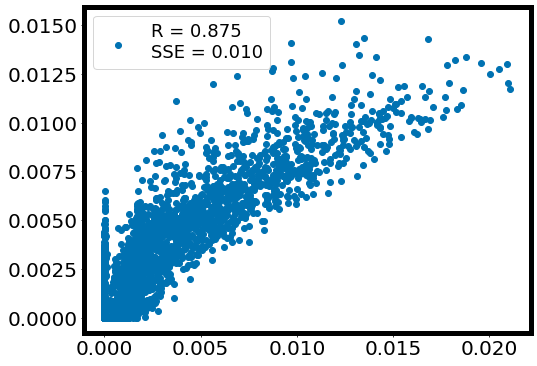

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 27, cycle 4
Epoch: 0, Loss: 414.37502, Residuals: 0.39981, Convergence:   inf
Epoch: 10, Loss: 352.62271, Residuals: 0.35932, Convergence: 0.016392
Epoch: 20, Loss: 299.89435, Residuals: 0.32301, Convergence: 0.016258
Epoch: 30, Loss: 255.52037, Residuals: 0.29034, Convergence: 0.016019
Epoch: 40, Loss: 218.83496, Residuals: 0.26065, Convergence: 0.015326
Epoch: 50, Loss: 188.32896, Residuals: 0.23340, Convergence: 0.014984
Epoch: 60, Loss: 162.81076, Residuals: 0.20903, Convergence: 0.014539
Epoch: 70, Loss: 141.30060, Residuals: 0.18809, Convergence: 0.014065
Epoch: 80, Loss: 122.70837, Residuals: 0.16917, Convergence: 0.013948
Epoch: 90, Loss: 106.99483, Residuals: 0.15255, Convergence: 0.013950
Epoch: 100, Loss: 93.59700, Residuals: 0.13781, Convergence: 0.013525
Epoch: 110, Loss: 82.26610, Residuals: 0.12533, Convergence: 0.

Epoch: 940, Loss: 250.65170, Residuals: -0.01031, Convergence: 0.001797
Epoch: 950, Loss: 246.94333, Residuals: -0.01082, Convergence: 0.001361

Epoch: 956, Evidence: 1251.10400, Convergence: -0.001149


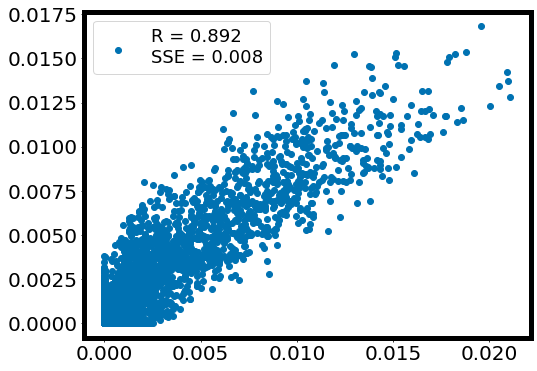

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 27, cycle 5
Epoch: 0, Loss: 543.09154, Residuals: 0.36298, Convergence:   inf
Epoch: 10, Loss: 460.61969, Residuals: 0.32665, Convergence: 0.016719
Epoch: 20, Loss: 390.40457, Residuals: 0.29415, Convergence: 0.016596
Epoch: 30, Loss: 331.88443, Residuals: 0.26461, Convergence: 0.016185
Epoch: 40, Loss: 283.58722, Residuals: 0.23763, Convergence: 0.015499
Epoch: 50, Loss: 243.78210, Residuals: 0.21365, Convergence: 0.014888
Epoch: 60, Loss: 210.60341, Residuals: 0.19207, Convergence: 0.014377
Epoch: 70, Loss: 183.03781, Residuals: 0.17337, Convergence: 0.013785
Epoch: 80, Loss: 159.57310, Residuals: 0.15651, Convergence: 0.013704
Epoch: 90, Loss: 139.74339, Residuals: 0.14143, Convergence: 0.013262
Epoch: 100, Loss: 122.70381, Residuals: 0.12823, Convergence: 0.012738
Epoch: 110, Loss: 107.95154, Residuals: 0.11661, Convergence: 

Epoch: 910, Loss: 327.40594, Residuals: -0.02030, Convergence: 0.001660
Epoch: 920, Loss: 322.61707, Residuals: -0.01949, Convergence: 0.001443
Epoch: 930, Loss: 318.22614, Residuals: -0.01784, Convergence: 0.001224

Epoch: 938, Evidence: 1580.79980, Convergence: -0.003766


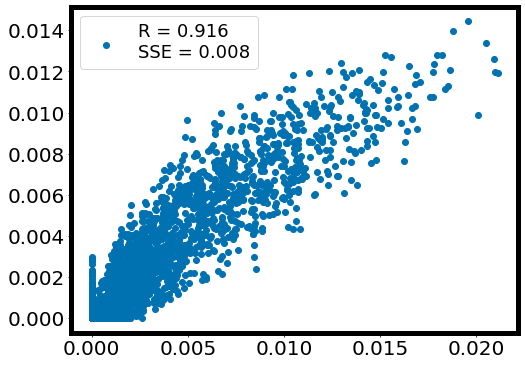

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 590.38347, Residuals: 0.36764, Convergence:   inf
Epoch: 10, Loss: 503.36328, Residuals: 0.33114, Convergence: 0.016202
Epoch: 20, Loss: 429.01593, Residuals: 0.29838, Convergence: 0.016003
Epoch: 30, Loss: 366.83270, Residuals: 0.26833, Convergence: 0.015594
Epoch: 40, Loss: 314.87213, Residuals: 0.24073, Convergence: 0.015135
Epoch: 50, Loss: 271.35153, Residuals: 0.21542, Convergence: 0.014776
Epoch: 60, Loss: 234.65248, Residuals: 0.19262, Convergence: 0.014360
Epoch: 70, Loss: 203.79242, Residuals: 0.17252, Convergence: 0.013994
Epoch: 80, Loss: 177.79282, Residuals: 0.15442, Convergence: 0.013529
Epoch: 90, Loss: 155.76653, Residuals: 0.13842, Convergence: 0.013200
Epoch: 100, Loss: 137.12572, Residuals: 0.12432, Convergence: 0.012644
Epoch: 110, Loss: 121.44887, Residuals: 0.11173, Convergence: 0.011908
Epoch: 120, Loss:

Epoch: 940, Loss: 397.77966, Residuals: -0.00080, Convergence: 0.001360
Epoch: 950, Loss: 393.37292, Residuals: -0.00080, Convergence: 0.000977

Epoch: 950, Evidence: 2003.35706, Convergence: 0.000032
Epoch: 950, Loss: 394.99588, Residuals: -0.00080, Convergence:   inf
Epoch: 960, Loss: 387.07098, Residuals: -0.00147, Convergence: 0.001793
Epoch: 970, Loss: 381.69046, Residuals: -0.00126, Convergence: 0.001189

Epoch: 974, Evidence: 1992.96680, Convergence: -0.005181


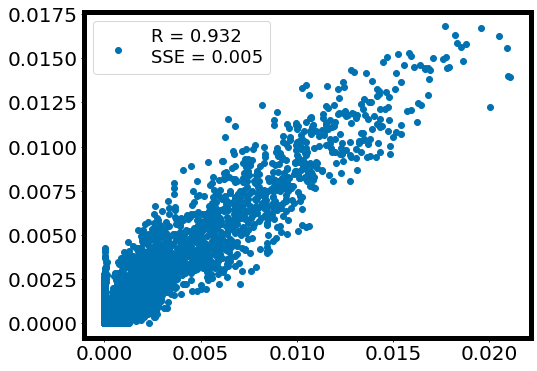

Running trial 28, cycle 1
Epoch: 0, Loss: 106.10336, Residuals: -0.40089, Convergence:   inf
Epoch: 10, Loss: 90.69294, Residuals: -0.37596, Convergence: 0.015935
Epoch: 20, Loss: 77.41205, Residuals: -0.35377, Convergence: 0.015946
Epoch: 30, Loss: 66.12127, Residuals: -0.33431, Convergence: 0.015833
Epoch: 40, Loss: 56.56314, Residuals: -0.31730, Convergence: 0.015647
Epoch: 50, Loss: 48.50743, Residuals: -0.30201, Convergence: 0.015407
Epoch: 60, Loss: 41.71322, Residuals: -0.28810, Convergence: 0.015105
Epoch: 70, Loss: 35.96774, Residuals: -0.27564, Convergence: 0.014782
Epoch: 80, Loss: 31.11622, Residuals: -0.26424, Convergence: 0.014434
Epoch: 90, Loss: 27.02199, Residuals: -0.25384, Convergence: 0.014012
Epoch: 100, Loss: 23.57267, Residuals: -0.24427, Convergence: 0.013526
Epoch: 110, Loss: 20.66959, Residuals: -0.23535, Convergence: 0.012993
Epoch: 120, Loss: 18.26212, Residuals: -0.22661, Convergence: 0.012118
Epoch: 130, Loss: 16.22531, Residuals: -0.21838, Convergence: 0.

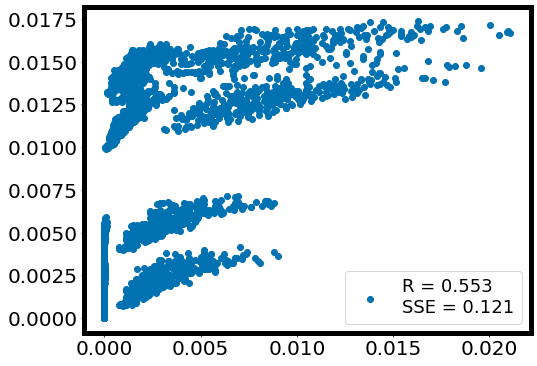

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 28, cycle 2
Epoch: 0, Loss: 189.34004, Residuals: -0.26868, Convergence:   inf
Epoch: 10, Loss: 161.20303, Residuals: -0.25069, Convergence: 0.016335
Epoch: 20, Loss: 136.96594, Residuals: -0.23477, Convergence: 0.016510
Epoch: 30, Loss: 116.22039, Residuals: -0.22047, Convergence: 0.016570
Epoch: 40, Loss: 98.67492, Residuals: -0.20749, Convergence: 0.016412
Epoch: 50, Loss: 84.07150, Residuals: -0.19530, Convergence: 0.015972
Epoch: 60, Loss: 72.00178, Residuals: -0.18364, Convergence: 0.015270
Epoch: 70, Loss: 61.94913, Residuals: -0.17295, Convergence: 0.014934
Epoch: 80, Loss: 53.59925, Residuals: -0.16289, Convergence: 0.014608
Epoch: 90, Loss: 46.75508, Residuals: -0.15291, Convergence: 0.013973
Epoch: 100, Loss: 41.00616, Residuals: -0.14380, Convergence: 0.012559
Epoch: 110, Loss: 36.16625, Residuals: -0.13534, Convergen

Epoch: 950, Loss: 71.00298, Residuals: -0.00656, Convergence: 0.003249
Epoch: 960, Loss: 69.16959, Residuals: -0.00706, Convergence: 0.002432
Epoch: 970, Loss: 67.66940, Residuals: -0.00728, Convergence: 0.000994

Epoch: 970, Evidence: 507.86111, Convergence: 0.010777
Epoch: 970, Loss: 73.18488, Residuals: -0.00728, Convergence:   inf
Epoch: 980, Loss: 70.77883, Residuals: -0.00796, Convergence: 0.003695
Epoch: 990, Loss: 68.89192, Residuals: -0.00835, Convergence: 0.002815
Epoch: 1000, Loss: 67.43527, Residuals: -0.00850, Convergence: 0.002089

Epoch: 1002, Evidence: 508.04993, Convergence: 0.000372
Epoch: 1010, Loss: 68.31407, Residuals: -0.01132, Convergence: 0.004499
Epoch: 1020, Loss: 65.68947, Residuals: -0.01258, Convergence: 0.001790
Epoch: 1030, Loss: 63.14186, Residuals: -0.01216, Convergence: 0.004133
Epoch: 1040, Loss: 61.23849, Residuals: -0.01116, Convergence: 0.002569

Epoch: 1041, Evidence: 482.60651, Convergence: -0.052330
Epoch: 1050, Loss: 79.88943, Residuals: -0.008

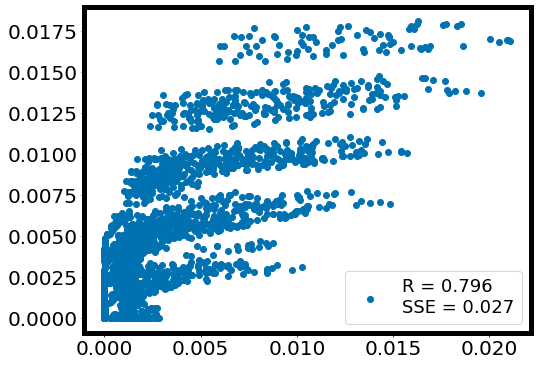

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 28, cycle 3
Epoch: 0, Loss: 293.56069, Residuals: -0.22467, Convergence:   inf
Epoch: 10, Loss: 250.61023, Residuals: -0.20846, Convergence: 0.016074
Epoch: 20, Loss: 213.41922, Residuals: -0.19410, Convergence: 0.016275
Epoch: 30, Loss: 181.60547, Residuals: -0.18137, Convergence: 0.016219
Epoch: 40, Loss: 155.03729, Residuals: -0.16963, Convergence: 0.015786
Epoch: 50, Loss: 133.00085, Residuals: -0.15869, Convergence: 0.014897
Epoch: 60, Loss: 114.52074, Residuals: -0.14834, Convergence: 0.014909
Epoch: 70, Loss: 99.09375, Residuals: -0.13867, Convergence: 0.013164
Epoch: 80, Loss: 86.00878, Residuals: -0.12928, Convergence: 0.014171
Epoch: 90, Loss: 74.63134, Residuals: -0.12027, Convergence: 0.014611
Epoch: 100, Loss: 64.65221, Residuals: -0.11184, Convergence: 0.014446
Epoch: 110, Loss: 55.99574, Residuals: -0.10379, Conver

Epoch: 910, Loss: 177.78799, Residuals: -0.00575, Convergence: 0.001047

Epoch: 911, Evidence: 888.45667, Convergence: 0.000197
Epoch: 920, Loss: 175.89926, Residuals: -0.00604, Convergence: 0.001847
Epoch: 930, Loss: 172.76491, Residuals: -0.00612, Convergence: 0.001329
Epoch: 940, Loss: 170.07993, Residuals: -0.00597, Convergence: 0.001825

Epoch: 945, Evidence: 877.32281, Convergence: -0.012491
Epoch: 950, Loss: 183.39459, Residuals: -0.00585, Convergence: 0.001426

Epoch: 959, Evidence: 889.07318, Convergence: 0.000890
Epoch: 960, Loss: 181.78470, Residuals: -0.00584, Convergence: 0.002174
Epoch: 970, Loss: 177.68903, Residuals: -0.00619, Convergence: 0.002000
Epoch: 980, Loss: 174.31923, Residuals: -0.00619, Convergence: 0.002343

Epoch: 981, Evidence: 886.30487, Convergence: -0.002231


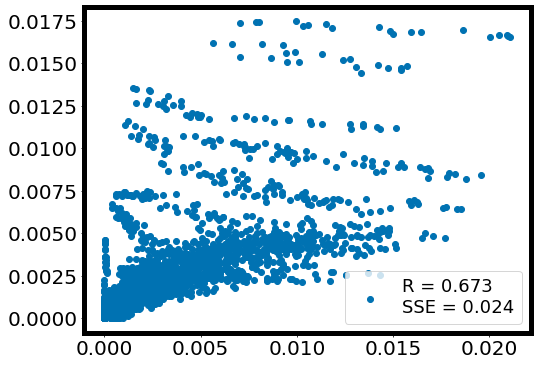

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 28, cycle 4
Epoch: 0, Loss: 429.35622, Residuals: 0.02492, Convergence:   inf
Epoch: 10, Loss: 364.80914, Residuals: 0.01949, Convergence: 0.016427
Epoch: 20, Loss: 310.15012, Residuals: 0.01452, Convergence: 0.016301
Epoch: 30, Loss: 264.24527, Residuals: 0.01024, Convergence: 0.016005
Epoch: 40, Loss: 226.00900, Residuals: 0.00663, Convergence: 0.015614
Epoch: 50, Loss: 194.30841, Residuals: 0.00376, Convergence: 0.014732
Epoch: 60, Loss: 167.99919, Residuals: 0.00114, Convergence: 0.014380
Epoch: 70, Loss: 146.34956, Residuals: -0.00109, Convergence: 0.013667
Epoch: 80, Loss: 128.44846, Residuals: -0.00278, Convergence: 0.013128
Epoch: 90, Loss: 113.30210, Residuals: -0.00425, Convergence: 0.011908
Epoch: 100, Loss: 100.19026, Residuals: -0.00611, Convergence: 0.012607
Epoch: 110, Loss: 89.03704, Residuals: -0.00711, Convergen

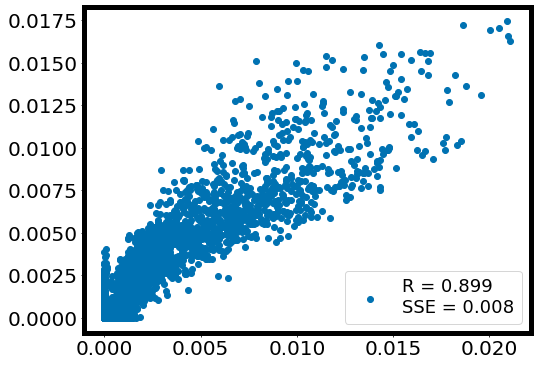

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 28, cycle 5
Epoch: 0, Loss: 700.54173, Residuals: 0.21988, Convergence:   inf
Epoch: 10, Loss: 591.31750, Residuals: 0.19599, Convergence: 0.017150
Epoch: 20, Loss: 498.74271, Residuals: 0.17438, Convergence: 0.017162
Epoch: 30, Loss: 421.32297, Residuals: 0.15493, Convergence: 0.016957
Epoch: 40, Loss: 356.73080, Residuals: 0.13725, Convergence: 0.016653
Epoch: 50, Loss: 303.04248, Residuals: 0.12085, Convergence: 0.016331
Epoch: 60, Loss: 258.38614, Residuals: 0.10625, Convergence: 0.015939
Epoch: 70, Loss: 221.51321, Residuals: 0.09450, Convergence: 0.015615
Epoch: 80, Loss: 190.39604, Residuals: 0.08390, Convergence: 0.015372
Epoch: 90, Loss: 164.45538, Residuals: 0.07467, Convergence: 0.014775
Epoch: 100, Loss: 142.66351, Residuals: 0.06615, Convergence: 0.014338
Epoch: 110, Loss: 123.98262, Residuals: 0.05828, Convergence: 

Epoch: 950, Loss: 322.40701, Residuals: -0.00996, Convergence: 0.001364

Epoch: 957, Evidence: 1643.70020, Convergence: -0.003773


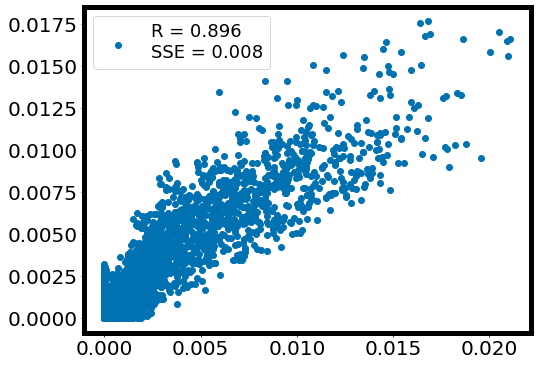

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 607.62444, Residuals: 0.27273, Convergence:   inf
Epoch: 10, Loss: 518.82422, Residuals: 0.24444, Convergence: 0.015935
Epoch: 20, Loss: 443.15051, Residuals: 0.21895, Convergence: 0.015790
Epoch: 30, Loss: 379.62909, Residuals: 0.19587, Convergence: 0.015416
Epoch: 40, Loss: 326.90628, Residuals: 0.17526, Convergence: 0.014806
Epoch: 50, Loss: 282.99896, Residuals: 0.15695, Convergence: 0.014320
Epoch: 60, Loss: 246.11562, Residuals: 0.14056, Convergence: 0.013686
Epoch: 70, Loss: 214.63481, Residuals: 0.12597, Convergence: 0.013519
Epoch: 80, Loss: 187.98804, Residuals: 0.11281, Convergence: 0.013357
Epoch: 90, Loss: 164.89729, Residuals: 0.10100, Convergence: 0.012930
Epoch: 100, Loss: 145.29744, Residuals: 0.09053, Convergence: 0.012683
Epoch: 110, Loss: 128.59821, Residuals: 0.08157, Convergence: 0.012081
Epoch: 120, Loss:

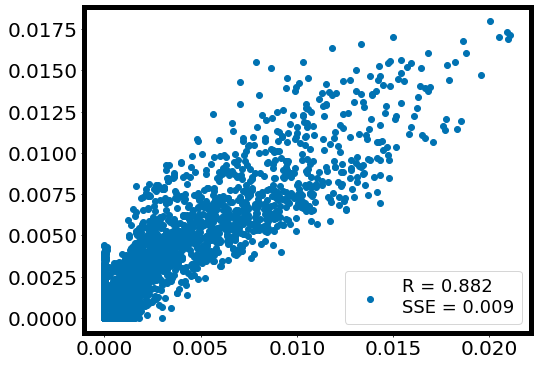

Running trial 29, cycle 1
Epoch: 0, Loss: 95.28506, Residuals: -0.79620, Convergence:   inf
Epoch: 10, Loss: 81.54129, Residuals: -0.73722, Convergence: 0.015495
Epoch: 20, Loss: 70.00694, Residuals: -0.68244, Convergence: 0.015441
Epoch: 30, Loss: 60.22814, Residuals: -0.63123, Convergence: 0.014986
Epoch: 40, Loss: 52.01928, Residuals: -0.58469, Convergence: 0.014574
Epoch: 50, Loss: 45.11929, Residuals: -0.54233, Convergence: 0.014130
Epoch: 60, Loss: 39.31298, Residuals: -0.50408, Convergence: 0.013652
Epoch: 70, Loss: 34.44732, Residuals: -0.46951, Convergence: 0.013012
Epoch: 80, Loss: 30.33565, Residuals: -0.43875, Convergence: 0.012668
Epoch: 90, Loss: 26.85894, Residuals: -0.41123, Convergence: 0.012014
Epoch: 100, Loss: 23.88231, Residuals: -0.38686, Convergence: 0.011660
Epoch: 110, Loss: 21.31760, Residuals: -0.36541, Convergence: 0.011268
Epoch: 120, Loss: 19.11460, Residuals: -0.34631, Convergence: 0.010686
Epoch: 130, Loss: 17.17519, Residuals: -0.32914, Convergence: 0.0

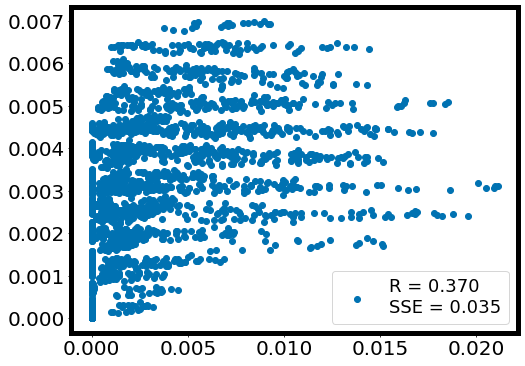

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 29, cycle 2
Epoch: 0, Loss: 186.99590, Residuals: -0.38025, Convergence:   inf
Epoch: 10, Loss: 159.00899, Residuals: -0.35180, Convergence: 0.016585
Epoch: 20, Loss: 134.63379, Residuals: -0.32670, Convergence: 0.016878
Epoch: 30, Loss: 113.85119, Residuals: -0.30473, Convergence: 0.016921
Epoch: 40, Loss: 96.19133, Residuals: -0.28536, Convergence: 0.017040
Epoch: 50, Loss: 81.18658, Residuals: -0.26816, Convergence: 0.017082
Epoch: 60, Loss: 68.72790, Residuals: -0.25203, Convergence: 0.016707
Epoch: 70, Loss: 58.45779, Residuals: -0.23688, Convergence: 0.016276
Epoch: 80, Loss: 49.90621, Residuals: -0.22266, Convergence: 0.015864
Epoch: 90, Loss: 42.76499, Residuals: -0.20907, Convergence: 0.015550
Epoch: 100, Loss: 36.87323, Residuals: -0.19605, Convergence: 0.014315
Epoch: 110, Loss: 31.95141, Residuals: -0.18343, Convergen

Epoch: 920, Loss: 106.23929, Residuals: 0.01114, Convergence: 0.001577
Epoch: 930, Loss: 104.37447, Residuals: 0.01111, Convergence: 0.000758

Epoch: 930, Evidence: 529.88727, Convergence: -0.001011
Epoch: 930, Loss: 110.53096, Residuals: 0.01159, Convergence:   inf

Epoch: 937, Evidence: 534.64380, Convergence: 0.007895
Epoch: 940, Loss: 112.11316, Residuals: 0.01140, Convergence: 0.001115

Epoch: 949, Evidence: 537.01636, Convergence: 0.004418
Epoch: 950, Loss: 113.39014, Residuals: 0.01126, Convergence: 0.001279

Epoch: 958, Evidence: 536.59381, Convergence: -0.000787
Epoch: 960, Loss: 113.22473, Residuals: 0.01111, Convergence: 0.002879
Epoch: 970, Loss: 110.70044, Residuals: 0.01085, Convergence: 0.002396

Epoch: 979, Evidence: 535.32861, Convergence: -0.003153
Epoch: 980, Loss: 116.20303, Residuals: 0.01126, Convergence: 0.001382

Epoch: 984, Evidence: 541.59180, Convergence: 0.008448
Epoch: 990, Loss: 116.40392, Residuals: 0.01110, Convergence: 0.001546

Epoch: 997, Evidence: 54

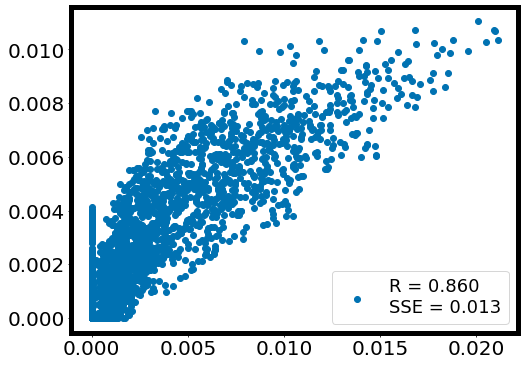

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 29, cycle 3
Epoch: 0, Loss: 316.01122, Residuals: -0.04154, Convergence:   inf
Epoch: 10, Loss: 268.98529, Residuals: -0.04176, Convergence: 0.016162
Epoch: 20, Loss: 229.44370, Residuals: -0.04195, Convergence: 0.015904
Epoch: 30, Loss: 196.24615, Residuals: -0.04212, Convergence: 0.015643
Epoch: 40, Loss: 167.10422, Residuals: -0.04268, Convergence: 0.016192
Epoch: 50, Loss: 142.61191, Residuals: -0.04346, Convergence: 0.015792
Epoch: 60, Loss: 122.22860, Residuals: -0.04333, Convergence: 0.015387
Epoch: 70, Loss: 104.92638, Residuals: -0.04232, Convergence: 0.015263
Epoch: 80, Loss: 90.42158, Residuals: -0.04134, Convergence: 0.014667
Epoch: 90, Loss: 78.31628, Residuals: -0.04036, Convergence: 0.014394
Epoch: 100, Loss: 68.27386, Residuals: -0.03902, Convergence: 0.013183
Epoch: 110, Loss: 59.86530, Residuals: -0.03754, Conve


Epoch: 979, Evidence: 846.95789, Convergence: 0.010413
Epoch: 980, Loss: 162.64398, Residuals: -0.00441, Convergence: 0.002968

Epoch: 986, Evidence: 851.49268, Convergence: 0.005326
Epoch: 990, Loss: 165.24382, Residuals: -0.00482, Convergence: 0.002416
Epoch: 1000, Loss: 162.04422, Residuals: -0.00502, Convergence: 0.001915

Epoch: 1005, Evidence: 850.17993, Convergence: -0.001544
Epoch: 1010, Loss: 168.67354, Residuals: -0.00462, Convergence: 0.001351

Epoch: 1018, Evidence: 859.59644, Convergence: 0.009427
Epoch: 1020, Loss: 170.91121, Residuals: -0.00455, Convergence: 0.001270

Epoch: 1028, Evidence: 859.11365, Convergence: -0.000562
Epoch: 1030, Loss: 170.51212, Residuals: -0.00461, Convergence: 0.002941
Epoch: 1040, Loss: 166.77151, Residuals: -0.00496, Convergence: 0.002292
Epoch: 1050, Loss: 164.01767, Residuals: -0.00488, Convergence: 0.000998

Epoch: 1050, Evidence: 853.36877, Convergence: -0.007298
Epoch: 1050, Loss: 174.63834, Residuals: -0.00456, Convergence:   inf
Epoch

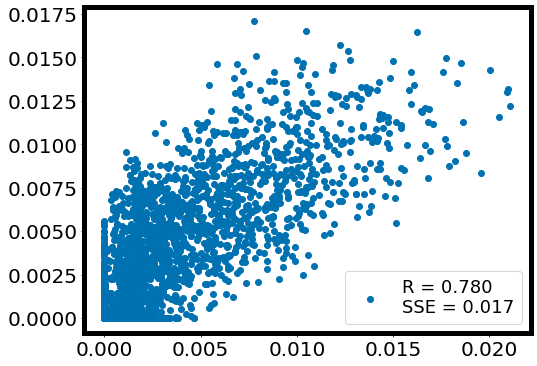

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 29, cycle 4
Epoch: 0, Loss: 352.03780, Residuals: 0.11768, Convergence:   inf
Epoch: 10, Loss: 303.78842, Residuals: 0.10363, Convergence: 0.014818
Epoch: 20, Loss: 262.51007, Residuals: 0.09096, Convergence: 0.014618
Epoch: 30, Loss: 227.34499, Residuals: 0.07950, Convergence: 0.014485
Epoch: 40, Loss: 197.08830, Residuals: 0.06896, Convergence: 0.014232
Epoch: 50, Loss: 171.03519, Residuals: 0.05999, Convergence: 0.014259
Epoch: 60, Loss: 148.73050, Residuals: 0.05261, Convergence: 0.014060
Epoch: 70, Loss: 129.11363, Residuals: 0.04632, Convergence: 0.014305
Epoch: 80, Loss: 112.30341, Residuals: 0.04051, Convergence: 0.013862
Epoch: 90, Loss: 98.06957, Residuals: 0.03545, Convergence: 0.013766
Epoch: 100, Loss: 85.95876, Residuals: 0.03095, Convergence: 0.013503
Epoch: 110, Loss: 75.42713, Residuals: 0.02704, Convergence: 0.0


Epoch: 979, Evidence: 1233.80505, Convergence: 0.003318
Epoch: 980, Loss: 247.90955, Residuals: -0.01716, Convergence: 0.001046

Epoch: 985, Evidence: 1233.33020, Convergence: -0.000385
Epoch: 990, Loss: 246.05899, Residuals: -0.01775, Convergence: 0.001850
Epoch: 1000, Loss: 242.23730, Residuals: -0.01841, Convergence: 0.001727

Epoch: 1006, Evidence: 1222.06165, Convergence: -0.009610
Epoch: 1010, Loss: 249.05414, Residuals: -0.01714, Convergence: 0.001191

Epoch: 1016, Evidence: 1234.55347, Convergence: 0.000606
Epoch: 1020, Loss: 246.73134, Residuals: -0.01765, Convergence: 0.001450
Epoch: 1030, Loss: 242.76654, Residuals: -0.01845, Convergence: 0.001579
Epoch: 1040, Loss: 239.54324, Residuals: -0.01859, Convergence: 0.001285

Epoch: 1041, Evidence: 1220.66602, Convergence: -0.010764


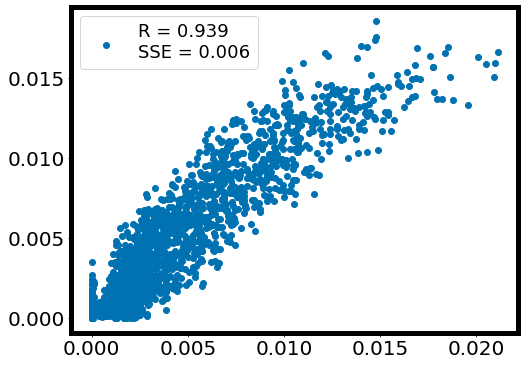

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 29, cycle 5
Epoch: 0, Loss: 437.24794, Residuals: 0.08051, Convergence:   inf
Epoch: 10, Loss: 375.90891, Residuals: 0.07114, Convergence: 0.015270
Epoch: 20, Loss: 323.24271, Residuals: 0.06267, Convergence: 0.015132
Epoch: 30, Loss: 278.54938, Residuals: 0.05488, Convergence: 0.014929
Epoch: 40, Loss: 240.49045, Residuals: 0.04770, Convergence: 0.014841
Epoch: 50, Loss: 208.04672, Residuals: 0.04138, Convergence: 0.014385
Epoch: 60, Loss: 180.81833, Residuals: 0.03595, Convergence: 0.013992
Epoch: 70, Loss: 157.90256, Residuals: 0.03150, Convergence: 0.013497
Epoch: 80, Loss: 138.49954, Residuals: 0.02761, Convergence: 0.013096
Epoch: 90, Loss: 122.02225, Residuals: 0.02388, Convergence: 0.012638
Epoch: 100, Loss: 107.96919, Residuals: 0.02081, Convergence: 0.011870
Epoch: 110, Loss: 95.77452, Residuals: 0.01859, Convergence: 0


Epoch: 955, Evidence: 1520.61938, Convergence: -0.001028

Epoch: 956, Evidence: 1528.76050, Convergence: 0.004303

Epoch: 957, Evidence: 1528.19373, Convergence: -0.000371
Epoch: 960, Loss: 322.49957, Residuals: -0.01278, Convergence: 0.001597
Epoch: 970, Loss: 318.10968, Residuals: -0.01330, Convergence: 0.001192

Epoch: 974, Evidence: 1523.17896, Convergence: -0.003664


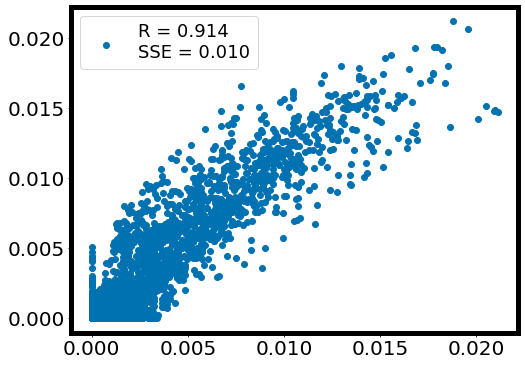

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 548.64348, Residuals: 0.09498, Convergence:   inf
Epoch: 10, Loss: 470.34277, Residuals: 0.08452, Convergence: 0.015566
Epoch: 20, Loss: 403.14340, Residuals: 0.07484, Convergence: 0.015471
Epoch: 30, Loss: 346.14407, Residuals: 0.06575, Convergence: 0.015266
Epoch: 40, Loss: 298.02771, Residuals: 0.05747, Convergence: 0.015028
Epoch: 50, Loss: 257.51724, Residuals: 0.05021, Convergence: 0.014419
Epoch: 60, Loss: 223.74554, Residuals: 0.04400, Convergence: 0.013956
Epoch: 70, Loss: 195.28677, Residuals: 0.03855, Convergence: 0.013491
Epoch: 80, Loss: 171.31352, Residuals: 0.03389, Convergence: 0.013074
Epoch: 90, Loss: 150.97922, Residuals: 0.02977, Convergence: 0.012446
Epoch: 100, Loss: 133.59740, Residuals: 0.02634, Convergence: 0.011879
Epoch: 110, Loss: 118.74579, Residuals: 0.02317, Convergence: 0.011723
Epoch: 120, Loss:


Epoch: 927, Evidence: 1866.47961, Convergence: -0.000325
Epoch: 930, Loss: 389.52158, Residuals: -0.00915, Convergence: 0.003027
Epoch: 940, Loss: 381.14261, Residuals: -0.01002, Convergence: 0.002494
Epoch: 950, Loss: 375.63660, Residuals: -0.00745, Convergence: 0.001081

Epoch: 951, Evidence: 1854.93262, Convergence: -0.006552


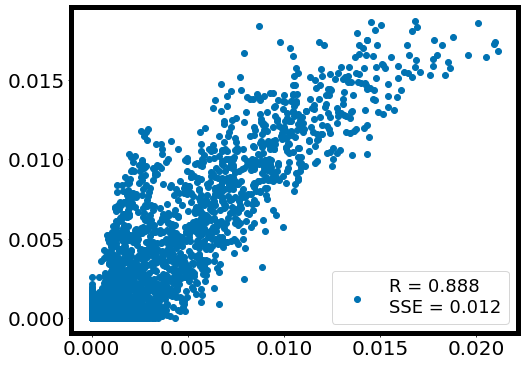

Running trial 30, cycle 1
Epoch: 0, Loss: 81.42852, Residuals: -0.74541, Convergence:   inf
Epoch: 10, Loss: 69.99537, Residuals: -0.68658, Convergence: 0.015366
Epoch: 20, Loss: 60.08993, Residuals: -0.63381, Convergence: 0.015332
Epoch: 30, Loss: 51.65695, Residuals: -0.58639, Convergence: 0.015156
Epoch: 40, Loss: 44.48468, Residuals: -0.54371, Convergence: 0.014983
Epoch: 50, Loss: 38.44576, Residuals: -0.50454, Convergence: 0.014694
Epoch: 60, Loss: 33.36003, Residuals: -0.46866, Convergence: 0.014466
Epoch: 70, Loss: 28.99975, Residuals: -0.43660, Convergence: 0.014196
Epoch: 80, Loss: 25.26113, Residuals: -0.40793, Convergence: 0.013802
Epoch: 90, Loss: 22.08366, Residuals: -0.38211, Convergence: 0.013456
Epoch: 100, Loss: 19.40605, Residuals: -0.35854, Convergence: 0.012953
Epoch: 110, Loss: 17.14948, Residuals: -0.33705, Convergence: 0.012324
Epoch: 120, Loss: 15.27191, Residuals: -0.31727, Convergence: 0.010035
Epoch: 130, Loss: 13.66225, Residuals: -0.29963, Convergence: 0.0


Epoch: 873, Evidence: 200.69292, Convergence: 0.019811
Epoch: 880, Loss: 42.92546, Residuals: -0.00353, Convergence: 0.002028

Epoch: 889, Evidence: 197.26422, Convergence: -0.017381
Epoch: 890, Loss: 44.54178, Residuals: -0.00342, Convergence: 0.001416

Epoch: 895, Evidence: 202.56570, Convergence: 0.009245

Epoch: 896, Evidence: 206.23515, Convergence: 0.017793
Epoch: 900, Loss: 46.68279, Residuals: -0.00336, Convergence: 0.001310

Epoch: 904, Evidence: 205.66315, Convergence: -0.002781


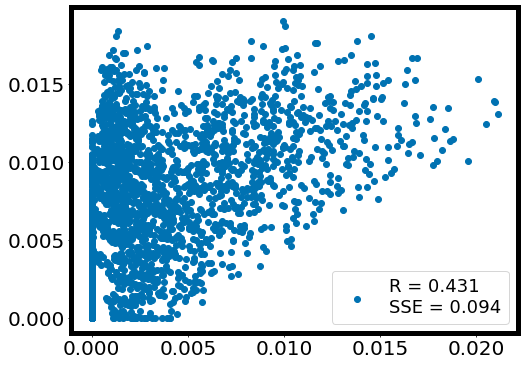

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 30, cycle 2
Epoch: 0, Loss: 156.12596, Residuals: -0.21680, Convergence:   inf
Epoch: 10, Loss: 134.32883, Residuals: -0.20193, Convergence: 0.015358
Epoch: 20, Loss: 115.16260, Residuals: -0.18853, Convergence: 0.015648
Epoch: 30, Loss: 98.42496, Residuals: -0.17625, Convergence: 0.015966
Epoch: 40, Loss: 83.91969, Residuals: -0.16491, Convergence: 0.016131
Epoch: 50, Loss: 71.49795, Residuals: -0.15403, Convergence: 0.016194
Epoch: 60, Loss: 60.92890, Residuals: -0.14397, Convergence: 0.016056
Epoch: 70, Loss: 52.06890, Residuals: -0.13441, Convergence: 0.015684
Epoch: 80, Loss: 44.66444, Residuals: -0.12544, Convergence: 0.015280
Epoch: 90, Loss: 38.53172, Residuals: -0.11709, Convergence: 0.014443
Epoch: 100, Loss: 33.41942, Residuals: -0.10932, Convergence: 0.014399
Epoch: 110, Loss: 29.15507, Residuals: -0.10210, Convergenc

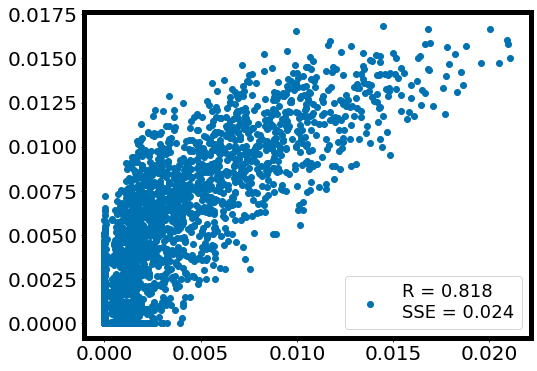

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 30, cycle 3
Epoch: 0, Loss: 302.45531, Residuals: 0.09735, Convergence:   inf
Epoch: 10, Loss: 258.95987, Residuals: 0.08374, Convergence: 0.015721
Epoch: 20, Loss: 221.56120, Residuals: 0.07146, Convergence: 0.015709
Epoch: 30, Loss: 189.69818, Residuals: 0.06026, Convergence: 0.015563
Epoch: 40, Loss: 162.81146, Residuals: 0.05024, Convergence: 0.015278
Epoch: 50, Loss: 139.82558, Residuals: 0.04169, Convergence: 0.015409
Epoch: 60, Loss: 120.28440, Residuals: 0.03474, Convergence: 0.014976
Epoch: 70, Loss: 103.73887, Residuals: 0.02901, Convergence: 0.014714
Epoch: 80, Loss: 89.64682, Residuals: 0.02416, Convergence: 0.014821
Epoch: 90, Loss: 77.28136, Residuals: 0.01956, Convergence: 0.014921
Epoch: 100, Loss: 66.52527, Residuals: 0.01549, Convergence: 0.015068
Epoch: 110, Loss: 57.40946, Residuals: 0.01196, Convergence: 0.01

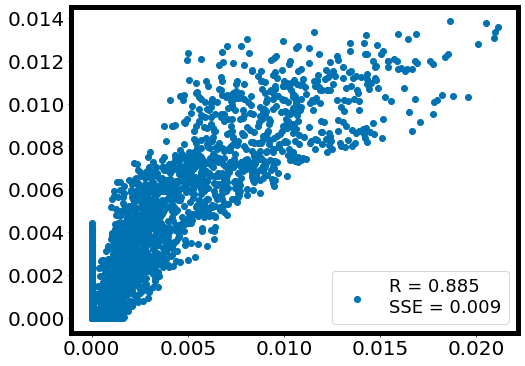

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 30, cycle 4
Epoch: 0, Loss: 357.82854, Residuals: 0.08774, Convergence:   inf
Epoch: 10, Loss: 307.03391, Residuals: 0.07634, Convergence: 0.015561
Epoch: 20, Loss: 262.99097, Residuals: 0.06619, Convergence: 0.015613
Epoch: 30, Loss: 225.51495, Residuals: 0.05718, Convergence: 0.015337
Epoch: 40, Loss: 194.26431, Residuals: 0.04929, Convergence: 0.014799
Epoch: 50, Loss: 168.37234, Residuals: 0.04242, Convergence: 0.014276
Epoch: 60, Loss: 146.92786, Residuals: 0.03660, Convergence: 0.013587
Epoch: 70, Loss: 128.95724, Residuals: 0.03167, Convergence: 0.013069
Epoch: 80, Loss: 113.42284, Residuals: 0.02716, Convergence: 0.013006
Epoch: 90, Loss: 99.42989, Residuals: 0.02309, Convergence: 0.013701
Epoch: 100, Loss: 86.87844, Residuals: 0.01935, Convergence: 0.013417
Epoch: 110, Loss: 76.07170, Residuals: 0.01606, Convergence: 0.0

Epoch: 1000, Loss: 234.09227, Residuals: -0.00911, Convergence: 0.001943

Epoch: 1009, Evidence: 1218.42175, Convergence: 0.000906
Epoch: 1010, Loss: 234.97586, Residuals: -0.00967, Convergence: 0.002595
Epoch: 1020, Loss: 228.48959, Residuals: -0.01224, Convergence: 0.002146

Epoch: 1025, Evidence: 1210.30249, Convergence: -0.005797
Epoch: 1030, Loss: 243.57245, Residuals: -0.00900, Convergence: 0.001586
Epoch: 1040, Loss: 238.95932, Residuals: -0.00950, Convergence: 0.001918

Epoch: 1047, Evidence: 1223.31995, Convergence: 0.004906
Epoch: 1050, Loss: 241.06354, Residuals: -0.00979, Convergence: 0.002033
Epoch: 1060, Loss: 236.90524, Residuals: -0.01017, Convergence: 0.001684

Epoch: 1066, Evidence: 1221.76636, Convergence: -0.001272
Epoch: 1070, Loss: 243.60881, Residuals: -0.00953, Convergence: 0.001222

Epoch: 1075, Evidence: 1230.05664, Convergence: 0.005477

Epoch: 1076, Evidence: 1230.12451, Convergence: 0.000055
Epoch: 1080, Loss: 245.75937, Residuals: -0.00980, Convergence: 0.

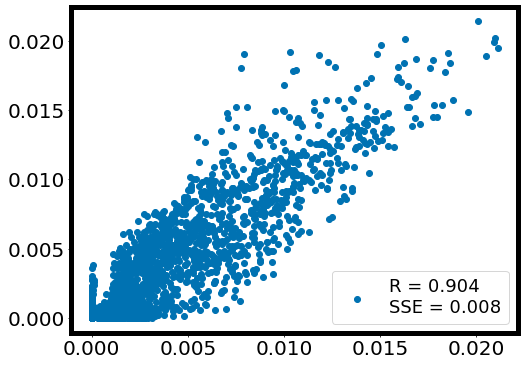

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Running trial 30, cycle 5
Epoch: 0, Loss: 477.47170, Residuals: 0.08416, Convergence:   inf
Epoch: 10, Loss: 408.63879, Residuals: 0.07389, Convergence: 0.015938
Epoch: 20, Loss: 348.56647, Residuals: 0.06411, Convergence: 0.016052
Epoch: 30, Loss: 297.77527, Residuals: 0.05492, Convergence: 0.015592
Epoch: 40, Loss: 256.10989, Residuals: 0.04714, Convergence: 0.014901
Epoch: 50, Loss: 221.57285, Residuals: 0.04086, Convergence: 0.014385
Epoch: 60, Loss: 192.37135, Residuals: 0.03566, Convergence: 0.014221
Epoch: 70, Loss: 166.89276, Residuals: 0.03136, Convergence: 0.014391
Epoch: 80, Loss: 145.02538, Residuals: 0.02744, Convergence: 0.013996
Epoch: 90, Loss: 126.49850, Residuals: 0.02407, Convergence: 0.014027
Epoch: 100, Loss: 110.81948, Residuals: 0.02141, Convergence: 0.013343
Epoch: 110, Loss: 97.31565, Residuals: 0.01893, Convergence: 0

Epoch: 940, Loss: 318.36560, Residuals: -0.00462, Convergence: 0.001347

Epoch: 942, Evidence: 1477.99500, Convergence: -0.005270
Epoch: 950, Loss: 334.92239, Residuals: -0.00281, Convergence: 0.001408
Epoch: 960, Loss: 330.91272, Residuals: -0.00289, Convergence: 0.001129

Epoch: 964, Evidence: 1484.85449, Convergence: -0.000626


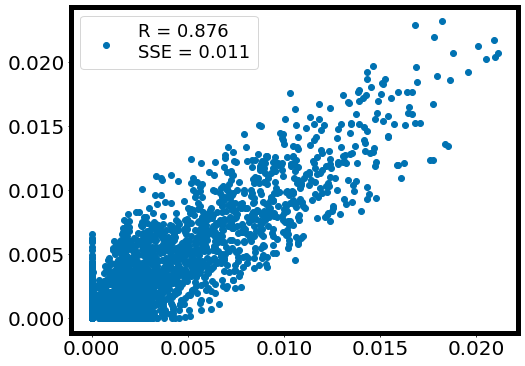

Picked experiment 1 out of 5
Picked experiment 2 out of 5
Picked experiment 3 out of 5
Picked experiment 4 out of 5
Picked experiment 5 out of 5
Epoch: 0, Loss: 732.67485, Residuals: 0.21298, Convergence:   inf
Epoch: 10, Loss: 621.14551, Residuals: 0.19073, Convergence: 0.016826
Epoch: 20, Loss: 524.74182, Residuals: 0.16947, Convergence: 0.017197
Epoch: 30, Loss: 442.91095, Residuals: 0.15004, Convergence: 0.016718
Epoch: 40, Loss: 376.86963, Residuals: 0.13426, Convergence: 0.016015
Epoch: 50, Loss: 322.41278, Residuals: 0.12071, Convergence: 0.015536
Epoch: 60, Loss: 277.10419, Residuals: 0.10833, Convergence: 0.015244
Epoch: 70, Loss: 238.68538, Residuals: 0.09705, Convergence: 0.014900
Epoch: 80, Loss: 206.04221, Residuals: 0.08684, Convergence: 0.014637
Epoch: 90, Loss: 177.81961, Residuals: 0.07774, Convergence: 0.014746
Epoch: 100, Loss: 154.14000, Residuals: 0.06945, Convergence: 0.014224
Epoch: 110, Loss: 134.36925, Residuals: 0.06195, Convergence: 0.013612
Epoch: 120, Loss:


Epoch: 931, Evidence: 1828.07886, Convergence: 0.003049

Epoch: 932, Evidence: 1828.25476, Convergence: 0.000096
Epoch: 940, Loss: 401.94446, Residuals: -0.02354, Convergence: 0.001402
Epoch: 950, Loss: 396.82129, Residuals: -0.02390, Convergence: 0.001445

Epoch: 951, Evidence: 1822.21106, Convergence: -0.003220


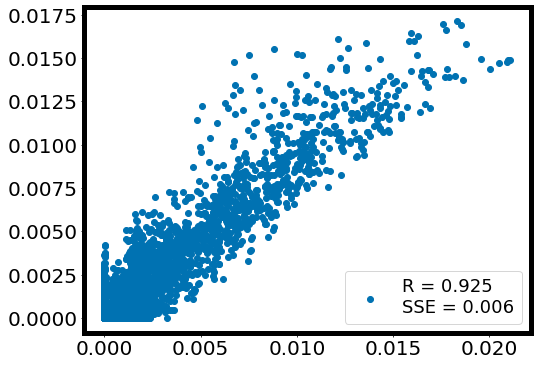

In [10]:
# init dataframe that stores DTL information
dtl_df = pd.DataFrame()
dtl_df_R = pd.DataFrame()
dtl_df_sse = pd.DataFrame()
elapsed_time = []

for trial in range(n_trials):

    # reformat data 
    main_data, main_obj_params, unique_exp_names, N_total = format_data(main_df, species, outputs, controls, obj_params=obj_params)

    # keep track of objective 
    objective_found = []

    # choose random set of training samples
    train_df = main_df.iloc[np.in1d(all_exp_names, initial_exps[trial])].copy()
    train_data, train_obj_params, new_experiments, N = format_data(train_df, species, outputs, controls, obj_params=obj_params)

    # remove training samples from main dataset
    train_inds = np.in1d(unique_exp_names, new_experiments)
    main_data = main_data[~train_inds]
    main_obj_params  = main_obj_params[~train_inds]
    unique_exp_names = unique_exp_names[~train_inds]

    # compute objectives
    target_found = []
    for sample, train_obj_param in zip(train_data, train_obj_params):
        target_found.append(objective(sample[:, :len(sys_var)], train_obj_param))
    target_found = np.array(target_found)
    objective_found.append(np.max(target_found))
    objective_rval = []
    objective_sse  = []

    # Search over full factorial and update model
    for dtl in range(n_dtl):
        print(f"Running trial {trial+1}, cycle {dtl+1}")

        # scale train and design space data
        scaler = ZeroMaxScaler().fit(train_data)
        train_data = scaler.transform(train_data)
        main_data_scaled = scaler.transform(main_data)

        # fit model 
        brnn = miRNN(n_species=n_s, n_metabolites=1, n_controls=len(controls), n_hidden=16, N=N)
        brnn.fit(train_data)
        
        # assess prediction performance of end-point product
        pred, stdv, cov = brnn.predict(main_data_scaled)
        pred = scaler.inverse_transform(pred)
        stdv = scaler.inverse_transform(stdv)
        rvalue = linregress(np.array(main_data[:, -1, 5]), pred[:, -1, -1]).rvalue
        sse_value = sse(np.array(main_data[:, -1, 5]), pred[:, -1, -1])
        plt.scatter(np.array(main_data[:, -1, 5]), pred[:, -1, -1], label="R = {:.3f}\nSSE = {:.3f}".format(rvalue, sse_value))
        plt.legend()
        plt.show()
        objective_rval.append(rvalue)
        objective_sse.append(sse_value)
        
        # search over design space
        t0 = time.time()
        new_experiment_inds = brnn.explore(main_data_scaled, n_test)
        new_experiments = unique_exp_names[new_experiment_inds]
        elapsed_time.append(time.time()-t0)

        # collect new data 
        new_df   = main_df.iloc[np.in1d(all_exp_names, new_experiments)].copy()
        new_data, new_obj_params, new_experiments, N = format_data(new_df, species, outputs, controls, obj_params=obj_params)

        # remove training samples from main dataset
        train_inds = np.in1d(unique_exp_names, new_experiments)
        main_data = main_data[~train_inds]
        main_obj_params  = main_obj_params[~train_inds]
        unique_exp_names = unique_exp_names[~train_inds]

        # compute objectives
        target_found = []
        for sample, new_obj_param in zip(new_data, new_obj_params):
            target_found.append(objective(sample[:, :len(sys_var)], new_obj_param))
        target_found = np.array(target_found)

        # store the best objective found (so far)
        objective_found.append(np.max([np.max(objective_found), np.max(target_found)]))

        # Update dataset
        train_df = pd.concat((train_df, new_df))
        train_data, train_obj_params, _, N = format_data(train_df, species, outputs, controls, obj_params=obj_params)
        
    ### fit model one last time to assess final prediction performance ### 
    # scale train and design space data
    scaler = ZeroMaxScaler().fit(train_data)
    train_data = scaler.transform(train_data)
    main_data_scaled = scaler.transform(main_data)

    # fit model 
    brnn = miRNN(n_species=n_s, n_metabolites=1, n_controls=len(controls), n_hidden=16, N=N)
    brnn.fit(train_data)

    # assess prediction performance of end-point product
    pred, stdv, cov = brnn.predict(main_data_scaled)
    pred = scaler.inverse_transform(pred)
    stdv = scaler.inverse_transform(stdv)
    rvalue = linregress(np.array(main_data[:, -1, 5]), pred[:, -1, -1]).rvalue
    sse_value = sse(np.array(main_data[:, -1, 5]), pred[:, -1, -1])
    plt.scatter(np.array(main_data[:, -1, 5]), pred[:, -1, -1], label="R = {:.3f}\nSSE = {:.3f}".format(rvalue, sse_value))
    plt.legend()
    plt.show()
    objective_rval.append(rvalue)
    objective_sse.append(sse_value)
        
    # save data to dataframe
    dtl_df_i = pd.DataFrame()
    dtl_df_i['Trial'] = [trial]
    for j,obj_found in enumerate(objective_found):
        dtl_df_i[f'DTL {j}'] = [obj_found]
    dtl_df = pd.concat((dtl_df, dtl_df_i))
    
    # save data to dataframe
    dtl_df_r = pd.DataFrame()
    dtl_df_r['Trial'] = [trial]
    for j,r_val in enumerate(objective_rval):
        dtl_df_r[f'DTL {j}'] = [r_val]
    dtl_df_R = pd.concat((dtl_df_R, dtl_df_r))
    
    # save data to dataframe
    dtl_df_e = pd.DataFrame()
    dtl_df_e['Trial'] = [trial]
    for j,e in enumerate(objective_sse):
        dtl_df_e[f'DTL {j}'] = [e]
    dtl_df_sse = pd.concat((dtl_df_sse, dtl_df_e))

In [11]:
dtl_df.to_csv("Fig3/miRNN_explore.csv", index=False)
dtl_df_R.to_csv("Fig3/miRNN_explore_rvals.csv", index=False)
dtl_df_sse.to_csv("Fig3/miRNN_explore_sse.csv", index=False)

In [12]:
dtl_df.describe()

Trial      DTL 0      DTL 1      DTL 2      DTL 3      DTL 4  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   14.500000   0.089362   0.129047   0.142928   0.159280   0.162073   
std     8.803408   0.046666   0.049307   0.046755   0.037943   0.035004   
min     0.000000   0.010389   0.058942   0.068251   0.081311   0.091935   
25%     7.250000   0.058960   0.081466   0.098520   0.135201   0.140000   
50%    14.500000   0.076329   0.129654   0.139224   0.166793   0.166793   
75%    21.750000   0.112222   0.174468   0.177964   0.181649   0.181880   
max    29.000000   0.193425   0.218052   0.230823   0.230823   0.230823   

           DTL 5  
count  30.000000  
mean    0.168419  
std     0.029984  
min     0.091935  
25%     0.157577  
50%     0.166873  
75%     0.181880  
max     0.230823

In [13]:
dtl_df_R.describe()

Trial      DTL 0      DTL 1      DTL 2      DTL 3      DTL 4  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   14.500000   0.552301   0.765322   0.789575   0.857985   0.880308   
std     8.803408   0.178057   0.083005   0.110346   0.070517   0.072180   
min     0.000000   0.140503   0.535327   0.478359   0.611266   0.681065   
25%     7.250000   0.431933   0.727274   0.729166   0.824180   0.870958   
50%    14.500000   0.561969   0.789678   0.829483   0.868168   0.899365   
75%    21.750000   0.706380   0.817523   0.866726   0.902969   0.923768   
max    29.000000   0.832350   0.896492   0.923764   0.939246   0.953807   

           DTL 5  
count  30.000000  
mean    0.906622  
std     0.043339  
min     0.797278  
25%     0.883701  
50%     0.922432  
75%     0.936942  
max     0.964572

In [14]:
dtl_df_sse.describe()

Trial      DTL 0      DTL 1      DTL 2      DTL 3      DTL 4  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   14.500000   0.046265   0.023936   0.019047   0.012456   0.010086   
std     8.803408   0.037044   0.013166   0.012090   0.007544   0.005786   
min     0.000000   0.015469   0.010757   0.007255   0.005021   0.004093   
25%     7.250000   0.023782   0.015846   0.010718   0.007884   0.006192   
50%    14.500000   0.036497   0.019476   0.015786   0.011420   0.008400   
75%    21.750000   0.045604   0.026181   0.023158   0.014667   0.011434   
max    29.000000   0.186569   0.064222   0.057755   0.037700   0.029367   

           DTL 5  
count  30.000000  
mean    0.008779  
std     0.006520  
min     0.003217  
25%     0.004995  
50%     0.006353  
75%     0.010074  
max     0.035022

In [15]:
print("Average   search time {:.3f}".format(np.mean(elapsed_time)))
print("Std. dev. search time {:.3f}".format(np.std(elapsed_time)))

Average   search time 12.115
Std. dev. search time 0.204
